# Using YOLOV8 for Object Detection on Custom Dataset for Pedestrian Attribute Detection

In [1]:
!nvidia-smi

Mon May 13 10:43:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

In [6]:
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


  0%|                                               | 0.00/21.5M [00:00<?, ?B/s]


100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 233MB/s]


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs




  0%|                                                | 0.00/104k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 47.0MB/s]


image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 110.6ms
Speed: 10.0ms preprocess, 110.6ms inference, 464.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


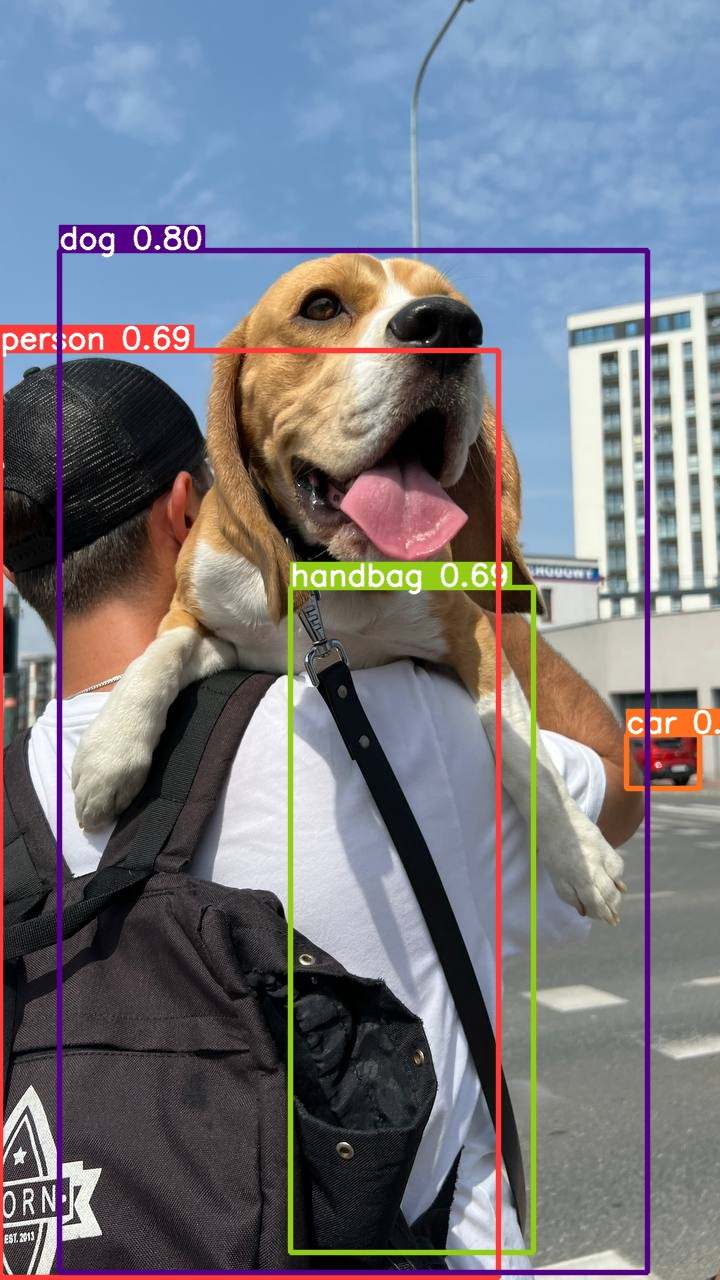

In [7]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [8]:
model = YOLO(f'yolov8s.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 96.3ms


Speed: 4.8ms preprocess, 96.3ms inference, 351.1ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[5.9892e+01, 2.5041e+02, 6.4794e+02, 1.2728e+03],
        [6.4746e-01, 3.5021e+02, 4.9883e+02, 1.2773e+03],
        [2.9020e+02, 5.8737e+02, 5.3397e+02, 1.2522e+03],
        [6.2696e+02, 7.3428e+02, 6.9947e+02, 7.8835e+02]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.7968, 0.6906, 0.6898, 0.4416], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([16.,  0., 26.,  2.], device='cuda:0')

## Custom Training

In [17]:
!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/input/fyp-datasetv2/data.yaml epochs=100 imgsz=800 plots=True  

New https://pypi.org/project/ultralytics/8.2.14 available 😃 Update with 'pip install -U ultralytics'


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/fyp-datasetv2/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=


  0%|                                                | 0.00/755k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 19.6MB/s]


2024-05-13 10:44:36.219317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 10:44:36.219458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered


2024-05-13 10:44:36.363264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=51

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           


 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 19                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

 22        [15, 18, 21]  1   2135785  ultralytics.nn.modules.head.Detect           [51, [128, 256, 512]]         


Model summary: 225 layers, 11155337 parameters, 11155321 gradients, 28.8 GFLOPs

Transferred 349/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...



  0%|                                               | 0.00/6.23M [00:00<?, ?B/s]


100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 119MB/s]


AMP: checks passed ✅



train: Scanning /kaggle/input/fyp-datasetv2/train/labels...:   0%|          | 0/


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 19 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 41 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 65 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 89 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 112 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 135 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 158 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 183 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 207 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 230 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 254 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 278 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 302 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 326 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 349 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 372 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 395 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 418 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 441 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 464 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 487 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 509 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 531 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 554 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 577 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 601 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 625 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 649 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 672 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 695 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 717 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 739 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 760 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 774 images, 0 backgr


train: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/fyp-datasetv2/valid/labels...:   0%|          | 0/20


val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 20 images, 0 backgroun
val: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000182, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


Image sizes 800 train, 800 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      1/100      5.57G      1.812      5.843      1.739        344        800:  
      1/100      5.57G      1.812      5.843      1.739        344        800:  


      1/100      5.78G      1.851       5.72      1.747        483        800:  


      1/100      5.78G      1.851       5.72      1.747        483        800:  


      1/100       6.1G      1.899      5.657      1.727        746        800:  
      1/100       6.1G      1.899      5.657      1.727        746        800:  


      1/100       6.1G      1.885      5.703      1.696        626        800:  
      1/100       6.1G      1.885      5.703      1.696        626        800:  


      1/100       6.1G      1.874      5.747      1.688        408        800:  
      1/100       6.1G      1.874      5.747      1.688        408        800:  


      1/100      6.67G      1.908      5.752      1.685       1005        800:  
      1/100      6.67G      1.908      5.752      1.685       1005        800:  


      1/100      6.67G      1.911        5.7      1.689        684        800:  
      1/100      6.67G      1.911        5.7      1.689        684        800:  


      1/100      6.67G      1.914      5.699      1.684        535        800:  
      1/100      6.67G      1.914      5.699      1.684        535        800:  


      1/100      6.67G      1.919       5.69      1.676        676        800:  
      1/100      6.67G      1.919       5.69      1.676        676        800:  


      1/100      6.67G      1.911      5.666      1.672        634        800:  
      1/100      6.67G      1.911      5.666      1.672        634        800:  


      1/100      6.67G      1.905      5.629      1.668        603        800:  
      1/100      6.67G      1.905      5.629      1.668        603        800:  


      1/100      6.67G      1.912      5.598      1.669        603        800:  
      1/100      6.67G      1.912      5.598      1.669        603        800:  


      1/100      6.67G      1.907      5.562      1.664        674        800:  
      1/100      6.67G      1.907      5.562      1.664        674        800:  


      1/100      6.67G      1.896      5.529       1.66        460        800:  
      1/100      6.67G      1.896      5.529       1.66        460        800:  


      1/100      6.67G      1.888      5.481      1.657        545        800:  
      1/100      6.67G      1.888      5.481      1.657        545        800:  


      1/100      6.67G      1.881      5.436       1.65        716        800:  
      1/100      6.67G      1.881      5.436       1.65        716        800:  


      1/100      6.67G      1.882      5.401      1.646        752        800:  
      1/100      6.67G      1.882      5.401      1.646        752        800:  


      1/100      6.67G      1.877      5.356      1.638        696        800:  
      1/100      6.67G      1.877      5.356      1.638        696        800:  


      1/100      6.67G      1.871      5.307      1.631        645        800:  
      1/100      6.67G      1.871      5.307      1.631        645        800:  


      1/100      6.67G      1.866      5.262      1.626        692        800:  
      1/100      6.67G      1.866      5.262      1.626        692        800:  


      1/100      6.67G       1.86      5.215      1.621        616        800:  
      1/100      6.67G       1.86      5.215      1.621        616        800:  


      1/100      6.67G      1.854      5.164      1.614        721        800:  
      1/100      6.67G      1.854      5.164      1.614        721        800:  


      1/100      6.67G      1.847      5.121      1.611        554        800:  
      1/100      6.67G      1.847      5.121      1.611        554        800:  


      1/100      6.67G      1.843      5.072      1.606        565        800:  
      1/100      6.67G      1.843      5.072      1.606        565        800:  


      1/100      6.67G      1.839      5.022        1.6        709        800:  
      1/100      6.67G      1.839      5.022        1.6        709        800:  


      1/100      6.67G       1.83      4.969      1.595        495        800:  
      1/100      6.67G       1.83      4.969      1.595        495        800:  


      1/100      6.68G      1.817      4.923       1.59        477        800:  
      1/100      6.68G      1.817      4.923       1.59        477        800:  


      1/100      6.68G      1.813      4.874      1.584        579        800:  
      1/100      6.68G      1.813      4.874      1.584        579        800:  


      1/100      6.68G       1.81      4.832      1.581        578        800:  
      1/100      6.68G       1.81      4.832      1.581        578        800:  


      1/100      6.68G      1.803      4.787      1.575        586        800:  
      1/100      6.68G      1.803      4.787      1.575        586        800:  


      1/100      6.68G      1.796      4.744       1.57        708        800:  
      1/100      6.68G      1.796      4.744       1.57        708        800:  


      1/100      6.68G      1.793      4.703      1.566        682        800:  
      1/100      6.68G      1.793      4.703      1.566        682        800:  


      1/100      6.68G      1.786      4.663       1.56        643        800:  
      1/100      6.68G      1.786      4.663       1.56        643        800:  


      1/100      6.68G      1.781      4.621      1.555        644        800:  
      1/100      6.68G      1.781      4.621      1.555        644        800:  


      1/100      6.68G      1.774      4.579      1.551        682        800:  
      1/100      6.68G      1.774      4.579      1.551        682        800:  


      1/100      6.68G      1.772      4.539      1.547        811        800:  
      1/100      6.68G      1.772      4.539      1.547        811        800:  


      1/100      6.68G      1.766      4.501      1.542        599        800:  
      1/100      6.68G      1.766      4.501      1.542        599        800:  


      1/100      6.68G      1.759      4.463      1.538        757        800:  
      1/100      6.68G      1.759      4.463      1.538        757        800:  


      1/100      6.68G      1.754      4.429      1.532        611        800:  
      1/100      6.68G      1.754      4.429      1.532        611        800:  


      1/100      6.68G      1.751      4.396      1.528        627        800:  
      1/100      6.68G      1.751      4.396      1.528        627        800:  


      1/100      6.68G      1.747      4.361      1.523        712        800:  
      1/100      6.68G      1.747      4.361      1.523        712        800:  


      1/100      6.68G      1.742      4.332      1.521        498        800:  
      1/100      6.68G      1.742      4.332      1.521        498        800:  


      1/100      6.68G      1.736      4.302      1.518        500        800:  
      1/100      6.68G      1.736      4.302      1.518        500        800:  


      1/100      6.68G      1.733      4.278      1.518        386        800:  
      1/100      6.68G      1.733      4.278      1.518        386        800:  


      1/100      6.68G      1.728      4.247      1.513        681        800:  
      1/100      6.68G      1.728      4.247      1.513        681        800:  


      1/100      6.68G      1.725      4.217       1.51        559        800:  
      1/100      6.68G      1.725      4.217       1.51        559        800:  


      1/100      6.68G      1.721       4.19      1.506        833        800:  
      1/100      6.68G      1.721       4.19      1.506        833        800:  


      1/100      6.68G      1.716      4.163      1.503        516        800:  
      1/100      6.68G      1.716      4.163      1.503        516        800:  


      1/100      6.69G      1.709      4.135      1.499        239        800:  
      1/100      6.69G      1.709      4.135      1.499        239        800: 1
      1/100      6.69G      1.709      4.135      1.499        239        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.667      0.106     0.0789     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      2/100      6.35G      1.551       2.85      1.319        723        800:  
      2/100      6.35G      1.551       2.85      1.319        723        800:  


      2/100      6.85G      1.531      2.815       1.31        866        800:  
      2/100      6.85G      1.531      2.815       1.31        866        800:  


      2/100      6.85G      1.545      2.794      1.317        598        800:  
      2/100      6.85G      1.545      2.794      1.317        598        800:  


      2/100      6.85G      1.543      2.761      1.308        792        800:  
      2/100      6.85G      1.543      2.761      1.308        792        800:  


      2/100      6.85G      1.534      2.758      1.321        559        800:  
      2/100      6.85G      1.534      2.758      1.321        559        800:  


      2/100      6.85G      1.538      2.751      1.317        783        800:  
      2/100      6.85G      1.538      2.751      1.317        783        800:  


      2/100      7.39G      1.544      2.752      1.319        704        800:  
      2/100      7.39G      1.544      2.752      1.319        704        800:  


      2/100      7.39G      1.544      2.735      1.312        759        800:  
      2/100      7.39G      1.544      2.735      1.312        759        800:  


      2/100      7.39G       1.53       2.73      1.311        655        800:  
      2/100      7.39G       1.53       2.73      1.311        655        800:  


      2/100      7.39G      1.525       2.72      1.317        584        800:  
      2/100      7.39G      1.525       2.72      1.317        584        800:  


      2/100      7.39G      1.524       2.71      1.318        685        800:  
      2/100      7.39G      1.524       2.71      1.318        685        800:  


      2/100      7.39G      1.515      2.698      1.316        512        800:  
      2/100      7.39G      1.515      2.698      1.316        512        800:  


      2/100      7.39G      1.504      2.684      1.316        496        800:  
      2/100      7.39G      1.504      2.684      1.316        496        800:  


      2/100      7.39G      1.504      2.676      1.316        768        800:  
      2/100      7.39G      1.504      2.676      1.316        768        800:  


      2/100      7.39G      1.506      2.667      1.316        602        800:  
      2/100      7.39G      1.506      2.667      1.316        602        800:  


      2/100      7.39G      1.505      2.665      1.321        480        800:  
      2/100      7.39G      1.505      2.665      1.321        480        800:  


      2/100      7.39G      1.496      2.651      1.316        655        800:  
      2/100      7.39G      1.496      2.651      1.316        655        800:  


      2/100      7.39G      1.495      2.636      1.312        580        800:  
      2/100      7.39G      1.495      2.636      1.312        580        800:  


      2/100      7.39G      1.494      2.624      1.313        579        800:  
      2/100      7.39G      1.494      2.624      1.313        579        800:  


      2/100      7.39G      1.496      2.606       1.31        685        800:  
      2/100      7.39G      1.496      2.606       1.31        685        800:  


      2/100      7.39G      1.492      2.589      1.309        798        800:  
      2/100      7.39G      1.492      2.589      1.309        798        800:  


      2/100      7.39G      1.486      2.579      1.307        569        800:  
      2/100      7.39G      1.486      2.579      1.307        569        800:  


      2/100      7.39G      1.488       2.57      1.311        524        800:  
      2/100      7.39G      1.488       2.57      1.311        524        800:  


      2/100      7.96G      1.486      2.563      1.308        549        800:  
      2/100      7.96G      1.486      2.563      1.308        549        800:  


      2/100      7.96G      1.483      2.549      1.307        678        800:  
      2/100      7.96G      1.483      2.549      1.307        678        800:  


      2/100      7.96G      1.481      2.538      1.307        534        800:  
      2/100      7.96G      1.481      2.538      1.307        534        800:  


      2/100      7.96G      1.479      2.525      1.306        611        800:  
      2/100      7.96G      1.479      2.525      1.306        611        800:  


      2/100      7.96G      1.476      2.511      1.303        583        800:  
      2/100      7.96G      1.476      2.511      1.303        583        800:  


      2/100      7.96G      1.474        2.5      1.301        759        800:  
      2/100      7.96G      1.474        2.5      1.301        759        800:  


      2/100      7.96G      1.472      2.489        1.3        521        800:  
      2/100      7.96G      1.472      2.489        1.3        521        800:  


      2/100      7.96G      1.468       2.48      1.301        479        800:  
      2/100      7.96G      1.468       2.48      1.301        479        800:  


      2/100      7.96G      1.465      2.473      1.299        730        800:  
      2/100      7.96G      1.465      2.473      1.299        730        800:  


      2/100      7.96G      1.463      2.464      1.297        781        800:  
      2/100      7.96G      1.463      2.464      1.297        781        800:  


      2/100      7.96G      1.462       2.46      1.297        507        800:  
      2/100      7.96G      1.462       2.46      1.297        507        800:  


      2/100      7.96G      1.458      2.454      1.297        604        800:  
      2/100      7.96G      1.458      2.454      1.297        604        800:  


      2/100      7.96G      1.458      2.446      1.295        681        800:  
      2/100      7.96G      1.458      2.446      1.295        681        800:  


      2/100      7.96G      1.457      2.439      1.294        808        800:  
      2/100      7.96G      1.457      2.439      1.294        808        800:  


      2/100      7.96G      1.457      2.434      1.293        643        800:  
      2/100      7.96G      1.457      2.434      1.293        643        800:  


      2/100      7.96G      1.456      2.426      1.293        686        800:  
      2/100      7.96G      1.456      2.426      1.293        686        800:  


      2/100      7.96G      1.454      2.416      1.291        888        800:  
      2/100      7.96G      1.454      2.416      1.291        888        800:  


      2/100      7.96G      1.452      2.408      1.289        691        800:  
      2/100      7.96G      1.452      2.408      1.289        691        800:  


      2/100      7.96G      1.451      2.401       1.29        632        800:  
      2/100      7.96G      1.451      2.401       1.29        632        800:  


      2/100      7.96G      1.448      2.393      1.288        641        800:  
      2/100      7.96G      1.448      2.393      1.288        641        800:  


      2/100      7.96G      1.445      2.386      1.287        587        800:  
      2/100      7.96G      1.445      2.386      1.287        587        800:  


      2/100      7.96G      1.444      2.379      1.287        533        800:  
      2/100      7.96G      1.444      2.379      1.287        533        800:  


      2/100      7.96G      1.443      2.372      1.288        595        800:  
      2/100      7.96G      1.443      2.372      1.288        595        800:  


      2/100      7.96G       1.44      2.364      1.286        782        800:  
      2/100      7.96G       1.44      2.364      1.286        782        800:  


      2/100      7.96G       1.44      2.359      1.283        864        800:  
      2/100      7.96G       1.44      2.359      1.283        864        800:  


      2/100      7.96G       1.44      2.353      1.282        270        800:  
      2/100      7.96G       1.44      2.353      1.282        270        800: 1
      2/100      7.96G       1.44      2.353      1.282        270        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.732      0.154      0.155     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      3/100      5.95G      1.325      2.012      1.178        619        800:  
      3/100      5.95G      1.325      2.012      1.178        619        800:  


      3/100       6.3G      1.353      2.063      1.183        851        800:  
      3/100       6.3G      1.353      2.063      1.183        851        800:  


      3/100       6.3G      1.341      2.026        1.2        611        800:  
      3/100       6.3G      1.341      2.026        1.2        611        800:  


      3/100       6.7G      1.356      2.042       1.21        566        800:  


      3/100       6.7G      1.356      2.042       1.21        566        800:  


      3/100       6.7G      1.357      2.056      1.226        488        800:  
      3/100       6.7G      1.357      2.056      1.226        488        800:  


      3/100       6.7G      1.358      2.038      1.226        620        800:  
      3/100       6.7G      1.358      2.038      1.226        620        800:  


      3/100       6.7G      1.358      2.022      1.223        679        800:  
      3/100       6.7G      1.358      2.022      1.223        679        800:  


      3/100       6.7G       1.36      2.009      1.215        654        800:  
      3/100       6.7G       1.36      2.009      1.215        654        800:  


      3/100       6.7G      1.353      2.006      1.213        629        800:  
      3/100       6.7G      1.353      2.006      1.213        629        800:  


      3/100      7.14G      1.352      2.003       1.21        651        800:  
      3/100      7.14G      1.352      2.003       1.21        651        800:  


      3/100      7.61G       1.35      1.997      1.206        777        800:  
      3/100      7.61G       1.35      1.997      1.206        777        800:  


      3/100      7.61G      1.347      1.997      1.207        517        800:  
      3/100      7.61G      1.347      1.997      1.207        517        800:  


      3/100      7.61G       1.35      1.993       1.21        654        800:  
      3/100      7.61G       1.35      1.993       1.21        654        800:  


      3/100      7.61G      1.349      1.989      1.207        709        800:  
      3/100      7.61G      1.349      1.989      1.207        709        800:  


      3/100      7.61G      1.345      1.972      1.203        676        800:  
      3/100      7.61G      1.345      1.972      1.203        676        800:  


      3/100      7.61G      1.353      1.967      1.204        688        800:  
      3/100      7.61G      1.353      1.967      1.204        688        800:  


      3/100      7.61G      1.351      1.964      1.205        593        800:  
      3/100      7.61G      1.351      1.964      1.205        593        800:  


      3/100      7.61G      1.349      1.958      1.206        749        800:  
      3/100      7.61G      1.349      1.958      1.206        749        800:  


      3/100      7.61G      1.351      1.957      1.204        643        800:  
      3/100      7.61G      1.351      1.957      1.204        643        800:  


      3/100      7.61G       1.35      1.952      1.204        538        800:  
      3/100      7.61G       1.35      1.952      1.204        538        800:  


      3/100      7.61G      1.351       1.95      1.203        667        800:  
      3/100      7.61G      1.351       1.95      1.203        667        800:  


      3/100      7.61G      1.353      1.951      1.206        581        800:  
      3/100      7.61G      1.353      1.951      1.206        581        800:  


      3/100      7.61G      1.355      1.955      1.211        441        800:  
      3/100      7.61G      1.355      1.955      1.211        441        800:  


      3/100      7.61G      1.355      1.954      1.212        496        800:  
      3/100      7.61G      1.355      1.954      1.212        496        800:  


      3/100      7.61G      1.355      1.954      1.214        494        800:  
      3/100      7.61G      1.355      1.954      1.214        494        800:  


      3/100      8.16G      1.355      1.952      1.213        842        800:  
      3/100      8.16G      1.355      1.952      1.213        842        800:  


      3/100      8.16G      1.355      1.947      1.213        635        800:  
      3/100      8.16G      1.355      1.947      1.213        635        800:  


      3/100      8.16G      1.353      1.941      1.212        668        800:  
      3/100      8.16G      1.353      1.941      1.212        668        800:  


      3/100      8.16G      1.353      1.939      1.212        686        800:  
      3/100      8.16G      1.353      1.939      1.212        686        800:  


      3/100      8.16G      1.351      1.935      1.211        611        800:  
      3/100      8.16G      1.351      1.935      1.211        611        800:  


      3/100      8.16G      1.349      1.928       1.21        664        800:  
      3/100      8.16G      1.349      1.928       1.21        664        800:  


      3/100      8.16G      1.349      1.926      1.211        457        800:  
      3/100      8.16G      1.349      1.926      1.211        457        800:  


      3/100      8.16G      1.347      1.921      1.209        664        800:  
      3/100      8.16G      1.347      1.921      1.209        664        800:  


      3/100      8.16G      1.344      1.916      1.209        602        800:  
      3/100      8.16G      1.344      1.916      1.209        602        800:  


      3/100      8.16G      1.342      1.913      1.208        584        800:  
      3/100      8.16G      1.342      1.913      1.208        584        800:  


      3/100      8.16G      1.342      1.909      1.208        734        800:  
      3/100      8.16G      1.342      1.909      1.208        734        800:  


      3/100      8.16G      1.343      1.906      1.208        843        800:  
      3/100      8.16G      1.343      1.906      1.208        843        800:  


      3/100      8.16G      1.343      1.904      1.207        726        800:  
      3/100      8.16G      1.343      1.904      1.207        726        800:  


      3/100      8.16G      1.342      1.902      1.206        541        800:  
      3/100      8.16G      1.342      1.902      1.206        541        800:  


      3/100      8.16G       1.34      1.898      1.205        718        800:  
      3/100      8.16G       1.34      1.898      1.205        718        800:  


      3/100      8.16G       1.34      1.894      1.203        756        800:  
      3/100      8.16G       1.34      1.894      1.203        756        800:  


      3/100      8.16G       1.34       1.89      1.203        748        800:  
      3/100      8.16G       1.34       1.89      1.203        748        800:  


      3/100      8.16G       1.34      1.891      1.203        506        800:  
      3/100      8.16G       1.34      1.891      1.203        506        800:  


      3/100      8.16G      1.341      1.888      1.202        706        800:  
      3/100      8.16G      1.341      1.888      1.202        706        800:  


      3/100      8.16G      1.341      1.886      1.202        708        800:  
      3/100      8.16G      1.341      1.886      1.202        708        800:  


      3/100      8.16G       1.34      1.884      1.202        667        800:  
      3/100      8.16G       1.34      1.884      1.202        667        800:  


      3/100      8.16G      1.339      1.882      1.201        669        800:  
      3/100      8.16G      1.339      1.882      1.201        669        800:  


      3/100      8.16G      1.339      1.881      1.199        675        800:  
      3/100      8.16G      1.339      1.881      1.199        675        800:  


      3/100      8.17G      1.339       1.88        1.2        219        800:  
      3/100      8.17G      1.339       1.88        1.2        219        800: 1
      3/100      8.17G      1.339       1.88        1.2        219        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.492      0.283      0.262      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      4/100      6.19G      1.302      1.697      1.154        735        800:  
      4/100      6.19G      1.302      1.697      1.154        735        800:  


      4/100       6.2G      1.303      1.739      1.195        521        800:  
      4/100       6.2G      1.303      1.739      1.195        521        800:  


      4/100       6.2G      1.308      1.742      1.172        816        800:  
      4/100       6.2G      1.308      1.742      1.172        816        800:  


      4/100       6.8G      1.301      1.733      1.162        785        800:  
      4/100       6.8G      1.301      1.733      1.162        785        800:  


      4/100       6.8G      1.338       1.81      1.227        346        800:  
      4/100       6.8G      1.338       1.81      1.227        346        800:  


      4/100       6.8G      1.327      1.787      1.217        716        800:  
      4/100       6.8G      1.327      1.787      1.217        716        800:  


      4/100       6.8G      1.324      1.778      1.206        754        800:  
      4/100       6.8G      1.324      1.778      1.206        754        800:  


      4/100       6.8G      1.321       1.77      1.198        779        800:  
      4/100       6.8G      1.321       1.77      1.198        779        800:  


      4/100       6.8G      1.311      1.754      1.191        637        800:  
      4/100       6.8G      1.311      1.754      1.191        637        800:  


      4/100       6.8G      1.307      1.755       1.19        671        800:  
      4/100       6.8G      1.307      1.755       1.19        671        800:  


      4/100       6.8G      1.315      1.747      1.186        769        800:  
      4/100       6.8G      1.315      1.747      1.186        769        800:  


      4/100       6.8G      1.311      1.742      1.188        531        800:  
      4/100       6.8G      1.311      1.742      1.188        531        800:  


      4/100       6.8G      1.307      1.735      1.189        533        800:  
      4/100       6.8G      1.307      1.735      1.189        533        800:  


      4/100       6.8G      1.309      1.727      1.185        753        800:  
      4/100       6.8G      1.309      1.727      1.185        753        800:  


      4/100       6.8G      1.309      1.728      1.184        734        800:  
      4/100       6.8G      1.309      1.728      1.184        734        800:  


      4/100       6.8G      1.307      1.724      1.183        547        800:  
      4/100       6.8G      1.307      1.724      1.183        547        800:  


      4/100       6.8G      1.305      1.721      1.184        595        800:  
      4/100       6.8G      1.305      1.721      1.184        595        800:  


      4/100       6.8G      1.304      1.724      1.184        552        800:  
      4/100       6.8G      1.304      1.724      1.184        552        800:  


      4/100       6.8G      1.302      1.726      1.186        458        800:  
      4/100       6.8G      1.302      1.726      1.186        458        800:  


      4/100       6.8G        1.3      1.721      1.185        618        800:  
      4/100       6.8G        1.3      1.721      1.185        618        800:  


      4/100       6.8G      1.299      1.716      1.183        703        800:  
      4/100       6.8G      1.299      1.716      1.183        703        800:  


      4/100       6.8G      1.298      1.717      1.185        459        800:  
      4/100       6.8G      1.298      1.717      1.185        459        800:  


      4/100       6.8G      1.295       1.72      1.184        638        800:  
      4/100       6.8G      1.295       1.72      1.184        638        800:  


      4/100       6.8G      1.296      1.718      1.182        608        800:  
      4/100       6.8G      1.296      1.718      1.182        608        800:  


      4/100       6.8G      1.295      1.711      1.181        579        800:  
      4/100       6.8G      1.295      1.711      1.181        579        800:  


      4/100       6.8G      1.291      1.711       1.18        609        800:  
      4/100       6.8G      1.291      1.711       1.18        609        800:  


      4/100       6.8G       1.29      1.707      1.177        843        800:  
      4/100       6.8G       1.29      1.707      1.177        843        800:  


      4/100       6.8G      1.287      1.702      1.177        511        800:  
      4/100       6.8G      1.287      1.702      1.177        511        800:  


      4/100       6.8G      1.287      1.701      1.177        604        800:  
      4/100       6.8G      1.287      1.701      1.177        604        800:  


      4/100       6.8G      1.285      1.695      1.174        796        800:  
      4/100       6.8G      1.285      1.695      1.174        796        800:  


      4/100       6.8G      1.284      1.694      1.174        720        800:  
      4/100       6.8G      1.284      1.694      1.174        720        800:  


      4/100       6.8G      1.281      1.691      1.174        597        800:  
      4/100       6.8G      1.281      1.691      1.174        597        800:  


      4/100      7.41G       1.28      1.687      1.173        673        800:  
      4/100      7.41G       1.28      1.687      1.173        673        800:  


      4/100      7.41G       1.28      1.686      1.172        590        800:  
      4/100      7.41G       1.28      1.686      1.172        590        800:  


      4/100      7.41G       1.28      1.683      1.174        516        800:  
      4/100      7.41G       1.28      1.683      1.174        516        800:  


      4/100      7.41G       1.28      1.684      1.176        406        800:  
      4/100      7.41G       1.28      1.684      1.176        406        800:  


      4/100      7.41G      1.279      1.685      1.177        497        800:  
      4/100      7.41G      1.279      1.685      1.177        497        800:  


      4/100      7.41G      1.279      1.683      1.177        826        800:  
      4/100      7.41G      1.279      1.683      1.177        826        800:  


      4/100      7.41G      1.276       1.68      1.177        561        800:  
      4/100      7.41G      1.276       1.68      1.177        561        800:  


      4/100      7.41G      1.276      1.676      1.175        837        800:  
      4/100      7.41G      1.276      1.676      1.175        837        800:  


      4/100      7.41G      1.276      1.679      1.176        504        800:  
      4/100      7.41G      1.276      1.679      1.176        504        800:  


      4/100      7.41G      1.276      1.677      1.175        738        800:  
      4/100      7.41G      1.276      1.677      1.175        738        800:  


      4/100      7.41G      1.276      1.673      1.175        596        800:  
      4/100      7.41G      1.276      1.673      1.175        596        800:  


      4/100      7.41G      1.277      1.671      1.174        942        800:  
      4/100      7.41G      1.277      1.671      1.174        942        800:  


      4/100      7.41G      1.278      1.669      1.174        650        800:  
      4/100      7.41G      1.278      1.669      1.174        650        800:  


      4/100      7.41G      1.279      1.667      1.174        641        800:  
      4/100      7.41G      1.279      1.667      1.174        641        800:  


      4/100      7.41G       1.28      1.667      1.174        586        800:  
      4/100      7.41G       1.28      1.667      1.174        586        800:  


      4/100      7.41G       1.28      1.665      1.173        882        800:  
      4/100      7.41G       1.28      1.665      1.173        882        800:  


      4/100      7.42G      1.282      1.663      1.172        363        800:  
      4/100      7.42G      1.282      1.663      1.172        363        800: 1
      4/100      7.42G      1.282      1.663      1.172        363        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.622      0.289      0.274      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      5/100      5.95G      1.256      1.558       1.12        933        800:  
      5/100      5.95G      1.256      1.558       1.12        933        800:  


      5/100      6.23G      1.258      1.621       1.15        528        800:  
      5/100      6.23G      1.258      1.621       1.15        528        800:  


      5/100      6.74G      1.267      1.586      1.137        779        800:  
      5/100      6.74G      1.267      1.586      1.137        779        800:  


      5/100      6.74G      1.269       1.56      1.133        686        800:  
      5/100      6.74G      1.269       1.56      1.133        686        800:  


      5/100      6.74G      1.262      1.552      1.139        557        800:  
      5/100      6.74G      1.262      1.552      1.139        557        800:  


      5/100      6.74G      1.266      1.563      1.146        658        800:  
      5/100      6.74G      1.266      1.563      1.146        658        800:  


      5/100      6.74G      1.267      1.565      1.148        592        800:  
      5/100      6.74G      1.267      1.565      1.148        592        800:  


      5/100      6.74G       1.26       1.56      1.148        638        800:  
      5/100      6.74G       1.26       1.56      1.148        638        800:  


      5/100      6.74G      1.267      1.552      1.148        767        800:  
      5/100      6.74G      1.267      1.552      1.148        767        800:  


      5/100      6.74G      1.261      1.552      1.151        553        800:  
      5/100      6.74G      1.261      1.552      1.151        553        800:  


      5/100      7.29G       1.26      1.546      1.144       1017        800:  
      5/100      7.29G       1.26      1.546      1.144       1017        800:  


      5/100      7.29G      1.261      1.537      1.142        675        800:  
      5/100      7.29G      1.261      1.537      1.142        675        800:  


      5/100      7.29G      1.262      1.539       1.14        790        800:  
      5/100      7.29G      1.262      1.539       1.14        790        800:  


      5/100      7.29G      1.258      1.535      1.138        723        800:  
      5/100      7.29G      1.258      1.535      1.138        723        800:  


      5/100      7.29G      1.256      1.538      1.141        531        800:  
      5/100      7.29G      1.256      1.538      1.141        531        800:  


      5/100      7.29G      1.263      1.542      1.145        570        800:  
      5/100      7.29G      1.263      1.542      1.145        570        800:  


      5/100      7.29G      1.266      1.542      1.147        649        800:  
      5/100      7.29G      1.266      1.542      1.147        649        800:  


      5/100      7.29G      1.259      1.537      1.143        639        800:  
      5/100      7.29G      1.259      1.537      1.143        639        800:  


      5/100      7.29G      1.257      1.535      1.143        737        800:  
      5/100      7.29G      1.257      1.535      1.143        737        800:  


      5/100      7.29G      1.262      1.539      1.147        507        800:  
      5/100      7.29G      1.262      1.539      1.147        507        800:  


      5/100      7.29G       1.26      1.536      1.147        557        800:  
      5/100      7.29G       1.26      1.536      1.147        557        800:  


      5/100      7.29G      1.262      1.535      1.145        802        800:  
      5/100      7.29G      1.262      1.535      1.145        802        800:  


      5/100      7.29G       1.26      1.536      1.145        673        800:  
      5/100      7.29G       1.26      1.536      1.145        673        800:  


      5/100      7.29G      1.261      1.532      1.145        686        800:  
      5/100      7.29G      1.261      1.532      1.145        686        800:  


      5/100      7.29G      1.262      1.532      1.147        513        800:  
      5/100      7.29G      1.262      1.532      1.147        513        800:  


      5/100      7.29G      1.261      1.528      1.145        848        800:  
      5/100      7.29G      1.261      1.528      1.145        848        800:  


      5/100      7.29G      1.261      1.526      1.145        583        800:  
      5/100      7.29G      1.261      1.526      1.145        583        800:  


      5/100      7.29G       1.26      1.529      1.145        600        800:  
      5/100      7.29G       1.26      1.529      1.145        600        800:  


      5/100      7.29G      1.259      1.526      1.146        670        800:  


      5/100      7.29G      1.259      1.526      1.146        670        800:  


      5/100      7.29G      1.256      1.522      1.145        697        800:  
      5/100      7.29G      1.256      1.522      1.145        697        800:  


      5/100      7.29G      1.256      1.522      1.145        739        800:  
      5/100      7.29G      1.256      1.522      1.145        739        800:  


      5/100      7.29G      1.258      1.525      1.148        522        800:  
      5/100      7.29G      1.258      1.525      1.148        522        800:  


      5/100      7.29G      1.256      1.526      1.148        665        800:  
      5/100      7.29G      1.256      1.526      1.148        665        800:  


      5/100      7.29G      1.256      1.527      1.148        538        800:  
      5/100      7.29G      1.256      1.527      1.148        538        800:  


      5/100      7.29G      1.257      1.533      1.153        277        800:  
      5/100      7.29G      1.257      1.533      1.153        277        800:  


      5/100      7.29G      1.257      1.535      1.154        501        800:  
      5/100      7.29G      1.257      1.535      1.154        501        800:  


      5/100      7.29G      1.256      1.534      1.154        542        800:  
      5/100      7.29G      1.256      1.534      1.154        542        800:  


      5/100      7.29G      1.256      1.533      1.153        864        800:  
      5/100      7.29G      1.256      1.533      1.153        864        800:  


      5/100      7.29G      1.257      1.537      1.154        480        800:  
      5/100      7.29G      1.257      1.537      1.154        480        800:  


      5/100      7.29G      1.257      1.535      1.153        739        800:  
      5/100      7.29G      1.257      1.535      1.153        739        800:  


      5/100      7.29G      1.256      1.532      1.153        657        800:  
      5/100      7.29G      1.256      1.532      1.153        657        800:  


      5/100      7.29G      1.256       1.53      1.151        976        800:  
      5/100      7.29G      1.256       1.53      1.151        976        800:  


      5/100      7.29G      1.255      1.528      1.151        639        800:  
      5/100      7.29G      1.255      1.528      1.151        639        800:  


      5/100      7.29G      1.252      1.528      1.152        388        800:  
      5/100      7.29G      1.252      1.528      1.152        388        800:  


      5/100      7.29G      1.252      1.526      1.151        686        800:  
      5/100      7.29G      1.252      1.526      1.151        686        800:  


      5/100      7.29G      1.254      1.525      1.151        650        800:  
      5/100      7.29G      1.254      1.525      1.151        650        800:  


      5/100      7.29G      1.252      1.523      1.151        717        800:  
      5/100      7.29G      1.252      1.523      1.151        717        800:  


      5/100      7.29G       1.25      1.521       1.15        767        800:  
      5/100      7.29G       1.25      1.521       1.15        767        800:  


      5/100       7.3G      1.251      1.524      1.151        144        800:  
      5/100       7.3G      1.251      1.524      1.151        144        800: 1
      5/100       7.3G      1.251      1.524      1.151        144        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.614      0.327      0.332      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      6/100      5.92G      1.173      1.375      1.115        687        800:  
      6/100      5.92G      1.173      1.375      1.115        687        800:  


      6/100      5.93G       1.19      1.433       1.15        446        800:  
      6/100      5.93G       1.19      1.433       1.15        446        800:  


      6/100      6.26G      1.183      1.422       1.14        588        800:  
      6/100      6.26G      1.183      1.422       1.14        588        800:  


      6/100      6.26G      1.182      1.435       1.15        484        800:  
      6/100      6.26G      1.182      1.435       1.15        484        800:  


      6/100      6.67G        1.2      1.448      1.161        558        800:  
      6/100      6.67G        1.2      1.448      1.161        558        800:  


      6/100      6.67G      1.197      1.446      1.156        550        800:  
      6/100      6.67G      1.197      1.446      1.156        550        800:  


      6/100      6.67G      1.196      1.455       1.16        401        800:  
      6/100      6.67G      1.196      1.455       1.16        401        800:  


      6/100      6.67G      1.193      1.438      1.155        642        800:  
      6/100      6.67G      1.193      1.438      1.155        642        800:  


      6/100      7.12G      1.209      1.447      1.156        645        800:  
      6/100      7.12G      1.209      1.447      1.156        645        800:  


      6/100      7.12G      1.206      1.447      1.149        693        800:  
      6/100      7.12G      1.206      1.447      1.149        693        800:  


      6/100      7.65G       1.21      1.445      1.147        623        800:  
      6/100      7.65G       1.21      1.445      1.147        623        800:  


      6/100      7.65G      1.209      1.442      1.143        652        800:  
      6/100      7.65G      1.209      1.442      1.143        652        800:  


      6/100      7.65G      1.212      1.443      1.142        802        800:  


      6/100      7.65G      1.212      1.443      1.142        802        800:  


      6/100      7.65G      1.211      1.443      1.144        631        800:  
      6/100      7.65G      1.211      1.443      1.144        631        800:  


      6/100      7.65G      1.209      1.438      1.143        563        800:  
      6/100      7.65G      1.209      1.438      1.143        563        800:  


      6/100      7.65G      1.206       1.44      1.141        574        800:  
      6/100      7.65G      1.206       1.44      1.141        574        800:  


      6/100      7.65G      1.208      1.437       1.14        846        800:  
      6/100      7.65G      1.208      1.437       1.14        846        800:  


      6/100      7.65G      1.208      1.436      1.138        861        800:  
      6/100      7.65G      1.208      1.436      1.138        861        800:  


      6/100      7.65G      1.208      1.436      1.139        660        800:  
      6/100      7.65G      1.208      1.436      1.139        660        800:  


      6/100      7.65G      1.211      1.438      1.138        671        800:  
      6/100      7.65G      1.211      1.438      1.138        671        800:  


      6/100      7.65G      1.208      1.439      1.139        468        800:  
      6/100      7.65G      1.208      1.439      1.139        468        800:  


      6/100      7.65G      1.208      1.439      1.139        588        800:  
      6/100      7.65G      1.208      1.439      1.139        588        800:  


      6/100      7.65G      1.207      1.442       1.14        483        800:  
      6/100      7.65G      1.207      1.442       1.14        483        800:  


      6/100      7.65G      1.209      1.447      1.143        499        800:  
      6/100      7.65G      1.209      1.447      1.143        499        800:  


      6/100      7.65G       1.21      1.445      1.144        527        800:  
      6/100      7.65G       1.21      1.445      1.144        527        800:  


      6/100      7.65G      1.213      1.446      1.148        456        800:  
      6/100      7.65G      1.213      1.446      1.148        456        800:  


      6/100      7.65G      1.212      1.445      1.148        595        800:  
      6/100      7.65G      1.212      1.445      1.148        595        800:  


      6/100      7.65G      1.213      1.445       1.15        474        800:  
      6/100      7.65G      1.213      1.445       1.15        474        800:  


      6/100      7.65G      1.213      1.445       1.15        574        800:  


      6/100      7.65G      1.213      1.445       1.15        574        800:  


      6/100      8.25G      1.215      1.441      1.148        844        800:  
      6/100      8.25G      1.215      1.441      1.148        844        800:  


      6/100      8.25G      1.213      1.438      1.147        631        800:  
      6/100      8.25G      1.213      1.438      1.147        631        800:  


      6/100      8.25G      1.213      1.437      1.146        631        800:  
      6/100      8.25G      1.213      1.437      1.146        631        800:  


      6/100      8.25G      1.214      1.438      1.148        499        800:  
      6/100      8.25G      1.214      1.438      1.148        499        800:  


      6/100      8.25G      1.213      1.434      1.146        829        800:  
      6/100      8.25G      1.213      1.434      1.146        829        800:  


      6/100      8.25G      1.214      1.434      1.147        559        800:  
      6/100      8.25G      1.214      1.434      1.147        559        800:  


      6/100      8.25G      1.213      1.432      1.147        547        800:  
      6/100      8.25G      1.213      1.432      1.147        547        800:  


      6/100      8.25G      1.213      1.432      1.145        981        800:  
      6/100      8.25G      1.213      1.432      1.145        981        800:  


      6/100      8.25G      1.213      1.431      1.145        567        800:  
      6/100      8.25G      1.213      1.431      1.145        567        800:  


      6/100      8.25G      1.215      1.429      1.145        709        800:  
      6/100      8.25G      1.215      1.429      1.145        709        800:  


      6/100      8.25G      1.216      1.428      1.144        797        800:  
      6/100      8.25G      1.216      1.428      1.144        797        800:  


      6/100      8.25G      1.216      1.426      1.144        712        800:  
      6/100      8.25G      1.216      1.426      1.144        712        800:  


      6/100      8.25G      1.218      1.425      1.144        688        800:  
      6/100      8.25G      1.218      1.425      1.144        688        800:  


      6/100      8.25G      1.217      1.424      1.143        677        800:  
      6/100      8.25G      1.217      1.424      1.143        677        800:  


      6/100      8.25G      1.216      1.424      1.143        547        800:  
      6/100      8.25G      1.216      1.424      1.143        547        800:  


      6/100      8.25G      1.217      1.422      1.142        729        800:  
      6/100      8.25G      1.217      1.422      1.142        729        800:  


      6/100      8.25G      1.218      1.422      1.142        954        800:  
      6/100      8.25G      1.218      1.422      1.142        954        800:  


      6/100      8.25G      1.216      1.419      1.141        705        800:  
      6/100      8.25G      1.216      1.419      1.141        705        800:  


      6/100      8.25G      1.217      1.418      1.142        556        800:  
      6/100      8.25G      1.217      1.418      1.142        556        800:  


      6/100      8.25G      1.215       1.42      1.145        116        800:  
      6/100      8.25G      1.215       1.42      1.145        116        800: 1
      6/100      8.25G      1.215       1.42      1.145        116        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.551      0.331       0.37      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      7/100      5.95G      1.153       1.33       1.13        718        800:  
      7/100      5.95G      1.153       1.33       1.13        718        800:  


      7/100      6.33G      1.181       1.29      1.112        788        800:  
      7/100      6.33G      1.181       1.29      1.112        788        800:  


      7/100      6.33G      1.195      1.325      1.127        531        800:  
      7/100      6.33G      1.195      1.325      1.127        531        800:  


      7/100      6.33G      1.186      1.322      1.109        703        800:  
      7/100      6.33G      1.186      1.322      1.109        703        800:  


      7/100      6.79G      1.213      1.325      1.112        824        800:  
      7/100      6.79G      1.213      1.325      1.112        824        800:  


      7/100      6.79G       1.21       1.34      1.108        709        800:  
      7/100      6.79G       1.21       1.34      1.108        709        800:  


      7/100      6.79G      1.216      1.335      1.115        667        800:  
      7/100      6.79G      1.216      1.335      1.115        667        800:  


      7/100      6.79G      1.208      1.337      1.116        626        800:  
      7/100      6.79G      1.208      1.337      1.116        626        800:  


      7/100      7.33G      1.204      1.342      1.117        670        800:  
      7/100      7.33G      1.204      1.342      1.117        670        800:  


      7/100      7.33G      1.202      1.343      1.118        761        800:  
      7/100      7.33G      1.202      1.343      1.118        761        800:  


      7/100      7.33G      1.206      1.341      1.122        569        800:  
      7/100      7.33G      1.206      1.341      1.122        569        800:  


      7/100      7.33G      1.207      1.348      1.124        638        800:  
      7/100      7.33G      1.207      1.348      1.124        638        800:  


      7/100      7.33G      1.208       1.35      1.129        461        800:  
      7/100      7.33G      1.208       1.35      1.129        461        800:  


      7/100      7.33G      1.204      1.353       1.13        632        800:  
      7/100      7.33G      1.204      1.353       1.13        632        800:  


      7/100      7.33G      1.203      1.351      1.129        642        800:  
      7/100      7.33G      1.203      1.351      1.129        642        800:  


      7/100      7.33G      1.204      1.349       1.13        636        800:  
      7/100      7.33G      1.204      1.349       1.13        636        800:  


      7/100      7.33G      1.209      1.349      1.132        657        800:  
      7/100      7.33G      1.209      1.349      1.132        657        800:  


      7/100      7.33G      1.206      1.348      1.131        727        800:  
      7/100      7.33G      1.206      1.348      1.131        727        800:  


      7/100      7.33G      1.207      1.349       1.13        753        800:  
      7/100      7.33G      1.207      1.349       1.13        753        800:  


      7/100      7.33G      1.207      1.352      1.132        508        800:  
      7/100      7.33G      1.207      1.352      1.132        508        800:  


      7/100      7.33G      1.206      1.349      1.131        695        800:  
      7/100      7.33G      1.206      1.349      1.131        695        800:  


      7/100      7.33G      1.206      1.345      1.133        516        800:  
      7/100      7.33G      1.206      1.345      1.133        516        800:  


      7/100      7.33G      1.202      1.341      1.132        614        800:  
      7/100      7.33G      1.202      1.341      1.132        614        800:  


      7/100      7.33G      1.199      1.341      1.131        671        800:  
      7/100      7.33G      1.199      1.341      1.131        671        800:  


      7/100      7.33G      1.196      1.337       1.13        675        800:  
      7/100      7.33G      1.196      1.337       1.13        675        800:  


      7/100      7.33G      1.196      1.334       1.13        573        800:  
      7/100      7.33G      1.196      1.334       1.13        573        800:  


      7/100      7.33G      1.196      1.333      1.131        569        800:  
      7/100      7.33G      1.196      1.333      1.131        569        800:  


      7/100      7.33G      1.195      1.336      1.131        496        800:  
      7/100      7.33G      1.195      1.336      1.131        496        800:  


      7/100      7.33G      1.198      1.337       1.13        736        800:  
      7/100      7.33G      1.198      1.337       1.13        736        800:  


      7/100      7.33G        1.2      1.335      1.129        759        800:  
      7/100      7.33G        1.2      1.335      1.129        759        800:  


      7/100      7.33G      1.198      1.334       1.13        502        800:  
      7/100      7.33G      1.198      1.334       1.13        502        800:  


      7/100      7.33G      1.195      1.332      1.129        609        800:  
      7/100      7.33G      1.195      1.332      1.129        609        800:  


      7/100      7.33G      1.193      1.333      1.129        597        800:  
      7/100      7.33G      1.193      1.333      1.129        597        800:  


      7/100      7.33G      1.194      1.334      1.129        832        800:  
      7/100      7.33G      1.194      1.334      1.129        832        800:  


      7/100      7.33G      1.192      1.333      1.129        503        800:  
      7/100      7.33G      1.192      1.333      1.129        503        800:  


      7/100      7.33G      1.191      1.332      1.129        574        800:  
      7/100      7.33G      1.191      1.332      1.129        574        800:  


      7/100      7.33G      1.191      1.334       1.13        400        800:  
      7/100      7.33G      1.191      1.334       1.13        400        800:  


      7/100      7.33G      1.189       1.33       1.13        590        800:  
      7/100      7.33G      1.189       1.33       1.13        590        800:  


      7/100      7.33G      1.187      1.328      1.131        420        800:  
      7/100      7.33G      1.187      1.328      1.131        420        800:  


      7/100      7.33G      1.187      1.328      1.132        401        800:  
      7/100      7.33G      1.187      1.328      1.132        401        800:  


      7/100      7.33G      1.186      1.329      1.132        536        800:  
      7/100      7.33G      1.186      1.329      1.132        536        800:  


      7/100      7.33G      1.189      1.329      1.132        728        800:  
      7/100      7.33G      1.189      1.329      1.132        728        800:  


      7/100      7.95G       1.19      1.328      1.131        914        800:  
      7/100      7.95G       1.19      1.328      1.131        914        800:  


      7/100      7.95G      1.189      1.329       1.13        781        800:  
      7/100      7.95G      1.189      1.329       1.13        781        800:  


      7/100      7.95G       1.19      1.329       1.13        625        800:  
      7/100      7.95G       1.19      1.329       1.13        625        800:  


      7/100      7.95G      1.191      1.328       1.13        849        800:  
      7/100      7.95G      1.191      1.328       1.13        849        800:  


      7/100      7.95G       1.19      1.327      1.128        880        800:  
      7/100      7.95G       1.19      1.327      1.128        880        800:  


      7/100      7.95G      1.189      1.327      1.129        593        800:  
      7/100      7.95G      1.189      1.327      1.129        593        800:  


      7/100      7.95G      1.187      1.327      1.128        199        800:  
      7/100      7.95G      1.187      1.327      1.128        199        800: 1
      7/100      7.95G      1.187      1.327      1.128        199        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.403      0.429      0.355      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      8/100      6.37G      1.217      1.255       1.11        799        800:  
      8/100      6.37G      1.217      1.255       1.11        799        800:  


      8/100      6.39G      1.197      1.251      1.104        665        800:  
      8/100      6.39G      1.197      1.251      1.104        665        800:  


      8/100      6.39G      1.174      1.231      1.084        652        800:  
      8/100      6.39G      1.174      1.231      1.084        652        800:  


      8/100      6.84G      1.164      1.253      1.099        596        800:  
      8/100      6.84G      1.164      1.253      1.099        596        800:  


      8/100      6.84G      1.162      1.269      1.102        713        800:  
      8/100      6.84G      1.162      1.269      1.102        713        800:  


      8/100      6.84G      1.155      1.271      1.101        657        800:  
      8/100      6.84G      1.155      1.271      1.101        657        800:  


      8/100      6.84G      1.162      1.287      1.115        486        800:  
      8/100      6.84G      1.162      1.287      1.115        486        800:  


      8/100      6.84G      1.165      1.298      1.121        576        800:  
      8/100      6.84G      1.165      1.298      1.121        576        800:  


      8/100      6.84G      1.167      1.301      1.129        509        800:  
      8/100      6.84G      1.167      1.301      1.129        509        800:  


      8/100      7.37G      1.175      1.295      1.126        848        800:  
      8/100      7.37G      1.175      1.295      1.126        848        800:  


      8/100      7.37G       1.18      1.298      1.128        577        800:  
      8/100      7.37G       1.18      1.298      1.128        577        800:  


      8/100      7.37G      1.176      1.294      1.125        679        800:  
      8/100      7.37G      1.176      1.294      1.125        679        800:  


      8/100      7.37G      1.178      1.294      1.124        728        800:  
      8/100      7.37G      1.178      1.294      1.124        728        800:  


      8/100      7.37G      1.182      1.294      1.131        517        800:  
      8/100      7.37G      1.182      1.294      1.131        517        800:  


      8/100      7.37G      1.179       1.29      1.125        799        800:  
      8/100      7.37G      1.179       1.29      1.125        799        800:  


      8/100      7.37G      1.176      1.287      1.123        776        800:  
      8/100      7.37G      1.176      1.287      1.123        776        800:  


      8/100      7.37G      1.175      1.288      1.124        558        800:  
      8/100      7.37G      1.175      1.288      1.124        558        800:  


      8/100      7.37G      1.178      1.287      1.121        920        800:  
      8/100      7.37G      1.178      1.287      1.121        920        800:  


      8/100      7.37G      1.178      1.282      1.119        712        800:  
      8/100      7.37G      1.178      1.282      1.119        712        800:  


      8/100      7.37G      1.178       1.28      1.122        467        800:  
      8/100      7.37G      1.178       1.28      1.122        467        800:  


      8/100      7.37G      1.174      1.277      1.123        587        800:  
      8/100      7.37G      1.174      1.277      1.123        587        800:  


      8/100      7.37G      1.175      1.277      1.122        628        800:  
      8/100      7.37G      1.175      1.277      1.122        628        800:  


      8/100      7.37G      1.169      1.273      1.119        609        800:  
      8/100      7.37G      1.169      1.273      1.119        609        800:  


      8/100      7.37G      1.171      1.273      1.119        704        800:  
      8/100      7.37G      1.171      1.273      1.119        704        800:  


      8/100         8G       1.17      1.274      1.118        790        800:  
      8/100         8G       1.17      1.274      1.118        790        800:  


      8/100         8G       1.17      1.273      1.117        645        800:  
      8/100         8G       1.17      1.273      1.117        645        800:  


      8/100         8G      1.172      1.271      1.119        546        800:  
      8/100         8G      1.172      1.271      1.119        546        800:  


      8/100         8G      1.169      1.268      1.118        692        800:  
      8/100         8G      1.169      1.268      1.118        692        800:  


      8/100         8G       1.17      1.267      1.118        631        800:  
      8/100         8G       1.17      1.267      1.118        631        800:  


      8/100         8G      1.171      1.267      1.119        678        800:  
      8/100         8G      1.171      1.267      1.119        678        800:  


      8/100         8G      1.169      1.263      1.117        566        800:  
      8/100         8G      1.169      1.263      1.117        566        800:  


      8/100         8G      1.169      1.263      1.118        510        800:  
      8/100         8G      1.169      1.263      1.118        510        800:  


      8/100         8G       1.17      1.263      1.118        596        800:  
      8/100         8G       1.17      1.263      1.118        596        800:  


      8/100         8G      1.172      1.267       1.12        490        800:  
      8/100         8G      1.172      1.267       1.12        490        800:  


      8/100         8G       1.17      1.266      1.121        429        800:  
      8/100         8G       1.17      1.266      1.121        429        800:  


      8/100         8G      1.168      1.263       1.12        715        800:  
      8/100         8G      1.168      1.263       1.12        715        800:  


      8/100         8G      1.166       1.26      1.118        662        800:  
      8/100         8G      1.166       1.26      1.118        662        800:  


      8/100         8G      1.165      1.258      1.117        486        800:  
      8/100         8G      1.165      1.258      1.117        486        800:  


      8/100         8G      1.165      1.259      1.118        550        800:  
      8/100         8G      1.165      1.259      1.118        550        800:  


      8/100         8G      1.165      1.258      1.117        838        800:  
      8/100         8G      1.165      1.258      1.117        838        800:  


      8/100         8G      1.164      1.256      1.116        717        800:  
      8/100         8G      1.164      1.256      1.116        717        800:  


      8/100         8G      1.166      1.257      1.116        605        800:  
      8/100         8G      1.166      1.257      1.116        605        800:  


      8/100         8G      1.165      1.255      1.117        497        800:  
      8/100         8G      1.165      1.255      1.117        497        800:  


      8/100         8G      1.166      1.255      1.116        625        800:  
      8/100         8G      1.166      1.255      1.116        625        800:  


      8/100         8G      1.166      1.255      1.115        762        800:  
      8/100         8G      1.166      1.255      1.115        762        800:  


      8/100         8G      1.166      1.254      1.115        544        800:  
      8/100         8G      1.166      1.254      1.115        544        800:  


      8/100         8G      1.165      1.255      1.115        691        800:  
      8/100         8G      1.165      1.255      1.115        691        800:  


      8/100         8G      1.166      1.255      1.115        596        800:  
      8/100         8G      1.166      1.255      1.115        596        800:  


      8/100      8.01G      1.169      1.255      1.115        394        800:  
      8/100      8.01G      1.169      1.255      1.115        394        800: 1
      8/100      8.01G      1.169      1.255      1.115        394        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.51      0.416      0.413       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      9/100      5.97G       1.14      1.162      1.021        784        800:  
      9/100      5.97G       1.14      1.162      1.021        784        800:  


      9/100      5.97G      1.142      1.171      1.063        538        800:  
      9/100      5.97G      1.142      1.171      1.063        538        800:  


      9/100      5.98G      1.161      1.202      1.081        520        800:  
      9/100      5.98G      1.161      1.202      1.081        520        800:  


      9/100      6.39G      1.164      1.191      1.085        752        800:  
      9/100      6.39G      1.164      1.191      1.085        752        800:  


      9/100      6.88G      1.174       1.19       1.09        746        800:  
      9/100      6.88G      1.174       1.19       1.09        746        800:  


      9/100      6.88G      1.177      1.194      1.092        666        800:  
      9/100      6.88G      1.177      1.194      1.092        666        800:  


      9/100      6.88G      1.181        1.2      1.093        666        800:  
      9/100      6.88G      1.181        1.2      1.093        666        800:  


      9/100      6.88G      1.181      1.204      1.099        503        800:  
      9/100      6.88G      1.181      1.204      1.099        503        800:  


      9/100      7.38G      1.177      1.202      1.105        526        800:  
      9/100      7.38G      1.177      1.202      1.105        526        800:  


      9/100      7.38G      1.173      1.199      1.105        627        800:  
      9/100      7.38G      1.173      1.199      1.105        627        800:  


      9/100      7.38G       1.17      1.195      1.103        754        800:  
      9/100      7.38G       1.17      1.195      1.103        754        800:  


      9/100      7.39G      1.161      1.203      1.105        520        800:  
      9/100      7.39G      1.161      1.203      1.105        520        800:  


      9/100      7.39G      1.157      1.207      1.103        541        800:  
      9/100      7.39G      1.157      1.207      1.103        541        800:  


      9/100      7.39G      1.159      1.202      1.103        739        800:  
      9/100      7.39G      1.159      1.202      1.103        739        800:  


      9/100      7.39G      1.162      1.203      1.102        823        800:  
      9/100      7.39G      1.162      1.203      1.102        823        800:  


      9/100      7.96G      1.169      1.208      1.101        924        800:  
      9/100      7.96G      1.169      1.208      1.101        924        800:  


      9/100      7.96G      1.166      1.204        1.1        635        800:  
      9/100      7.96G      1.166      1.204        1.1        635        800:  


      9/100      7.96G      1.163      1.197      1.098        602        800:  
      9/100      7.96G      1.163      1.197      1.098        602        800:  


      9/100      7.96G      1.158      1.195      1.096        638        800:  
      9/100      7.96G      1.158      1.195      1.096        638        800:  


      9/100      7.96G      1.158      1.197      1.099        578        800:  
      9/100      7.96G      1.158      1.197      1.099        578        800:  


      9/100      7.96G      1.161      1.201      1.099        773        800:  
      9/100      7.96G      1.161      1.201      1.099        773        800:  


      9/100      7.96G      1.159      1.196      1.098        587        800:  
      9/100      7.96G      1.159      1.196      1.098        587        800:  


      9/100      7.96G      1.157      1.196      1.098        625        800:  
      9/100      7.96G      1.157      1.196      1.098        625        800:  


      9/100      7.96G      1.154      1.196      1.099        545        800:  
      9/100      7.96G      1.154      1.196      1.099        545        800:  


      9/100      7.96G      1.152      1.195      1.099        640        800:  
      9/100      7.96G      1.152      1.195      1.099        640        800:  


      9/100      7.96G      1.149      1.191      1.098        527        800:  
      9/100      7.96G      1.149      1.191      1.098        527        800:  


      9/100      7.96G      1.151       1.19        1.1        540        800:  
      9/100      7.96G      1.151       1.19        1.1        540        800:  


      9/100      7.96G      1.151       1.19        1.1        822        800:  
      9/100      7.96G      1.151       1.19        1.1        822        800:  


      9/100      7.96G       1.15      1.188      1.099        685        800:  
      9/100      7.96G       1.15      1.188      1.099        685        800:  


      9/100      7.96G      1.151      1.189      1.101        521        800:  
      9/100      7.96G      1.151      1.189      1.101        521        800:  


      9/100      7.96G       1.15      1.188        1.1        673        800:  
      9/100      7.96G       1.15      1.188        1.1        673        800:  


      9/100      7.96G      1.152      1.186        1.1        728        800:  
      9/100      7.96G      1.152      1.186        1.1        728        800:  


      9/100      7.96G      1.151      1.187        1.1        632        800:  
      9/100      7.96G      1.151      1.187        1.1        632        800:  


      9/100      7.96G      1.152      1.187      1.101        629        800:  
      9/100      7.96G      1.152      1.187      1.101        629        800:  


      9/100      7.96G      1.151      1.188      1.102        440        800:  
      9/100      7.96G      1.151      1.188      1.102        440        800:  


      9/100      7.96G      1.151      1.188      1.103        533        800:  
      9/100      7.96G      1.151      1.188      1.103        533        800:  


      9/100      7.96G      1.151      1.188      1.103        619        800:  
      9/100      7.96G      1.151      1.188      1.103        619        800:  


      9/100      7.96G      1.152      1.189      1.104        603        800:  
      9/100      7.96G      1.152      1.189      1.104        603        800:  


      9/100      7.96G      1.154      1.188      1.103        820        800:  
      9/100      7.96G      1.154      1.188      1.103        820        800:  


      9/100      7.96G      1.154      1.188      1.102        686        800:  
      9/100      7.96G      1.154      1.188      1.102        686        800:  


      9/100      7.96G      1.152      1.188      1.102        634        800:  
      9/100      7.96G      1.152      1.188      1.102        634        800:  


      9/100      7.96G      1.153      1.188      1.103        494        800:  
      9/100      7.96G      1.153      1.188      1.103        494        800:  


      9/100      7.96G      1.153      1.187      1.103        607        800:  
      9/100      7.96G      1.153      1.187      1.103        607        800:  


      9/100      7.96G      1.151      1.185      1.103        548        800:  
      9/100      7.96G      1.151      1.185      1.103        548        800:  


      9/100      7.96G       1.15      1.185      1.103        738        800:  
      9/100      7.96G       1.15      1.185      1.103        738        800:  


      9/100      7.96G       1.15      1.185      1.102        634        800:  
      9/100      7.96G       1.15      1.185      1.102        634        800:  


      9/100      7.96G       1.15      1.183      1.102        601        800:  
      9/100      7.96G       1.15      1.183      1.102        601        800:  


      9/100      7.96G      1.149      1.181      1.101        670        800:  
      9/100      7.96G      1.149      1.181      1.101        670        800:  


      9/100      7.96G      1.149      1.187      1.102        126        800:  
      9/100      7.96G      1.149      1.187      1.102        126        800: 1
      9/100      7.96G      1.149      1.187      1.102        126        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.464      0.464      0.431       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     10/100      5.89G      1.145      1.088       1.07        621        800:  
     10/100      5.89G      1.145      1.088       1.07        621        800:  


     10/100       5.9G      1.108       1.17      1.089        486        800:  
     10/100       5.9G      1.108       1.17      1.089        486        800:  


     10/100       5.9G      1.105      1.167      1.102        565        800:  
     10/100       5.9G      1.105      1.167      1.102        565        800:  


     10/100      6.21G      1.089      1.146      1.093        578        800:  
     10/100      6.21G      1.089      1.146      1.093        578        800:  


     10/100      6.21G      1.089      1.133      1.095        519        800:  
     10/100      6.21G      1.089      1.133      1.095        519        800:  


     10/100      6.21G      1.087      1.122      1.096        619        800:  
     10/100      6.21G      1.087      1.122      1.096        619        800:  


     10/100      6.21G       1.11      1.138      1.102        580        800:  
     10/100      6.21G       1.11      1.138      1.102        580        800:  


     10/100       6.7G      1.106      1.142      1.099        672        800:  
     10/100       6.7G      1.106      1.142      1.099        672        800:  


     10/100       6.7G      1.111      1.147      1.098        659        800:  
     10/100       6.7G      1.111      1.147      1.098        659        800:  


     10/100       6.7G      1.118      1.151      1.096        639        800:  
     10/100       6.7G      1.118      1.151      1.096        639        800:  


     10/100       6.7G      1.122      1.151        1.1        491        800:  
     10/100       6.7G      1.122      1.151        1.1        491        800:  


     10/100       6.7G      1.117      1.147        1.1        530        800:  
     10/100       6.7G      1.117      1.147        1.1        530        800:  


     10/100       6.7G      1.117      1.148      1.098        634        800:  
     10/100       6.7G      1.117      1.148      1.098        634        800:  


     10/100       6.7G       1.12      1.152        1.1        576        800:  
     10/100       6.7G       1.12      1.152        1.1        576        800:  


     10/100       6.7G      1.125      1.156      1.103        624        800:  
     10/100       6.7G      1.125      1.156      1.103        624        800:  


     10/100       6.7G       1.12      1.151      1.102        526        800:  
     10/100       6.7G       1.12      1.151      1.102        526        800:  


     10/100       6.7G      1.122       1.15        1.1        675        800:  
     10/100       6.7G      1.122       1.15        1.1        675        800:  


     10/100       6.7G      1.121      1.147      1.099        693        800:  
     10/100       6.7G      1.121      1.147      1.099        693        800:  


     10/100       6.7G      1.122      1.149        1.1        510        800:  
     10/100       6.7G      1.122      1.149        1.1        510        800:  


     10/100       6.7G      1.118      1.144      1.095        673        800:  
     10/100       6.7G      1.118      1.144      1.095        673        800:  


     10/100       6.7G      1.118      1.145      1.099        433        800:  
     10/100       6.7G      1.118      1.145      1.099        433        800:  


     10/100       7.2G      1.118      1.143      1.098        624        800:  
     10/100       7.2G      1.118      1.143      1.098        624        800:  


     10/100       7.2G      1.121      1.143      1.102        413        800:  
     10/100       7.2G      1.121      1.143      1.102        413        800:  


     10/100      7.71G      1.122      1.139      1.103        686        800:  
     10/100      7.71G      1.122      1.139      1.103        686        800:  


     10/100      7.71G      1.123      1.141      1.102        650        800:  
     10/100      7.71G      1.123      1.141      1.102        650        800:  


     10/100      7.71G      1.123      1.139      1.099        776        800:  
     10/100      7.71G      1.123      1.139      1.099        776        800:  


     10/100      7.71G      1.123      1.136      1.098        653        800:  
     10/100      7.71G      1.123      1.136      1.098        653        800:  


     10/100      8.28G      1.125      1.137      1.098        625        800:  
     10/100      8.28G      1.125      1.137      1.098        625        800:  


     10/100      8.28G      1.124      1.136      1.097        563        800:  
     10/100      8.28G      1.124      1.136      1.097        563        800:  


     10/100      8.28G      1.122      1.137      1.097        547        800:  
     10/100      8.28G      1.122      1.137      1.097        547        800:  


     10/100      8.28G      1.123      1.138      1.097        760        800:  
     10/100      8.28G      1.123      1.138      1.097        760        800:  


     10/100      8.28G      1.124      1.137      1.097        503        800:  
     10/100      8.28G      1.124      1.137      1.097        503        800:  


     10/100      8.28G      1.124      1.136      1.097        637        800:  
     10/100      8.28G      1.124      1.136      1.097        637        800:  


     10/100      8.28G      1.125      1.137      1.097        534        800:  
     10/100      8.28G      1.125      1.137      1.097        534        800:  


     10/100      8.28G      1.126      1.136      1.097        606        800:  
     10/100      8.28G      1.126      1.136      1.097        606        800:  


     10/100      8.28G      1.124      1.134      1.096        729        800:  
     10/100      8.28G      1.124      1.134      1.096        729        800:  


     10/100      8.28G      1.125      1.136      1.096        664        800:  
     10/100      8.28G      1.125      1.136      1.096        664        800:  


     10/100      8.28G      1.127      1.135      1.096        651        800:  
     10/100      8.28G      1.127      1.135      1.096        651        800:  


     10/100      8.28G      1.126      1.133      1.095        692        800:  
     10/100      8.28G      1.126      1.133      1.095        692        800:  


     10/100      8.28G      1.127      1.132      1.095        620        800:  
     10/100      8.28G      1.127      1.132      1.095        620        800:  


     10/100      8.28G      1.125      1.131      1.094        757        800:  
     10/100      8.28G      1.125      1.131      1.094        757        800:  


     10/100      8.28G      1.126      1.131      1.094        556        800:  
     10/100      8.28G      1.126      1.131      1.094        556        800:  


     10/100      8.28G      1.126      1.132      1.095        477        800:  
     10/100      8.28G      1.126      1.132      1.095        477        800:  


     10/100      8.28G      1.126      1.131      1.095        643        800:  
     10/100      8.28G      1.126      1.131      1.095        643        800:  


     10/100      8.28G      1.126       1.13      1.095        585        800:  
     10/100      8.28G      1.126       1.13      1.095        585        800:  


     10/100      8.28G      1.126       1.13      1.095        648        800:  
     10/100      8.28G      1.126       1.13      1.095        648        800:  


     10/100      8.28G      1.127       1.13      1.095        630        800:  
     10/100      8.28G      1.127       1.13      1.095        630        800:  


     10/100      8.28G      1.126      1.129      1.094        740        800:  
     10/100      8.28G      1.126      1.129      1.094        740        800:  


     10/100      8.28G      1.127       1.13      1.094        127        800:  
     10/100      8.28G      1.127       1.13      1.094        127        800: 1
     10/100      8.28G      1.127       1.13      1.094        127        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.527      0.389      0.421        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     11/100      6.27G      1.148      1.015      1.026        692        800:  
     11/100      6.27G      1.148      1.015      1.026        692        800:  


     11/100      6.29G      1.157      1.098      1.101        591        800:  
     11/100      6.29G      1.157      1.098      1.101        591        800:  


     11/100      6.29G      1.113      1.072      1.096        457        800:  
     11/100      6.29G      1.113      1.072      1.096        457        800:  


     11/100      6.81G      1.116      1.069      1.086        727        800:  
     11/100      6.81G      1.116      1.069      1.086        727        800:  


     11/100      6.81G      1.121      1.074      1.083        586        800:  
     11/100      6.81G      1.121      1.074      1.083        586        800:  


     11/100      6.81G      1.124      1.081      1.084        735        800:  
     11/100      6.81G      1.124      1.081      1.084        735        800:  


     11/100      6.81G       1.12      1.077       1.08        711        800:  
     11/100      6.81G       1.12      1.077       1.08        711        800:  


     11/100      6.81G      1.106      1.069      1.076        554        800:  
     11/100      6.81G      1.106      1.069      1.076        554        800:  


     11/100      6.81G      1.105      1.079      1.079        499        800:  
     11/100      6.81G      1.105      1.079      1.079        499        800:  


     11/100      7.37G      1.112      1.091      1.076        806        800:  
     11/100      7.37G      1.112      1.091      1.076        806        800:  


     11/100      7.37G      1.105      1.084      1.078        584        800:  
     11/100      7.37G      1.105      1.084      1.078        584        800:  


     11/100      7.37G      1.107      1.082      1.077        689        800:  
     11/100      7.37G      1.107      1.082      1.077        689        800:  


     11/100      7.37G      1.113       1.09      1.084        455        800:  
     11/100      7.37G      1.113       1.09      1.084        455        800:  


     11/100      7.97G      1.119      1.091      1.081        966        800:  


     11/100      7.97G      1.119      1.091      1.081        966        800:  


     11/100      7.97G      1.117       1.09      1.081        549        800:  
     11/100      7.97G      1.117       1.09      1.081        549        800:  


     11/100      7.97G      1.112      1.085      1.081        569        800:  
     11/100      7.97G      1.112      1.085      1.081        569        800:  


     11/100      7.97G      1.112      1.086      1.082        523        800:  
     11/100      7.97G      1.112      1.086      1.082        523        800:  


     11/100      7.97G      1.113      1.086       1.08        716        800:  
     11/100      7.97G      1.113      1.086       1.08        716        800:  


     11/100      7.97G      1.111      1.086      1.083        486        800:  
     11/100      7.97G      1.111      1.086      1.083        486        800:  


     11/100      7.97G      1.109      1.085      1.084        584        800:  
     11/100      7.97G      1.109      1.085      1.084        584        800:  


     11/100      7.97G      1.106       1.08      1.083        594        800:  
     11/100      7.97G      1.106       1.08      1.083        594        800:  


     11/100      7.97G      1.106      1.081      1.082        739        800:  
     11/100      7.97G      1.106      1.081      1.082        739        800:  


     11/100      7.97G      1.108      1.085      1.084        513        800:  
     11/100      7.97G      1.108      1.085      1.084        513        800:  


     11/100      7.97G       1.11      1.087      1.085        609        800:  
     11/100      7.97G       1.11      1.087      1.085        609        800:  


     11/100      7.97G       1.11      1.087      1.084        661        800:  
     11/100      7.97G       1.11      1.087      1.084        661        800:  


     11/100      7.97G       1.11      1.085      1.083        799        800:  
     11/100      7.97G       1.11      1.085      1.083        799        800:  


     11/100      7.97G      1.112      1.086      1.082        618        800:  
     11/100      7.97G      1.112      1.086      1.082        618        800:  


     11/100      7.97G      1.112      1.085      1.081        694        800:  
     11/100      7.97G      1.112      1.085      1.081        694        800:  


     11/100      7.97G      1.111      1.084      1.083        423        800:  
     11/100      7.97G      1.111      1.084      1.083        423        800:  


     11/100      7.97G      1.113      1.084      1.083        737        800:  
     11/100      7.97G      1.113      1.084      1.083        737        800:  


     11/100      7.97G      1.112      1.086      1.084        552        800:  
     11/100      7.97G      1.112      1.086      1.084        552        800:  


     11/100      7.97G      1.112      1.086      1.084        652        800:  
     11/100      7.97G      1.112      1.086      1.084        652        800:  


     11/100      7.97G      1.113      1.091      1.086        388        800:  
     11/100      7.97G      1.113      1.091      1.086        388        800:  


     11/100      7.97G      1.114      1.091      1.085        730        800:  
     11/100      7.97G      1.114      1.091      1.085        730        800:  


     11/100      7.97G      1.113       1.09      1.085        591        800:  
     11/100      7.97G      1.113       1.09      1.085        591        800:  


     11/100      7.97G      1.113      1.092      1.085        548        800:  
     11/100      7.97G      1.113      1.092      1.085        548        800:  


     11/100      7.97G      1.112      1.091      1.086        459        800:  
     11/100      7.97G      1.112      1.091      1.086        459        800:  


     11/100      7.97G      1.111      1.089      1.086        669        800:  
     11/100      7.97G      1.111      1.089      1.086        669        800:  


     11/100      7.97G      1.113      1.091      1.088        487        800:  
     11/100      7.97G      1.113      1.091      1.088        487        800:  


     11/100      7.97G      1.113      1.092      1.088        536        800:  
     11/100      7.97G      1.113      1.092      1.088        536        800:  


     11/100      7.97G      1.111      1.092      1.089        428        800:  
     11/100      7.97G      1.111      1.092      1.089        428        800:  


     11/100      7.97G      1.112      1.093      1.089        623        800:  
     11/100      7.97G      1.112      1.093      1.089        623        800:  


     11/100      7.97G      1.113      1.093       1.09        517        800:  
     11/100      7.97G      1.113      1.093       1.09        517        800:  


     11/100      7.97G      1.114      1.093      1.091        575        800:  
     11/100      7.97G      1.114      1.093      1.091        575        800:  


     11/100      7.97G      1.114      1.093      1.091        560        800:  
     11/100      7.97G      1.114      1.093      1.091        560        800:  


     11/100      7.97G      1.115      1.093      1.092        704        800:  
     11/100      7.97G      1.115      1.093      1.092        704        800:  


     11/100      7.97G      1.114      1.092      1.091        626        800:  
     11/100      7.97G      1.114      1.092      1.091        626        800:  


     11/100      7.97G      1.116      1.092       1.09        654        800:  
     11/100      7.97G      1.116      1.092       1.09        654        800:  


     11/100      7.98G      1.118      1.092      1.093        181        800:  
     11/100      7.98G      1.118      1.092      1.093        181        800: 1
     11/100      7.98G      1.118      1.092      1.093        181        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.632      0.329      0.421      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     12/100      5.85G      1.027     0.9892      1.092        505        800:  
     12/100      5.85G      1.027     0.9892      1.092        505        800:  


     12/100      6.45G      1.084      1.064      1.093        676        800:  
     12/100      6.45G      1.084      1.064      1.093        676        800:  


     12/100      6.45G      1.073      1.054      1.096        593        800:  
     12/100      6.45G      1.073      1.054      1.096        593        800:  


     12/100      6.45G      1.087      1.068      1.091        682        800:  
     12/100      6.45G      1.087      1.068      1.091        682        800:  


     12/100      6.45G      1.089      1.067      1.087        590        800:  
     12/100      6.45G      1.089      1.067      1.087        590        800:  


     12/100      6.45G      1.082      1.061      1.081        567        800:  
     12/100      6.45G      1.082      1.061      1.081        567        800:  


     12/100      6.86G      1.092      1.062       1.08        708        800:  
     12/100      6.86G      1.092      1.062       1.08        708        800:  


     12/100      6.86G      1.093      1.052      1.075        769        800:  
     12/100      6.86G      1.093      1.052      1.075        769        800:  


     12/100      6.86G      1.099      1.058      1.088        455        800:  
     12/100      6.86G      1.099      1.058      1.088        455        800:  


     12/100      6.86G      1.105      1.065      1.096        536        800:  
     12/100      6.86G      1.105      1.065      1.096        536        800:  


     12/100      6.86G      1.105      1.063      1.097        583        800:  
     12/100      6.86G      1.105      1.063      1.097        583        800:  


     12/100      7.32G      1.106      1.065      1.092        756        800:  
     12/100      7.32G      1.106      1.065      1.092        756        800:  


     12/100      7.86G      1.106      1.068      1.092        731        800:  
     12/100      7.86G      1.106      1.068      1.092        731        800:  


     12/100      7.86G      1.102      1.062      1.086        807        800:  
     12/100      7.86G      1.102      1.062      1.086        807        800:  


     12/100      8.44G      1.099       1.06      1.084        663        800:  
     12/100      8.44G      1.099       1.06      1.084        663        800:  


     12/100      8.44G      1.093      1.061      1.084        518        800:  
     12/100      8.44G      1.093      1.061      1.084        518        800:  


     12/100      9.04G      1.096      1.065      1.083        713        800:  
     12/100      9.04G      1.096      1.065      1.083        713        800:  


     12/100      9.04G      1.097      1.063      1.082        629        800:  
     12/100      9.04G      1.097      1.063      1.082        629        800:  


     12/100      9.04G      1.099      1.063      1.082        755        800:  
     12/100      9.04G      1.099      1.063      1.082        755        800:  


     12/100      9.04G      1.098       1.06      1.079        770        800:  
     12/100      9.04G      1.098       1.06      1.079        770        800:  


     12/100      9.04G      1.095      1.058      1.079        649        800:  
     12/100      9.04G      1.095      1.058      1.079        649        800:  


     12/100      9.04G      1.096      1.055      1.081        457        800:  
     12/100      9.04G      1.096      1.055      1.081        457        800:  


     12/100      9.04G      1.096      1.052       1.08        580        800:  
     12/100      9.04G      1.096      1.052       1.08        580        800:  


     12/100      9.04G      1.094      1.051      1.078        722        800:  
     12/100      9.04G      1.094      1.051      1.078        722        800:  


     12/100      9.64G      1.096      1.051      1.078        629        800:  
     12/100      9.64G      1.096      1.051      1.078        629        800:  


     12/100      9.64G        1.1      1.053      1.079        567        800:  
     12/100      9.64G        1.1      1.053      1.079        567        800:  


     12/100      9.64G      1.098      1.055      1.079        566        800:  
     12/100      9.64G      1.098      1.055      1.079        566        800:  


     12/100      9.64G      1.098      1.054      1.078        534        800:  
     12/100      9.64G      1.098      1.054      1.078        534        800:  


     12/100      9.64G      1.097      1.052      1.077        684        800:  
     12/100      9.64G      1.097      1.052      1.077        684        800:  


     12/100      9.64G      1.096      1.052      1.078        527        800:  
     12/100      9.64G      1.096      1.052      1.078        527        800:  


     12/100      9.64G      1.097      1.054      1.076        785        800:  
     12/100      9.64G      1.097      1.054      1.076        785        800:  


     12/100      9.64G      1.097      1.055      1.076        578        800:  
     12/100      9.64G      1.097      1.055      1.076        578        800:  


     12/100      9.64G      1.096      1.054      1.075        685        800:  
     12/100      9.64G      1.096      1.054      1.075        685        800:  


     12/100      9.64G      1.096      1.056      1.077        505        800:  
     12/100      9.64G      1.096      1.056      1.077        505        800:  


     12/100      9.64G      1.094      1.055      1.078        523        800:  
     12/100      9.64G      1.094      1.055      1.078        523        800:  


     12/100      9.64G      1.093      1.055      1.079        493        800:  
     12/100      9.64G      1.093      1.055      1.079        493        800:  


     12/100      9.64G      1.093      1.053      1.078        695        800:  
     12/100      9.64G      1.093      1.053      1.078        695        800:  


     12/100      9.64G      1.092      1.053      1.079        547        800:  
     12/100      9.64G      1.092      1.053      1.079        547        800:  


     12/100      9.64G      1.092      1.052      1.078        619        800:  
     12/100      9.64G      1.092      1.052      1.078        619        800:  


     12/100      9.64G      1.092      1.051      1.077        778        800:  
     12/100      9.64G      1.092      1.051      1.077        778        800:  


     12/100      9.64G       1.09      1.049      1.077        594        800:  
     12/100      9.64G       1.09      1.049      1.077        594        800:  


     12/100      9.64G       1.09       1.05      1.076        609        800:  
     12/100      9.64G       1.09       1.05      1.076        609        800:  


     12/100      9.64G      1.089      1.048      1.076        612        800:  
     12/100      9.64G      1.089      1.048      1.076        612        800:  


     12/100      9.64G      1.089      1.048      1.076        593        800:  
     12/100      9.64G      1.089      1.048      1.076        593        800:  


     12/100      9.64G      1.091      1.051      1.076        595        800:  
     12/100      9.64G      1.091      1.051      1.076        595        800:  


     12/100      9.64G      1.091      1.051      1.077        637        800:  
     12/100      9.64G      1.091      1.051      1.077        637        800:  


     12/100      9.64G      1.091       1.05      1.076        654        800:  
     12/100      9.64G      1.091       1.05      1.076        654        800:  


     12/100      9.64G      1.092      1.052      1.076        708        800:  
     12/100      9.64G      1.092      1.052      1.076        708        800:  


     12/100      9.65G      1.092      1.054      1.076        253        800:  
     12/100      9.65G      1.092      1.054      1.076        253        800: 1


     12/100      9.65G      1.092      1.054      1.076        253        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.411      0.479      0.439      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     13/100      6.16G      1.129      1.013      1.064        754        800:  
     13/100      6.16G      1.129      1.013      1.064        754        800:  


     13/100      6.55G      1.092      1.029      1.058        607        800:  
     13/100      6.55G      1.092      1.029      1.058        607        800:  


     13/100      6.94G      1.112      1.026      1.076        602        800:  
     13/100      6.94G      1.112      1.026      1.076        602        800:  


     13/100      7.33G      1.105       1.02      1.068        717        800:  
     13/100      7.33G      1.105       1.02      1.068        717        800:  


     13/100      7.33G      1.094      1.027      1.066        724        800:  
     13/100      7.33G      1.094      1.027      1.066        724        800:  


     13/100      7.75G      1.096      1.022      1.058        918        800:  
     13/100      7.75G      1.096      1.022      1.058        918        800:  


     13/100      8.23G      1.086      1.012      1.056        564        800:  
     13/100      8.23G      1.086      1.012      1.056        564        800:  


     13/100      8.23G      1.085      1.016      1.057        735        800:  
     13/100      8.23G      1.085      1.016      1.057        735        800:  


     13/100      8.23G      1.086      1.016       1.06        782        800:  
     13/100      8.23G      1.086      1.016       1.06        782        800:  


     13/100      8.77G      1.079       1.01      1.058        672        800:  
     13/100      8.77G      1.079       1.01      1.058        672        800:  


     13/100      8.77G      1.082      1.012      1.059        488        800:  
     13/100      8.77G      1.082      1.012      1.059        488        800:  


     13/100      8.77G      1.085      1.007      1.059        638        800:  
     13/100      8.77G      1.085      1.007      1.059        638        800:  


     13/100      8.77G      1.093      1.016      1.064        615        800:  
     13/100      8.77G      1.093      1.016      1.064        615        800:  


     13/100      8.77G      1.091      1.016      1.061        780        800:  
     13/100      8.77G      1.091      1.016      1.061        780        800:  


     13/100      8.77G      1.094      1.012       1.06        616        800:  
     13/100      8.77G      1.094      1.012       1.06        616        800:  


     13/100      8.77G      1.096      1.016       1.06        722        800:  
     13/100      8.77G      1.096      1.016       1.06        722        800:  


     13/100      8.77G      1.095      1.015      1.064        482        800:  
     13/100      8.77G      1.095      1.015      1.064        482        800:  


     13/100      8.77G      1.095      1.014      1.062        839        800:  
     13/100      8.77G      1.095      1.014      1.062        839        800:  


     13/100      8.77G      1.094      1.013      1.062        672        800:  
     13/100      8.77G      1.094      1.013      1.062        672        800:  


     13/100      9.52G      1.093       1.01      1.061        697        800:  
     13/100      9.52G      1.093       1.01      1.061        697        800:  


     13/100      9.52G       1.09       1.01      1.059        892        800:  
     13/100      9.52G       1.09       1.01      1.059        892        800:  


     13/100      9.52G      1.092      1.011      1.061        531        800:  
     13/100      9.52G      1.092      1.011      1.061        531        800:  


     13/100      9.52G      1.094       1.01       1.06        775        800:  
     13/100      9.52G      1.094       1.01       1.06        775        800:  


     13/100      9.52G      1.093      1.009      1.059        741        800:  
     13/100      9.52G      1.093      1.009      1.059        741        800:  


     13/100      9.52G      1.094      1.013      1.061        583        800:  
     13/100      9.52G      1.094      1.013      1.061        583        800:  


     13/100      9.52G      1.092      1.012       1.06        753        800:  
     13/100      9.52G      1.092      1.012       1.06        753        800:  


     13/100      9.52G      1.095      1.011       1.06        712        800:  
     13/100      9.52G      1.095      1.011       1.06        712        800:  


     13/100      9.52G      1.093      1.011      1.059        784        800:  
     13/100      9.52G      1.093      1.011      1.059        784        800:  


     13/100      9.52G      1.094       1.01      1.059        758        800:  
     13/100      9.52G      1.094       1.01      1.059        758        800:  


     13/100      9.52G      1.095      1.011      1.059        634        800:  
     13/100      9.52G      1.095      1.011      1.059        634        800:  


     13/100      9.52G      1.096      1.013      1.062        508        800:  
     13/100      9.52G      1.096      1.013      1.062        508        800:  


     13/100      9.52G      1.098      1.018      1.063        662        800:  
     13/100      9.52G      1.098      1.018      1.063        662        800:  


     13/100      9.52G      1.098      1.018      1.063        675        800:  
     13/100      9.52G      1.098      1.018      1.063        675        800:  


     13/100      9.52G      1.096      1.017      1.062        603        800:  
     13/100      9.52G      1.096      1.017      1.062        603        800:  


     13/100      9.52G      1.097      1.017      1.063        685        800:  
     13/100      9.52G      1.097      1.017      1.063        685        800:  


     13/100      9.52G      1.099      1.019      1.064        703        800:  
     13/100      9.52G      1.099      1.019      1.064        703        800:  


     13/100      9.52G      1.097      1.019      1.064        616        800:  
     13/100      9.52G      1.097      1.019      1.064        616        800:  


     13/100      9.52G      1.096      1.018      1.065        520        800:  
     13/100      9.52G      1.096      1.018      1.065        520        800:  


     13/100      9.52G      1.096      1.016      1.066        562        800:  
     13/100      9.52G      1.096      1.016      1.066        562        800:  


     13/100      9.52G      1.096      1.016      1.067        493        800:  
     13/100      9.52G      1.096      1.016      1.067        493        800:  


     13/100      9.52G      1.097      1.017      1.067        701        800:  
     13/100      9.52G      1.097      1.017      1.067        701        800:  


     13/100      9.52G      1.095      1.017      1.067        566        800:  
     13/100      9.52G      1.095      1.017      1.067        566        800:  


     13/100      9.52G      1.095      1.018      1.068        553        800:  
     13/100      9.52G      1.095      1.018      1.068        553        800:  


     13/100      9.52G      1.096      1.018      1.068        733        800:  
     13/100      9.52G      1.096      1.018      1.068        733        800:  


     13/100      9.52G      1.094      1.019      1.068        470        800:  
     13/100      9.52G      1.094      1.019      1.068        470        800:  


     13/100      9.52G      1.094      1.018      1.068        607        800:  
     13/100      9.52G      1.094      1.018      1.068        607        800:  


     13/100      9.52G      1.095      1.019       1.07        622        800:  
     13/100      9.52G      1.095      1.019       1.07        622        800:  


     13/100      9.52G      1.097       1.02       1.07        685        800:  
     13/100      9.52G      1.097       1.02       1.07        685        800:  


     13/100      9.52G      1.101      1.023       1.07        259        800:  
     13/100      9.52G      1.101      1.023       1.07        259        800: 1
     13/100      9.52G      1.101      1.023       1.07        259        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.57      0.425      0.471      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     14/100      6.29G      1.062      0.986      1.029        725        800:  
     14/100      6.29G      1.062      0.986      1.029        725        800:  


     14/100       6.3G      1.061      0.956      1.036        537        800:  
     14/100       6.3G      1.061      0.956      1.036        537        800:  


     14/100       6.3G      1.058     0.9789      1.045        674        800:  
     14/100       6.3G      1.058     0.9789      1.045        674        800:  


     14/100      6.96G      1.089     0.9895      1.044        944        800:  
     14/100      6.96G      1.089     0.9895      1.044        944        800:  


     14/100      6.96G      1.078     0.9892      1.045        592        800:  
     14/100      6.96G      1.078     0.9892      1.045        592        800:  


     14/100      6.96G      1.083     0.9826      1.047        582        800:  
     14/100      6.96G      1.083     0.9826      1.047        582        800:  


     14/100      6.96G      1.075     0.9817      1.051        579        800:  
     14/100      6.96G      1.075     0.9817      1.051        579        800:  


     14/100      6.96G      1.084     0.9787      1.053        673        800:  
     14/100      6.96G      1.084     0.9787      1.053        673        800:  


     14/100      6.96G      1.072      0.969      1.053        634        800:  
     14/100      6.96G      1.072      0.969      1.053        634        800:  


     14/100      6.96G      1.073     0.9753       1.06        416        800:  
     14/100      6.96G      1.073     0.9753       1.06        416        800:  


     14/100      6.96G      1.071     0.9742       1.06        642        800:  
     14/100      6.96G      1.071     0.9742       1.06        642        800:  


     14/100      6.96G      1.066     0.9712       1.06        535        800:  
     14/100      6.96G      1.066     0.9712       1.06        535        800:  


     14/100      6.96G      1.062     0.9717      1.062        560        800:  
     14/100      6.96G      1.062     0.9717      1.062        560        800:  


     14/100      6.96G      1.065     0.9717      1.061        725        800:  
     14/100      6.96G      1.065     0.9717      1.061        725        800:  


     14/100      6.96G      1.067     0.9763      1.066        511        800:  
     14/100      6.96G      1.067     0.9763      1.066        511        800:  


     14/100      6.96G      1.066     0.9788      1.066        630        800:  
     14/100      6.96G      1.066     0.9788      1.066        630        800:  


     14/100      6.96G      1.063     0.9781      1.068        560        800:  
     14/100      6.96G      1.063     0.9781      1.068        560        800:  


     14/100      6.96G      1.065     0.9785      1.066        783        800:  
     14/100      6.96G      1.065     0.9785      1.066        783        800:  


     14/100      6.96G      1.062     0.9757      1.065        709        800:  
     14/100      6.96G      1.062     0.9757      1.065        709        800:  


     14/100      6.96G      1.063     0.9773      1.063        740        800:  
     14/100      6.96G      1.063     0.9773      1.063        740        800:  


     14/100      6.96G       1.06     0.9752      1.062        605        800:  
     14/100      6.96G       1.06     0.9752      1.062        605        800:  


     14/100      6.96G      1.065      0.978      1.062        796        800:  
     14/100      6.96G      1.065      0.978      1.062        796        800:  


     14/100      6.97G      1.065     0.9806      1.063        562        800:  
     14/100      6.97G      1.065     0.9806      1.063        562        800:  


     14/100      6.97G      1.064      0.981      1.064        601        800:  
     14/100      6.97G      1.064      0.981      1.064        601        800:  


     14/100      6.97G      1.066     0.9832      1.064        700        800:  
     14/100      6.97G      1.066     0.9832      1.064        700        800:  


     14/100      6.97G      1.066     0.9844      1.064        744        800:  
     14/100      6.97G      1.066     0.9844      1.064        744        800:  


     14/100      6.97G      1.064      0.984      1.065        446        800:  
     14/100      6.97G      1.064      0.984      1.065        446        800:  


     14/100      6.97G      1.063      0.984      1.066        532        800:  
     14/100      6.97G      1.063      0.984      1.066        532        800:  


     14/100      6.97G      1.065     0.9848      1.064        901        800:  
     14/100      6.97G      1.065     0.9848      1.064        901        800:  


     14/100      6.97G      1.065     0.9847      1.064        567        800:  
     14/100      6.97G      1.065     0.9847      1.064        567        800:  


     14/100      6.97G      1.066     0.9859      1.065        566        800:  
     14/100      6.97G      1.066     0.9859      1.065        566        800:  


     14/100      6.97G      1.062     0.9844      1.065        512        800:  
     14/100      6.97G      1.062     0.9844      1.065        512        800:  


     14/100      6.97G      1.062      0.983      1.064        591        800:  
     14/100      6.97G      1.062      0.983      1.064        591        800:  


     14/100      6.97G      1.063     0.9836      1.063        783        800:  


     14/100      6.97G      1.063     0.9836      1.063        783        800:  


     14/100      6.97G      1.062     0.9821      1.063        563        800:  
     14/100      6.97G      1.062     0.9821      1.063        563        800:  


     14/100      6.97G      1.061     0.9815      1.063        638        800:  
     14/100      6.97G      1.061     0.9815      1.063        638        800:  


     14/100      6.97G       1.06     0.9807      1.064        446        800:  
     14/100      6.97G       1.06     0.9807      1.064        446        800:  


     14/100      6.97G       1.06     0.9798      1.064        702        800:  
     14/100      6.97G       1.06     0.9798      1.064        702        800:  


     14/100      6.97G      1.058     0.9779      1.063        366        800:  
     14/100      6.97G      1.058     0.9779      1.063        366        800:  


     14/100      6.97G       1.06     0.9797      1.066        461        800:  
     14/100      6.97G       1.06     0.9797      1.066        461        800:  


     14/100      6.97G      1.062     0.9811      1.065        725        800:  
     14/100      6.97G      1.062     0.9811      1.065        725        800:  


     14/100      6.97G      1.064     0.9822      1.065        822        800:  
     14/100      6.97G      1.064     0.9822      1.065        822        800:  


     14/100      6.97G      1.062     0.9798      1.064        609        800:  
     14/100      6.97G      1.062     0.9798      1.064        609        800:  


     14/100      6.97G      1.063     0.9785      1.064        652        800:  
     14/100      6.97G      1.063     0.9785      1.064        652        800:  


     14/100      6.97G      1.062     0.9785      1.064        493        800:  
     14/100      6.97G      1.062     0.9785      1.064        493        800:  


     14/100      6.97G      1.062     0.9795      1.066        487        800:  
     14/100      6.97G      1.062     0.9795      1.066        487        800:  


     14/100      6.97G      1.061     0.9782      1.066        501        800:  
     14/100      6.97G      1.061     0.9782      1.066        501        800:  


     14/100      6.97G      1.061     0.9783      1.066        516        800:  
     14/100      6.97G      1.061     0.9783      1.066        516        800:  


     14/100      6.97G      1.062     0.9801      1.066        212        800:  
     14/100      6.97G      1.062     0.9801      1.066        212        800: 1
     14/100      6.97G      1.062     0.9801      1.066        212        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.743      0.387      0.473      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     15/100      5.92G      1.115      1.017      1.074        759        800:  
     15/100      5.92G      1.115      1.017      1.074        759        800:  


     15/100      6.29G      1.057     0.9699      1.055        616        800:  
     15/100      6.29G      1.057     0.9699      1.055        616        800:  


     15/100      6.29G      1.062     0.9468      1.066        580        800:  
     15/100      6.29G      1.062     0.9468      1.066        580        800:  


     15/100       6.7G      1.077     0.9616      1.071        615        800:  


     15/100       6.7G      1.077     0.9616      1.071        615        800:  


     15/100       6.7G      1.078     0.9657      1.063        911        800:  
     15/100       6.7G      1.078     0.9657      1.063        911        800:  


     15/100       6.7G      1.074     0.9555      1.059        582        800:  
     15/100       6.7G      1.074     0.9555      1.059        582        800:  


     15/100       6.7G      1.074     0.9624      1.056        654        800:  
     15/100       6.7G      1.074     0.9624      1.056        654        800:  


     15/100       6.7G      1.068     0.9515      1.051        767        800:  
     15/100       6.7G      1.068     0.9515      1.051        767        800:  


     15/100       6.7G      1.067     0.9531      1.051        732        800:  
     15/100       6.7G      1.067     0.9531      1.051        732        800:  


     15/100      7.13G      1.071     0.9462      1.057        563        800:  
     15/100      7.13G      1.071     0.9462      1.057        563        800:  


     15/100      7.13G      1.079     0.9453      1.059        701        800:  
     15/100      7.13G      1.079     0.9453      1.059        701        800:  


     15/100      7.13G      1.077     0.9502      1.062        489        800:  
     15/100      7.13G      1.077     0.9502      1.062        489        800:  


     15/100      7.13G      1.071      0.949      1.061        570        800:  
     15/100      7.13G      1.071      0.949      1.061        570        800:  


     15/100      7.13G      1.066     0.9459      1.062        551        800:  
     15/100      7.13G      1.066     0.9459      1.062        551        800:  


     15/100      7.13G      1.068     0.9486      1.065        508        800:  
     15/100      7.13G      1.068     0.9486      1.065        508        800:  


     15/100      7.13G       1.07     0.9548      1.067        590        800:  
     15/100      7.13G       1.07     0.9548      1.067        590        800:  


     15/100      7.13G      1.075     0.9619       1.07        548        800:  
     15/100      7.13G      1.075     0.9619       1.07        548        800:  


     15/100      7.13G      1.074     0.9608       1.07        487        800:  
     15/100      7.13G      1.074     0.9608       1.07        487        800:  


     15/100       7.6G      1.073     0.9597      1.066        855        800:  
     15/100       7.6G      1.073     0.9597      1.066        855        800:  


     15/100       7.6G       1.07     0.9597      1.064        640        800:  
     15/100       7.6G       1.07     0.9597      1.064        640        800:  


     15/100       7.6G      1.071     0.9613      1.063        704        800:  
     15/100       7.6G      1.071     0.9613      1.063        704        800:  


     15/100       7.6G      1.066     0.9594      1.063        476        800:  
     15/100       7.6G      1.066     0.9594      1.063        476        800:  


     15/100       7.6G      1.067     0.9597      1.064        634        800:  
     15/100       7.6G      1.067     0.9597      1.064        634        800:  


     15/100       7.6G      1.067     0.9566      1.064        609        800:  
     15/100       7.6G      1.067     0.9566      1.064        609        800:  


     15/100       7.6G      1.069      0.957      1.065        456        800:  
     15/100       7.6G      1.069      0.957      1.065        456        800:  


     15/100       7.6G      1.066     0.9546      1.064        619        800:  
     15/100       7.6G      1.066     0.9546      1.064        619        800:  


     15/100      8.09G      1.065     0.9534      1.062        717        800:  
     15/100      8.09G      1.065     0.9534      1.062        717        800:  


     15/100      8.09G      1.064     0.9534      1.062        546        800:  
     15/100      8.09G      1.064     0.9534      1.062        546        800:  


     15/100      8.09G      1.067      0.953      1.062        792        800:  
     15/100      8.09G      1.067      0.953      1.062        792        800:  


     15/100      8.09G      1.066     0.9546      1.062        545        800:  
     15/100      8.09G      1.066     0.9546      1.062        545        800:  


     15/100      8.09G      1.067     0.9555       1.06       1049        800:  
     15/100      8.09G      1.067     0.9555       1.06       1049        800:  


     15/100      8.09G      1.067      0.956      1.059        682        800:  
     15/100      8.09G      1.067      0.956      1.059        682        800:  


     15/100      8.09G      1.069     0.9571      1.059        957        800:  
     15/100      8.09G      1.069     0.9571      1.059        957        800:  


     15/100      8.09G      1.068     0.9568      1.058        501        800:  
     15/100      8.09G      1.068     0.9568      1.058        501        800:  


     15/100      8.09G      1.067     0.9556      1.059        589        800:  
     15/100      8.09G      1.067     0.9556      1.059        589        800:  


     15/100      8.09G      1.067     0.9559      1.059        681        800:  
     15/100      8.09G      1.067     0.9559      1.059        681        800:  


     15/100      8.09G      1.067     0.9552      1.059        610        800:  
     15/100      8.09G      1.067     0.9552      1.059        610        800:  


     15/100      8.09G      1.065     0.9543      1.058        595        800:  
     15/100      8.09G      1.065     0.9543      1.058        595        800:  


     15/100      8.09G      1.066     0.9544      1.058        837        800:  
     15/100      8.09G      1.066     0.9544      1.058        837        800:  


     15/100      8.09G      1.066     0.9545      1.057        700        800:  
     15/100      8.09G      1.066     0.9545      1.057        700        800:  


     15/100      8.09G      1.067     0.9538      1.057        602        800:  
     15/100      8.09G      1.067     0.9538      1.057        602        800:  


     15/100      8.09G      1.065     0.9523      1.056        585        800:  
     15/100      8.09G      1.065     0.9523      1.056        585        800:  


     15/100      8.62G      1.065     0.9513      1.056        772        800:  
     15/100      8.62G      1.065     0.9513      1.056        772        800:  


     15/100      8.62G      1.066      0.951      1.056        790        800:  
     15/100      8.62G      1.066      0.951      1.056        790        800:  


     15/100      8.62G      1.064     0.9497      1.055        718        800:  
     15/100      8.62G      1.064     0.9497      1.055        718        800:  


     15/100      8.62G      1.062     0.9476      1.055        534        800:  
     15/100      8.62G      1.062     0.9476      1.055        534        800:  


     15/100      8.62G      1.063     0.9479      1.055        753        800:  
     15/100      8.62G      1.063     0.9479      1.055        753        800:  


     15/100      8.62G      1.063     0.9474      1.055        816        800:  
     15/100      8.62G      1.063     0.9474      1.055        816        800:  


     15/100      8.63G      1.065     0.9506      1.057        194        800:  
     15/100      8.63G      1.065     0.9506      1.057        194        800: 1
     15/100      8.63G      1.065     0.9506      1.057        194        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.327      0.544      0.463      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     16/100      5.84G      1.048     0.9802      1.081        501        800:  
     16/100      5.84G      1.048     0.9802      1.081        501        800:  


     16/100      6.45G      1.071     0.9767      1.084        646        800:  
     16/100      6.45G      1.071     0.9767      1.084        646        800:  


     16/100      6.45G      1.054      0.982      1.082        529        800:  
     16/100      6.45G      1.054      0.982      1.082        529        800:  


     16/100      6.85G      1.071     0.9778      1.071        752        800:  
     16/100      6.85G      1.071     0.9778      1.071        752        800:  


     16/100      6.85G      1.069     0.9755      1.063        673        800:  
     16/100      6.85G      1.069     0.9755      1.063        673        800:  


     16/100      7.28G       1.06     0.9647      1.058        732        800:  
     16/100      7.28G       1.06     0.9647      1.058        732        800:  


     16/100      7.28G      1.058     0.9572      1.057        568        800:  
     16/100      7.28G      1.058     0.9572      1.057        568        800:  


     16/100      7.75G      1.082     0.9773      1.054        830        800:  
     16/100      7.75G      1.082     0.9773      1.054        830        800:  


     16/100      7.75G      1.079     0.9647      1.051        699        800:  
     16/100      7.75G      1.079     0.9647      1.051        699        800:  


     16/100      7.75G      1.079     0.9671      1.061        525        800:  
     16/100      7.75G      1.079     0.9671      1.061        525        800:  


     16/100      7.75G      1.074     0.9624      1.057        777        800:  
     16/100      7.75G      1.074     0.9624      1.057        777        800:  


     16/100      7.75G       1.07     0.9574      1.058        539        800:  
     16/100      7.75G       1.07     0.9574      1.058        539        800:  


     16/100      7.75G      1.064     0.9594      1.064        389        800:  
     16/100      7.75G      1.064     0.9594      1.064        389        800:  


     16/100      7.75G      1.062     0.9534       1.06        734        800:  
     16/100      7.75G      1.062     0.9534       1.06        734        800:  


     16/100      8.36G      1.068     0.9577      1.058        999        800:  
     16/100      8.36G      1.068     0.9577      1.058        999        800:  


     16/100      8.36G      1.072     0.9644       1.06        662        800:  
     16/100      8.36G      1.072     0.9644       1.06        662        800:  


     16/100      8.36G      1.071     0.9595      1.058        695        800:  
     16/100      8.36G      1.071     0.9595      1.058        695        800:  


     16/100      8.36G       1.07     0.9598      1.059        512        800:  
     16/100      8.36G       1.07     0.9598      1.059        512        800:  


     16/100      8.36G       1.07     0.9571      1.058        830        800:  
     16/100      8.36G       1.07     0.9571      1.058        830        800:  


     16/100      8.36G      1.068     0.9565      1.057        673        800:  
     16/100      8.36G      1.068     0.9565      1.057        673        800:  


     16/100      8.36G      1.067     0.9522      1.055        723        800:  
     16/100      8.36G      1.067     0.9522      1.055        723        800:  


     16/100      8.36G      1.068     0.9516      1.056        658        800:  
     16/100      8.36G      1.068     0.9516      1.056        658        800:  


     16/100      8.36G      1.069     0.9572      1.058        554        800:  
     16/100      8.36G      1.069     0.9572      1.058        554        800:  


     16/100      8.36G      1.069     0.9554      1.056        907        800:  
     16/100      8.36G      1.069     0.9554      1.056        907        800:  


     16/100      8.36G      1.065     0.9508      1.056        495        800:  
     16/100      8.36G      1.065     0.9508      1.056        495        800:  


     16/100      8.36G      1.062     0.9485      1.057        490        800:  
     16/100      8.36G      1.062     0.9485      1.057        490        800:  


     16/100      8.36G      1.065     0.9509      1.056        921        800:  
     16/100      8.36G      1.065     0.9509      1.056        921        800:  


     16/100      8.36G      1.064     0.9486      1.055        820        800:  
     16/100      8.36G      1.064     0.9486      1.055        820        800:  


     16/100      8.36G      1.064     0.9482      1.056        594        800:  
     16/100      8.36G      1.064     0.9482      1.056        594        800:  


     16/100      8.36G      1.064     0.9481      1.057        604        800:  
     16/100      8.36G      1.064     0.9481      1.057        604        800:  


     16/100      8.36G      1.064     0.9478      1.057        604        800:  
     16/100      8.36G      1.064     0.9478      1.057        604        800:  


     16/100      8.36G      1.065     0.9481      1.058        560        800:  
     16/100      8.36G      1.065     0.9481      1.058        560        800:  


     16/100      8.36G      1.063     0.9461      1.056        576        800:  
     16/100      8.36G      1.063     0.9461      1.056        576        800:  


     16/100      8.36G      1.063     0.9445      1.056        644        800:  
     16/100      8.36G      1.063     0.9445      1.056        644        800:  


     16/100      8.36G      1.061     0.9423      1.056        636        800:  
     16/100      8.36G      1.061     0.9423      1.056        636        800:  


     16/100      8.36G      1.059     0.9405      1.056        568        800:  
     16/100      8.36G      1.059     0.9405      1.056        568        800:  


     16/100      8.36G      1.058     0.9398      1.055        776        800:  
     16/100      8.36G      1.058     0.9398      1.055        776        800:  


     16/100      8.36G      1.056     0.9382      1.054        725        800:  
     16/100      8.36G      1.056     0.9382      1.054        725        800:  


     16/100      8.36G      1.056     0.9369      1.053        863        800:  


     16/100      8.36G      1.056     0.9369      1.053        863        800:  


     16/100      8.36G      1.056     0.9356      1.052        760        800:  
     16/100      8.36G      1.056     0.9356      1.052        760        800:  


     16/100      8.36G      1.056     0.9362      1.051        722        800:  
     16/100      8.36G      1.056     0.9362      1.051        722        800:  


     16/100      8.36G      1.057     0.9355       1.05        896        800:  
     16/100      8.36G      1.057     0.9355       1.05        896        800:  


     16/100      8.36G      1.057     0.9367      1.052        478        800:  
     16/100      8.36G      1.057     0.9367      1.052        478        800:  


     16/100      8.36G      1.057     0.9352       1.05        800        800:  
     16/100      8.36G      1.057     0.9352       1.05        800        800:  


     16/100      8.36G      1.056     0.9356      1.052        478        800:  
     16/100      8.36G      1.056     0.9356      1.052        478        800:  


     16/100      8.36G      1.056     0.9354      1.052        627        800:  
     16/100      8.36G      1.056     0.9354      1.052        627        800:  


     16/100      8.36G      1.055     0.9356      1.052        610        800:  
     16/100      8.36G      1.055     0.9356      1.052        610        800:  


     16/100      8.36G      1.056      0.935      1.052        664        800:  
     16/100      8.36G      1.056      0.935      1.052        664        800:  


     16/100      8.36G      1.054      0.933      1.052        188        800:  
     16/100      8.36G      1.054      0.933      1.052        188        800: 1
     16/100      8.36G      1.054      0.933      1.052        188        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.623      0.403      0.483      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     17/100       6.3G      1.129     0.9332       1.03        777        800:  
     17/100       6.3G      1.129     0.9332       1.03        777        800:  


     17/100       6.3G      1.089     0.9109      1.045        641        800:  
     17/100       6.3G      1.089     0.9109      1.045        641        800:  


     17/100       6.3G      1.071     0.9099       1.04        549        800:  
     17/100       6.3G      1.071     0.9099       1.04        549        800:  


     17/100      6.31G       1.06     0.9128      1.039        490        800:  
     17/100      6.31G       1.06     0.9128      1.039        490        800:  


     17/100      6.31G       1.06     0.9206      1.039        830        800:  
     17/100      6.31G       1.06     0.9206      1.039        830        800:  


     17/100      6.71G      1.045     0.9104      1.038        657        800:  
     17/100      6.71G      1.045     0.9104      1.038        657        800:  


     17/100      6.71G      1.047      0.902      1.036        610        800:  
     17/100      6.71G      1.047      0.902      1.036        610        800:  


     17/100      6.71G      1.041     0.9011      1.035        737        800:  
     17/100      6.71G      1.041     0.9011      1.035        737        800:  


     17/100      7.43G       1.05     0.9138      1.039        722        800:  
     17/100      7.43G       1.05     0.9138      1.039        722        800:  


     17/100      7.43G      1.048     0.9114      1.039        730        800:  
     17/100      7.43G      1.048     0.9114      1.039        730        800:  


     17/100      7.43G      1.049     0.9082      1.039        735        800:  
     17/100      7.43G      1.049     0.9082      1.039        735        800:  


     17/100      7.43G      1.048     0.9166      1.043        443        800:  
     17/100      7.43G      1.048     0.9166      1.043        443        800:  


     17/100      7.43G      1.046     0.9168      1.043        603        800:  
     17/100      7.43G      1.046     0.9168      1.043        603        800:  


     17/100      7.43G      1.047      0.916      1.042        744        800:  
     17/100      7.43G      1.047      0.916      1.042        744        800:  


     17/100      7.43G      1.051     0.9176      1.047        490        800:  
     17/100      7.43G      1.051     0.9176      1.047        490        800:  


     17/100      7.43G       1.05     0.9161       1.05        479        800:  
     17/100      7.43G       1.05     0.9161       1.05        479        800:  


     17/100      7.43G      1.051     0.9167      1.049        646        800:  
     17/100      7.43G      1.051     0.9167      1.049        646        800:  


     17/100      7.43G       1.05     0.9138      1.048        744        800:  
     17/100      7.43G       1.05     0.9138      1.048        744        800:  


     17/100      7.43G      1.048     0.9157      1.052        476        800:  
     17/100      7.43G      1.048     0.9157      1.052        476        800:  


     17/100      7.43G      1.047     0.9157      1.049        717        800:  
     17/100      7.43G      1.047     0.9157      1.049        717        800:  


     17/100      7.43G      1.045     0.9176       1.05        558        800:  
     17/100      7.43G      1.045     0.9176       1.05        558        800:  


     17/100      7.43G      1.043     0.9152       1.05        784        800:  
     17/100      7.43G      1.043     0.9152       1.05        784        800:  


     17/100      7.43G      1.044     0.9146      1.049        700        800:  
     17/100      7.43G      1.044     0.9146      1.049        700        800:  


     17/100      7.43G      1.047     0.9183      1.048        908        800:  
     17/100      7.43G      1.047     0.9183      1.048        908        800:  


     17/100      7.43G      1.049     0.9205      1.049        512        800:  
     17/100      7.43G      1.049     0.9205      1.049        512        800:  


     17/100      7.43G      1.049     0.9179      1.048        754        800:  
     17/100      7.43G      1.049     0.9179      1.048        754        800:  


     17/100      7.43G      1.046     0.9162      1.046        569        800:  
     17/100      7.43G      1.046     0.9162      1.046        569        800:  


     17/100      7.43G      1.047     0.9188      1.045        753        800:  
     17/100      7.43G      1.047     0.9188      1.045        753        800:  


     17/100      7.43G      1.049     0.9203      1.048        552        800:  
     17/100      7.43G      1.049     0.9203      1.048        552        800:  


     17/100      7.43G      1.046     0.9189      1.048        545        800:  
     17/100      7.43G      1.046     0.9189      1.048        545        800:  


     17/100      7.43G      1.044     0.9169      1.049        464        800:  
     17/100      7.43G      1.044     0.9169      1.049        464        800:  


     17/100      7.43G      1.046     0.9177       1.05        661        800:  
     17/100      7.43G      1.046     0.9177       1.05        661        800:  


     17/100      7.43G      1.047     0.9165      1.048        956        800:  
     17/100      7.43G      1.047     0.9165      1.048        956        800:  


     17/100      7.43G      1.047     0.9188      1.049        546        800:  
     17/100      7.43G      1.047     0.9188      1.049        546        800:  


     17/100      7.43G      1.046     0.9188      1.049        467        800:  
     17/100      7.43G      1.046     0.9188      1.049        467        800:  


     17/100      7.43G      1.046      0.918      1.049        565        800:  
     17/100      7.43G      1.046      0.918      1.049        565        800:  


     17/100      7.43G      1.045     0.9167      1.048        769        800:  
     17/100      7.43G      1.045     0.9167      1.048        769        800:  


     17/100      7.43G      1.045     0.9164      1.048        626        800:  
     17/100      7.43G      1.045     0.9164      1.048        626        800:  


     17/100      7.43G      1.045     0.9163       1.05        620        800:  
     17/100      7.43G      1.045     0.9163       1.05        620        800:  


     17/100      7.43G      1.045     0.9168      1.051        485        800:  
     17/100      7.43G      1.045     0.9168      1.051        485        800:  


     17/100      7.43G      1.047     0.9185      1.052        510        800:  
     17/100      7.43G      1.047     0.9185      1.052        510        800:  


     17/100      7.43G      1.045     0.9172      1.051        578        800:  
     17/100      7.43G      1.045     0.9172      1.051        578        800:  


     17/100      7.43G      1.045     0.9172      1.051        638        800:  
     17/100      7.43G      1.045     0.9172      1.051        638        800:  


     17/100      7.43G      1.046     0.9176       1.05        807        800:  
     17/100      7.43G      1.046     0.9176       1.05        807        800:  


     17/100      7.43G      1.045     0.9158      1.049        675        800:  
     17/100      7.43G      1.045     0.9158      1.049        675        800:  


     17/100      7.43G      1.044     0.9152      1.048        780        800:  
     17/100      7.43G      1.044     0.9152      1.048        780        800:  


     17/100      7.43G      1.045     0.9152      1.049        586        800:  
     17/100      7.43G      1.045     0.9152      1.049        586        800:  


     17/100      7.43G      1.045      0.916      1.049        583        800:  
     17/100      7.43G      1.045      0.916      1.049        583        800:  


     17/100      7.43G      1.047     0.9162      1.049        253        800:  
     17/100      7.43G      1.047     0.9162      1.049        253        800: 1
     17/100      7.43G      1.047     0.9162      1.049        253        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.66      0.344      0.443      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     18/100      6.23G        1.1     0.9994      1.015        841        800:  
     18/100      6.23G        1.1     0.9994      1.015        841        800:  


     18/100      6.24G      1.054     0.9618      1.023        470        800:  
     18/100      6.24G      1.054     0.9618      1.023        470        800:  


     18/100      6.25G      1.062     0.9473      1.042        562        800:  
     18/100      6.25G      1.062     0.9473      1.042        562        800:  


     18/100      6.65G      1.062     0.9444      1.037        764        800:  
     18/100      6.65G      1.062     0.9444      1.037        764        800:  


     18/100      7.09G      1.058     0.9271      1.026        931        800:  
     18/100      7.09G      1.058     0.9271      1.026        931        800:  


     18/100      7.09G      1.052     0.9318      1.043        391        800:  
     18/100      7.09G      1.052     0.9318      1.043        391        800:  


     18/100      7.09G      1.052      0.926      1.047        491        800:  
     18/100      7.09G      1.052      0.926      1.047        491        800:  


     18/100      7.09G      1.053     0.9243      1.055        499        800:  
     18/100      7.09G      1.053     0.9243      1.055        499        800:  


     18/100       7.6G      1.057     0.9181      1.052        761        800:  
     18/100       7.6G      1.057     0.9181      1.052        761        800:  


     18/100      8.15G      1.055     0.9155      1.049        836        800:  
     18/100      8.15G      1.055     0.9155      1.049        836        800:  


     18/100      8.15G      1.061     0.9274      1.055        608        800:  
     18/100      8.15G      1.061     0.9274      1.055        608        800:  


     18/100      8.15G      1.058     0.9262      1.056        596        800:  
     18/100      8.15G      1.058     0.9262      1.056        596        800:  


     18/100      8.15G      1.056     0.9216      1.053        772        800:  
     18/100      8.15G      1.056     0.9216      1.053        772        800:  


     18/100      8.15G       1.06      0.921       1.05        957        800:  
     18/100      8.15G       1.06      0.921       1.05        957        800:  


     18/100      8.15G      1.058     0.9155      1.047        549        800:  
     18/100      8.15G      1.058     0.9155      1.047        549        800:  


     18/100      8.15G      1.054      0.914      1.045        785        800:  
     18/100      8.15G      1.054      0.914      1.045        785        800:  


     18/100      8.15G      1.054     0.9141      1.046        595        800:  
     18/100      8.15G      1.054     0.9141      1.046        595        800:  


     18/100      8.15G      1.054     0.9171      1.049        465        800:  
     18/100      8.15G      1.054     0.9171      1.049        465        800:  


     18/100      8.15G      1.049      0.913      1.046        629        800:  
     18/100      8.15G      1.049      0.913      1.046        629        800:  


     18/100      8.15G      1.047     0.9132      1.048        542        800:  
     18/100      8.15G      1.047     0.9132      1.048        542        800:  


     18/100      8.78G      1.044     0.9097      1.045        712        800:  
     18/100      8.78G      1.044     0.9097      1.045        712        800:  


     18/100      8.78G      1.046     0.9099      1.046        724        800:  
     18/100      8.78G      1.046     0.9099      1.046        724        800:  


     18/100      8.78G      1.044      0.908      1.045        540        800:  
     18/100      8.78G      1.044      0.908      1.045        540        800:  


     18/100      8.78G      1.042     0.9045      1.045        610        800:  
     18/100      8.78G      1.042     0.9045      1.045        610        800:  


     18/100      8.78G      1.041     0.9022      1.045        608        800:  
     18/100      8.78G      1.041     0.9022      1.045        608        800:  


     18/100      8.78G      1.041     0.9021      1.045        837        800:  
     18/100      8.78G      1.041     0.9021      1.045        837        800:  


     18/100      8.78G      1.041        0.9      1.043        731        800:  
     18/100      8.78G      1.041        0.9      1.043        731        800:  


     18/100      8.78G      1.041     0.9004      1.043        714        800:  
     18/100      8.78G      1.041     0.9004      1.043        714        800:  


     18/100      8.78G      1.042     0.9022      1.045        439        800:  
     18/100      8.78G      1.042     0.9022      1.045        439        800:  


     18/100      8.78G      1.042     0.8999      1.045        720        800:  
     18/100      8.78G      1.042     0.8999      1.045        720        800:  


     18/100      8.78G      1.041     0.8982      1.044        741        800:  
     18/100      8.78G      1.041     0.8982      1.044        741        800:  


     18/100      8.78G      1.039     0.8969      1.044        440        800:  
     18/100      8.78G      1.039     0.8969      1.044        440        800:  


     18/100      8.78G      1.038     0.8962      1.043        651        800:  
     18/100      8.78G      1.038     0.8962      1.043        651        800:  


     18/100      8.78G       1.04     0.8977      1.044        618        800:  
     18/100      8.78G       1.04     0.8977      1.044        618        800:  


     18/100      8.78G       1.04     0.8965      1.043        727        800:  
     18/100      8.78G       1.04     0.8965      1.043        727        800:  


     18/100      8.78G      1.039     0.8958      1.044        514        800:  
     18/100      8.78G      1.039     0.8958      1.044        514        800:  


     18/100      8.78G      1.039     0.8966      1.045        475        800:  
     18/100      8.78G      1.039     0.8966      1.045        475        800:  


     18/100      8.78G      1.038     0.8963      1.045        561        800:  
     18/100      8.78G      1.038     0.8963      1.045        561        800:  


     18/100      8.78G      1.037      0.895      1.046        565        800:  
     18/100      8.78G      1.037      0.895      1.046        565        800:  


     18/100      8.78G      1.037     0.8949      1.045        755        800:  
     18/100      8.78G      1.037     0.8949      1.045        755        800:  


     18/100      8.78G      1.036      0.894      1.045        543        800:  
     18/100      8.78G      1.036      0.894      1.045        543        800:  


     18/100      8.78G      1.036      0.894      1.047        538        800:  
     18/100      8.78G      1.036      0.894      1.047        538        800:  


     18/100      8.78G      1.035      0.892      1.046        537        800:  
     18/100      8.78G      1.035      0.892      1.046        537        800:  


     18/100      8.78G      1.035     0.8922      1.045        947        800:  
     18/100      8.78G      1.035     0.8922      1.045        947        800:  


     18/100      8.78G      1.035     0.8906      1.045        578        800:  
     18/100      8.78G      1.035     0.8906      1.045        578        800:  


     18/100      8.78G      1.033     0.8899      1.045        408        800:  
     18/100      8.78G      1.033     0.8899      1.045        408        800:  


     18/100      8.78G      1.033     0.8907      1.045        645        800:  
     18/100      8.78G      1.033     0.8907      1.045        645        800:  


     18/100      8.78G      1.032     0.8917      1.045        706        800:  
     18/100      8.78G      1.032     0.8917      1.045        706        800:  


     18/100      8.78G      1.032     0.8921      1.044        302        800:  
     18/100      8.78G      1.032     0.8921      1.044        302        800: 1
     18/100      8.78G      1.032     0.8921      1.044        302        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.526      0.474      0.445      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     19/100      5.85G      1.045     0.8838      1.041        628        800:  
     19/100      5.85G      1.045     0.8838      1.041        628        800:  


     19/100      6.17G      1.044     0.8821      1.029        723        800:  
     19/100      6.17G      1.044     0.8821      1.029        723        800:  


     19/100      6.57G      1.038     0.8758      1.026        664        800:  
     19/100      6.57G      1.038     0.8758      1.026        664        800:  


     19/100      7.07G       1.05     0.8929      1.033        736        800:  
     19/100      7.07G       1.05     0.8929      1.033        736        800:  


     19/100      7.07G      1.054     0.8917      1.028        773        800:  
     19/100      7.07G      1.054     0.8917      1.028        773        800:  


     19/100      7.08G      1.038     0.8808      1.028        589        800:  
     19/100      7.08G      1.038     0.8808      1.028        589        800:  


     19/100      7.08G       1.04     0.8758      1.025        814        800:  
     19/100      7.08G       1.04     0.8758      1.025        814        800:  


     19/100      7.08G      1.034     0.8706      1.024        670        800:  
     19/100      7.08G      1.034     0.8706      1.024        670        800:  


     19/100      7.08G      1.034     0.8779      1.032        460        800:  
     19/100      7.08G      1.034     0.8779      1.032        460        800:  


     19/100      7.08G      1.028     0.8749      1.029        645        800:  
     19/100      7.08G      1.028     0.8749      1.029        645        800:  


     19/100      7.08G      1.027     0.8725      1.029        717        800:  
     19/100      7.08G      1.027     0.8725      1.029        717        800:  


     19/100      7.58G      1.027     0.8693      1.026        846        800:  
     19/100      7.58G      1.027     0.8693      1.026        846        800:  


     19/100      7.58G      1.024      0.867      1.023        693        800:  
     19/100      7.58G      1.024      0.867      1.023        693        800:  


     19/100      7.59G      1.024     0.8706       1.03        439        800:  


     19/100      7.59G      1.024     0.8706       1.03        439        800:  


     19/100      7.59G      1.025     0.8702      1.029        672        800:  
     19/100      7.59G      1.025     0.8702      1.029        672        800:  


     19/100      7.59G      1.024     0.8674      1.028        895        800:  
     19/100      7.59G      1.024     0.8674      1.028        895        800:  


     19/100      7.59G      1.026     0.8692      1.029        670        800:  
     19/100      7.59G      1.026     0.8692      1.029        670        800:  


     19/100      7.59G      1.026     0.8726       1.03        623        800:  
     19/100      7.59G      1.026     0.8726       1.03        623        800:  


     19/100      7.59G      1.026     0.8724      1.031        597        800:  
     19/100      7.59G      1.026     0.8724      1.031        597        800:  


     19/100      7.59G      1.028     0.8743      1.031        637        800:  
     19/100      7.59G      1.028     0.8743      1.031        637        800:  


     19/100      7.59G      1.029     0.8737      1.034        620        800:  
     19/100      7.59G      1.029     0.8737      1.034        620        800:  


     19/100       8.1G      1.026     0.8716      1.033        623        800:  
     19/100       8.1G      1.026     0.8716      1.033        623        800:  


     19/100       8.1G      1.026     0.8698      1.033        635        800:  
     19/100       8.1G      1.026     0.8698      1.033        635        800:  


     19/100       8.1G      1.027     0.8718       1.03        807        800:  
     19/100       8.1G      1.027     0.8718       1.03        807        800:  


     19/100       8.1G      1.024     0.8707      1.031        432        800:  
     19/100       8.1G      1.024     0.8707      1.031        432        800:  


     19/100       8.1G      1.025     0.8705      1.033        408        800:  
     19/100       8.1G      1.025     0.8705      1.033        408        800:  


     19/100       8.1G      1.026     0.8726      1.036        550        800:  
     19/100       8.1G      1.026     0.8726      1.036        550        800:  


     19/100       8.1G      1.026      0.873      1.035        858        800:  
     19/100       8.1G      1.026      0.873      1.035        858        800:  


     19/100       8.1G      1.026     0.8731      1.035        618        800:  
     19/100       8.1G      1.026     0.8731      1.035        618        800:  


     19/100       8.1G      1.026     0.8728      1.034        669        800:  
     19/100       8.1G      1.026     0.8728      1.034        669        800:  


     19/100       8.1G      1.026     0.8742      1.035        539        800:  
     19/100       8.1G      1.026     0.8742      1.035        539        800:  


     19/100       8.1G      1.026     0.8741      1.035        750        800:  
     19/100       8.1G      1.026     0.8741      1.035        750        800:  


     19/100      8.67G      1.025     0.8718      1.034        917        800:  
     19/100      8.67G      1.025     0.8718      1.034        917        800:  


     19/100      8.67G      1.027     0.8724      1.033        986        800:  
     19/100      8.67G      1.027     0.8724      1.033        986        800:  


     19/100      8.67G      1.026     0.8708      1.032        593        800:  
     19/100      8.67G      1.026     0.8708      1.032        593        800:  


     19/100      8.67G      1.025     0.8707      1.032        783        800:  
     19/100      8.67G      1.025     0.8707      1.032        783        800:  


     19/100      8.67G      1.024      0.871      1.033        504        800:  
     19/100      8.67G      1.024      0.871      1.033        504        800:  


     19/100      8.67G      1.024     0.8734      1.033        650        800:  
     19/100      8.67G      1.024     0.8734      1.033        650        800:  


     19/100      8.67G      1.024      0.873      1.033        790        800:  
     19/100      8.67G      1.024      0.873      1.033        790        800:  


     19/100      8.67G      1.024     0.8729      1.032        602        800:  
     19/100      8.67G      1.024     0.8729      1.032        602        800:  


     19/100      8.67G      1.023     0.8741      1.035        425        800:  
     19/100      8.67G      1.023     0.8741      1.035        425        800:  


     19/100      8.67G      1.023     0.8752      1.036        459        800:  
     19/100      8.67G      1.023     0.8752      1.036        459        800:  


     19/100      8.67G      1.024     0.8769      1.037        557        800:  
     19/100      8.67G      1.024     0.8769      1.037        557        800:  


     19/100      8.67G      1.022      0.875      1.036        853        800:  
     19/100      8.67G      1.022      0.875      1.036        853        800:  


     19/100      8.67G      1.023     0.8752      1.037        610        800:  
     19/100      8.67G      1.023     0.8752      1.037        610        800:  


     19/100      8.67G      1.022     0.8742      1.037        578        800:  
     19/100      8.67G      1.022     0.8742      1.037        578        800:  


     19/100      8.67G      1.024     0.8748      1.037        701        800:  
     19/100      8.67G      1.024     0.8748      1.037        701        800:  


     19/100      8.67G      1.022     0.8735      1.036        731        800:  
     19/100      8.67G      1.022     0.8735      1.036        731        800:  


     19/100      8.67G      1.023     0.8759      1.037        191        800:  
     19/100      8.67G      1.023     0.8759      1.037        191        800: 1
     19/100      8.67G      1.023     0.8759      1.037        191        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.426       0.48      0.433      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     20/100      5.95G     0.9593     0.8324      1.022        607        800:  
     20/100      5.95G     0.9593     0.8324      1.022        607        800:  


     20/100      6.32G     0.9856     0.8732      1.025        631        800:  
     20/100      6.32G     0.9856     0.8732      1.025        631        800:  


     20/100      6.78G      1.005     0.8936      1.031        697        800:  
     20/100      6.78G      1.005     0.8936      1.031        697        800:  


     20/100      6.79G       1.01     0.8942      1.041        577        800:  
     20/100      6.79G       1.01     0.8942      1.041        577        800:  


     20/100      6.79G      1.004     0.8748      1.033        694        800:  
     20/100      6.79G      1.004     0.8748      1.033        694        800:  


     20/100      6.79G      1.013     0.8792      1.038        614        800:  
     20/100      6.79G      1.013     0.8792      1.038        614        800:  


     20/100      6.79G       1.01     0.8652      1.031        646        800:  
     20/100      6.79G       1.01     0.8652      1.031        646        800:  


     20/100      6.79G      1.013     0.8652      1.031        630        800:  
     20/100      6.79G      1.013     0.8652      1.031        630        800:  


     20/100      7.29G      1.017     0.8673       1.03        839        800:  
     20/100      7.29G      1.017     0.8673       1.03        839        800:  


     20/100      7.29G      1.019      0.872      1.037        492        800:  
     20/100      7.29G      1.019      0.872      1.037        492        800:  


     20/100      7.29G      1.019     0.8687      1.038        483        800:  
     20/100      7.29G      1.019     0.8687      1.038        483        800:  


     20/100      7.81G      1.024     0.8672      1.035        894        800:  
     20/100      7.81G      1.024     0.8672      1.035        894        800:  


     20/100      7.81G       1.03     0.8748      1.037        609        800:  
     20/100      7.81G       1.03     0.8748      1.037        609        800:  


     20/100      7.81G      1.029     0.8792      1.035        718        800:  
     20/100      7.81G      1.029     0.8792      1.035        718        800:  


     20/100      7.81G      1.029     0.8762      1.036        707        800:  
     20/100      7.81G      1.029     0.8762      1.036        707        800:  


     20/100      7.81G      1.032     0.8775      1.038        656        800:  
     20/100      7.81G      1.032     0.8775      1.038        656        800:  


     20/100      7.81G      1.029     0.8737      1.039        602        800:  
     20/100      7.81G      1.029     0.8737      1.039        602        800:  


     20/100      7.81G      1.026     0.8727      1.038        630        800:  
     20/100      7.81G      1.026     0.8727      1.038        630        800:  


     20/100      7.81G      1.025     0.8707      1.036        663        800:  
     20/100      7.81G      1.025     0.8707      1.036        663        800:  


     20/100      7.81G      1.023      0.868      1.035        598        800:  
     20/100      7.81G      1.023      0.868      1.035        598        800:  


     20/100      7.81G       1.02     0.8645      1.036        562        800:  
     20/100      7.81G       1.02     0.8645      1.036        562        800:  


     20/100      7.81G       1.02      0.863      1.036        711        800:  
     20/100      7.81G       1.02      0.863      1.036        711        800:  


     20/100      7.81G      1.018     0.8612      1.035        594        800:  
     20/100      7.81G      1.018     0.8612      1.035        594        800:  


     20/100      7.81G      1.017     0.8593      1.034        835        800:  
     20/100      7.81G      1.017     0.8593      1.034        835        800:  


     20/100      7.81G      1.019     0.8609      1.037        470        800:  
     20/100      7.81G      1.019     0.8609      1.037        470        800:  


     20/100      7.81G      1.021     0.8614      1.038        595        800:  
     20/100      7.81G      1.021     0.8614      1.038        595        800:  


     20/100      7.81G      1.019     0.8592      1.039        619        800:  
     20/100      7.81G      1.019     0.8592      1.039        619        800:  


     20/100      7.81G       1.02     0.8594      1.037        710        800:  
     20/100      7.81G       1.02     0.8594      1.037        710        800:  


     20/100      7.81G      1.022     0.8643       1.04        454        800:  
     20/100      7.81G      1.022     0.8643       1.04        454        800:  


     20/100      7.81G      1.023     0.8666      1.042        449        800:  
     20/100      7.81G      1.023     0.8666      1.042        449        800:  


     20/100      7.81G      1.022     0.8665      1.043        478        800:  
     20/100      7.81G      1.022     0.8665      1.043        478        800:  


     20/100      7.81G      1.024     0.8695      1.043        689        800:  
     20/100      7.81G      1.024     0.8695      1.043        689        800:  


     20/100      7.81G      1.024       0.87      1.044        591        800:  
     20/100      7.81G      1.024       0.87      1.044        591        800:  


     20/100      7.81G      1.023     0.8693      1.043        726        800:  
     20/100      7.81G      1.023     0.8693      1.043        726        800:  


     20/100      7.81G      1.024     0.8688      1.044        560        800:  
     20/100      7.81G      1.024     0.8688      1.044        560        800:  


     20/100      7.81G      1.025     0.8702      1.042        945        800:  
     20/100      7.81G      1.025     0.8702      1.042        945        800:  


     20/100      7.81G      1.024     0.8689      1.042        578        800:  
     20/100      7.81G      1.024     0.8689      1.042        578        800:  


     20/100      7.81G      1.026      0.869      1.041        901        800:  
     20/100      7.81G      1.026      0.869      1.041        901        800:  


     20/100      7.81G      1.026      0.869      1.041        728        800:  
     20/100      7.81G      1.026      0.869      1.041        728        800:  


     20/100      7.81G      1.027     0.8693       1.04        625        800:  
     20/100      7.81G      1.027     0.8693       1.04        625        800:  


     20/100      7.81G      1.026     0.8688       1.04        733        800:  
     20/100      7.81G      1.026     0.8688       1.04        733        800:  


     20/100      7.81G      1.027     0.8693       1.04        825        800:  
     20/100      7.81G      1.027     0.8693       1.04        825        800:  


     20/100      7.81G      1.027     0.8694       1.04        675        800:  
     20/100      7.81G      1.027     0.8694       1.04        675        800:  


     20/100      7.81G      1.028     0.8697       1.04        568        800:  
     20/100      7.81G      1.028     0.8697       1.04        568        800:  


     20/100      8.35G      1.027     0.8686       1.04        556        800:  
     20/100      8.35G      1.027     0.8686       1.04        556        800:  


     20/100      8.35G      1.026     0.8672       1.04        641        800:  
     20/100      8.35G      1.026     0.8672       1.04        641        800:  


     20/100       8.9G      1.026     0.8676       1.04        642        800:  
     20/100       8.9G      1.026     0.8676       1.04        642        800:  


     20/100       8.9G      1.026     0.8678       1.04        809        800:  
     20/100       8.9G      1.026     0.8678       1.04        809        800:  


     20/100       8.9G       1.03     0.8707      1.043        204        800:  
     20/100       8.9G       1.03     0.8707      1.043        204        800: 1
     20/100       8.9G       1.03     0.8707      1.043        204        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.462      0.462      0.486      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     21/100      5.81G      1.033     0.8266      1.078        493        800:  
     21/100      5.81G      1.033     0.8266      1.078        493        800:  


     21/100         6G      1.011     0.8367      1.075        486        800:  
     21/100         6G      1.011     0.8367      1.075        486        800:  


     21/100      6.01G      1.003     0.8649      1.083        482        800:  
     21/100      6.01G      1.003     0.8649      1.083        482        800:  


     21/100      6.37G      1.024     0.8843      1.072        620        800:  
     21/100      6.37G      1.024     0.8843      1.072        620        800:  


     21/100      6.75G      1.025      0.875      1.057        741        800:  
     21/100      6.75G      1.025      0.875      1.057        741        800:  


     21/100      7.19G      1.026     0.8743      1.057        601        800:  
     21/100      7.19G      1.026     0.8743      1.057        601        800:  


     21/100      7.74G       1.03     0.8676       1.05        746        800:  
     21/100      7.74G       1.03     0.8676       1.05        746        800:  


     21/100      7.74G       1.02     0.8734      1.053        522        800:  
     21/100      7.74G       1.02     0.8734      1.053        522        800:  


     21/100      7.74G      1.018     0.8657       1.05        633        800:  
     21/100      7.74G      1.018     0.8657       1.05        633        800:  


     21/100      7.74G      1.018      0.863      1.048        772        800:  
     21/100      7.74G      1.018      0.863      1.048        772        800:  


     21/100      7.74G      1.018     0.8644      1.043       1004        800:  
     21/100      7.74G      1.018     0.8644      1.043       1004        800:  


     21/100      7.74G      1.022     0.8629      1.042        844        800:  
     21/100      7.74G      1.022     0.8629      1.042        844        800:  


     21/100      7.74G       1.02     0.8613      1.042        543        800:  
     21/100      7.74G       1.02     0.8613      1.042        543        800:  


     21/100      7.74G      1.026     0.8699      1.044        614        800:  
     21/100      7.74G      1.026     0.8699      1.044        614        800:  


     21/100      7.74G      1.026     0.8709      1.045        577        800:  
     21/100      7.74G      1.026     0.8709      1.045        577        800:  


     21/100      7.74G       1.02     0.8686      1.046        432        800:  
     21/100      7.74G       1.02     0.8686      1.046        432        800:  


     21/100      8.29G      1.025     0.8719      1.045        789        800:  
     21/100      8.29G      1.025     0.8719      1.045        789        800:  


     21/100      8.29G      1.024      0.873      1.049        368        800:  
     21/100      8.29G      1.024      0.873      1.049        368        800:  


     21/100      8.29G      1.025     0.8718      1.047        673        800:  
     21/100      8.29G      1.025     0.8718      1.047        673        800:  


     21/100      8.29G      1.023     0.8705      1.047        612        800:  
     21/100      8.29G      1.023     0.8705      1.047        612        800:  


     21/100      8.29G      1.024     0.8706      1.046        702        800:  
     21/100      8.29G      1.024     0.8706      1.046        702        800:  


     21/100      8.29G      1.022     0.8659      1.043        704        800:  
     21/100      8.29G      1.022     0.8659      1.043        704        800:  


     21/100      8.29G      1.022     0.8641      1.041        785        800:  
     21/100      8.29G      1.022     0.8641      1.041        785        800:  


     21/100      8.29G      1.019     0.8608       1.04        759        800:  
     21/100      8.29G      1.019     0.8608       1.04        759        800:  


     21/100      8.29G      1.017     0.8597       1.04        704        800:  
     21/100      8.29G      1.017     0.8597       1.04        704        800:  


     21/100      8.29G      1.016     0.8587      1.039        593        800:  
     21/100      8.29G      1.016     0.8587      1.039        593        800:  


     21/100      8.29G      1.018     0.8595      1.039        791        800:  
     21/100      8.29G      1.018     0.8595      1.039        791        800:  


     21/100      8.29G      1.018     0.8586      1.039        708        800:  
     21/100      8.29G      1.018     0.8586      1.039        708        800:  


     21/100      8.29G      1.018     0.8569      1.039        611        800:  
     21/100      8.29G      1.018     0.8569      1.039        611        800:  


     21/100      8.29G      1.018     0.8585      1.039        625        800:  
     21/100      8.29G      1.018     0.8585      1.039        625        800:  


     21/100      8.29G      1.018     0.8586      1.038        767        800:  
     21/100      8.29G      1.018     0.8586      1.038        767        800:  


     21/100      8.29G      1.017     0.8565      1.037        733        800:  
     21/100      8.29G      1.017     0.8565      1.037        733        800:  


     21/100      8.29G      1.014      0.854      1.036        696        800:  
     21/100      8.29G      1.014      0.854      1.036        696        800:  


     21/100      8.29G      1.013     0.8544      1.036        600        800:  
     21/100      8.29G      1.013     0.8544      1.036        600        800:  


     21/100      8.29G      1.014     0.8551      1.037        628        800:  
     21/100      8.29G      1.014     0.8551      1.037        628        800:  


     21/100      8.29G      1.013     0.8538      1.036        833        800:  
     21/100      8.29G      1.013     0.8538      1.036        833        800:  


     21/100      8.29G      1.012      0.853      1.036        736        800:  
     21/100      8.29G      1.012      0.853      1.036        736        800:  


     21/100      8.29G      1.012     0.8517      1.036        516        800:  
     21/100      8.29G      1.012     0.8517      1.036        516        800:  


     21/100      8.29G      1.011     0.8521      1.036        560        800:  
     21/100      8.29G      1.011     0.8521      1.036        560        800:  


     21/100      8.29G       1.01     0.8514      1.036        529        800:  
     21/100      8.29G       1.01     0.8514      1.036        529        800:  


     21/100      8.29G      1.006     0.8487      1.035        651        800:  
     21/100      8.29G      1.006     0.8487      1.035        651        800:  


     21/100      8.29G      1.005      0.848      1.034        608        800:  
     21/100      8.29G      1.005      0.848      1.034        608        800:  


     21/100      8.29G      1.005     0.8489      1.035        575        800:  
     21/100      8.29G      1.005     0.8489      1.035        575        800:  


     21/100      8.29G      1.004     0.8462      1.034        793        800:  
     21/100      8.29G      1.004     0.8462      1.034        793        800:  


     21/100      8.29G      1.001     0.8443      1.033        679        800:  
     21/100      8.29G      1.001     0.8443      1.033        679        800:  


     21/100      8.29G      1.002     0.8453      1.034        569        800:  
     21/100      8.29G      1.002     0.8453      1.034        569        800:  


     21/100      8.29G      1.002     0.8454      1.033        667        800:  
     21/100      8.29G      1.002     0.8454      1.033        667        800:  


     21/100      8.29G      1.002     0.8441      1.033        748        800:  
     21/100      8.29G      1.002     0.8441      1.033        748        800:  


     21/100      8.29G      1.002     0.8435      1.033        231        800:  
     21/100      8.29G      1.002     0.8435      1.033        231        800: 1
     21/100      8.29G      1.002     0.8435      1.033        231        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.621      0.381       0.46       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     22/100      6.25G     0.9735     0.8178      1.007        723        800:  
     22/100      6.25G     0.9735     0.8178      1.007        723        800:  


     22/100      6.66G     0.9933     0.8257      1.011        664        800:  
     22/100      6.66G     0.9933     0.8257      1.011        664        800:  


     22/100      6.66G      1.002     0.8265      1.022        597        800:  
     22/100      6.66G      1.002     0.8265      1.022        597        800:  


     22/100      6.66G      1.005     0.8339      1.021        806        800:  
     22/100      6.66G      1.005     0.8339      1.021        806        800:  


     22/100      6.66G      1.006     0.8348      1.025        500        800:  
     22/100      6.66G      1.006     0.8348      1.025        500        800:  


     22/100      6.66G      1.022     0.8481       1.04        522        800:  
     22/100      6.66G      1.022     0.8481       1.04        522        800:  


     22/100      6.66G      1.018     0.8417      1.037        778        800:  
     22/100      6.66G      1.018     0.8417      1.037        778        800:  


     22/100      6.66G      1.017     0.8412      1.037        636        800:  
     22/100      6.66G      1.017     0.8412      1.037        636        800:  


     22/100      6.66G      1.018      0.841      1.038        510        800:  
     22/100      6.66G      1.018      0.841      1.038        510        800:  


     22/100      6.66G      1.019     0.8416      1.043        447        800:  
     22/100      6.66G      1.019     0.8416      1.043        447        800:  


     22/100      6.66G      1.024     0.8447      1.043        761        800:  
     22/100      6.66G      1.024     0.8447      1.043        761        800:  


     22/100      6.66G      1.026     0.8464      1.045        525        800:  
     22/100      6.66G      1.026     0.8464      1.045        525        800:  


     22/100      6.66G      1.029     0.8444      1.045        618        800:  
     22/100      6.66G      1.029     0.8444      1.045        618        800:  


     22/100      7.11G      1.033     0.8479      1.042        796        800:  
     22/100      7.11G      1.033     0.8479      1.042        796        800:  


     22/100      7.11G      1.031     0.8437      1.038        787        800:  
     22/100      7.11G      1.031     0.8437      1.038        787        800:  


     22/100      7.11G      1.026     0.8406      1.036        687        800:  
     22/100      7.11G      1.026     0.8406      1.036        687        800:  


     22/100      7.11G      1.022     0.8392      1.037        512        800:  
     22/100      7.11G      1.022     0.8392      1.037        512        800:  


     22/100      7.11G      1.022     0.8385      1.036        837        800:  
     22/100      7.11G      1.022     0.8385      1.036        837        800:  


     22/100      7.11G      1.024     0.8368      1.036        700        800:  
     22/100      7.11G      1.024     0.8368      1.036        700        800:  


     22/100      7.59G      1.023     0.8367      1.038        609        800:  
     22/100      7.59G      1.023     0.8367      1.038        609        800:  


     22/100      7.59G      1.021     0.8349      1.038        770        800:  
     22/100      7.59G      1.021     0.8349      1.038        770        800:  


     22/100      7.59G       1.02     0.8334      1.036        777        800:  
     22/100      7.59G       1.02     0.8334      1.036        777        800:  


     22/100      7.59G      1.018     0.8319      1.036        633        800:  
     22/100      7.59G      1.018     0.8319      1.036        633        800:  


     22/100      7.59G      1.017     0.8329      1.034        772        800:  
     22/100      7.59G      1.017     0.8329      1.034        772        800:  


     22/100      7.59G      1.016     0.8318      1.034        511        800:  
     22/100      7.59G      1.016     0.8318      1.034        511        800:  


     22/100      7.59G      1.016     0.8306      1.035        633        800:  
     22/100      7.59G      1.016     0.8306      1.035        633        800:  


     22/100      8.07G      1.015     0.8296      1.035        733        800:  
     22/100      8.07G      1.015     0.8296      1.035        733        800:  


     22/100      8.58G      1.015     0.8314      1.035        626        800:  
     22/100      8.58G      1.015     0.8314      1.035        626        800:  


     22/100      8.58G      1.015     0.8334      1.036        549        800:  
     22/100      8.58G      1.015     0.8334      1.036        549        800:  


     22/100      8.58G      1.015     0.8324      1.035        843        800:  
     22/100      8.58G      1.015     0.8324      1.035        843        800:  


     22/100      8.58G      1.017     0.8348      1.035        680        800:  
     22/100      8.58G      1.017     0.8348      1.035        680        800:  


     22/100      8.58G      1.015     0.8339      1.036        460        800:  
     22/100      8.58G      1.015     0.8339      1.036        460        800:  


     22/100      8.58G      1.015     0.8339      1.035        664        800:  
     22/100      8.58G      1.015     0.8339      1.035        664        800:  


     22/100      8.58G      1.011     0.8315      1.036        483        800:  
     22/100      8.58G      1.011     0.8315      1.036        483        800:  


     22/100      8.58G      1.012     0.8318      1.034        765        800:  
     22/100      8.58G      1.012     0.8318      1.034        765        800:  


     22/100      8.58G      1.011     0.8302      1.033        677        800:  
     22/100      8.58G      1.011     0.8302      1.033        677        800:  


     22/100      8.58G      1.011     0.8316      1.034        509        800:  
     22/100      8.58G      1.011     0.8316      1.034        509        800:  


     22/100      8.58G      1.009     0.8304      1.033        761        800:  
     22/100      8.58G      1.009     0.8304      1.033        761        800:  


     22/100      8.58G      1.009     0.8291      1.033        618        800:  
     22/100      8.58G      1.009     0.8291      1.033        618        800:  


     22/100      8.58G      1.009     0.8291      1.032        790        800:  
     22/100      8.58G      1.009     0.8291      1.032        790        800:  


     22/100      8.58G      1.007     0.8281      1.031        639        800:  
     22/100      8.58G      1.007     0.8281      1.031        639        800:  


     22/100      8.58G      1.008     0.8285      1.033        461        800:  
     22/100      8.58G      1.008     0.8285      1.033        461        800:  


     22/100      8.58G      1.009     0.8295      1.033        677        800:  
     22/100      8.58G      1.009     0.8295      1.033        677        800:  


     22/100      8.58G       1.01       0.83      1.034        519        800:  
     22/100      8.58G       1.01       0.83      1.034        519        800:  


     22/100      8.58G      1.011     0.8294      1.034        637        800:  
     22/100      8.58G      1.011     0.8294      1.034        637        800:  


     22/100      8.58G      1.012     0.8304      1.034        573        800:  
     22/100      8.58G      1.012     0.8304      1.034        573        800:  


     22/100      8.58G      1.012     0.8313      1.034        695        800:  
     22/100      8.58G      1.012     0.8313      1.034        695        800:  


     22/100      8.58G      1.013     0.8318      1.035        580        800:  
     22/100      8.58G      1.013     0.8318      1.035        580        800:  


     22/100      8.58G      1.011     0.8312      1.035        147        800:  
     22/100      8.58G      1.011     0.8312      1.035        147        800: 1
     22/100      8.58G      1.011     0.8312      1.035        147        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.672      0.371      0.491      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     23/100      6.32G      1.011     0.8088      1.008        693        800:  
     23/100      6.32G      1.011     0.8088      1.008        693        800:  


     23/100      6.33G      1.012      0.831      1.028        596        800:  
     23/100      6.33G      1.012      0.831      1.028        596        800:  


     23/100      6.33G     0.9758     0.8131      1.025        483        800:  
     23/100      6.33G     0.9758     0.8131      1.025        483        800:  


     23/100      6.33G     0.9796     0.8115      1.028        591        800:  
     23/100      6.33G     0.9796     0.8115      1.028        591        800:  


     23/100      6.33G      0.984     0.8046      1.024        690        800:  
     23/100      6.33G      0.984     0.8046      1.024        690        800:  


     23/100      6.33G          1     0.8189      1.027        650        800:  
     23/100      6.33G          1     0.8189      1.027        650        800:  


     23/100      6.33G      0.991     0.8133       1.02        659        800:  
     23/100      6.33G      0.991     0.8133       1.02        659        800:  


     23/100      6.33G     0.9851     0.8133      1.022        689        800:  
     23/100      6.33G     0.9851     0.8133      1.022        689        800:  


     23/100      6.33G     0.9899     0.8128      1.021        810        800:  
     23/100      6.33G     0.9899     0.8128      1.021        810        800:  


     23/100      6.33G     0.9831     0.8096      1.021        577        800:  
     23/100      6.33G     0.9831     0.8096      1.021        577        800:  


     23/100      6.33G     0.9895     0.8125      1.023        573        800:  
     23/100      6.33G     0.9895     0.8125      1.023        573        800:  


     23/100      6.33G     0.9929     0.8203      1.026        551        800:  
     23/100      6.33G     0.9929     0.8203      1.026        551        800:  


     23/100      6.33G     0.9882     0.8159      1.023        829        800:  
     23/100      6.33G     0.9882     0.8159      1.023        829        800:  


     23/100      6.33G     0.9859     0.8154      1.024        433        800:  
     23/100      6.33G     0.9859     0.8154      1.024        433        800:  


     23/100      6.33G     0.9845     0.8149      1.024        556        800:  
     23/100      6.33G     0.9845     0.8149      1.024        556        800:  


     23/100      6.79G     0.9884     0.8161      1.023        751        800:  
     23/100      6.79G     0.9884     0.8161      1.023        751        800:  


     23/100      6.79G     0.9887     0.8176      1.022        735        800:  
     23/100      6.79G     0.9887     0.8176      1.022        735        800:  


     23/100      6.79G     0.9871     0.8151      1.026        462        800:  
     23/100      6.79G     0.9871     0.8151      1.026        462        800:  


     23/100      6.79G      0.985     0.8143      1.026        606        800:  
     23/100      6.79G      0.985     0.8143      1.026        606        800:  


     23/100      6.79G     0.9897      0.818      1.026        748        800:  
     23/100      6.79G     0.9897      0.818      1.026        748        800:  


     23/100      6.79G     0.9884     0.8134      1.026        582        800:  
     23/100      6.79G     0.9884     0.8134      1.026        582        800:  


     23/100      6.79G     0.9845     0.8116      1.025        501        800:  
     23/100      6.79G     0.9845     0.8116      1.025        501        800:  


     23/100      6.79G     0.9846     0.8118      1.026        690        800:  
     23/100      6.79G     0.9846     0.8118      1.026        690        800:  


     23/100      6.79G     0.9862     0.8125      1.026        669        800:  
     23/100      6.79G     0.9862     0.8125      1.026        669        800:  


     23/100      6.79G     0.9864     0.8122      1.029        488        800:  
     23/100      6.79G     0.9864     0.8122      1.029        488        800:  


     23/100      6.79G     0.9841     0.8112      1.027        709        800:  
     23/100      6.79G     0.9841     0.8112      1.027        709        800:  


     23/100      6.79G     0.9823     0.8093      1.025        623        800:  
     23/100      6.79G     0.9823     0.8093      1.025        623        800:  


     23/100      6.79G     0.9796     0.8074      1.024        643        800:  
     23/100      6.79G     0.9796     0.8074      1.024        643        800:  


     23/100      6.79G     0.9795     0.8076      1.025        450        800:  
     23/100      6.79G     0.9795     0.8076      1.025        450        800:  


     23/100      7.28G     0.9794     0.8064      1.024        727        800:  
     23/100      7.28G     0.9794     0.8064      1.024        727        800:  


     23/100      7.28G     0.9803     0.8068      1.026        586        800:  
     23/100      7.28G     0.9803     0.8068      1.026        586        800:  


     23/100      7.28G     0.9804     0.8056      1.025        546        800:  
     23/100      7.28G     0.9804     0.8056      1.025        546        800:  


     23/100      7.28G     0.9802     0.8055      1.024        774        800:  
     23/100      7.28G     0.9802     0.8055      1.024        774        800:  


     23/100      7.28G     0.9781     0.8041      1.025        527        800:  
     23/100      7.28G     0.9781     0.8041      1.025        527        800:  


     23/100      7.28G     0.9776     0.8041      1.024        609        800:  
     23/100      7.28G     0.9776     0.8041      1.024        609        800:  


     23/100      7.28G     0.9769     0.8023      1.023        764        800:  
     23/100      7.28G     0.9769     0.8023      1.023        764        800:  


     23/100      7.28G     0.9773     0.8014      1.022        818        800:  
     23/100      7.28G     0.9773     0.8014      1.022        818        800:  


     23/100      7.28G     0.9756     0.8017      1.023        488        800:  
     23/100      7.28G     0.9756     0.8017      1.023        488        800:  


     23/100      7.28G     0.9757     0.8009      1.021        717        800:  
     23/100      7.28G     0.9757     0.8009      1.021        717        800:  


     23/100      7.28G     0.9767     0.8009      1.021        815        800:  
     23/100      7.28G     0.9767     0.8009      1.021        815        800:  


     23/100      7.28G     0.9765     0.8014      1.021        596        800:  
     23/100      7.28G     0.9765     0.8014      1.021        596        800:  


     23/100      7.79G     0.9771     0.8011       1.02        937        800:  
     23/100      7.79G     0.9771     0.8011       1.02        937        800:  


     23/100      7.79G     0.9776     0.8012      1.021        637        800:  
     23/100      7.79G     0.9776     0.8012      1.021        637        800:  


     23/100      8.37G      0.978     0.8009       1.02        902        800:  
     23/100      8.37G      0.978     0.8009       1.02        902        800:  


     23/100      8.37G     0.9784     0.8004      1.021        596        800:  
     23/100      8.37G     0.9784     0.8004      1.021        596        800:  


     23/100      8.37G     0.9805     0.8012      1.021        655        800:  
     23/100      8.37G     0.9805     0.8012      1.021        655        800:  


     23/100      8.37G     0.9801     0.8005      1.021        457        800:  
     23/100      8.37G     0.9801     0.8005      1.021        457        800:  


     23/100      8.37G     0.9798     0.8004      1.024        330        800:  
     23/100      8.37G     0.9798     0.8004      1.024        330        800:  


     23/100      8.38G     0.9813     0.8032      1.024        241        800:  
     23/100      8.38G     0.9813     0.8032      1.024        241        800: 1
     23/100      8.38G     0.9813     0.8032      1.024        241        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.479      0.458      0.466      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     24/100      5.91G       1.01     0.8228      1.047        592        800:  
     24/100      5.91G       1.01     0.8228      1.047        592        800:  


     24/100      6.18G     0.9758     0.7842      1.023        661        800:  
     24/100      6.18G     0.9758     0.7842      1.023        661        800:  


     24/100      6.61G     0.9699     0.7696      1.021        614        800:  
     24/100      6.61G     0.9699     0.7696      1.021        614        800:  


     24/100      6.61G     0.9854        0.8      1.031        615        800:  
     24/100      6.61G     0.9854        0.8      1.031        615        800:  


     24/100      6.61G     0.9733     0.7908      1.025        603        800:  
     24/100      6.61G     0.9733     0.7908      1.025        603        800:  


     24/100      6.61G     0.9764     0.7958       1.02        821        800:  
     24/100      6.61G     0.9764     0.7958       1.02        821        800:  


     24/100      6.61G     0.9729     0.7908      1.021        587        800:  
     24/100      6.61G     0.9729     0.7908      1.021        587        800:  


     24/100      6.61G     0.9728     0.7881      1.021        546        800:  
     24/100      6.61G     0.9728     0.7881      1.021        546        800:  


     24/100      6.61G     0.9806      0.799      1.028        576        800:  
     24/100      6.61G     0.9806      0.799      1.028        576        800:  


     24/100      7.17G     0.9847     0.8061       1.03        699        800:  
     24/100      7.17G     0.9847     0.8061       1.03        699        800:  


     24/100      7.17G     0.9917     0.8125      1.028        576        800:  
     24/100      7.17G     0.9917     0.8125      1.028        576        800:  


     24/100      7.17G     0.9936     0.8084      1.026        623        800:  
     24/100      7.17G     0.9936     0.8084      1.026        623        800:  


     24/100      7.17G     0.9961     0.8105      1.025        841        800:  
     24/100      7.17G     0.9961     0.8105      1.025        841        800:  


     24/100      7.17G     0.9953     0.8093      1.025        665        800:  
     24/100      7.17G     0.9953     0.8093      1.025        665        800:  


     24/100      7.17G     0.9929     0.8061      1.024        694        800:  
     24/100      7.17G     0.9929     0.8061      1.024        694        800:  


     24/100      7.17G     0.9931     0.8032      1.021        776        800:  
     24/100      7.17G     0.9931     0.8032      1.021        776        800:  


     24/100      7.17G     0.9927     0.8013      1.019        696        800:  


     24/100      7.17G     0.9927     0.8013      1.019        696        800:  


     24/100      7.17G     0.9959      0.801       1.02        687        800:  
     24/100      7.17G     0.9959      0.801       1.02        687        800:  


     24/100      7.17G     0.9982     0.8059      1.022        688        800:  
     24/100      7.17G     0.9982     0.8059      1.022        688        800:  


     24/100      7.17G     0.9966     0.8032      1.022        643        800:  
     24/100      7.17G     0.9966     0.8032      1.022        643        800:  


     24/100      7.17G     0.9949     0.8013      1.022        520        800:  
     24/100      7.17G     0.9949     0.8013      1.022        520        800:  


     24/100      7.17G     0.9943      0.801       1.02        796        800:  
     24/100      7.17G     0.9943      0.801       1.02        796        800:  


     24/100      7.17G     0.9901     0.7977      1.017        715        800:  
     24/100      7.17G     0.9901     0.7977      1.017        715        800:  


     24/100      7.17G     0.9915      0.798      1.019        631        800:  
     24/100      7.17G     0.9915      0.798      1.019        631        800:  


     24/100      7.17G     0.9925     0.7982      1.019        752        800:  
     24/100      7.17G     0.9925     0.7982      1.019        752        800:  


     24/100      7.17G     0.9939     0.8004      1.019        606        800:  
     24/100      7.17G     0.9939     0.8004      1.019        606        800:  


     24/100      7.17G     0.9949     0.8009       1.02        618        800:  
     24/100      7.17G     0.9949     0.8009       1.02        618        800:  


     24/100      7.17G     0.9943     0.8008       1.02        709        800:  
     24/100      7.17G     0.9943     0.8008       1.02        709        800:  


     24/100      7.17G     0.9928     0.7996      1.019        696        800:  
     24/100      7.17G     0.9928     0.7996      1.019        696        800:  


     24/100      7.17G      0.991     0.7995      1.021        542        800:  
     24/100      7.17G      0.991     0.7995      1.021        542        800:  


     24/100      7.17G     0.9924     0.7995       1.02        693        800:  
     24/100      7.17G     0.9924     0.7995       1.02        693        800:  


     24/100      7.17G     0.9954        0.8      1.021        823        800:  
     24/100      7.17G     0.9954        0.8      1.021        823        800:  


     24/100      7.17G      0.995     0.7993      1.021        638        800:  
     24/100      7.17G      0.995     0.7993      1.021        638        800:  


     24/100      7.17G     0.9959     0.8004      1.023        469        800:  
     24/100      7.17G     0.9959     0.8004      1.023        469        800:  


     24/100      7.17G     0.9941     0.7989      1.023        678        800:  
     24/100      7.17G     0.9941     0.7989      1.023        678        800:  


     24/100      7.17G     0.9925     0.7981      1.023        507        800:  
     24/100      7.17G     0.9925     0.7981      1.023        507        800:  


     24/100      7.17G     0.9923     0.7981      1.023        729        800:  
     24/100      7.17G     0.9923     0.7981      1.023        729        800:  


     24/100      7.17G     0.9928     0.8004      1.025        460        800:  
     24/100      7.17G     0.9928     0.8004      1.025        460        800:  


     24/100      7.17G     0.9916     0.7994      1.024        619        800:  
     24/100      7.17G     0.9916     0.7994      1.024        619        800:  


     24/100      7.17G     0.9916     0.8006      1.025        661        800:  
     24/100      7.17G     0.9916     0.8006      1.025        661        800:  


     24/100      7.17G     0.9914     0.8007      1.025        716        800:  
     24/100      7.17G     0.9914     0.8007      1.025        716        800:  


     24/100      7.17G     0.9894      0.799      1.025        485        800:  
     24/100      7.17G     0.9894      0.799      1.025        485        800:  


     24/100      7.17G     0.9887     0.7987      1.025        574        800:  
     24/100      7.17G     0.9887     0.7987      1.025        574        800:  


     24/100      7.17G     0.9886     0.7992      1.025        696        800:  
     24/100      7.17G     0.9886     0.7992      1.025        696        800:  


     24/100      7.17G     0.9873      0.797      1.025        614        800:  
     24/100      7.17G     0.9873      0.797      1.025        614        800:  


     24/100      7.17G     0.9866     0.7959      1.025        580        800:  
     24/100      7.17G     0.9866     0.7959      1.025        580        800:  


     24/100      7.17G     0.9855     0.7954      1.024        825        800:  
     24/100      7.17G     0.9855     0.7954      1.024        825        800:  


     24/100      7.17G     0.9842     0.7947      1.023        687        800:  
     24/100      7.17G     0.9842     0.7947      1.023        687        800:  


     24/100      7.17G     0.9862     0.7974      1.023        275        800:  
     24/100      7.17G     0.9862     0.7974      1.023        275        800: 1
     24/100      7.17G     0.9862     0.7974      1.023        275        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.622      0.425      0.489      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     25/100      5.93G     0.9766     0.7749     0.9837        616        800:  
     25/100      5.93G     0.9766     0.7749     0.9837        616        800:  


     25/100      6.19G     0.9756      0.807      1.014        443        800:  
     25/100      6.19G     0.9756      0.807      1.014        443        800:  


     25/100      6.62G     0.9822      0.803      1.011        671        800:  
     25/100      6.62G     0.9822      0.803      1.011        671        800:  


     25/100      6.62G      0.999     0.8073      1.023        486        800:  
     25/100      6.62G      0.999     0.8073      1.023        486        800:  


     25/100      6.62G     0.9926     0.7981      1.021        635        800:  
     25/100      6.62G     0.9926     0.7981      1.021        635        800:  


     25/100       7.1G     0.9923      0.806      1.019        570        800:  
     25/100       7.1G     0.9923      0.806      1.019        570        800:  


     25/100       7.1G     0.9907     0.8121      1.024        433        800:  
     25/100       7.1G     0.9907     0.8121      1.024        433        800:  


     25/100       7.1G     0.9818     0.8046       1.02        654        800:  
     25/100       7.1G     0.9818     0.8046       1.02        654        800:  


     25/100       7.1G     0.9774     0.8003      1.019        554        800:  
     25/100       7.1G     0.9774     0.8003      1.019        554        800:  


     25/100       7.1G     0.9775     0.8015      1.019        575        800:  
     25/100       7.1G     0.9775     0.8015      1.019        575        800:  


     25/100       7.1G     0.9767     0.8003      1.019        523        800:  
     25/100       7.1G     0.9767     0.8003      1.019        523        800:  


     25/100       7.1G     0.9736     0.7936      1.018        522        800:  
     25/100       7.1G     0.9736     0.7936      1.018        522        800:  


     25/100       7.1G     0.9705     0.7917      1.014        695        800:  
     25/100       7.1G     0.9705     0.7917      1.014        695        800:  


     25/100       7.1G     0.9733     0.7951      1.014        635        800:  
     25/100       7.1G     0.9733     0.7951      1.014        635        800:  


     25/100       7.1G     0.9692     0.7939      1.016        551        800:  
     25/100       7.1G     0.9692     0.7939      1.016        551        800:  


     25/100       7.1G     0.9658     0.7937      1.014        584        800:  
     25/100       7.1G     0.9658     0.7937      1.014        584        800:  


     25/100       7.1G      0.964     0.7906      1.014        509        800:  
     25/100       7.1G      0.964     0.7906      1.014        509        800:  


     25/100       7.1G     0.9649     0.7898      1.014        559        800:  
     25/100       7.1G     0.9649     0.7898      1.014        559        800:  


     25/100      7.72G     0.9698      0.793      1.013        867        800:  
     25/100      7.72G     0.9698      0.793      1.013        867        800:  


     25/100      7.72G     0.9701     0.7914      1.012        736        800:  
     25/100      7.72G     0.9701     0.7914      1.012        736        800:  


     25/100      7.72G     0.9705     0.7908      1.012        627        800:  


     25/100      7.72G     0.9705     0.7908      1.012        627        800:  


     25/100      7.72G     0.9721     0.7894       1.01        940        800:  
     25/100      7.72G     0.9721     0.7894       1.01        940        800:  


     25/100      7.72G     0.9729     0.7885      1.009        832        800:  
     25/100      7.72G     0.9729     0.7885      1.009        832        800:  


     25/100      7.72G     0.9717     0.7868      1.007        815        800:  
     25/100      7.72G     0.9717     0.7868      1.007        815        800:  


     25/100      7.72G     0.9739     0.7891      1.007        773        800:  
     25/100      7.72G     0.9739     0.7891      1.007        773        800:  


     25/100      7.72G      0.977     0.7889      1.007        767        800:  
     25/100      7.72G      0.977     0.7889      1.007        767        800:  


     25/100      7.72G     0.9771     0.7868      1.007        602        800:  
     25/100      7.72G     0.9771     0.7868      1.007        602        800:  


     25/100      7.72G     0.9783     0.7869      1.007        673        800:  
     25/100      7.72G     0.9783     0.7869      1.007        673        800:  


     25/100      7.72G     0.9781     0.7859      1.008        650        800:  
     25/100      7.72G     0.9781     0.7859      1.008        650        800:  


     25/100      7.72G      0.977      0.784      1.009        581        800:  
     25/100      7.72G      0.977      0.784      1.009        581        800:  


     25/100      7.72G     0.9761     0.7839      1.011        425        800:  
     25/100      7.72G     0.9761     0.7839      1.011        425        800:  


     25/100      7.72G     0.9779     0.7852      1.011        860        800:  
     25/100      7.72G     0.9779     0.7852      1.011        860        800:  


     25/100      7.72G     0.9782     0.7852      1.011        679        800:  
     25/100      7.72G     0.9782     0.7852      1.011        679        800:  


     25/100      7.72G     0.9763     0.7842      1.011        575        800:  
     25/100      7.72G     0.9763     0.7842      1.011        575        800:  


     25/100      7.72G     0.9752     0.7836      1.012        534        800:  
     25/100      7.72G     0.9752     0.7836      1.012        534        800:  


     25/100      7.72G     0.9758     0.7848      1.011        795        800:  
     25/100      7.72G     0.9758     0.7848      1.011        795        800:  


     25/100      7.72G     0.9779     0.7858      1.011        957        800:  
     25/100      7.72G     0.9779     0.7858      1.011        957        800:  


     25/100      7.72G     0.9788     0.7875      1.011        592        800:  
     25/100      7.72G     0.9788     0.7875      1.011        592        800:  


     25/100      7.72G     0.9777     0.7858      1.011        678        800:  
     25/100      7.72G     0.9777     0.7858      1.011        678        800:  


     25/100      7.72G      0.979     0.7851      1.011        715        800:  
     25/100      7.72G      0.979     0.7851      1.011        715        800:  


     25/100      7.72G     0.9797     0.7843       1.01        668        800:  
     25/100      7.72G     0.9797     0.7843       1.01        668        800:  


     25/100      7.72G     0.9765     0.7831       1.01        368        800:  
     25/100      7.72G     0.9765     0.7831       1.01        368        800:  


     25/100      7.72G     0.9764     0.7826      1.011        622        800:  
     25/100      7.72G     0.9764     0.7826      1.011        622        800:  


     25/100      7.72G     0.9779     0.7826      1.011        818        800:  
     25/100      7.72G     0.9779     0.7826      1.011        818        800:  


     25/100      7.72G     0.9779     0.7828      1.013        518        800:  
     25/100      7.72G     0.9779     0.7828      1.013        518        800:  


     25/100      7.72G      0.978     0.7826      1.013        697        800:  
     25/100      7.72G      0.978     0.7826      1.013        697        800:  


     25/100      7.72G     0.9774      0.783      1.013        527        800:  
     25/100      7.72G     0.9774      0.783      1.013        527        800:  


     25/100      7.72G     0.9773     0.7831      1.013        644        800:  
     25/100      7.72G     0.9773     0.7831      1.013        644        800:  


     25/100      7.72G     0.9776     0.7815      1.013        232        800:  
     25/100      7.72G     0.9776     0.7815      1.013        232        800: 1
     25/100      7.72G     0.9776     0.7815      1.013        232        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.547      0.487      0.481      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     26/100      6.16G     0.9886     0.7845      1.042        593        800:  
     26/100      6.16G     0.9886     0.7845      1.042        593        800:  


     26/100      6.17G     0.9606     0.7562      1.012        850        800:  
     26/100      6.17G     0.9606     0.7562      1.012        850        800:  


     26/100      6.61G     0.9448     0.7394     0.9985        796        800:  
     26/100      6.61G     0.9448     0.7394     0.9985        796        800:  


     26/100      6.61G     0.9317      0.742      1.002        655        800:  
     26/100      6.61G     0.9317      0.742      1.002        655        800:  


     26/100      6.61G       0.94     0.7506      1.009        528        800:  
     26/100      6.61G       0.94     0.7506      1.009        528        800:  


     26/100      6.61G     0.9362       0.75      1.006        715        800:  
     26/100      6.61G     0.9362       0.75      1.006        715        800:  


     26/100      7.07G     0.9416     0.7503      1.005        667        800:  
     26/100      7.07G     0.9416     0.7503      1.005        667        800:  


     26/100      7.07G     0.9427     0.7447      1.002        725        800:  
     26/100      7.07G     0.9427     0.7447      1.002        725        800:  


     26/100      7.07G      0.951     0.7562       1.01        565        800:  
     26/100      7.07G      0.951     0.7562       1.01        565        800:  


     26/100      7.07G      0.947     0.7586       1.01        574        800:  
     26/100      7.07G      0.947     0.7586       1.01        574        800:  


     26/100      7.07G     0.9491     0.7616       1.01        675        800:  
     26/100      7.07G     0.9491     0.7616       1.01        675        800:  


     26/100      7.61G     0.9541     0.7635      1.011        678        800:  
     26/100      7.61G     0.9541     0.7635      1.011        678        800:  


     26/100      7.61G     0.9531     0.7647      1.014        507        800:  
     26/100      7.61G     0.9531     0.7647      1.014        507        800:  


     26/100      7.61G     0.9584     0.7684      1.014        607        800:  
     26/100      7.61G     0.9584     0.7684      1.014        607        800:  


     26/100      7.61G     0.9536     0.7665      1.014        644        800:  
     26/100      7.61G     0.9536     0.7665      1.014        644        800:  


     26/100      7.61G     0.9554     0.7665      1.014        619        800:  
     26/100      7.61G     0.9554     0.7665      1.014        619        800:  


     26/100      7.61G     0.9522     0.7663      1.012        767        800:  
     26/100      7.61G     0.9522     0.7663      1.012        767        800:  


     26/100      7.61G     0.9513     0.7641      1.012        650        800:  
     26/100      7.61G     0.9513     0.7641      1.012        650        800:  


     26/100      7.61G     0.9461     0.7632      1.012        472        800:  
     26/100      7.61G     0.9461     0.7632      1.012        472        800:  


     26/100      7.61G     0.9469     0.7631      1.012        641        800:  
     26/100      7.61G     0.9469     0.7631      1.012        641        800:  


     26/100      7.61G     0.9487     0.7657      1.014        520        800:  
     26/100      7.61G     0.9487     0.7657      1.014        520        800:  


     26/100      7.61G     0.9511     0.7678      1.014        614        800:  
     26/100      7.61G     0.9511     0.7678      1.014        614        800:  


     26/100      7.61G     0.9467     0.7657      1.014        585        800:  


     26/100      7.61G     0.9467     0.7657      1.014        585        800:  


     26/100      7.61G     0.9468     0.7652      1.014        711        800:  
     26/100      7.61G     0.9468     0.7652      1.014        711        800:  


     26/100      7.61G     0.9482     0.7663      1.013        771        800:  
     26/100      7.61G     0.9482     0.7663      1.013        771        800:  


     26/100      7.61G     0.9501     0.7674      1.013        600        800:  
     26/100      7.61G     0.9501     0.7674      1.013        600        800:  


     26/100      7.61G     0.9515     0.7693      1.014        494        800:  
     26/100      7.61G     0.9515     0.7693      1.014        494        800:  


     26/100      7.61G     0.9533     0.7697      1.015        524        800:  
     26/100      7.61G     0.9533     0.7697      1.015        524        800:  


     26/100      7.61G     0.9546     0.7686      1.015        717        800:  
     26/100      7.61G     0.9546     0.7686      1.015        717        800:  


     26/100      7.61G     0.9571     0.7706      1.016        520        800:  
     26/100      7.61G     0.9571     0.7706      1.016        520        800:  


     26/100      8.15G     0.9576     0.7701      1.016        667        800:  
     26/100      8.15G     0.9576     0.7701      1.016        667        800:  


     26/100      8.15G     0.9536       0.77      1.016        407        800:  
     26/100      8.15G     0.9536       0.77      1.016        407        800:  


     26/100      8.15G      0.954     0.7703      1.017        539        800:  
     26/100      8.15G      0.954     0.7703      1.017        539        800:  


     26/100      8.15G     0.9537     0.7696      1.018        457        800:  
     26/100      8.15G     0.9537     0.7696      1.018        457        800:  


     26/100      8.15G     0.9547     0.7712       1.02        497        800:  
     26/100      8.15G     0.9547     0.7712       1.02        497        800:  


     26/100      8.15G     0.9549     0.7719      1.021        654        800:  
     26/100      8.15G     0.9549     0.7719      1.021        654        800:  


     26/100      8.15G     0.9571     0.7729       1.02        797        800:  
     26/100      8.15G     0.9571     0.7729       1.02        797        800:  


     26/100      8.15G     0.9578     0.7725       1.02        630        800:  
     26/100      8.15G     0.9578     0.7725       1.02        630        800:  


     26/100      8.15G     0.9559     0.7708      1.019        684        800:  
     26/100      8.15G     0.9559     0.7708      1.019        684        800:  


     26/100      8.15G     0.9566     0.7717      1.019        520        800:  
     26/100      8.15G     0.9566     0.7717      1.019        520        800:  


     26/100      8.15G     0.9564     0.7713      1.019        680        800:  
     26/100      8.15G     0.9564     0.7713      1.019        680        800:  


     26/100      8.15G     0.9581     0.7719      1.019        591        800:  
     26/100      8.15G     0.9581     0.7719      1.019        591        800:  


     26/100      8.15G     0.9595     0.7734       1.02        667        800:  
     26/100      8.15G     0.9595     0.7734       1.02        667        800:  


     26/100      8.15G     0.9603     0.7728       1.02        572        800:  
     26/100      8.15G     0.9603     0.7728       1.02        572        800:  


     26/100      8.15G     0.9588     0.7708      1.019        645        800:  
     26/100      8.15G     0.9588     0.7708      1.019        645        800:  


     26/100      8.15G     0.9562     0.7691      1.019        442        800:  
     26/100      8.15G     0.9562     0.7691      1.019        442        800:  


     26/100      8.15G     0.9548     0.7683      1.018        526        800:  
     26/100      8.15G     0.9548     0.7683      1.018        526        800:  


     26/100      8.15G     0.9537     0.7681      1.018        690        800:  
     26/100      8.15G     0.9537     0.7681      1.018        690        800:  


     26/100      8.15G     0.9555     0.7693      1.019        157        800:  
     26/100      8.15G     0.9555     0.7693      1.019        157        800: 1
     26/100      8.15G     0.9555     0.7693      1.019        157        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.614      0.411      0.486      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     27/100      5.86G      1.006     0.7963      1.047        499        800:  
     27/100      5.86G      1.006     0.7963      1.047        499        800:  


     27/100      6.52G     0.9656     0.7551      1.016        696        800:  
     27/100      6.52G     0.9656     0.7551      1.016        696        800:  


     27/100         7G     0.9768     0.7685      1.019        636        800:  
     27/100         7G     0.9768     0.7685      1.019        636        800:  


     27/100       7.5G      0.985     0.7697      1.008       1018        800:  
     27/100       7.5G      0.985     0.7697      1.008       1018        800:  


     27/100      7.51G     0.9736       0.76      1.004        702        800:  
     27/100      7.51G     0.9736       0.76      1.004        702        800:  


     27/100      7.51G     0.9891      0.777      1.016        569        800:  
     27/100      7.51G     0.9891      0.777      1.016        569        800:  


     27/100      7.51G     0.9735     0.7658      1.012        606        800:  
     27/100      7.51G     0.9735     0.7658      1.012        606        800:  


     27/100      7.51G     0.9603     0.7636      1.016        421        800:  
     27/100      7.51G     0.9603     0.7636      1.016        421        800:  


     27/100      7.51G      0.957     0.7591      1.011        776        800:  
     27/100      7.51G      0.957     0.7591      1.011        776        800:  


     27/100      7.51G     0.9621     0.7595      1.008        726        800:  
     27/100      7.51G     0.9621     0.7595      1.008        726        800:  


     27/100      7.51G      0.963       0.76      1.009        710        800:  
     27/100      7.51G      0.963       0.76      1.009        710        800:  


     27/100      7.51G     0.9671     0.7585      1.007        740        800:  
     27/100      7.51G     0.9671     0.7585      1.007        740        800:  


     27/100      7.51G     0.9619     0.7557      1.006        711        800:  
     27/100      7.51G     0.9619     0.7557      1.006        711        800:  


     27/100      7.51G     0.9609     0.7542      1.007        674        800:  
     27/100      7.51G     0.9609     0.7542      1.007        674        800:  


     27/100      7.51G     0.9591     0.7509      1.006        787        800:  
     27/100      7.51G     0.9591     0.7509      1.006        787        800:  


     27/100      7.51G     0.9562     0.7484      1.004        739        800:  
     27/100      7.51G     0.9562     0.7484      1.004        739        800:  


     27/100      7.51G     0.9593     0.7485      1.002        915        800:  
     27/100      7.51G     0.9593     0.7485      1.002        915        800:  


     27/100      7.51G     0.9551     0.7466      1.001        603        800:  
     27/100      7.51G     0.9551     0.7466      1.001        603        800:  


     27/100      7.51G     0.9544     0.7452      1.002        607        800:  
     27/100      7.51G     0.9544     0.7452      1.002        607        800:  


     27/100      7.51G     0.9551     0.7429      1.001        769        800:  
     27/100      7.51G     0.9551     0.7429      1.001        769        800:  


     27/100      7.51G      0.954     0.7419          1        723        800:  
     27/100      7.51G      0.954     0.7419          1        723        800:  


     27/100      7.51G     0.9568     0.7445      1.001        673        800:  
     27/100      7.51G     0.9568     0.7445      1.001        673        800:  


     27/100      7.51G     0.9556     0.7452      1.005        462        800:  
     27/100      7.51G     0.9556     0.7452      1.005        462        800:  


     27/100      7.51G     0.9549     0.7455      1.007        526        800:  
     27/100      7.51G     0.9549     0.7455      1.007        526        800:  


     27/100      7.51G     0.9537     0.7445      1.007        598        800:  
     27/100      7.51G     0.9537     0.7445      1.007        598        800:  


     27/100      7.51G     0.9551     0.7463      1.007        567        800:  
     27/100      7.51G     0.9551     0.7463      1.007        567        800:  


     27/100      7.51G      0.955     0.7462      1.009        564        800:  
     27/100      7.51G      0.955     0.7462      1.009        564        800:  


     27/100      7.51G     0.9554     0.7503       1.01        548        800:  
     27/100      7.51G     0.9554     0.7503       1.01        548        800:  


     27/100      7.51G     0.9576     0.7513       1.01        720        800:  
     27/100      7.51G     0.9576     0.7513       1.01        720        800:  


     27/100      7.51G     0.9587     0.7514       1.01        749        800:  
     27/100      7.51G     0.9587     0.7514       1.01        749        800:  


     27/100      7.51G     0.9579     0.7505       1.01        561        800:  
     27/100      7.51G     0.9579     0.7505       1.01        561        800:  


     27/100      7.51G     0.9578      0.749      1.011        543        800:  
     27/100      7.51G     0.9578      0.749      1.011        543        800:  


     27/100      7.51G     0.9562     0.7478      1.009        710        800:  
     27/100      7.51G     0.9562     0.7478      1.009        710        800:  


     27/100      7.51G     0.9551     0.7475       1.01        576        800:  
     27/100      7.51G     0.9551     0.7475       1.01        576        800:  


     27/100      7.51G     0.9544      0.747      1.009        753        800:  
     27/100      7.51G     0.9544      0.747      1.009        753        800:  


     27/100      7.51G     0.9533     0.7473      1.009        551        800:  
     27/100      7.51G     0.9533     0.7473      1.009        551        800:  


     27/100      7.51G     0.9519     0.7468      1.008        647        800:  
     27/100      7.51G     0.9519     0.7468      1.008        647        800:  


     27/100      7.51G      0.951     0.7461      1.007        819        800:  


     27/100      7.51G      0.951     0.7461      1.007        819        800:  


     27/100      7.51G     0.9494     0.7459      1.007        428        800:  
     27/100      7.51G     0.9494     0.7459      1.007        428        800:  


     27/100      7.51G     0.9489     0.7456      1.008        537        800:  
     27/100      7.51G     0.9489     0.7456      1.008        537        800:  


     27/100      7.51G     0.9491     0.7473      1.008        479        800:  
     27/100      7.51G     0.9491     0.7473      1.008        479        800:  


     27/100      7.51G     0.9491     0.7471      1.008        643        800:  
     27/100      7.51G     0.9491     0.7471      1.008        643        800:  


     27/100      7.51G     0.9481     0.7469      1.008        453        800:  
     27/100      7.51G     0.9481     0.7469      1.008        453        800:  


     27/100      7.51G     0.9492      0.747      1.008        778        800:  
     27/100      7.51G     0.9492      0.747      1.008        778        800:  


     27/100      7.51G     0.9503     0.7475      1.008        871        800:  
     27/100      7.51G     0.9503     0.7475      1.008        871        800:  


     27/100      7.51G     0.9503     0.7483      1.007        630        800:  
     27/100      7.51G     0.9503     0.7483      1.007        630        800:  


     27/100      7.51G     0.9503     0.7485      1.007        564        800:  
     27/100      7.51G     0.9503     0.7485      1.007        564        800:  


     27/100      7.51G     0.9509     0.7487      1.008        524        800:  
     27/100      7.51G     0.9509     0.7487      1.008        524        800:  


     27/100      7.51G     0.9543     0.7504      1.006        362        800:  
     27/100      7.51G     0.9543     0.7504      1.006        362        800: 1
     27/100      7.51G     0.9543     0.7504      1.006        362        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.539      0.431      0.503      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     28/100      6.32G     0.9782     0.7965      1.019        681        800:  
     28/100      6.32G     0.9782     0.7965      1.019        681        800:  


     28/100      6.33G     0.9599     0.7524     0.9996        625        800:  
     28/100      6.33G     0.9599     0.7524     0.9996        625        800:  


     28/100      6.33G     0.9527     0.7452     0.9932        682        800:  
     28/100      6.33G     0.9527     0.7452     0.9932        682        800:  


     28/100      6.88G       0.97      0.755     0.9971        713        800:  
     28/100      6.88G       0.97      0.755     0.9971        713        800:  


     28/100      6.89G     0.9683     0.7622      1.005        659        800:  
     28/100      6.89G     0.9683     0.7622      1.005        659        800:  


     28/100      6.89G     0.9584     0.7556      1.005        605        800:  
     28/100      6.89G     0.9584     0.7556      1.005        605        800:  


     28/100      6.89G     0.9657     0.7614      1.007        642        800:  
     28/100      6.89G     0.9657     0.7614      1.007        642        800:  


     28/100      6.89G     0.9669     0.7662      1.015        527        800:  
     28/100      6.89G     0.9669     0.7662      1.015        527        800:  


     28/100      6.89G     0.9613     0.7596      1.012        725        800:  
     28/100      6.89G     0.9613     0.7596      1.012        725        800:  


     28/100      6.89G     0.9543      0.753      1.007        805        800:  
     28/100      6.89G     0.9543      0.753      1.007        805        800:  


     28/100      6.89G     0.9484     0.7493      1.008        523        800:  
     28/100      6.89G     0.9484     0.7493      1.008        523        800:  


     28/100      6.89G     0.9555     0.7537      1.005        761        800:  
     28/100      6.89G     0.9555     0.7537      1.005        761        800:  


     28/100      6.89G     0.9561     0.7538      1.004        780        800:  
     28/100      6.89G     0.9561     0.7538      1.004        780        800:  


     28/100      6.89G     0.9572     0.7563      1.003        691        800:  
     28/100      6.89G     0.9572     0.7563      1.003        691        800:  


     28/100      6.89G     0.9541      0.755      1.002        662        800:  
     28/100      6.89G     0.9541      0.755      1.002        662        800:  


     28/100      6.89G     0.9556     0.7596      1.008        516        800:  
     28/100      6.89G     0.9556     0.7596      1.008        516        800:  


     28/100      6.89G     0.9616     0.7638       1.01        660        800:  
     28/100      6.89G     0.9616     0.7638       1.01        660        800:  


     28/100      6.89G     0.9603      0.762       1.01        587        800:  
     28/100      6.89G     0.9603      0.762       1.01        587        800:  


     28/100      7.46G     0.9631     0.7639      1.009        801        800:  
     28/100      7.46G     0.9631     0.7639      1.009        801        800:  


     28/100      7.46G     0.9622     0.7656       1.01        570        800:  
     28/100      7.46G     0.9622     0.7656       1.01        570        800:  


     28/100      7.46G     0.9641     0.7659      1.009        706        800:  
     28/100      7.46G     0.9641     0.7659      1.009        706        800:  


     28/100      7.46G     0.9649     0.7672       1.01        631        800:  
     28/100      7.46G     0.9649     0.7672       1.01        631        800:  


     28/100      7.46G     0.9628     0.7654      1.008        803        800:  
     28/100      7.46G     0.9628     0.7654      1.008        803        800:  


     28/100      7.46G     0.9609     0.7649      1.008        701        800:  
     28/100      7.46G     0.9609     0.7649      1.008        701        800:  


     28/100      7.46G     0.9653     0.7686      1.009        626        800:  
     28/100      7.46G     0.9653     0.7686      1.009        626        800:  


     28/100      7.46G     0.9653      0.767      1.009        651        800:  
     28/100      7.46G     0.9653      0.767      1.009        651        800:  


     28/100      7.46G     0.9662     0.7675      1.008        669        800:  
     28/100      7.46G     0.9662     0.7675      1.008        669        800:  


     28/100      7.46G     0.9649     0.7678       1.01        406        800:  
     28/100      7.46G     0.9649     0.7678       1.01        406        800:  


     28/100      7.46G     0.9611     0.7634      1.009        707        800:  
     28/100      7.46G     0.9611     0.7634      1.009        707        800:  


     28/100      7.46G     0.9598      0.764      1.009        665        800:  
     28/100      7.46G     0.9598      0.764      1.009        665        800:  


     28/100      7.46G     0.9616     0.7636       1.01        664        800:  
     28/100      7.46G     0.9616     0.7636       1.01        664        800:  


     28/100      7.46G     0.9598     0.7615      1.008        593        800:  
     28/100      7.46G     0.9598     0.7615      1.008        593        800:  


     28/100      7.46G     0.9606     0.7609      1.008        761        800:  
     28/100      7.46G     0.9606     0.7609      1.008        761        800:  


     28/100      7.46G     0.9601     0.7608      1.008        623        800:  
     28/100      7.46G     0.9601     0.7608      1.008        623        800:  


     28/100      8.04G     0.9595     0.7592      1.008        721        800:  
     28/100      8.04G     0.9595     0.7592      1.008        721        800:  


     28/100      8.04G     0.9593     0.7599      1.009        503        800:  
     28/100      8.04G     0.9593     0.7599      1.009        503        800:  


     28/100      8.04G     0.9612     0.7601      1.008        834        800:  
     28/100      8.04G     0.9612     0.7601      1.008        834        800:  


     28/100      8.04G       0.96     0.7589      1.007        832        800:  
     28/100      8.04G       0.96     0.7589      1.007        832        800:  


     28/100      8.04G     0.9595     0.7588      1.007        652        800:  
     28/100      8.04G     0.9595     0.7588      1.007        652        800:  


     28/100      8.04G     0.9603     0.7585      1.008        540        800:  
     28/100      8.04G     0.9603     0.7585      1.008        540        800:  


     28/100      8.04G      0.961     0.7577      1.007        893        800:  
     28/100      8.04G      0.961     0.7577      1.007        893        800:  


     28/100      8.04G     0.9615     0.7579      1.007        678        800:  
     28/100      8.04G     0.9615     0.7579      1.007        678        800:  


     28/100      8.04G      0.961     0.7585      1.007        586        800:  
     28/100      8.04G      0.961     0.7585      1.007        586        800:  


     28/100      8.04G      0.959     0.7573      1.008        319        800:  
     28/100      8.04G      0.959     0.7573      1.008        319        800:  


     28/100      8.04G     0.9587     0.7572      1.007        856        800:  
     28/100      8.04G     0.9587     0.7572      1.007        856        800:  


     28/100      8.04G      0.959     0.7581      1.008        717        800:  
     28/100      8.04G      0.959     0.7581      1.008        717        800:  


     28/100      8.04G     0.9582     0.7572      1.006        707        800:  
     28/100      8.04G     0.9582     0.7572      1.006        707        800:  


     28/100      8.04G     0.9587     0.7577      1.006        686        800:  
     28/100      8.04G     0.9587     0.7577      1.006        686        800:  


     28/100      8.05G     0.9605     0.7611      1.008        184        800:  
     28/100      8.05G     0.9605     0.7611      1.008        184        800: 1
     28/100      8.05G     0.9605     0.7611      1.008        184        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.668      0.383      0.476      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     29/100      5.94G     0.9195     0.6727      1.029        616        800:  
     29/100      5.94G     0.9195     0.6727      1.029        616        800:  


     29/100      6.67G      0.966     0.7334      1.024        662        800:  
     29/100      6.67G      0.966     0.7334      1.024        662        800:  


     29/100      6.67G     0.9785      0.727      1.028        566        800:  
     29/100      6.67G     0.9785      0.727      1.028        566        800:  


     29/100      6.67G     0.9937     0.7388      1.021        812        800:  
     29/100      6.67G     0.9937     0.7388      1.021        812        800:  


     29/100      6.67G     0.9829     0.7416      1.019        626        800:  
     29/100      6.67G     0.9829     0.7416      1.019        626        800:  


     29/100      6.67G     0.9703     0.7556      1.027        400        800:  
     29/100      6.67G     0.9703     0.7556      1.027        400        800:  


     29/100      6.67G     0.9678     0.7493       1.02        672        800:  
     29/100      6.67G     0.9678     0.7493       1.02        672        800:  


     29/100      6.67G      0.964     0.7544      1.018        708        800:  
     29/100      6.67G      0.964     0.7544      1.018        708        800:  


     29/100      6.67G     0.9636     0.7596      1.019        669        800:  
     29/100      6.67G     0.9636     0.7596      1.019        669        800:  


     29/100      7.33G     0.9611     0.7595      1.013        875        800:  
     29/100      7.33G     0.9611     0.7595      1.013        875        800:  


     29/100      7.33G     0.9615       0.76      1.016        528        800:  
     29/100      7.33G     0.9615       0.76      1.016        528        800:  


     29/100      7.34G     0.9588     0.7592      1.016        646        800:  
     29/100      7.34G     0.9588     0.7592      1.016        646        800:  


     29/100      7.34G     0.9566     0.7565      1.014        610        800:  
     29/100      7.34G     0.9566     0.7565      1.014        610        800:  


     29/100      7.34G     0.9608      0.757      1.017        431        800:  
     29/100      7.34G     0.9608      0.757      1.017        431        800:  


     29/100      7.34G      0.963     0.7569      1.019        514        800:  
     29/100      7.34G      0.963     0.7569      1.019        514        800:  


     29/100      7.34G     0.9657     0.7594      1.019        678        800:  
     29/100      7.34G     0.9657     0.7594      1.019        678        800:  


     29/100      7.34G     0.9657     0.7589      1.019        648        800:  
     29/100      7.34G     0.9657     0.7589      1.019        648        800:  


     29/100      7.34G     0.9633     0.7571      1.018        598        800:  
     29/100      7.34G     0.9633     0.7571      1.018        598        800:  


     29/100      7.34G     0.9659     0.7634      1.023        449        800:  
     29/100      7.34G     0.9659     0.7634      1.023        449        800:  


     29/100      7.34G     0.9648     0.7624      1.023        566        800:  
     29/100      7.34G     0.9648     0.7624      1.023        566        800:  


     29/100      7.34G      0.963     0.7607      1.023        475        800:  
     29/100      7.34G      0.963     0.7607      1.023        475        800:  


     29/100      7.34G     0.9619     0.7588      1.022        545        800:  
     29/100      7.34G     0.9619     0.7588      1.022        545        800:  


     29/100      7.34G     0.9624      0.758      1.021        556        800:  
     29/100      7.34G     0.9624      0.758      1.021        556        800:  


     29/100      7.34G      0.963     0.7582      1.021        825        800:  
     29/100      7.34G      0.963     0.7582      1.021        825        800:  


     29/100      7.34G     0.9605     0.7557      1.019        729        800:  
     29/100      7.34G     0.9605     0.7557      1.019        729        800:  


     29/100      7.34G      0.961     0.7564      1.021        374        800:  
     29/100      7.34G      0.961     0.7564      1.021        374        800:  


     29/100      7.34G     0.9627     0.7567       1.02        700        800:  
     29/100      7.34G     0.9627     0.7567       1.02        700        800:  


     29/100      7.34G     0.9625     0.7562       1.02        649        800:  
     29/100      7.34G     0.9625     0.7562       1.02        649        800:  


     29/100      7.34G     0.9605     0.7533      1.018        722        800:  
     29/100      7.34G     0.9605     0.7533      1.018        722        800:  


     29/100      7.34G     0.9606     0.7529      1.019        592        800:  
     29/100      7.34G     0.9606     0.7529      1.019        592        800:  


     29/100      7.34G      0.963     0.7537      1.019        698        800:  
     29/100      7.34G      0.963     0.7537      1.019        698        800:  


     29/100      7.34G     0.9647     0.7545      1.018        943        800:  
     29/100      7.34G     0.9647     0.7545      1.018        943        800:  


     29/100      7.34G      0.963     0.7528      1.017        548        800:  
     29/100      7.34G      0.963     0.7528      1.017        548        800:  


     29/100      7.34G     0.9624     0.7532      1.017        528        800:  
     29/100      7.34G     0.9624     0.7532      1.017        528        800:  


     29/100      7.34G     0.9624     0.7526      1.016        920        800:  
     29/100      7.34G     0.9624     0.7526      1.016        920        800:  


     29/100      7.34G     0.9615     0.7526      1.016        536        800:  
     29/100      7.34G     0.9615     0.7526      1.016        536        800:  


     29/100      7.34G     0.9599     0.7514      1.017        569        800:  
     29/100      7.34G     0.9599     0.7514      1.017        569        800:  


     29/100      7.34G     0.9575     0.7496      1.016        537        800:  
     29/100      7.34G     0.9575     0.7496      1.016        537        800:  


     29/100      7.34G     0.9587     0.7515      1.017        591        800:  
     29/100      7.34G     0.9587     0.7515      1.017        591        800:  


     29/100      7.34G       0.96      0.752      1.017        665        800:  
     29/100      7.34G       0.96      0.752      1.017        665        800:  


     29/100      7.34G     0.9599     0.7536      1.017        508        800:  
     29/100      7.34G     0.9599     0.7536      1.017        508        800:  


     29/100      7.34G     0.9586     0.7518      1.016        665        800:  
     29/100      7.34G     0.9586     0.7518      1.016        665        800:  


     29/100      7.34G     0.9577     0.7512      1.016        621        800:  
     29/100      7.34G     0.9577     0.7512      1.016        621        800:  


     29/100      7.34G     0.9575     0.7526      1.017        488        800:  
     29/100      7.34G     0.9575     0.7526      1.017        488        800:  


     29/100      7.34G     0.9569     0.7517      1.017        629        800:  
     29/100      7.34G     0.9569     0.7517      1.017        629        800:  


     29/100      7.34G     0.9584     0.7518      1.017        673        800:  
     29/100      7.34G     0.9584     0.7518      1.017        673        800:  


     29/100      7.34G     0.9579      0.752      1.017        570        800:  
     29/100      7.34G     0.9579      0.752      1.017        570        800:  


     29/100      7.34G      0.957     0.7512      1.017        668        800:  
     29/100      7.34G      0.957     0.7512      1.017        668        800:  


     29/100      7.34G     0.9546     0.7498      1.016        159        800:  
     29/100      7.34G     0.9546     0.7498      1.016        159        800: 1
     29/100      7.34G     0.9546     0.7498      1.016        159        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.543      0.502        0.5      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     30/100      5.91G     0.9346     0.7267     0.9928        667        800:  
     30/100      5.91G     0.9346     0.7267     0.9928        667        800:  


     30/100       6.3G     0.9502       0.74     0.9903        779        800:  
     30/100       6.3G     0.9502       0.74     0.9903        779        800:  


     30/100      6.77G     0.9516      0.741     0.9831        916        800:  
     30/100      6.77G     0.9516      0.741     0.9831        916        800:  


     30/100      6.77G     0.9264     0.7296     0.9859        552        800:  
     30/100      6.77G     0.9264     0.7296     0.9859        552        800:  


     30/100      6.77G     0.9149     0.7248     0.9993        504        800:  
     30/100      6.77G     0.9149     0.7248     0.9993        504        800:  


     30/100      6.77G     0.9206     0.7239      1.003        597        800:  
     30/100      6.77G     0.9206     0.7239      1.003        597        800:  


     30/100      6.77G     0.9142     0.7199     0.9961        663        800:  
     30/100      6.77G     0.9142     0.7199     0.9961        663        800:  


     30/100      6.77G      0.916     0.7228     0.9994        587        800:  
     30/100      6.77G      0.916     0.7228     0.9994        587        800:  


     30/100      6.77G       0.91     0.7207     0.9984        582        800:  
     30/100      6.77G       0.91     0.7207     0.9984        582        800:  


     30/100      6.77G     0.9095     0.7191      1.004        512        800:  
     30/100      6.77G     0.9095     0.7191      1.004        512        800:  


     30/100      6.77G     0.9119     0.7189      1.001        677        800:  
     30/100      6.77G     0.9119     0.7189      1.001        677        800:  


     30/100      6.77G     0.9098     0.7174          1        562        800:  
     30/100      6.77G     0.9098     0.7174          1        562        800:  


     30/100      6.77G     0.9118     0.7191      1.002        478        800:  
     30/100      6.77G     0.9118     0.7191      1.002        478        800:  


     30/100      6.77G     0.9098     0.7164     0.9994        648        800:  
     30/100      6.77G     0.9098     0.7164     0.9994        648        800:  


     30/100      6.77G     0.9117     0.7156     0.9986        806        800:  
     30/100      6.77G     0.9117     0.7156     0.9986        806        800:  


     30/100      6.77G     0.9118     0.7148      0.996        751        800:  
     30/100      6.77G     0.9118     0.7148      0.996        751        800:  


     30/100      6.77G     0.9088     0.7135     0.9973        569        800:  
     30/100      6.77G     0.9088     0.7135     0.9973        569        800:  


     30/100      7.35G     0.9104      0.714     0.9976        647        800:  
     30/100      7.35G     0.9104      0.714     0.9976        647        800:  


     30/100      7.35G     0.9129     0.7154     0.9978        677        800:  
     30/100      7.35G     0.9129     0.7154     0.9978        677        800:  


     30/100      7.35G     0.9122     0.7149      0.997        674        800:  
     30/100      7.35G     0.9122     0.7149      0.997        674        800:  


     30/100      7.35G     0.9163     0.7166     0.9994        496        800:  
     30/100      7.35G     0.9163     0.7166     0.9994        496        800:  


     30/100      7.35G     0.9157     0.7173      1.001        549        800:  
     30/100      7.35G     0.9157     0.7173      1.001        549        800:  


     30/100      7.35G     0.9171      0.718          1        717        800:  
     30/100      7.35G     0.9171      0.718          1        717        800:  


     30/100      7.35G     0.9179     0.7188     0.9994        797        800:  
     30/100      7.35G     0.9179     0.7188     0.9994        797        800:  


     30/100      7.35G     0.9197     0.7198          1        553        800:  
     30/100      7.35G     0.9197     0.7198          1        553        800:  


     30/100      7.35G      0.922     0.7188      0.999        785        800:  
     30/100      7.35G      0.922     0.7188      0.999        785        800:  


     30/100      7.35G     0.9243     0.7194     0.9988        770        800:  
     30/100      7.35G     0.9243     0.7194     0.9988        770        800:  


     30/100      7.35G      0.925     0.7183     0.9978        696        800:  
     30/100      7.35G      0.925     0.7183     0.9978        696        800:  


     30/100      7.35G     0.9256     0.7183      0.997        773        800:  
     30/100      7.35G     0.9256     0.7183      0.997        773        800:  


     30/100      7.35G     0.9247     0.7185     0.9978        467        800:  
     30/100      7.35G     0.9247     0.7185     0.9978        467        800:  


     30/100      7.35G     0.9249     0.7181     0.9969        806        800:  
     30/100      7.35G     0.9249     0.7181     0.9969        806        800:  


     30/100      7.35G     0.9247     0.7191      0.996        706        800:  
     30/100      7.35G     0.9247     0.7191      0.996        706        800:  


     30/100      7.35G     0.9245     0.7191     0.9949        699        800:  
     30/100      7.35G     0.9245     0.7191     0.9949        699        800:  


     30/100      7.35G     0.9275     0.7197     0.9956        712        800:  
     30/100      7.35G     0.9275     0.7197     0.9956        712        800:  


     30/100      7.35G     0.9281      0.719      0.995        762        800:  
     30/100      7.35G     0.9281      0.719      0.995        762        800:  


     30/100      7.35G     0.9294     0.7198     0.9962        549        800:  
     30/100      7.35G     0.9294     0.7198     0.9962        549        800:  


     30/100      7.35G     0.9288     0.7187     0.9963        644        800:  
     30/100      7.35G     0.9288     0.7187     0.9963        644        800:  


     30/100      7.35G     0.9296     0.7203     0.9977        537        800:  
     30/100      7.35G     0.9296     0.7203     0.9977        537        800:  


     30/100      7.35G     0.9287     0.7195     0.9974        626        800:  
     30/100      7.35G     0.9287     0.7195     0.9974        626        800:  


     30/100      7.35G     0.9299       0.72     0.9968        653        800:  
     30/100      7.35G     0.9299       0.72     0.9968        653        800:  


     30/100      7.35G     0.9294     0.7208     0.9968        486        800:  
     30/100      7.35G     0.9294     0.7208     0.9968        486        800:  


     30/100      7.35G     0.9301     0.7238     0.9976        453        800:  
     30/100      7.35G     0.9301     0.7238     0.9976        453        800:  


     30/100      7.35G     0.9293     0.7232     0.9975        616        800:  
     30/100      7.35G     0.9293     0.7232     0.9975        616        800:  


     30/100      7.35G     0.9302     0.7242     0.9982        634        800:  
     30/100      7.35G     0.9302     0.7242     0.9982        634        800:  


     30/100      7.35G     0.9303     0.7242     0.9983        635        800:  
     30/100      7.35G     0.9303     0.7242     0.9983        635        800:  


     30/100      7.35G     0.9295      0.724     0.9981        572        800:  
     30/100      7.35G     0.9295      0.724     0.9981        572        800:  


     30/100      7.35G     0.9291     0.7227     0.9973        838        800:  
     30/100      7.35G     0.9291     0.7227     0.9973        838        800:  


     30/100      7.35G     0.9295     0.7222     0.9976        688        800:  
     30/100      7.35G     0.9295     0.7222     0.9976        688        800:  


     30/100      7.35G     0.9319     0.7232      0.997        394        800:  
     30/100      7.35G     0.9319     0.7232      0.997        394        800: 1
     30/100      7.35G     0.9319     0.7232      0.997        394        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.562      0.448      0.463      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     31/100      6.24G     0.8916     0.7023     0.9747        680        800:  
     31/100      6.24G     0.8916     0.7023     0.9747        680        800:  


     31/100      6.71G     0.9271     0.7319     0.9827        739        800:  
     31/100      6.71G     0.9271     0.7319     0.9827        739        800:  


     31/100      7.28G     0.9615     0.7348     0.9815       1039        800:  
     31/100      7.28G     0.9615     0.7348     0.9815       1039        800:  


     31/100      7.28G     0.9633     0.7438     0.9936        565        800:  
     31/100      7.28G     0.9633     0.7438     0.9936        565        800:  


     31/100      7.28G     0.9586     0.7433     0.9865        769        800:  
     31/100      7.28G     0.9586     0.7433     0.9865        769        800:  


     31/100      7.28G     0.9604     0.7365     0.9844        926        800:  
     31/100      7.28G     0.9604     0.7365     0.9844        926        800:  


     31/100      7.28G     0.9493     0.7323     0.9807        753        800:  
     31/100      7.28G     0.9493     0.7323     0.9807        753        800:  


     31/100      7.28G     0.9471     0.7315     0.9861        769        800:  
     31/100      7.28G     0.9471     0.7315     0.9861        769        800:  


     31/100      7.28G     0.9501      0.729     0.9863        863        800:  
     31/100      7.28G     0.9501      0.729     0.9863        863        800:  


     31/100      7.28G     0.9526     0.7287     0.9877        727        800:  
     31/100      7.28G     0.9526     0.7287     0.9877        727        800:  


     31/100      7.28G     0.9554     0.7336     0.9904        701        800:  
     31/100      7.28G     0.9554     0.7336     0.9904        701        800:  


     31/100      7.28G     0.9547     0.7302     0.9904        740        800:  
     31/100      7.28G     0.9547     0.7302     0.9904        740        800:  


     31/100      7.28G     0.9567     0.7317     0.9955        507        800:  
     31/100      7.28G     0.9567     0.7317     0.9955        507        800:  


     31/100      7.28G     0.9552     0.7327     0.9954        683        800:  
     31/100      7.28G     0.9552     0.7327     0.9954        683        800:  


     31/100      7.28G     0.9577     0.7333     0.9963        767        800:  
     31/100      7.28G     0.9577     0.7333     0.9963        767        800:  


     31/100      7.28G     0.9567     0.7307     0.9948        964        800:  
     31/100      7.28G     0.9567     0.7307     0.9948        964        800:  


     31/100      7.28G     0.9576     0.7307     0.9944        707        800:  
     31/100      7.28G     0.9576     0.7307     0.9944        707        800:  


     31/100      7.28G     0.9569     0.7287     0.9967        551        800:  
     31/100      7.28G     0.9569     0.7287     0.9967        551        800:  


     31/100      7.28G     0.9576     0.7292     0.9983        610        800:  
     31/100      7.28G     0.9576     0.7292     0.9983        610        800:  


     31/100      7.28G     0.9551     0.7289      1.002        528        800:  
     31/100      7.28G     0.9551     0.7289      1.002        528        800:  


     31/100      7.28G     0.9562     0.7289      1.001        768        800:  
     31/100      7.28G     0.9562     0.7289      1.001        768        800:  


     31/100      7.28G     0.9544     0.7273     0.9998        859        800:  
     31/100      7.28G     0.9544     0.7273     0.9998        859        800:  


     31/100      7.28G     0.9542     0.7254      1.001        593        800:  
     31/100      7.28G     0.9542     0.7254      1.001        593        800:  


     31/100      7.28G     0.9556     0.7263      1.002        648        800:  
     31/100      7.28G     0.9556     0.7263      1.002        648        800:  


     31/100      7.28G     0.9553      0.726      1.002        650        800:  
     31/100      7.28G     0.9553      0.726      1.002        650        800:  


     31/100      7.28G     0.9554     0.7275      1.006        382        800:  
     31/100      7.28G     0.9554     0.7275      1.006        382        800:  


     31/100      7.28G     0.9581     0.7284      1.005        912        800:  
     31/100      7.28G     0.9581     0.7284      1.005        912        800:  


     31/100      7.28G     0.9564     0.7275      1.004        752        800:  
     31/100      7.28G     0.9564     0.7275      1.004        752        800:  


     31/100      7.28G     0.9547     0.7276      1.004        508        800:  
     31/100      7.28G     0.9547     0.7276      1.004        508        800:  


     31/100      7.28G      0.957     0.7299      1.004        737        800:  
     31/100      7.28G      0.957     0.7299      1.004        737        800:  


     31/100      7.28G     0.9544     0.7281      1.003        723        800:  
     31/100      7.28G     0.9544     0.7281      1.003        723        800:  


     31/100      7.28G     0.9513     0.7258      1.002        743        800:  
     31/100      7.28G     0.9513     0.7258      1.002        743        800:  


     31/100      7.28G     0.9499     0.7248      1.002        601        800:  
     31/100      7.28G     0.9499     0.7248      1.002        601        800:  


     31/100      7.28G       0.95     0.7252      1.002        631        800:  
     31/100      7.28G       0.95     0.7252      1.002        631        800:  


     31/100      7.28G     0.9496     0.7245      1.002        629        800:  
     31/100      7.28G     0.9496     0.7245      1.002        629        800:  


     31/100      7.28G     0.9495     0.7259      1.005        348        800:  
     31/100      7.28G     0.9495     0.7259      1.005        348        800:  


     31/100      7.28G     0.9496     0.7258      1.004        797        800:  


     31/100      7.28G     0.9496     0.7258      1.004        797        800:  


     31/100      7.28G     0.9491      0.726      1.003        670        800:  
     31/100      7.28G     0.9491      0.726      1.003        670        800:  


     31/100      7.28G     0.9511     0.7265      1.003        738        800:  
     31/100      7.28G     0.9511     0.7265      1.003        738        800:  


     31/100      7.28G     0.9507     0.7279      1.004        563        800:  
     31/100      7.28G     0.9507     0.7279      1.004        563        800:  


     31/100      7.28G     0.9499     0.7275      1.004        491        800:  
     31/100      7.28G     0.9499     0.7275      1.004        491        800:  


     31/100      7.28G     0.9501     0.7271      1.004        577        800:  
     31/100      7.28G     0.9501     0.7271      1.004        577        800:  


     31/100      7.28G     0.9501     0.7266      1.004        603        800:  
     31/100      7.28G     0.9501     0.7266      1.004        603        800:  


     31/100      7.28G     0.9481     0.7253      1.003        642        800:  
     31/100      7.28G     0.9481     0.7253      1.003        642        800:  


     31/100      7.28G     0.9472     0.7237      1.003        581        800:  
     31/100      7.28G     0.9472     0.7237      1.003        581        800:  


     31/100      7.28G     0.9465     0.7237      1.003        523        800:  
     31/100      7.28G     0.9465     0.7237      1.003        523        800:  


     31/100      7.28G     0.9461     0.7233      1.002        755        800:  
     31/100      7.28G     0.9461     0.7233      1.002        755        800:  


     31/100      7.28G     0.9436     0.7218      1.002        463        800:  
     31/100      7.28G     0.9436     0.7218      1.002        463        800:  


     31/100      7.29G     0.9455     0.7234      1.001        292        800:  
     31/100      7.29G     0.9455     0.7234      1.001        292        800: 1
     31/100      7.29G     0.9455     0.7234      1.001        292        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.553      0.483      0.512      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     32/100      5.93G     0.8886     0.6321     0.9767        655        800:  
     32/100      5.93G     0.8886     0.6321     0.9767        655        800:  


     32/100       6.3G     0.9275      0.695      1.006        574        800:  
     32/100       6.3G     0.9275      0.695      1.006        574        800:  


     32/100       6.3G     0.9542     0.7203       1.01        581        800:  
     32/100       6.3G     0.9542     0.7203       1.01        581        800:  


     32/100       6.3G     0.9523      0.713      1.016        570        800:  
     32/100       6.3G     0.9523      0.713      1.016        570        800:  


     32/100       6.3G     0.9302     0.6989      1.003        639        800:  
     32/100       6.3G     0.9302     0.6989      1.003        639        800:  


     32/100       6.3G     0.9369      0.713      1.008        439        800:  
     32/100       6.3G     0.9369      0.713      1.008        439        800:  


     32/100       6.3G      0.932     0.7116      1.004        610        800:  
     32/100       6.3G      0.932     0.7116      1.004        610        800:  


     32/100      6.78G     0.9346     0.7157      1.001        620        800:  
     32/100      6.78G     0.9346     0.7157      1.001        620        800:  


     32/100      6.78G     0.9332     0.7156      1.003        505        800:  
     32/100      6.78G     0.9332     0.7156      1.003        505        800:  


     32/100      6.78G      0.926     0.7121      1.001        539        800:  
     32/100      6.78G      0.926     0.7121      1.001        539        800:  


     32/100      6.78G     0.9234     0.7122      1.003        539        800:  
     32/100      6.78G     0.9234     0.7122      1.003        539        800:  


     32/100      6.78G     0.9234     0.7116      1.003        668        800:  
     32/100      6.78G     0.9234     0.7116      1.003        668        800:  


     32/100      6.78G     0.9307     0.7176      1.005        633        800:  
     32/100      6.78G     0.9307     0.7176      1.005        633        800:  


     32/100      6.78G     0.9294      0.715      1.003        543        800:  
     32/100      6.78G     0.9294      0.715      1.003        543        800:  


     32/100      6.78G     0.9335     0.7163      1.002        747        800:  
     32/100      6.78G     0.9335     0.7163      1.002        747        800:  


     32/100      7.37G     0.9359     0.7192      1.001        787        800:  
     32/100      7.37G     0.9359     0.7192      1.001        787        800:  


     32/100      7.37G     0.9352      0.717     0.9998        689        800:  
     32/100      7.37G     0.9352      0.717     0.9998        689        800:  


     32/100      7.37G     0.9319     0.7152      1.001        510        800:  
     32/100      7.37G     0.9319     0.7152      1.001        510        800:  


     32/100      7.37G     0.9254     0.7101     0.9984        597        800:  
     32/100      7.37G     0.9254     0.7101     0.9984        597        800:  


     32/100      7.37G     0.9253      0.712     0.9999        455        800:  
     32/100      7.37G     0.9253      0.712     0.9999        455        800:  


     32/100      7.37G      0.928     0.7152      1.001        599        800:  
     32/100      7.37G      0.928     0.7152      1.001        599        800:  


     32/100      7.37G     0.9265     0.7152      1.003        406        800:  
     32/100      7.37G     0.9265     0.7152      1.003        406        800:  


     32/100      7.37G     0.9246     0.7151      1.005        446        800:  
     32/100      7.37G     0.9246     0.7151      1.005        446        800:  


     32/100      7.37G     0.9285     0.7191      1.003        853        800:  
     32/100      7.37G     0.9285     0.7191      1.003        853        800:  


     32/100      7.37G     0.9264     0.7172      1.002        673        800:  
     32/100      7.37G     0.9264     0.7172      1.002        673        800:  


     32/100      7.37G      0.927     0.7172      1.002        677        800:  
     32/100      7.37G      0.927     0.7172      1.002        677        800:  


     32/100      7.37G     0.9266     0.7178      1.003        476        800:  
     32/100      7.37G     0.9266     0.7178      1.003        476        800:  


     32/100      7.37G     0.9273     0.7174      1.002        634        800:  
     32/100      7.37G     0.9273     0.7174      1.002        634        800:  


     32/100      7.37G     0.9273      0.719      1.002        544        800:  
     32/100      7.37G     0.9273      0.719      1.002        544        800:  


     32/100      7.37G     0.9269     0.7177      1.001        618        800:  
     32/100      7.37G     0.9269     0.7177      1.001        618        800:  


     32/100      7.37G     0.9263     0.7166     0.9999        753        800:  
     32/100      7.37G     0.9263     0.7166     0.9999        753        800:  


     32/100      7.37G     0.9261     0.7167     0.9993        709        800:  
     32/100      7.37G     0.9261     0.7167     0.9993        709        800:  


     32/100      7.37G     0.9245      0.716     0.9989        591        800:  
     32/100      7.37G     0.9245      0.716     0.9989        591        800:  


     32/100      7.37G      0.924     0.7152     0.9991        645        800:  
     32/100      7.37G      0.924     0.7152     0.9991        645        800:  


     32/100      7.37G     0.9229     0.7146     0.9987        716        800:  
     32/100      7.37G     0.9229     0.7146     0.9987        716        800:  


     32/100      7.37G     0.9219     0.7136     0.9982        626        800:  
     32/100      7.37G     0.9219     0.7136     0.9982        626        800:  


     32/100      7.37G     0.9217     0.7136     0.9988        658        800:  
     32/100      7.37G     0.9217     0.7136     0.9988        658        800:  


     32/100      7.37G     0.9212     0.7124     0.9982        633        800:  
     32/100      7.37G     0.9212     0.7124     0.9982        633        800:  


     32/100      7.37G     0.9188     0.7111     0.9982        577        800:  
     32/100      7.37G     0.9188     0.7111     0.9982        577        800:  


     32/100      7.37G     0.9201     0.7116     0.9978        683        800:  
     32/100      7.37G     0.9201     0.7116     0.9978        683        800:  


     32/100      7.37G     0.9199     0.7107     0.9977        739        800:  
     32/100      7.37G     0.9199     0.7107     0.9977        739        800:  


     32/100      7.37G     0.9207     0.7106     0.9981        624        800:  
     32/100      7.37G     0.9207     0.7106     0.9981        624        800:  


     32/100      7.37G     0.9213     0.7095     0.9981        669        800:  
     32/100      7.37G     0.9213     0.7095     0.9981        669        800:  


     32/100      7.37G     0.9224     0.7111     0.9993        483        800:  
     32/100      7.37G     0.9224     0.7111     0.9993        483        800:  


     32/100      7.37G     0.9229     0.7112     0.9995        762        800:  
     32/100      7.37G     0.9229     0.7112     0.9995        762        800:  


     32/100      7.37G     0.9225     0.7109          1        522        800:  
     32/100      7.37G     0.9225     0.7109          1        522        800:  


     32/100      7.37G     0.9222     0.7104          1        788        800:  
     32/100      7.37G     0.9222     0.7104          1        788        800:  


     32/100      7.37G     0.9229     0.7097          1        765        800:  
     32/100      7.37G     0.9229     0.7097          1        765        800:  


     32/100      7.38G     0.9235     0.7118      1.001        215        800:  
     32/100      7.38G     0.9235     0.7118      1.001        215        800: 1
     32/100      7.38G     0.9235     0.7118      1.001        215        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.501      0.528       0.48      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     33/100       6.4G      1.007     0.7536      1.023        694        800:  
     33/100       6.4G      1.007     0.7536      1.023        694        800:  


     33/100      6.78G     0.9551     0.7255      1.004        615        800:  
     33/100      6.78G     0.9551     0.7255      1.004        615        800:  


     33/100      6.78G     0.9326     0.7149     0.9913        597        800:  
     33/100      6.78G     0.9326     0.7149     0.9913        597        800:  


     33/100      6.79G     0.9262     0.7206      1.005        487        800:  
     33/100      6.79G     0.9262     0.7206      1.005        487        800:  


     33/100      6.79G     0.9193     0.7169      1.005        534        800:  
     33/100      6.79G     0.9193     0.7169      1.005        534        800:  


     33/100      6.79G     0.9279      0.728      1.012        434        800:  
     33/100      6.79G     0.9279      0.728      1.012        434        800:  


     33/100      6.79G     0.9265     0.7246      1.005        733        800:  
     33/100      6.79G     0.9265     0.7246      1.005        733        800:  


     33/100      6.79G     0.9243     0.7218      1.004        636        800:  
     33/100      6.79G     0.9243     0.7218      1.004        636        800:  


     33/100      6.79G     0.9289     0.7215      1.005        567        800:  
     33/100      6.79G     0.9289     0.7215      1.005        567        800:  


     33/100      6.79G     0.9183     0.7125      1.002        606        800:  
     33/100      6.79G     0.9183     0.7125      1.002        606        800:  


     33/100      6.79G     0.9203     0.7109      1.004        596        800:  
     33/100      6.79G     0.9203     0.7109      1.004        596        800:  


     33/100      6.79G      0.927     0.7135      1.003        757        800:  
     33/100      6.79G      0.927     0.7135      1.003        757        800:  


     33/100      6.79G     0.9249     0.7072      1.001        609        800:  
     33/100      6.79G     0.9249     0.7072      1.001        609        800:  


     33/100      6.79G     0.9221     0.7029     0.9993        602        800:  
     33/100      6.79G     0.9221     0.7029     0.9993        602        800:  


     33/100      6.79G     0.9221     0.7016     0.9984        617        800:  
     33/100      6.79G     0.9221     0.7016     0.9984        617        800:  


     33/100      6.79G     0.9211     0.7025     0.9994        523        800:  
     33/100      6.79G     0.9211     0.7025     0.9994        523        800:  


     33/100      6.79G     0.9198     0.7034     0.9992        532        800:  
     33/100      6.79G     0.9198     0.7034     0.9992        532        800:  


     33/100      6.79G     0.9226     0.7066     0.9987        714        800:  
     33/100      6.79G     0.9226     0.7066     0.9987        714        800:  


     33/100      6.79G     0.9216     0.7054     0.9981        629        800:  
     33/100      6.79G     0.9216     0.7054     0.9981        629        800:  


     33/100      6.79G     0.9202     0.7055     0.9981        540        800:  
     33/100      6.79G     0.9202     0.7055     0.9981        540        800:  


     33/100      6.79G     0.9196     0.7078     0.9974        629        800:  
     33/100      6.79G     0.9196     0.7078     0.9974        629        800:  


     33/100      6.79G     0.9178     0.7063     0.9981        579        800:  
     33/100      6.79G     0.9178     0.7063     0.9981        579        800:  


     33/100      6.79G     0.9202     0.7081     0.9969        814        800:  
     33/100      6.79G     0.9202     0.7081     0.9969        814        800:  


     33/100      6.79G     0.9193      0.707     0.9964        578        800:  
     33/100      6.79G     0.9193      0.707     0.9964        578        800:  


     33/100      7.37G     0.9198     0.7073     0.9956        830        800:  
     33/100      7.37G     0.9198     0.7073     0.9956        830        800:  


     33/100      7.37G     0.9176     0.7071     0.9968        556        800:  
     33/100      7.37G     0.9176     0.7071     0.9968        556        800:  


     33/100      7.37G     0.9176     0.7073      0.997        591        800:  
     33/100      7.37G     0.9176     0.7073      0.997        591        800:  


     33/100      7.37G     0.9158     0.7071     0.9972        587        800:  
     33/100      7.37G     0.9158     0.7071     0.9972        587        800:  


     33/100      7.95G     0.9171     0.7075     0.9966        859        800:  
     33/100      7.95G     0.9171     0.7075     0.9966        859        800:  


     33/100      7.95G     0.9154     0.7052     0.9967        656        800:  
     33/100      7.95G     0.9154     0.7052     0.9967        656        800:  


     33/100      7.95G     0.9157     0.7052     0.9962        799        800:  
     33/100      7.95G     0.9157     0.7052     0.9962        799        800:  


     33/100      7.95G     0.9154     0.7047     0.9952        652        800:  
     33/100      7.95G     0.9154     0.7047     0.9952        652        800:  


     33/100      7.95G     0.9149     0.7042     0.9958        541        800:  
     33/100      7.95G     0.9149     0.7042     0.9958        541        800:  


     33/100      7.95G     0.9154     0.7048     0.9965        618        800:  
     33/100      7.95G     0.9154     0.7048     0.9965        618        800:  


     33/100      7.95G     0.9174     0.7047     0.9959        804        800:  
     33/100      7.95G     0.9174     0.7047     0.9959        804        800:  


     33/100      7.95G     0.9176     0.7061     0.9957        533        800:  
     33/100      7.95G     0.9176     0.7061     0.9957        533        800:  


     33/100      7.95G     0.9181     0.7072     0.9965        558        800:  
     33/100      7.95G     0.9181     0.7072     0.9965        558        800:  


     33/100      7.95G     0.9175     0.7067     0.9967        550        800:  
     33/100      7.95G     0.9175     0.7067     0.9967        550        800:  


     33/100      7.95G     0.9185     0.7069      0.998        598        800:  
     33/100      7.95G     0.9185     0.7069      0.998        598        800:  


     33/100      7.95G     0.9171     0.7057     0.9967        873        800:  
     33/100      7.95G     0.9171     0.7057     0.9967        873        800:  


     33/100      7.95G     0.9164     0.7045     0.9965        657        800:  
     33/100      7.95G     0.9164     0.7045     0.9965        657        800:  


     33/100      7.95G     0.9149     0.7041     0.9967        588        800:  
     33/100      7.95G     0.9149     0.7041     0.9967        588        800:  


     33/100      7.95G     0.9161     0.7051      0.997        604        800:  
     33/100      7.95G     0.9161     0.7051      0.997        604        800:  


     33/100      7.95G     0.9173     0.7047     0.9966        847        800:  
     33/100      7.95G     0.9173     0.7047     0.9966        847        800:  


     33/100      7.95G     0.9163     0.7033     0.9956        766        800:  
     33/100      7.95G     0.9163     0.7033     0.9956        766        800:  


     33/100      7.95G     0.9158     0.7021     0.9949        734        800:  
     33/100      7.95G     0.9158     0.7021     0.9949        734        800:  


     33/100      7.95G      0.915     0.7017     0.9952        596        800:  
     33/100      7.95G      0.915     0.7017     0.9952        596        800:  


     33/100      7.95G     0.9156     0.7012      0.994        914        800:  
     33/100      7.95G     0.9156     0.7012      0.994        914        800:  


     33/100      7.95G     0.9185     0.7019     0.9951        257        800:  
     33/100      7.95G     0.9185     0.7019     0.9951        257        800: 1
     33/100      7.95G     0.9185     0.7019     0.9951        257        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.571      0.462      0.491      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     34/100      5.88G     0.9617     0.7302      1.013        501        800:  
     34/100      5.88G     0.9617     0.7302      1.013        501        800:  


     34/100      6.18G     0.9291     0.7019      1.029        489        800:  
     34/100      6.18G     0.9291     0.7019      1.029        489        800:  


     34/100       6.6G     0.9048     0.6912      1.011        664        800:  
     34/100       6.6G     0.9048     0.6912      1.011        664        800:  


     34/100       6.6G     0.9017     0.6872      1.006        718        800:  
     34/100       6.6G     0.9017     0.6872      1.006        718        800:  


     34/100      7.04G     0.8996     0.6797      1.001        712        800:  
     34/100      7.04G     0.8996     0.6797      1.001        712        800:  


     34/100      7.04G      0.901     0.6797     0.9944        871        800:  
     34/100      7.04G      0.901     0.6797     0.9944        871        800:  


     34/100       7.7G     0.9153     0.6874     0.9929        770        800:  
     34/100       7.7G     0.9153     0.6874     0.9929        770        800:  


     34/100      7.71G     0.9084      0.694     0.9988        597        800:  
     34/100      7.71G     0.9084      0.694     0.9988        597        800:  


     34/100      7.71G      0.902     0.6891     0.9972        496        800:  
     34/100      7.71G      0.902     0.6891     0.9972        496        800:  


     34/100      7.71G     0.9048     0.6918     0.9985        543        800:  
     34/100      7.71G     0.9048     0.6918     0.9985        543        800:  


     34/100      7.71G     0.9025     0.6914     0.9987        558        800:  
     34/100      7.71G     0.9025     0.6914     0.9987        558        800:  


     34/100      7.71G     0.9028     0.6933     0.9974        589        800:  
     34/100      7.71G     0.9028     0.6933     0.9974        589        800:  


     34/100      7.71G     0.9047     0.6935     0.9957        761        800:  
     34/100      7.71G     0.9047     0.6935     0.9957        761        800:  


     34/100      7.71G     0.9038     0.6906     0.9948        607        800:  
     34/100      7.71G     0.9038     0.6906     0.9948        607        800:  


     34/100      7.71G     0.9052     0.6893     0.9931        729        800:  
     34/100      7.71G     0.9052     0.6893     0.9931        729        800:  


     34/100      7.71G     0.9047     0.6883     0.9914        778        800:  
     34/100      7.71G     0.9047     0.6883     0.9914        778        800:  


     34/100      7.71G     0.9032     0.6882     0.9899        707        800:  
     34/100      7.71G     0.9032     0.6882     0.9899        707        800:  


     34/100      7.71G     0.9027      0.686     0.9894        619        800:  
     34/100      7.71G     0.9027      0.686     0.9894        619        800:  


     34/100      7.71G     0.9021     0.6862     0.9878        696        800:  
     34/100      7.71G     0.9021     0.6862     0.9878        696        800:  


     34/100      7.71G     0.9012     0.6848     0.9884        567        800:  
     34/100      7.71G     0.9012     0.6848     0.9884        567        800:  


     34/100      7.71G     0.8992     0.6826     0.9868        731        800:  
     34/100      7.71G     0.8992     0.6826     0.9868        731        800:  


     34/100      7.71G     0.8992     0.6832     0.9869        694        800:  
     34/100      7.71G     0.8992     0.6832     0.9869        694        800:  


     34/100      7.71G     0.8972     0.6814      0.986        648        800:  
     34/100      7.71G     0.8972     0.6814      0.986        648        800:  


     34/100      7.71G     0.8989     0.6838     0.9873        642        800:  
     34/100      7.71G     0.8989     0.6838     0.9873        642        800:  


     34/100      7.71G     0.8996     0.6846     0.9862        774        800:  
     34/100      7.71G     0.8996     0.6846     0.9862        774        800:  


     34/100      7.71G     0.8995     0.6845     0.9862        570        800:  
     34/100      7.71G     0.8995     0.6845     0.9862        570        800:  


     34/100      7.71G      0.902     0.6874     0.9867        826        800:  
     34/100      7.71G      0.902     0.6874     0.9867        826        800:  


     34/100      7.71G     0.9031     0.6859     0.9852       1005        800:  
     34/100      7.71G     0.9031     0.6859     0.9852       1005        800:  


     34/100      7.71G      0.902     0.6855     0.9856        528        800:  
     34/100      7.71G      0.902     0.6855     0.9856        528        800:  


     34/100      7.71G     0.9008     0.6849     0.9858        501        800:  
     34/100      7.71G     0.9008     0.6849     0.9858        501        800:  


     34/100      7.71G     0.9006     0.6848     0.9854        736        800:  
     34/100      7.71G     0.9006     0.6848     0.9854        736        800:  


     34/100      7.71G     0.9012      0.684     0.9862        657        800:  
     34/100      7.71G     0.9012      0.684     0.9862        657        800:  


     34/100      7.71G     0.9026     0.6845     0.9854        845        800:  
     34/100      7.71G     0.9026     0.6845     0.9854        845        800:  


     34/100      7.71G     0.9039     0.6856     0.9856        571        800:  
     34/100      7.71G     0.9039     0.6856     0.9856        571        800:  


     34/100      7.71G     0.9043     0.6866     0.9872        540        800:  
     34/100      7.71G     0.9043     0.6866     0.9872        540        800:  


     34/100      7.71G     0.9047     0.6866     0.9871        765        800:  
     34/100      7.71G     0.9047     0.6866     0.9871        765        800:  


     34/100      7.71G     0.9035     0.6852     0.9869        589        800:  
     34/100      7.71G     0.9035     0.6852     0.9869        589        800:  


     34/100      7.71G     0.9056     0.6866     0.9866        789        800:  
     34/100      7.71G     0.9056     0.6866     0.9866        789        800:  


     34/100      7.71G     0.9073     0.6881     0.9874        653        800:  
     34/100      7.71G     0.9073     0.6881     0.9874        653        800:  


     34/100      7.71G     0.9069     0.6877     0.9873        668        800:  
     34/100      7.71G     0.9069     0.6877     0.9873        668        800:  


     34/100      7.71G     0.9072     0.6871     0.9875        570        800:  
     34/100      7.71G     0.9072     0.6871     0.9875        570        800:  


     34/100      7.71G     0.9081     0.6866     0.9863        839        800:  
     34/100      7.71G     0.9081     0.6866     0.9863        839        800:  


     34/100      7.71G     0.9075     0.6866     0.9864        711        800:  
     34/100      7.71G     0.9075     0.6866     0.9864        711        800:  


     34/100      7.71G     0.9066     0.6863     0.9857        740        800:  
     34/100      7.71G     0.9066     0.6863     0.9857        740        800:  


     34/100      7.71G     0.9073     0.6861     0.9844        916        800:  
     34/100      7.71G     0.9073     0.6861     0.9844        916        800:  


     34/100      7.71G     0.9084     0.6869     0.9836        862        800:  
     34/100      7.71G     0.9084     0.6869     0.9836        862        800:  


     34/100      7.71G      0.908     0.6863      0.983        697        800:  
     34/100      7.71G      0.908     0.6863      0.983        697        800:  


     34/100      7.71G      0.908     0.6857     0.9829        667        800:  
     34/100      7.71G      0.908     0.6857     0.9829        667        800:  


     34/100      7.71G     0.9073     0.6859     0.9826        276        800:  
     34/100      7.71G     0.9073     0.6859     0.9826        276        800: 1
     34/100      7.71G     0.9073     0.6859     0.9826        276        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.405      0.584      0.536      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     35/100      5.96G     0.8984     0.6735     0.9738        716        800:  
     35/100      5.96G     0.8984     0.6735     0.9738        716        800:  


     35/100      6.25G      0.921     0.6894     0.9936        604        800:  
     35/100      6.25G      0.921     0.6894     0.9936        604        800:  


     35/100      6.25G     0.9182     0.6892     0.9985        506        800:  
     35/100      6.25G     0.9182     0.6892     0.9985        506        800:  


     35/100      6.25G     0.9246     0.6846     0.9911        648        800:  
     35/100      6.25G     0.9246     0.6846     0.9911        648        800:  


     35/100      6.25G     0.9177     0.6867     0.9812        789        800:  
     35/100      6.25G     0.9177     0.6867     0.9812        789        800:  


     35/100      6.25G     0.9134     0.6839     0.9799        695        800:  
     35/100      6.25G     0.9134     0.6839     0.9799        695        800:  


     35/100      6.25G     0.9092     0.6832     0.9798        750        800:  
     35/100      6.25G     0.9092     0.6832     0.9798        750        800:  


     35/100      6.69G     0.9076     0.6793     0.9772        833        800:  
     35/100      6.69G     0.9076     0.6793     0.9772        833        800:  


     35/100      6.69G     0.9116     0.6828     0.9809        498        800:  
     35/100      6.69G     0.9116     0.6828     0.9809        498        800:  


     35/100      6.69G      0.914     0.6858     0.9816        662        800:  
     35/100      6.69G      0.914     0.6858     0.9816        662        800:  


     35/100      6.69G      0.908      0.683     0.9792        626        800:  
     35/100      6.69G      0.908      0.683     0.9792        626        800:  


     35/100      6.69G     0.9139     0.6844     0.9833        579        800:  
     35/100      6.69G     0.9139     0.6844     0.9833        579        800:  


     35/100      6.69G      0.917     0.6886     0.9859        562        800:  
     35/100      6.69G      0.917     0.6886     0.9859        562        800:  


     35/100      6.69G      0.915     0.6855     0.9854        722        800:  
     35/100      6.69G      0.915     0.6855     0.9854        722        800:  


     35/100      6.69G     0.9187     0.6885     0.9856        601        800:  
     35/100      6.69G     0.9187     0.6885     0.9856        601        800:  


     35/100      6.69G     0.9145     0.6866     0.9847        644        800:  
     35/100      6.69G     0.9145     0.6866     0.9847        644        800:  


     35/100      6.69G     0.9161     0.6878     0.9872        610        800:  
     35/100      6.69G     0.9161     0.6878     0.9872        610        800:  


     35/100      6.69G     0.9149     0.6865     0.9901        553        800:  
     35/100      6.69G     0.9149     0.6865     0.9901        553        800:  


     35/100      6.69G     0.9188     0.6887     0.9932        577        800:  
     35/100      6.69G     0.9188     0.6887     0.9932        577        800:  


     35/100      6.69G     0.9193     0.6886     0.9907        783        800:  
     35/100      6.69G     0.9193     0.6886     0.9907        783        800:  


     35/100      6.69G     0.9152     0.6876     0.9897        665        800:  
     35/100      6.69G     0.9152     0.6876     0.9897        665        800:  


     35/100      7.26G     0.9145     0.6871     0.9887        797        800:  
     35/100      7.26G     0.9145     0.6871     0.9887        797        800:  


     35/100      7.26G     0.9112     0.6867     0.9878        538        800:  
     35/100      7.26G     0.9112     0.6867     0.9878        538        800:  


     35/100      7.26G     0.9102     0.6871     0.9892        477        800:  
     35/100      7.26G     0.9102     0.6871     0.9892        477        800:  


     35/100      7.26G     0.9093     0.6873     0.9893        669        800:  
     35/100      7.26G     0.9093     0.6873     0.9893        669        800:  


     35/100      7.26G      0.912     0.6893     0.9908        550        800:  
     35/100      7.26G      0.912     0.6893     0.9908        550        800:  


     35/100      7.26G     0.9116     0.6881       0.99        631        800:  
     35/100      7.26G     0.9116     0.6881       0.99        631        800:  


     35/100      7.26G     0.9105       0.69     0.9914        439        800:  
     35/100      7.26G     0.9105       0.69     0.9914        439        800:  


     35/100      7.26G     0.9103     0.6892     0.9906        968        800:  
     35/100      7.26G     0.9103     0.6892     0.9906        968        800:  


     35/100      7.26G     0.9113     0.6909     0.9903        745        800:  
     35/100      7.26G     0.9113     0.6909     0.9903        745        800:  


     35/100      7.26G     0.9114      0.692     0.9899        632        800:  
     35/100      7.26G     0.9114      0.692     0.9899        632        800:  


     35/100      7.26G     0.9104     0.6915     0.9907        464        800:  
     35/100      7.26G     0.9104     0.6915     0.9907        464        800:  


     35/100      7.26G     0.9134     0.6935     0.9907        833        800:  
     35/100      7.26G     0.9134     0.6935     0.9907        833        800:  


     35/100      7.26G      0.911     0.6913     0.9892        778        800:  
     35/100      7.26G      0.911     0.6913     0.9892        778        800:  


     35/100      7.26G     0.9118      0.691     0.9897        599        800:  
     35/100      7.26G     0.9118      0.691     0.9897        599        800:  


     35/100      7.26G     0.9115     0.6916     0.9912        523        800:  
     35/100      7.26G     0.9115     0.6916     0.9912        523        800:  


     35/100      7.26G     0.9108     0.6907     0.9907        622        800:  
     35/100      7.26G     0.9108     0.6907     0.9907        622        800:  


     35/100      7.26G     0.9103     0.6908     0.9903        530        800:  
     35/100      7.26G     0.9103     0.6908     0.9903        530        800:  


     35/100      7.26G     0.9102     0.6898     0.9896        610        800:  
     35/100      7.26G     0.9102     0.6898     0.9896        610        800:  


     35/100      7.26G       0.91       0.69      0.989        729        800:  
     35/100      7.26G       0.91       0.69      0.989        729        800:  


     35/100      7.26G       0.91     0.6894      0.989        658        800:  
     35/100      7.26G       0.91     0.6894      0.989        658        800:  


     35/100      7.26G     0.9101     0.6892     0.9885        677        800:  
     35/100      7.26G     0.9101     0.6892     0.9885        677        800:  


     35/100      7.26G     0.9095     0.6882     0.9885        678        800:  
     35/100      7.26G     0.9095     0.6882     0.9885        678        800:  


     35/100      7.26G     0.9093     0.6873     0.9879        759        800:  
     35/100      7.26G     0.9093     0.6873     0.9879        759        800:  


     35/100      7.26G     0.9098     0.6877     0.9877        742        800:  
     35/100      7.26G     0.9098     0.6877     0.9877        742        800:  


     35/100      7.26G     0.9101     0.6881      0.988        498        800:  
     35/100      7.26G     0.9101     0.6881      0.988        498        800:  


     35/100      7.26G     0.9098     0.6877     0.9884        678        800:  
     35/100      7.26G     0.9098     0.6877     0.9884        678        800:  


     35/100      7.26G     0.9097     0.6878     0.9883        644        800:  
     35/100      7.26G     0.9097     0.6878     0.9883        644        800:  


     35/100      7.26G     0.9091     0.6873     0.9889        198        800:  
     35/100      7.26G     0.9091     0.6873     0.9889        198        800: 1
     35/100      7.26G     0.9091     0.6873     0.9889        198        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.469      0.509      0.507      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     36/100      6.33G     0.9497     0.7368     0.9813        876        800:  
     36/100      6.33G     0.9497     0.7368     0.9813        876        800:  


     36/100      6.34G     0.9277     0.6902     0.9878        562        800:  
     36/100      6.34G     0.9277     0.6902     0.9878        562        800:  


     36/100      6.34G     0.9205     0.6835     0.9932        638        800:  
     36/100      6.34G     0.9205     0.6835     0.9932        638        800:  


     36/100      6.34G     0.9279     0.6952      1.005        489        800:  
     36/100      6.34G     0.9279     0.6952      1.005        489        800:  


     36/100      6.34G     0.9263     0.6914     0.9962        722        800:  
     36/100      6.34G     0.9263     0.6914     0.9962        722        800:  


     36/100      6.34G     0.9202     0.6869     0.9889        817        800:  
     36/100      6.34G     0.9202     0.6869     0.9889        817        800:  


     36/100      6.34G     0.9277      0.698      0.996        495        800:  
     36/100      6.34G     0.9277      0.698      0.996        495        800:  


     36/100      6.34G     0.9301     0.6946      1.002        624        800:  
     36/100      6.34G     0.9301     0.6946      1.002        624        800:  


     36/100      6.34G     0.9273     0.6893     0.9962        769        800:  
     36/100      6.34G     0.9273     0.6893     0.9962        769        800:  


     36/100      6.74G     0.9295     0.6892     0.9961        641        800:  
     36/100      6.74G     0.9295     0.6892     0.9961        641        800:  


     36/100      6.74G     0.9278       0.69     0.9978        547        800:  
     36/100      6.74G     0.9278       0.69     0.9978        547        800:  


     36/100      6.74G     0.9257     0.6911      1.002        526        800:  
     36/100      6.74G     0.9257     0.6911      1.002        526        800:  


     36/100      6.74G     0.9251     0.6919      1.007        372        800:  
     36/100      6.74G     0.9251     0.6919      1.007        372        800:  


     36/100      6.74G     0.9195     0.6869      1.005        627        800:  
     36/100      6.74G     0.9195     0.6869      1.005        627        800:  


     36/100      6.74G     0.9167     0.6859      1.003        511        800:  
     36/100      6.74G     0.9167     0.6859      1.003        511        800:  


     36/100      7.27G     0.9167     0.6855      1.002        727        800:  
     36/100      7.27G     0.9167     0.6855      1.002        727        800:  


     36/100      7.27G     0.9158     0.6854      1.001        543        800:  
     36/100      7.27G     0.9158     0.6854      1.001        543        800:  


     36/100      7.27G     0.9163      0.685          1        760        800:  
     36/100      7.27G     0.9163      0.685          1        760        800:  


     36/100      7.27G     0.9144     0.6817     0.9985        622        800:  
     36/100      7.27G     0.9144     0.6817     0.9985        622        800:  


     36/100      7.27G     0.9137     0.6825     0.9956        666        800:  
     36/100      7.27G     0.9137     0.6825     0.9956        666        800:  


     36/100      7.27G     0.9142      0.685     0.9963        466        800:  
     36/100      7.27G     0.9142      0.685     0.9963        466        800:  


     36/100      7.27G     0.9129     0.6814      0.995        595        800:  
     36/100      7.27G     0.9129     0.6814      0.995        595        800:  


     36/100      7.27G     0.9162     0.6836     0.9957        710        800:  
     36/100      7.27G     0.9162     0.6836     0.9957        710        800:  


     36/100      7.27G     0.9151     0.6828      0.996        604        800:  
     36/100      7.27G     0.9151     0.6828      0.996        604        800:  


     36/100      7.27G     0.9151     0.6847     0.9959        490        800:  
     36/100      7.27G     0.9151     0.6847     0.9959        490        800:  


     36/100      7.27G     0.9167     0.6857     0.9967        541        800:  
     36/100      7.27G     0.9167     0.6857     0.9967        541        800:  


     36/100      7.27G     0.9176     0.6876     0.9993        501        800:  
     36/100      7.27G     0.9176     0.6876     0.9993        501        800:  


     36/100      7.27G     0.9156     0.6858     0.9983        660        800:  
     36/100      7.27G     0.9156     0.6858     0.9983        660        800:  


     36/100      7.27G     0.9135     0.6838     0.9963        691        800:  
     36/100      7.27G     0.9135     0.6838     0.9963        691        800:  


     36/100      7.27G     0.9128     0.6847     0.9969        498        800:  
     36/100      7.27G     0.9128     0.6847     0.9969        498        800:  


     36/100      7.27G     0.9122     0.6841     0.9968        564        800:  
     36/100      7.27G     0.9122     0.6841     0.9968        564        800:  


     36/100      7.27G     0.9122     0.6834     0.9958        674        800:  
     36/100      7.27G     0.9122     0.6834     0.9958        674        800:  


     36/100      7.27G     0.9131     0.6842     0.9959        613        800:  
     36/100      7.27G     0.9131     0.6842     0.9959        613        800:  


     36/100      7.27G     0.9132     0.6848     0.9952        631        800:  
     36/100      7.27G     0.9132     0.6848     0.9952        631        800:  


     36/100      7.27G     0.9097     0.6834     0.9947        474        800:  
     36/100      7.27G     0.9097     0.6834     0.9947        474        800:  


     36/100      7.27G     0.9116     0.6847     0.9947        706        800:  
     36/100      7.27G     0.9116     0.6847     0.9947        706        800:  


     36/100      7.27G     0.9116     0.6856     0.9951        604        800:  
     36/100      7.27G     0.9116     0.6856     0.9951        604        800:  


     36/100      7.27G     0.9129     0.6863      0.995        568        800:  
     36/100      7.27G     0.9129     0.6863      0.995        568        800:  


     36/100      7.27G     0.9133     0.6871     0.9948        725        800:  
     36/100      7.27G     0.9133     0.6871     0.9948        725        800:  


     36/100      7.27G     0.9127     0.6873     0.9953        573        800:  
     36/100      7.27G     0.9127     0.6873     0.9953        573        800:  


     36/100      7.27G      0.913     0.6872     0.9946        776        800:  
     36/100      7.27G      0.913     0.6872     0.9946        776        800:  


     36/100      7.27G     0.9129     0.6866     0.9945        650        800:  
     36/100      7.27G     0.9129     0.6866     0.9945        650        800:  


     36/100      7.27G      0.912     0.6859     0.9948        569        800:  
     36/100      7.27G      0.912     0.6859     0.9948        569        800:  


     36/100      7.27G     0.9104     0.6847     0.9942        588        800:  
     36/100      7.27G     0.9104     0.6847     0.9942        588        800:  


     36/100      7.27G     0.9095     0.6842     0.9938        571        800:  
     36/100      7.27G     0.9095     0.6842     0.9938        571        800:  


     36/100      7.27G     0.9083     0.6829     0.9934        700        800:  
     36/100      7.27G     0.9083     0.6829     0.9934        700        800:  


     36/100      7.27G      0.907     0.6815     0.9928        587        800:  
     36/100      7.27G      0.907     0.6815     0.9928        587        800:  


     36/100      7.27G     0.9049     0.6802     0.9916        694        800:  
     36/100      7.27G     0.9049     0.6802     0.9916        694        800:  


     36/100      7.27G     0.9068     0.6809     0.9913        239        800:  


     36/100      7.27G     0.9068     0.6809     0.9913        239        800: 1
     36/100      7.27G     0.9068     0.6809     0.9913        239        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.607      0.437      0.507      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     37/100      5.85G     0.9319     0.7588      1.059        428        800:  
     37/100      5.85G     0.9319     0.7588      1.059        428        800:  


     37/100       6.2G     0.9314      0.712      1.017        751        800:  
     37/100       6.2G     0.9314      0.712      1.017        751        800:  


     37/100       6.2G     0.9098     0.6977      1.012        495        800:  
     37/100       6.2G     0.9098     0.6977      1.012        495        800:  


     37/100      6.21G     0.9243     0.7018      1.015        547        800:  
     37/100      6.21G     0.9243     0.7018      1.015        547        800:  


     37/100      6.21G     0.9109     0.6965      1.008        532        800:  


     37/100      6.21G     0.9109     0.6965      1.008        532        800:  


     37/100      6.21G     0.8982      0.681      1.003        514        800:  
     37/100      6.21G     0.8982      0.681      1.003        514        800:  


     37/100      6.21G     0.9015     0.6786     0.9983        718        800:  
     37/100      6.21G     0.9015     0.6786     0.9983        718        800:  


     37/100      6.58G     0.9072     0.6837     0.9964        700        800:  
     37/100      6.58G     0.9072     0.6837     0.9964        700        800:  


     37/100      6.58G     0.9035     0.6841     0.9971        529        800:  
     37/100      6.58G     0.9035     0.6841     0.9971        529        800:  


     37/100      6.58G     0.9053     0.6833     0.9972        642        800:  
     37/100      6.58G     0.9053     0.6833     0.9972        642        800:  


     37/100      6.58G     0.9035     0.6831     0.9933        588        800:  
     37/100      6.58G     0.9035     0.6831     0.9933        588        800:  


     37/100      6.58G     0.9085     0.6861     0.9985        602        800:  
     37/100      6.58G     0.9085     0.6861     0.9985        602        800:  


     37/100      7.09G     0.9167     0.6924     0.9946       1083        800:  
     37/100      7.09G     0.9167     0.6924     0.9946       1083        800:  


     37/100      7.09G     0.9157     0.6907     0.9919        780        800:  


     37/100      7.09G     0.9157     0.6907     0.9919        780        800:  


     37/100      7.09G     0.9133     0.6885     0.9937        535        800:  
     37/100      7.09G     0.9133     0.6885     0.9937        535        800:  


     37/100      7.09G     0.9127     0.6884     0.9935        680        800:  
     37/100      7.09G     0.9127     0.6884     0.9935        680        800:  


     37/100      7.09G     0.9136     0.6902      0.993        584        800:  
     37/100      7.09G     0.9136     0.6902      0.993        584        800:  


     37/100      7.09G     0.9121     0.6897     0.9914        669        800:  
     37/100      7.09G     0.9121     0.6897     0.9914        669        800:  


     37/100      7.09G     0.9083     0.6876     0.9932        472        800:  
     37/100      7.09G     0.9083     0.6876     0.9932        472        800:  


     37/100      7.09G     0.9076     0.6858     0.9907        723        800:  
     37/100      7.09G     0.9076     0.6858     0.9907        723        800:  


     37/100      7.09G     0.9096     0.6849     0.9891        807        800:  
     37/100      7.09G     0.9096     0.6849     0.9891        807        800:  


     37/100      7.09G     0.9101     0.6832     0.9877        735        800:  
     37/100      7.09G     0.9101     0.6832     0.9877        735        800:  


     37/100      7.09G     0.9099     0.6817     0.9891        528        800:  
     37/100      7.09G     0.9099     0.6817     0.9891        528        800:  


     37/100      7.09G     0.9136     0.6842     0.9906        718        800:  
     37/100      7.09G     0.9136     0.6842     0.9906        718        800:  


     37/100      7.09G     0.9139     0.6837     0.9895        871        800:  
     37/100      7.09G     0.9139     0.6837     0.9895        871        800:  


     37/100      7.09G      0.915     0.6843     0.9906        597        800:  
     37/100      7.09G      0.915     0.6843     0.9906        597        800:  


     37/100      7.09G     0.9136     0.6828     0.9886        841        800:  
     37/100      7.09G     0.9136     0.6828     0.9886        841        800:  


     37/100      7.09G     0.9131     0.6826     0.9899        558        800:  
     37/100      7.09G     0.9131     0.6826     0.9899        558        800:  


     37/100      7.09G     0.9115     0.6813     0.9896        642        800:  
     37/100      7.09G     0.9115     0.6813     0.9896        642        800:  


     37/100      7.09G     0.9128     0.6818     0.9899        729        800:  
     37/100      7.09G     0.9128     0.6818     0.9899        729        800:  


     37/100      7.09G     0.9125     0.6817     0.9899        561        800:  


     37/100      7.09G     0.9125     0.6817     0.9899        561        800:  


     37/100      7.09G     0.9124     0.6826     0.9893        676        800:  
     37/100      7.09G     0.9124     0.6826     0.9893        676        800:  


     37/100      7.09G     0.9137     0.6825     0.9891        757        800:  
     37/100      7.09G     0.9137     0.6825     0.9891        757        800:  


     37/100      7.09G     0.9137     0.6826     0.9892        636        800:  
     37/100      7.09G     0.9137     0.6826     0.9892        636        800:  


     37/100      7.09G      0.913     0.6826     0.9889        618        800:  
     37/100      7.09G      0.913     0.6826     0.9889        618        800:  


     37/100      7.09G     0.9108     0.6812     0.9885        481        800:  
     37/100      7.09G     0.9108     0.6812     0.9885        481        800:  


     37/100      7.09G     0.9115     0.6833     0.9897        623        800:  
     37/100      7.09G     0.9115     0.6833     0.9897        623        800:  


     37/100      7.09G      0.912     0.6839     0.9902        515        800:  
     37/100      7.09G      0.912     0.6839     0.9902        515        800:  


     37/100      7.09G      0.911     0.6827     0.9893        584        800:  
     37/100      7.09G      0.911     0.6827     0.9893        584        800:  


     37/100      7.09G      0.912     0.6838     0.9898        568        800:  
     37/100      7.09G      0.912     0.6838     0.9898        568        800:  


     37/100      7.09G     0.9129     0.6845     0.9896        903        800:  
     37/100      7.09G     0.9129     0.6845     0.9896        903        800:  


     37/100      7.09G     0.9102     0.6832     0.9894        529        800:  
     37/100      7.09G     0.9102     0.6832     0.9894        529        800:  


     37/100      7.09G     0.9103     0.6841     0.9909        424        800:  
     37/100      7.09G     0.9103     0.6841     0.9909        424        800:  


     37/100       7.7G     0.9099     0.6835     0.9902        685        800:  
     37/100       7.7G     0.9099     0.6835     0.9902        685        800:  


     37/100       7.7G     0.9085     0.6829     0.9896        778        800:  
     37/100       7.7G     0.9085     0.6829     0.9896        778        800:  


     37/100       7.7G      0.907     0.6824     0.9904        580        800:  
     37/100       7.7G      0.907     0.6824     0.9904        580        800:  


     37/100       7.7G     0.9066     0.6825     0.9905        539        800:  
     37/100       7.7G     0.9066     0.6825     0.9905        539        800:  


     37/100       7.7G     0.9065     0.6828     0.9912        605        800:  
     37/100       7.7G     0.9065     0.6828     0.9912        605        800:  


     37/100       7.7G      0.908     0.6828     0.9909        408        800:  
     37/100       7.7G      0.908     0.6828     0.9909        408        800: 1
     37/100       7.7G      0.908     0.6828     0.9909        408        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.631       0.41      0.507      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     38/100      5.85G     0.9651     0.6731     0.9979        605        800:  
     38/100      5.85G     0.9651     0.6731     0.9979        605        800:  


     38/100      6.19G     0.8917     0.6425      0.989        587        800:  
     38/100      6.19G     0.8917     0.6425      0.989        587        800:  


     38/100      6.19G     0.8912     0.6593     0.9788        677        800:  
     38/100      6.19G     0.8912     0.6593     0.9788        677        800:  


     38/100      6.19G     0.9026     0.6726     0.9813        540        800:  
     38/100      6.19G     0.9026     0.6726     0.9813        540        800:  


     38/100      6.19G     0.9062     0.6782       0.99        533        800:  
     38/100      6.19G     0.9062     0.6782       0.99        533        800:  


     38/100      6.19G     0.9077     0.6871     0.9934        516        800:  
     38/100      6.19G     0.9077     0.6871     0.9934        516        800:  


     38/100      6.19G     0.9043      0.683     0.9935        634        800:  
     38/100      6.19G     0.9043      0.683     0.9935        634        800:  


     38/100      6.19G     0.9076     0.6791     0.9922        610        800:  
     38/100      6.19G     0.9076     0.6791     0.9922        610        800:  


     38/100      6.19G     0.9096     0.6778     0.9895        807        800:  
     38/100      6.19G     0.9096     0.6778     0.9895        807        800:  


     38/100      6.59G     0.9031      0.673     0.9856        648        800:  
     38/100      6.59G     0.9031      0.673     0.9856        648        800:  


     38/100      7.09G     0.9013     0.6692     0.9817        890        800:  
     38/100      7.09G     0.9013     0.6692     0.9817        890        800:  


     38/100      7.09G     0.9043     0.6702     0.9804        762        800:  
     38/100      7.09G     0.9043     0.6702     0.9804        762        800:  


     38/100      7.09G     0.8976     0.6691     0.9817        560        800:  
     38/100      7.09G     0.8976     0.6691     0.9817        560        800:  


     38/100       7.6G     0.9028     0.6704     0.9796       1037        800:  
     38/100       7.6G     0.9028     0.6704     0.9796       1037        800:  


     38/100       7.6G     0.9023     0.6722     0.9786        722        800:  
     38/100       7.6G     0.9023     0.6722     0.9786        722        800:  


     38/100       7.6G     0.9069      0.674     0.9782        868        800:  
     38/100       7.6G     0.9069      0.674     0.9782        868        800:  


     38/100       7.6G     0.9041     0.6739     0.9803        482        800:  
     38/100       7.6G     0.9041     0.6739     0.9803        482        800:  


     38/100       7.6G     0.9024     0.6735     0.9796        624        800:  
     38/100       7.6G     0.9024     0.6735     0.9796        624        800:  


     38/100       7.6G     0.8978     0.6726     0.9781        657        800:  
     38/100       7.6G     0.8978     0.6726     0.9781        657        800:  


     38/100       7.6G     0.8996     0.6722     0.9782        826        800:  
     38/100       7.6G     0.8996     0.6722     0.9782        826        800:  


     38/100       7.6G     0.8981     0.6714     0.9786        633        800:  
     38/100       7.6G     0.8981     0.6714     0.9786        633        800:  


     38/100       7.6G     0.8965     0.6725     0.9794        486        800:  
     38/100       7.6G     0.8965     0.6725     0.9794        486        800:  


     38/100       7.6G     0.8944      0.672     0.9783        650        800:  
     38/100       7.6G     0.8944      0.672     0.9783        650        800:  


     38/100       7.6G     0.8937     0.6709     0.9768        801        800:  
     38/100       7.6G     0.8937     0.6709     0.9768        801        800:  


     38/100       7.6G     0.8952     0.6738     0.9795        440        800:  
     38/100       7.6G     0.8952     0.6738     0.9795        440        800:  


     38/100       7.6G     0.8979     0.6756     0.9811        592        800:  
     38/100       7.6G     0.8979     0.6756     0.9811        592        800:  


     38/100       7.6G     0.8957     0.6745     0.9795        735        800:  
     38/100       7.6G     0.8957     0.6745     0.9795        735        800:  


     38/100       7.6G     0.8959     0.6729     0.9786        844        800:  
     38/100       7.6G     0.8959     0.6729     0.9786        844        800:  


     38/100      8.19G     0.8955     0.6732     0.9784        767        800:  
     38/100      8.19G     0.8955     0.6732     0.9784        767        800:  


     38/100      8.19G     0.8951     0.6733     0.9792        527        800:  
     38/100      8.19G     0.8951     0.6733     0.9792        527        800:  


     38/100      8.19G     0.8933     0.6722     0.9795        632        800:  
     38/100      8.19G     0.8933     0.6722     0.9795        632        800:  


     38/100      8.19G     0.8905     0.6695      0.979        638        800:  
     38/100      8.19G     0.8905     0.6695      0.979        638        800:  


     38/100      8.19G     0.8896     0.6694     0.9796        513        800:  
     38/100      8.19G     0.8896     0.6694     0.9796        513        800:  


     38/100      8.19G     0.8889     0.6677     0.9788        685        800:  
     38/100      8.19G     0.8889     0.6677     0.9788        685        800:  


     38/100      8.19G     0.8904     0.6686     0.9795        573        800:  
     38/100      8.19G     0.8904     0.6686     0.9795        573        800:  


     38/100      8.19G     0.8923     0.6697     0.9805        623        800:  
     38/100      8.19G     0.8923     0.6697     0.9805        623        800:  


     38/100      8.19G     0.8921     0.6695     0.9801        866        800:  
     38/100      8.19G     0.8921     0.6695     0.9801        866        800:  


     38/100      8.19G     0.8913     0.6703     0.9819        413        800:  
     38/100      8.19G     0.8913     0.6703     0.9819        413        800:  


     38/100      8.19G     0.8915     0.6711     0.9838        381        800:  
     38/100      8.19G     0.8915     0.6711     0.9838        381        800:  


     38/100      8.19G     0.8912     0.6711     0.9836        707        800:  
     38/100      8.19G     0.8912     0.6711     0.9836        707        800:  


     38/100      8.19G     0.8919     0.6721     0.9833        721        800:  
     38/100      8.19G     0.8919     0.6721     0.9833        721        800:  


     38/100      8.19G     0.8909     0.6719     0.9829        660        800:  
     38/100      8.19G     0.8909     0.6719     0.9829        660        800:  


     38/100      8.19G     0.8888     0.6702     0.9823        577        800:  
     38/100      8.19G     0.8888     0.6702     0.9823        577        800:  


     38/100      8.19G      0.888     0.6692     0.9813        703        800:  
     38/100      8.19G      0.888     0.6692     0.9813        703        800:  


     38/100      8.19G     0.8886     0.6692     0.9811        725        800:  
     38/100      8.19G     0.8886     0.6692     0.9811        725        800:  


     38/100      8.19G     0.8885     0.6678     0.9809        657        800:  
     38/100      8.19G     0.8885     0.6678     0.9809        657        800:  


     38/100      8.19G     0.8888     0.6674     0.9812        501        800:  
     38/100      8.19G     0.8888     0.6674     0.9812        501        800:  


     38/100      8.19G     0.8884     0.6676     0.9813        543        800:  
     38/100      8.19G     0.8884     0.6676     0.9813        543        800:  


     38/100      8.19G     0.8913     0.6687     0.9815        323        800:  
     38/100      8.19G     0.8913     0.6687     0.9815        323        800: 1
     38/100      8.19G     0.8913     0.6687     0.9815        323        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.621      0.428      0.502       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     39/100      5.93G      0.908     0.6723     0.9823        563        800:  
     39/100      5.93G      0.908     0.6723     0.9823        563        800:  


     39/100      6.28G     0.9216     0.6768     0.9988        556        800:  
     39/100      6.28G     0.9216     0.6768     0.9988        556        800:  


     39/100      6.28G     0.9153     0.6697     0.9888        592        800:  
     39/100      6.28G     0.9153     0.6697     0.9888        592        800:  


     39/100      6.74G     0.9117     0.6794     0.9835        721        800:  
     39/100      6.74G     0.9117     0.6794     0.9835        721        800:  


     39/100      6.74G     0.9126     0.6791     0.9845        653        800:  
     39/100      6.74G     0.9126     0.6791     0.9845        653        800:  


     39/100      6.74G     0.9122      0.678     0.9856        617        800:  
     39/100      6.74G     0.9122      0.678     0.9856        617        800:  


     39/100      6.74G     0.8948     0.6651     0.9811        547        800:  
     39/100      6.74G     0.8948     0.6651     0.9811        547        800:  


     39/100      6.74G     0.8986     0.6725      0.992        385        800:  
     39/100      6.74G     0.8986     0.6725      0.992        385        800:  


     39/100      6.74G     0.8966     0.6695     0.9934        571        800:  
     39/100      6.74G     0.8966     0.6695     0.9934        571        800:  


     39/100      6.74G     0.8974     0.6704     0.9984        464        800:  
     39/100      6.74G     0.8974     0.6704     0.9984        464        800:  


     39/100      6.74G     0.9008     0.6739     0.9941        869        800:  
     39/100      6.74G     0.9008     0.6739     0.9941        869        800:  


     39/100      7.21G     0.9021     0.6753      0.993        779        800:  
     39/100      7.21G     0.9021     0.6753      0.993        779        800:  


     39/100      7.21G     0.9049     0.6785     0.9964        487        800:  
     39/100      7.21G     0.9049     0.6785     0.9964        487        800:  


     39/100      7.21G     0.9065     0.6762     0.9931        899        800:  
     39/100      7.21G     0.9065     0.6762     0.9931        899        800:  


     39/100      7.21G     0.9039     0.6736     0.9921        483        800:  
     39/100      7.21G     0.9039     0.6736     0.9921        483        800:  


     39/100      7.21G      0.898     0.6702     0.9908        668        800:  
     39/100      7.21G      0.898     0.6702     0.9908        668        800:  


     39/100      7.21G     0.8994     0.6711     0.9904        599        800:  
     39/100      7.21G     0.8994     0.6711     0.9904        599        800:  


     39/100      7.21G     0.9003     0.6715      0.993        335        800:  
     39/100      7.21G     0.9003     0.6715      0.993        335        800:  


     39/100      7.78G      0.899     0.6703     0.9908        822        800:  
     39/100      7.78G      0.899     0.6703     0.9908        822        800:  


     39/100      7.78G     0.9002      0.669     0.9906        608        800:  
     39/100      7.78G     0.9002      0.669     0.9906        608        800:  


     39/100      7.78G     0.8974     0.6651     0.9897        583        800:  
     39/100      7.78G     0.8974     0.6651     0.9897        583        800:  


     39/100      7.78G     0.9004      0.667     0.9888        856        800:  
     39/100      7.78G     0.9004      0.667     0.9888        856        800:  


     39/100      7.78G     0.9028     0.6679     0.9887        702        800:  
     39/100      7.78G     0.9028     0.6679     0.9887        702        800:  


     39/100      7.78G     0.9029     0.6674     0.9895        559        800:  
     39/100      7.78G     0.9029     0.6674     0.9895        559        800:  


     39/100      7.78G     0.9042     0.6693     0.9916        526        800:  
     39/100      7.78G     0.9042     0.6693     0.9916        526        800:  


     39/100      7.78G      0.905     0.6692      0.991        751        800:  
     39/100      7.78G      0.905     0.6692      0.991        751        800:  


     39/100      7.78G     0.9073     0.6705      0.991        685        800:  
     39/100      7.78G     0.9073     0.6705      0.991        685        800:  


     39/100      7.78G     0.9067     0.6705     0.9907        586        800:  
     39/100      7.78G     0.9067     0.6705     0.9907        586        800:  


     39/100      7.78G      0.907     0.6705      0.991        545        800:  
     39/100      7.78G      0.907     0.6705      0.991        545        800:  


     39/100      7.78G     0.9054     0.6688     0.9897        664        800:  
     39/100      7.78G     0.9054     0.6688     0.9897        664        800:  


     39/100      7.78G     0.9058     0.6691      0.989        793        800:  
     39/100      7.78G     0.9058     0.6691      0.989        793        800:  


     39/100      7.78G     0.9068     0.6714     0.9885        528        800:  
     39/100      7.78G     0.9068     0.6714     0.9885        528        800:  


     39/100      7.78G      0.904     0.6687     0.9871        822        800:  
     39/100      7.78G      0.904     0.6687     0.9871        822        800:  


     39/100      7.78G     0.9056     0.6694      0.989        508        800:  
     39/100      7.78G     0.9056     0.6694      0.989        508        800:  


     39/100      7.78G     0.9064     0.6694     0.9886        693        800:  
     39/100      7.78G     0.9064     0.6694     0.9886        693        800:  


     39/100      7.78G     0.9046     0.6686     0.9875        470        800:  
     39/100      7.78G     0.9046     0.6686     0.9875        470        800:  


     39/100      7.78G     0.9035     0.6671     0.9879        638        800:  
     39/100      7.78G     0.9035     0.6671     0.9879        638        800:  


     39/100      7.78G     0.9027     0.6661     0.9875        691        800:  
     39/100      7.78G     0.9027     0.6661     0.9875        691        800:  


     39/100      7.78G     0.9026     0.6663     0.9886        631        800:  
     39/100      7.78G     0.9026     0.6663     0.9886        631        800:  


     39/100      7.78G     0.9013     0.6653     0.9881        504        800:  
     39/100      7.78G     0.9013     0.6653     0.9881        504        800:  


     39/100      7.78G     0.9001     0.6643     0.9887        484        800:  
     39/100      7.78G     0.9001     0.6643     0.9887        484        800:  


     39/100      7.78G     0.8996     0.6633     0.9882        828        800:  
     39/100      7.78G     0.8996     0.6633     0.9882        828        800:  


     39/100      7.78G     0.8992     0.6628     0.9883        624        800:  
     39/100      7.78G     0.8992     0.6628     0.9883        624        800:  


     39/100      7.78G     0.8986     0.6621     0.9884        428        800:  
     39/100      7.78G     0.8986     0.6621     0.9884        428        800:  


     39/100      7.78G     0.8976     0.6619     0.9885        634        800:  
     39/100      7.78G     0.8976     0.6619     0.9885        634        800:  


     39/100      7.78G      0.897      0.662      0.988        736        800:  
     39/100      7.78G      0.897      0.662      0.988        736        800:  


     39/100      7.78G     0.8962      0.662     0.9874        670        800:  
     39/100      7.78G     0.8962      0.662     0.9874        670        800:  


     39/100      7.78G     0.8953     0.6621     0.9879        628        800:  
     39/100      7.78G     0.8953     0.6621     0.9879        628        800:  


     39/100      7.79G     0.8958     0.6613     0.9874        301        800:  
     39/100      7.79G     0.8958     0.6613     0.9874        301        800: 1
     39/100      7.79G     0.8958     0.6613     0.9874        301        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.477      0.504      0.502      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     40/100      5.88G      0.935     0.6906      1.019        469        800:  
     40/100      5.88G      0.935     0.6906      1.019        469        800:  


     40/100      6.23G     0.9398     0.6871      0.982        761        800:  
     40/100      6.23G     0.9398     0.6871      0.982        761        800:  


     40/100      6.62G     0.9105     0.6732     0.9703        617        800:  
     40/100      6.62G     0.9105     0.6732     0.9703        617        800:  


     40/100      6.63G     0.8819     0.6512     0.9688        625        800:  
     40/100      6.63G     0.8819     0.6512     0.9688        625        800:  


     40/100      7.05G     0.8653     0.6395     0.9631        697        800:  
     40/100      7.05G     0.8653     0.6395     0.9631        697        800:  


     40/100      7.05G     0.8609     0.6347     0.9643        633        800:  
     40/100      7.05G     0.8609     0.6347     0.9643        633        800:  


     40/100      7.66G     0.8597     0.6335     0.9617        763        800:  
     40/100      7.66G     0.8597     0.6335     0.9617        763        800:  


     40/100      7.66G     0.8695     0.6373     0.9629        892        800:  
     40/100      7.66G     0.8695     0.6373     0.9629        892        800:  


     40/100      7.66G     0.8724     0.6399     0.9633        752        800:  
     40/100      7.66G     0.8724     0.6399     0.9633        752        800:  


     40/100      7.66G     0.8767     0.6494      0.971        453        800:  
     40/100      7.66G     0.8767     0.6494      0.971        453        800:  


     40/100      7.66G     0.8755     0.6554     0.9755        421        800:  
     40/100      7.66G     0.8755     0.6554     0.9755        421        800:  


     40/100      7.66G     0.8698     0.6511      0.973        726        800:  
     40/100      7.66G     0.8698     0.6511      0.973        726        800:  


     40/100      7.66G     0.8733     0.6486     0.9716        787        800:  
     40/100      7.66G     0.8733     0.6486     0.9716        787        800:  


     40/100      7.66G     0.8725     0.6474     0.9721        584        800:  
     40/100      7.66G     0.8725     0.6474     0.9721        584        800:  


     40/100      7.66G     0.8718     0.6473     0.9722        566        800:  
     40/100      7.66G     0.8718     0.6473     0.9722        566        800:  


     40/100      7.66G     0.8732     0.6453     0.9713        865        800:  
     40/100      7.66G     0.8732     0.6453     0.9713        865        800:  


     40/100      7.66G     0.8733     0.6452     0.9728        592        800:  
     40/100      7.66G     0.8733     0.6452     0.9728        592        800:  


     40/100      7.66G     0.8708     0.6439     0.9723        710        800:  
     40/100      7.66G     0.8708     0.6439     0.9723        710        800:  


     40/100      7.66G     0.8715     0.6437     0.9723        655        800:  
     40/100      7.66G     0.8715     0.6437     0.9723        655        800:  


     40/100      7.66G      0.871     0.6422     0.9719        704        800:  
     40/100      7.66G      0.871     0.6422     0.9719        704        800:  


     40/100      7.66G     0.8755      0.643      0.972        827        800:  
     40/100      7.66G     0.8755      0.643      0.972        827        800:  


     40/100      7.66G     0.8765     0.6452     0.9742        505        800:  
     40/100      7.66G     0.8765     0.6452     0.9742        505        800:  


     40/100      7.66G     0.8738     0.6424     0.9735        619        800:  
     40/100      7.66G     0.8738     0.6424     0.9735        619        800:  


     40/100      7.66G     0.8767     0.6428     0.9731        837        800:  
     40/100      7.66G     0.8767     0.6428     0.9731        837        800:  


     40/100      7.66G     0.8737     0.6404     0.9731        648        800:  
     40/100      7.66G     0.8737     0.6404     0.9731        648        800:  


     40/100      7.66G     0.8766     0.6435     0.9758        483        800:  
     40/100      7.66G     0.8766     0.6435     0.9758        483        800:  


     40/100      7.66G     0.8776     0.6443     0.9774        512        800:  
     40/100      7.66G     0.8776     0.6443     0.9774        512        800:  


     40/100      7.66G     0.8775     0.6453     0.9768        688        800:  
     40/100      7.66G     0.8775     0.6453     0.9768        688        800:  


     40/100      7.66G     0.8771     0.6457     0.9775        603        800:  
     40/100      7.66G     0.8771     0.6457     0.9775        603        800:  


     40/100      7.66G     0.8794     0.6474     0.9779        689        800:  
     40/100      7.66G     0.8794     0.6474     0.9779        689        800:  


     40/100      7.66G     0.8811     0.6482      0.978        682        800:  
     40/100      7.66G     0.8811     0.6482      0.978        682        800:  


     40/100      7.66G     0.8803     0.6482     0.9785        651        800:  
     40/100      7.66G     0.8803     0.6482     0.9785        651        800:  


     40/100      7.66G     0.8823     0.6497     0.9792        581        800:  
     40/100      7.66G     0.8823     0.6497     0.9792        581        800:  


     40/100      7.66G     0.8826     0.6486     0.9798        588        800:  
     40/100      7.66G     0.8826     0.6486     0.9798        588        800:  


     40/100      7.66G     0.8816     0.6473     0.9793        682        800:  
     40/100      7.66G     0.8816     0.6473     0.9793        682        800:  


     40/100      8.26G     0.8824     0.6476     0.9784       1028        800:  
     40/100      8.26G     0.8824     0.6476     0.9784       1028        800:  


     40/100      8.26G     0.8827     0.6474     0.9784        611        800:  
     40/100      8.26G     0.8827     0.6474     0.9784        611        800:  


     40/100      8.26G     0.8827     0.6472     0.9781        677        800:  
     40/100      8.26G     0.8827     0.6472     0.9781        677        800:  


     40/100      8.26G     0.8816     0.6465     0.9776        601        800:  
     40/100      8.26G     0.8816     0.6465     0.9776        601        800:  


     40/100      8.26G     0.8812     0.6475     0.9788        576        800:  
     40/100      8.26G     0.8812     0.6475     0.9788        576        800:  


     40/100      8.26G     0.8819     0.6472     0.9789        606        800:  
     40/100      8.26G     0.8819     0.6472     0.9789        606        800:  


     40/100      8.26G     0.8817     0.6464     0.9788        713        800:  
     40/100      8.26G     0.8817     0.6464     0.9788        713        800:  


     40/100      8.26G     0.8825     0.6471     0.9781        835        800:  
     40/100      8.26G     0.8825     0.6471     0.9781        835        800:  


     40/100      8.26G     0.8836     0.6477      0.978        781        800:  
     40/100      8.26G     0.8836     0.6477      0.978        781        800:  


     40/100      8.26G     0.8841     0.6479     0.9785        661        800:  
     40/100      8.26G     0.8841     0.6479     0.9785        661        800:  


     40/100      8.26G      0.884     0.6477     0.9783        679        800:  
     40/100      8.26G      0.884     0.6477     0.9783        679        800:  


     40/100      8.26G     0.8834     0.6474      0.978        562        800:  
     40/100      8.26G     0.8834     0.6474      0.978        562        800:  


     40/100      8.26G     0.8835     0.6474     0.9776        840        800:  
     40/100      8.26G     0.8835     0.6474     0.9776        840        800:  


     40/100      8.27G     0.8818     0.6464     0.9772        248        800:  
     40/100      8.27G     0.8818     0.6464     0.9772        248        800: 1
     40/100      8.27G     0.8818     0.6464     0.9772        248        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.708      0.412      0.494      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     41/100      5.93G     0.8659      0.676     0.9731        680        800:  
     41/100      5.93G     0.8659      0.676     0.9731        680        800:  


     41/100      6.22G      0.921     0.6798     0.9757        642        800:  
     41/100      6.22G      0.921     0.6798     0.9757        642        800:  


     41/100       6.7G     0.9047     0.6629     0.9645        867        800:  
     41/100       6.7G     0.9047     0.6629     0.9645        867        800:  


     41/100       6.7G     0.8936     0.6613     0.9765        451        800:  
     41/100       6.7G     0.8936     0.6613     0.9765        451        800:  


     41/100       6.7G     0.8939     0.6577     0.9722        881        800:  
     41/100       6.7G     0.8939     0.6577     0.9722        881        800:  


     41/100       6.7G     0.8968     0.6607       0.97        700        800:  
     41/100       6.7G     0.8968     0.6607       0.97        700        800:  


     41/100       6.7G      0.896     0.6554     0.9645        821        800:  
     41/100       6.7G      0.896     0.6554     0.9645        821        800:  


     41/100       6.7G      0.888     0.6481     0.9614        683        800:  
     41/100       6.7G      0.888     0.6481     0.9614        683        800:  


     41/100       6.7G     0.8893     0.6483     0.9615        813        800:  
     41/100       6.7G     0.8893     0.6483     0.9615        813        800:  


     41/100       6.7G     0.8885     0.6495     0.9604        580        800:  
     41/100       6.7G     0.8885     0.6495     0.9604        580        800:  


     41/100      7.27G     0.8912     0.6519     0.9612        825        800:  
     41/100      7.27G     0.8912     0.6519     0.9612        825        800:  


     41/100      7.27G     0.8927     0.6556     0.9613        650        800:  
     41/100      7.27G     0.8927     0.6556     0.9613        650        800:  


     41/100      7.27G     0.8899     0.6518     0.9611        741        800:  
     41/100      7.27G     0.8899     0.6518     0.9611        741        800:  


     41/100      7.27G     0.8858     0.6493     0.9616        521        800:  
     41/100      7.27G     0.8858     0.6493     0.9616        521        800:  


     41/100      7.27G     0.8884     0.6516     0.9633        824        800:  
     41/100      7.27G     0.8884     0.6516     0.9633        824        800:  


     41/100      7.27G     0.8896     0.6524     0.9636        646        800:  
     41/100      7.27G     0.8896     0.6524     0.9636        646        800:  


     41/100      7.27G     0.8923     0.6533     0.9649        665        800:  
     41/100      7.27G     0.8923     0.6533     0.9649        665        800:  


     41/100      7.27G     0.8905     0.6511     0.9645        731        800:  


     41/100      7.27G     0.8905     0.6511     0.9645        731        800:  


     41/100      7.27G     0.8893     0.6495     0.9644        673        800:  
     41/100      7.27G     0.8893     0.6495     0.9644        673        800:  


     41/100      7.27G     0.8886     0.6507      0.965        833        800:  
     41/100      7.27G     0.8886     0.6507      0.965        833        800:  


     41/100      7.27G     0.8865     0.6509     0.9652        585        800:  
     41/100      7.27G     0.8865     0.6509     0.9652        585        800:  


     41/100      7.27G     0.8867     0.6504     0.9665        526        800:  
     41/100      7.27G     0.8867     0.6504     0.9665        526        800:  


     41/100      7.27G     0.8884     0.6509     0.9673        655        800:  
     41/100      7.27G     0.8884     0.6509     0.9673        655        800:  


     41/100      7.27G     0.8879     0.6509     0.9666        641        800:  
     41/100      7.27G     0.8879     0.6509     0.9666        641        800:  


     41/100      7.27G     0.8849     0.6502     0.9661        691        800:  
     41/100      7.27G     0.8849     0.6502     0.9661        691        800:  


     41/100      7.27G     0.8855     0.6502     0.9664        610        800:  
     41/100      7.27G     0.8855     0.6502     0.9664        610        800:  


     41/100      7.27G     0.8847     0.6491     0.9662        689        800:  
     41/100      7.27G     0.8847     0.6491     0.9662        689        800:  


     41/100      7.27G     0.8832     0.6475     0.9668        718        800:  
     41/100      7.27G     0.8832     0.6475     0.9668        718        800:  


     41/100      7.27G      0.884     0.6484     0.9661        923        800:  
     41/100      7.27G      0.884     0.6484     0.9661        923        800:  


     41/100      7.27G     0.8842     0.6483     0.9657        690        800:  
     41/100      7.27G     0.8842     0.6483     0.9657        690        800:  


     41/100      7.27G     0.8853     0.6487     0.9656        708        800:  
     41/100      7.27G     0.8853     0.6487     0.9656        708        800:  


     41/100      7.27G     0.8855     0.6487     0.9647        836        800:  
     41/100      7.27G     0.8855     0.6487     0.9647        836        800:  


     41/100      7.27G      0.885      0.648     0.9661        577        800:  
     41/100      7.27G      0.885      0.648     0.9661        577        800:  


     41/100      7.27G     0.8833     0.6478      0.967        451        800:  
     41/100      7.27G     0.8833     0.6478      0.967        451        800:  


     41/100      7.27G     0.8826      0.648     0.9673        489        800:  
     41/100      7.27G     0.8826      0.648     0.9673        489        800:  


     41/100      7.27G     0.8844       0.65      0.968        639        800:  
     41/100      7.27G     0.8844       0.65      0.968        639        800:  


     41/100      7.27G     0.8842     0.6513     0.9696        437        800:  
     41/100      7.27G     0.8842     0.6513     0.9696        437        800:  


     41/100      7.27G     0.8845     0.6512     0.9692        792        800:  
     41/100      7.27G     0.8845     0.6512     0.9692        792        800:  


     41/100      7.27G     0.8842     0.6503      0.969        683        800:  
     41/100      7.27G     0.8842     0.6503      0.969        683        800:  


     41/100      7.27G     0.8868     0.6514     0.9697        727        800:  
     41/100      7.27G     0.8868     0.6514     0.9697        727        800:  


     41/100      7.27G     0.8853     0.6513     0.9697        497        800:  
     41/100      7.27G     0.8853     0.6513     0.9697        497        800:  


     41/100      7.27G     0.8847     0.6506     0.9692        685        800:  
     41/100      7.27G     0.8847     0.6506     0.9692        685        800:  


     41/100      7.27G     0.8845     0.6505     0.9703        507        800:  
     41/100      7.27G     0.8845     0.6505     0.9703        507        800:  


     41/100      7.27G     0.8848     0.6499     0.9701        809        800:  
     41/100      7.27G     0.8848     0.6499     0.9701        809        800:  


     41/100      7.27G     0.8848     0.6498     0.9702        652        800:  
     41/100      7.27G     0.8848     0.6498     0.9702        652        800:  


     41/100      7.27G     0.8842     0.6495     0.9704        560        800:  
     41/100      7.27G     0.8842     0.6495     0.9704        560        800:  


     41/100      7.27G     0.8827      0.649     0.9704        509        800:  
     41/100      7.27G     0.8827      0.649     0.9704        509        800:  


     41/100      7.27G     0.8832      0.649      0.971        583        800:  
     41/100      7.27G     0.8832      0.649      0.971        583        800:  


     41/100      7.28G     0.8828     0.6487     0.9706        257        800:  
     41/100      7.28G     0.8828     0.6487     0.9706        257        800: 1
     41/100      7.28G     0.8828     0.6487     0.9706        257        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.59      0.453      0.471      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     42/100      5.89G     0.8676     0.6368      1.002        517        800:  
     42/100      5.89G     0.8676     0.6368      1.002        517        800:  


     42/100      6.48G     0.8649     0.6432      1.006        585        800:  
     42/100      6.48G     0.8649     0.6432      1.006        585        800:  


     42/100      6.92G     0.8556      0.638     0.9907        737        800:  
     42/100      6.92G     0.8556      0.638     0.9907        737        800:  


     42/100      6.92G     0.8546     0.6392     0.9934        538        800:  
     42/100      6.92G     0.8546     0.6392     0.9934        538        800:  


     42/100      6.92G     0.8544     0.6421     0.9846        605        800:  
     42/100      6.92G     0.8544     0.6421     0.9846        605        800:  


     42/100       7.5G     0.8604     0.6445     0.9786        757        800:  
     42/100       7.5G     0.8604     0.6445     0.9786        757        800:  


     42/100       7.5G     0.8669     0.6449     0.9823        546        800:  
     42/100       7.5G     0.8669     0.6449     0.9823        546        800:  


     42/100       7.5G      0.859     0.6418     0.9825        582        800:  
     42/100       7.5G      0.859     0.6418     0.9825        582        800:  


     42/100       7.5G      0.863     0.6418     0.9814        668        800:  
     42/100       7.5G      0.863     0.6418     0.9814        668        800:  


     42/100       7.5G      0.864      0.643      0.981        566        800:  
     42/100       7.5G      0.864      0.643      0.981        566        800:  


     42/100      8.12G     0.8678     0.6464     0.9778        847        800:  
     42/100      8.12G     0.8678     0.6464     0.9778        847        800:  


     42/100      8.12G     0.8674     0.6475       0.98        487        800:  
     42/100      8.12G     0.8674     0.6475       0.98        487        800:  


     42/100      8.12G     0.8624     0.6444     0.9813        457        800:  
     42/100      8.12G     0.8624     0.6444     0.9813        457        800:  


     42/100      8.12G     0.8634     0.6446     0.9818        592        800:  
     42/100      8.12G     0.8634     0.6446     0.9818        592        800:  


     42/100      8.12G     0.8645     0.6454     0.9813        701        800:  
     42/100      8.12G     0.8645     0.6454     0.9813        701        800:  


     42/100      8.12G     0.8644     0.6444     0.9833        458        800:  
     42/100      8.12G     0.8644     0.6444     0.9833        458        800:  


     42/100      8.12G     0.8656     0.6461     0.9858        579        800:  
     42/100      8.12G     0.8656     0.6461     0.9858        579        800:  


     42/100      8.12G     0.8687     0.6484     0.9833        774        800:  
     42/100      8.12G     0.8687     0.6484     0.9833        774        800:  


     42/100      8.12G      0.874      0.651      0.983        584        800:  
     42/100      8.12G      0.874      0.651      0.983        584        800:  


     42/100      8.12G     0.8735     0.6504     0.9845        587        800:  
     42/100      8.12G     0.8735     0.6504     0.9845        587        800:  


     42/100      8.12G     0.8753      0.648     0.9838        735        800:  
     42/100      8.12G     0.8753      0.648     0.9838        735        800:  


     42/100      8.12G     0.8758     0.6481     0.9854        472        800:  
     42/100      8.12G     0.8758     0.6481     0.9854        472        800:  


     42/100      8.12G     0.8749     0.6488     0.9842        806        800:  
     42/100      8.12G     0.8749     0.6488     0.9842        806        800:  


     42/100      8.12G     0.8743     0.6499     0.9846        543        800:  
     42/100      8.12G     0.8743     0.6499     0.9846        543        800:  


     42/100      8.12G      0.875     0.6513      0.987        479        800:  
     42/100      8.12G      0.875     0.6513      0.987        479        800:  


     42/100      8.12G     0.8741     0.6502     0.9857        649        800:  
     42/100      8.12G     0.8741     0.6502     0.9857        649        800:  


     42/100      8.12G     0.8778     0.6516     0.9847        747        800:  
     42/100      8.12G     0.8778     0.6516     0.9847        747        800:  


     42/100      8.12G      0.877     0.6529     0.9874        478        800:  
     42/100      8.12G      0.877     0.6529     0.9874        478        800:  


     42/100      8.12G     0.8755     0.6512     0.9874        520        800:  
     42/100      8.12G     0.8755     0.6512     0.9874        520        800:  


     42/100      8.12G     0.8735     0.6508     0.9882        465        800:  
     42/100      8.12G     0.8735     0.6508     0.9882        465        800:  


     42/100      8.12G     0.8737     0.6499     0.9871        711        800:  
     42/100      8.12G     0.8737     0.6499     0.9871        711        800:  


     42/100      8.12G     0.8714     0.6485     0.9875        416        800:  
     42/100      8.12G     0.8714     0.6485     0.9875        416        800:  


     42/100      8.12G     0.8711     0.6471     0.9864        763        800:  
     42/100      8.12G     0.8711     0.6471     0.9864        763        800:  


     42/100      8.12G     0.8712      0.647     0.9857        664        800:  
     42/100      8.12G     0.8712      0.647     0.9857        664        800:  


     42/100      8.12G     0.8707     0.6463     0.9847        601        800:  
     42/100      8.12G     0.8707     0.6463     0.9847        601        800:  


     42/100      8.12G      0.868     0.6446     0.9843        522        800:  
     42/100      8.12G      0.868     0.6446     0.9843        522        800:  


     42/100      8.12G     0.8692     0.6455     0.9834        765        800:  
     42/100      8.12G     0.8692     0.6455     0.9834        765        800:  


     42/100      8.12G     0.8694     0.6448     0.9821        990        800:  
     42/100      8.12G     0.8694     0.6448     0.9821        990        800:  


     42/100      8.12G      0.871     0.6463     0.9817        986        800:  
     42/100      8.12G      0.871     0.6463     0.9817        986        800:  


     42/100      8.12G     0.8703     0.6455     0.9807        735        800:  
     42/100      8.12G     0.8703     0.6455     0.9807        735        800:  


     42/100      8.12G      0.871     0.6465     0.9813        573        800:  
     42/100      8.12G      0.871     0.6465     0.9813        573        800:  


     42/100      8.12G     0.8715      0.647     0.9812        680        800:  
     42/100      8.12G     0.8715      0.647     0.9812        680        800:  


     42/100      8.12G     0.8726     0.6472      0.981        692        800:  
     42/100      8.12G     0.8726     0.6472      0.981        692        800:  


     42/100      8.12G     0.8722     0.6478      0.981        500        800:  
     42/100      8.12G     0.8722     0.6478      0.981        500        800:  


     42/100      8.12G     0.8709     0.6465     0.9804        637        800:  
     42/100      8.12G     0.8709     0.6465     0.9804        637        800:  


     42/100      8.12G     0.8707      0.646     0.9796        662        800:  
     42/100      8.12G     0.8707      0.646     0.9796        662        800:  


     42/100      8.12G     0.8723     0.6465     0.9803        482        800:  
     42/100      8.12G     0.8723     0.6465     0.9803        482        800:  


     42/100      8.12G     0.8726     0.6466     0.9805        563        800:  
     42/100      8.12G     0.8726     0.6466     0.9805        563        800:  


     42/100      8.12G     0.8737     0.6467     0.9796        275        800:  
     42/100      8.12G     0.8737     0.6467     0.9796        275        800: 1
     42/100      8.12G     0.8737     0.6467     0.9796        275        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.434      0.543      0.514      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     43/100      6.24G      0.892     0.6475     0.9846        723        800:  
     43/100      6.24G      0.892     0.6475     0.9846        723        800:  


     43/100      6.26G     0.8701      0.629     0.9694        646        800:  
     43/100      6.26G     0.8701      0.629     0.9694        646        800:  


     43/100      6.26G     0.8662      0.638     0.9684        489        800:  
     43/100      6.26G     0.8662      0.638     0.9684        489        800:  


     43/100      6.26G     0.8439     0.6186     0.9709        459        800:  
     43/100      6.26G     0.8439     0.6186     0.9709        459        800:  


     43/100      6.26G     0.8403     0.6154     0.9637        719        800:  
     43/100      6.26G     0.8403     0.6154     0.9637        719        800:  


     43/100      6.64G     0.8547     0.6257      0.971        666        800:  
     43/100      6.64G     0.8547     0.6257      0.971        666        800:  


     43/100      6.64G     0.8592     0.6311     0.9752        537        800:  
     43/100      6.64G     0.8592     0.6311     0.9752        537        800:  


     43/100      6.64G      0.861     0.6296     0.9739        722        800:  
     43/100      6.64G      0.861     0.6296     0.9739        722        800:  


     43/100      6.64G     0.8596     0.6297     0.9712        836        800:  
     43/100      6.64G     0.8596     0.6297     0.9712        836        800:  


     43/100      6.64G     0.8621     0.6294     0.9725        715        800:  
     43/100      6.64G     0.8621     0.6294     0.9725        715        800:  


     43/100      6.64G     0.8571     0.6307     0.9751        447        800:  
     43/100      6.64G     0.8571     0.6307     0.9751        447        800:  


     43/100      6.64G     0.8542     0.6284     0.9722        477        800:  
     43/100      6.64G     0.8542     0.6284     0.9722        477        800:  


     43/100      7.18G     0.8619     0.6349     0.9728        799        800:  
     43/100      7.18G     0.8619     0.6349     0.9728        799        800:  


     43/100      7.18G     0.8583     0.6305      0.974        558        800:  
     43/100      7.18G     0.8583     0.6305      0.974        558        800:  


     43/100      7.18G     0.8576     0.6329     0.9767        387        800:  
     43/100      7.18G     0.8576     0.6329     0.9767        387        800:  


     43/100      7.18G     0.8536     0.6296     0.9755        636        800:  
     43/100      7.18G     0.8536     0.6296     0.9755        636        800:  


     43/100      7.18G     0.8571     0.6335     0.9765        622        800:  
     43/100      7.18G     0.8571     0.6335     0.9765        622        800:  


     43/100      7.18G     0.8561     0.6319     0.9748        798        800:  
     43/100      7.18G     0.8561     0.6319     0.9748        798        800:  


     43/100      7.18G     0.8537       0.63     0.9742        677        800:  
     43/100      7.18G     0.8537       0.63     0.9742        677        800:  


     43/100      7.18G     0.8512     0.6297     0.9729        576        800:  
     43/100      7.18G     0.8512     0.6297     0.9729        576        800:  


     43/100      7.18G     0.8519     0.6299      0.973        630        800:  
     43/100      7.18G     0.8519     0.6299      0.973        630        800:  


     43/100      7.18G     0.8488     0.6278      0.972        603        800:  
     43/100      7.18G     0.8488     0.6278      0.972        603        800:  


     43/100      7.18G     0.8459     0.6254      0.971        632        800:  
     43/100      7.18G     0.8459     0.6254      0.971        632        800:  


     43/100      7.18G     0.8464      0.625     0.9699        876        800:  
     43/100      7.18G     0.8464      0.625     0.9699        876        800:  


     43/100      7.18G      0.848     0.6261     0.9701        761        800:  
     43/100      7.18G      0.848     0.6261     0.9701        761        800:  


     43/100      7.18G     0.8512     0.6303     0.9721        519        800:  
     43/100      7.18G     0.8512     0.6303     0.9721        519        800:  


     43/100      7.18G     0.8507     0.6326     0.9747        426        800:  
     43/100      7.18G     0.8507     0.6326     0.9747        426        800:  


     43/100      7.18G     0.8514     0.6335     0.9735        871        800:  
     43/100      7.18G     0.8514     0.6335     0.9735        871        800:  


     43/100      7.18G     0.8544     0.6349     0.9736        744        800:  
     43/100      7.18G     0.8544     0.6349     0.9736        744        800:  


     43/100      7.18G     0.8556     0.6353     0.9753        593        800:  
     43/100      7.18G     0.8556     0.6353     0.9753        593        800:  


     43/100      7.18G     0.8566     0.6354     0.9756        825        800:  
     43/100      7.18G     0.8566     0.6354     0.9756        825        800:  


     43/100      7.18G     0.8578     0.6365      0.975        791        800:  
     43/100      7.18G     0.8578     0.6365      0.975        791        800:  


     43/100      7.18G     0.8576     0.6376     0.9762        494        800:  
     43/100      7.18G     0.8576     0.6376     0.9762        494        800:  


     43/100      7.18G     0.8588     0.6376     0.9752        663        800:  
     43/100      7.18G     0.8588     0.6376     0.9752        663        800:  


     43/100      7.18G     0.8593     0.6373      0.976        445        800:  
     43/100      7.18G     0.8593     0.6373      0.976        445        800:  


     43/100      7.18G     0.8629     0.6394     0.9762        772        800:  
     43/100      7.18G     0.8629     0.6394     0.9762        772        800:  


     43/100      7.18G     0.8634     0.6396     0.9763        620        800:  


     43/100      7.18G     0.8634     0.6396     0.9763        620        800:  


     43/100      7.18G     0.8622     0.6388     0.9771        596        800:  
     43/100      7.18G     0.8622     0.6388     0.9771        596        800:  


     43/100      7.18G     0.8625     0.6392      0.978        509        800:  
     43/100      7.18G     0.8625     0.6392      0.978        509        800:  


     43/100      7.18G     0.8615     0.6403     0.9782        638        800:  
     43/100      7.18G     0.8615     0.6403     0.9782        638        800:  


     43/100      7.18G     0.8612     0.6404     0.9778        636        800:  
     43/100      7.18G     0.8612     0.6404     0.9778        636        800:  


     43/100      7.18G     0.8615     0.6395     0.9771        692        800:  
     43/100      7.18G     0.8615     0.6395     0.9771        692        800:  


     43/100      7.18G     0.8615     0.6394     0.9776        442        800:  
     43/100      7.18G     0.8615     0.6394     0.9776        442        800:  


     43/100      7.18G     0.8616     0.6396     0.9775        602        800:  
     43/100      7.18G     0.8616     0.6396     0.9775        602        800:  


     43/100      7.18G     0.8614     0.6399     0.9769        606        800:  
     43/100      7.18G     0.8614     0.6399     0.9769        606        800:  


     43/100      7.74G     0.8625     0.6404     0.9767        787        800:  
     43/100      7.74G     0.8625     0.6404     0.9767        787        800:  


     43/100      7.74G     0.8633     0.6411     0.9772        661        800:  
     43/100      7.74G     0.8633     0.6411     0.9772        661        800:  


     43/100      7.74G     0.8644     0.6414     0.9766        904        800:  
     43/100      7.74G     0.8644     0.6414     0.9766        904        800:  


     43/100      7.74G     0.8669     0.6433     0.9761        286        800:  
     43/100      7.74G     0.8669     0.6433     0.9761        286        800: 1
     43/100      7.74G     0.8669     0.6433     0.9761        286        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.468      0.549      0.507      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     44/100      6.29G     0.8638     0.6203     0.9455        995        800:  
     44/100      6.29G     0.8638     0.6203     0.9455        995        800:  


     44/100      6.71G     0.8555     0.6243     0.9531        754        800:  
     44/100      6.71G     0.8555     0.6243     0.9531        754        800:  


     44/100      6.71G     0.8471     0.6269     0.9582        564        800:  
     44/100      6.71G     0.8471     0.6269     0.9582        564        800:  


     44/100      6.71G     0.8549     0.6471     0.9637        539        800:  
     44/100      6.71G     0.8549     0.6471     0.9637        539        800:  


     44/100      6.71G     0.8516     0.6389     0.9663        629        800:  
     44/100      6.71G     0.8516     0.6389     0.9663        629        800:  


     44/100      6.71G     0.8533     0.6364     0.9659        686        800:  
     44/100      6.71G     0.8533     0.6364     0.9659        686        800:  


     44/100      6.71G      0.846     0.6318      0.963        780        800:  
     44/100      6.71G      0.846     0.6318      0.963        780        800:  


     44/100      6.71G     0.8467     0.6334     0.9608        631        800:  
     44/100      6.71G     0.8467     0.6334     0.9608        631        800:  


     44/100      6.71G     0.8497     0.6353     0.9694        422        800:  
     44/100      6.71G     0.8497     0.6353     0.9694        422        800:  


     44/100      6.71G     0.8469      0.628     0.9709        572        800:  
     44/100      6.71G     0.8469      0.628     0.9709        572        800:  


     44/100      6.71G     0.8465     0.6275     0.9703        606        800:  
     44/100      6.71G     0.8465     0.6275     0.9703        606        800:  


     44/100      6.71G     0.8458     0.6275     0.9725        509        800:  
     44/100      6.71G     0.8458     0.6275     0.9725        509        800:  


     44/100      7.23G     0.8554     0.6315     0.9775        562        800:  
     44/100      7.23G     0.8554     0.6315     0.9775        562        800:  


     44/100      7.23G     0.8576      0.632     0.9774        595        800:  
     44/100      7.23G     0.8576      0.632     0.9774        595        800:  


     44/100      7.23G      0.859     0.6311     0.9778        584        800:  
     44/100      7.23G      0.859     0.6311     0.9778        584        800:  


     44/100      7.23G       0.86     0.6327     0.9812        475        800:  
     44/100      7.23G       0.86     0.6327     0.9812        475        800:  


     44/100      7.23G     0.8587     0.6303     0.9809        621        800:  
     44/100      7.23G     0.8587     0.6303     0.9809        621        800:  


     44/100      7.23G     0.8589     0.6282     0.9818        578        800:  
     44/100      7.23G     0.8589     0.6282     0.9818        578        800:  


     44/100      7.23G     0.8556     0.6276     0.9816        365        800:  
     44/100      7.23G     0.8556     0.6276     0.9816        365        800:  


     44/100      7.23G     0.8563      0.629      0.983        584        800:  
     44/100      7.23G     0.8563      0.629      0.983        584        800:  


     44/100      7.23G     0.8543     0.6271     0.9809        642        800:  
     44/100      7.23G     0.8543     0.6271     0.9809        642        800:  


     44/100      7.23G     0.8537     0.6265     0.9808        530        800:  
     44/100      7.23G     0.8537     0.6265     0.9808        530        800:  


     44/100      7.23G     0.8556     0.6294     0.9809        667        800:  
     44/100      7.23G     0.8556     0.6294     0.9809        667        800:  


     44/100      7.23G     0.8555     0.6278     0.9785        746        800:  
     44/100      7.23G     0.8555     0.6278     0.9785        746        800:  


     44/100      7.23G     0.8559     0.6276     0.9776        733        800:  
     44/100      7.23G     0.8559     0.6276     0.9776        733        800:  


     44/100      7.23G     0.8567     0.6283     0.9784        523        800:  
     44/100      7.23G     0.8567     0.6283     0.9784        523        800:  


     44/100      7.23G      0.859     0.6297     0.9785        738        800:  
     44/100      7.23G      0.859     0.6297     0.9785        738        800:  


     44/100      7.23G     0.8581     0.6284     0.9781        542        800:  
     44/100      7.23G     0.8581     0.6284     0.9781        542        800:  


     44/100      7.23G     0.8594     0.6304     0.9773        716        800:  
     44/100      7.23G     0.8594     0.6304     0.9773        716        800:  


     44/100      7.23G     0.8596       0.63     0.9767        630        800:  
     44/100      7.23G     0.8596       0.63     0.9767        630        800:  


     44/100      7.23G     0.8597     0.6293     0.9757        761        800:  
     44/100      7.23G     0.8597     0.6293     0.9757        761        800:  


     44/100      7.23G     0.8595     0.6283     0.9755        632        800:  
     44/100      7.23G     0.8595     0.6283     0.9755        632        800:  


     44/100      7.23G      0.859     0.6291     0.9761        598        800:  
     44/100      7.23G      0.859     0.6291     0.9761        598        800:  


     44/100      7.23G     0.8591     0.6282     0.9758        648        800:  
     44/100      7.23G     0.8591     0.6282     0.9758        648        800:  


     44/100      7.23G     0.8594     0.6278     0.9751        869        800:  
     44/100      7.23G     0.8594     0.6278     0.9751        869        800:  


     44/100      7.23G      0.858     0.6265     0.9746        707        800:  
     44/100      7.23G      0.858     0.6265     0.9746        707        800:  


     44/100      7.23G      0.859     0.6274     0.9762        449        800:  
     44/100      7.23G      0.859     0.6274     0.9762        449        800:  


     44/100      7.23G     0.8591     0.6275     0.9764        718        800:  
     44/100      7.23G     0.8591     0.6275     0.9764        718        800:  


     44/100      7.23G     0.8597     0.6276     0.9769        422        800:  
     44/100      7.23G     0.8597     0.6276     0.9769        422        800:  


     44/100      7.23G     0.8606     0.6286      0.976        868        800:  
     44/100      7.23G     0.8606     0.6286      0.976        868        800:  


     44/100      7.23G     0.8591     0.6277     0.9757        642        800:  
     44/100      7.23G     0.8591     0.6277     0.9757        642        800:  


     44/100      7.23G     0.8579     0.6269     0.9753        605        800:  
     44/100      7.23G     0.8579     0.6269     0.9753        605        800:  


     44/100      7.23G     0.8583     0.6264     0.9752        626        800:  
     44/100      7.23G     0.8583     0.6264     0.9752        626        800:  


     44/100      7.23G     0.8569     0.6262     0.9751        575        800:  
     44/100      7.23G     0.8569     0.6262     0.9751        575        800:  


     44/100      7.23G     0.8577     0.6276     0.9757        505        800:  
     44/100      7.23G     0.8577     0.6276     0.9757        505        800:  


     44/100      7.23G     0.8588     0.6283     0.9753        786        800:  
     44/100      7.23G     0.8588     0.6283     0.9753        786        800:  


     44/100      7.23G     0.8611     0.6301     0.9755        715        800:  
     44/100      7.23G     0.8611     0.6301     0.9755        715        800:  


     44/100      7.23G      0.862     0.6301     0.9753        658        800:  
     44/100      7.23G      0.862     0.6301     0.9753        658        800:  


     44/100      7.24G     0.8631     0.6309     0.9752        305        800:  
     44/100      7.24G     0.8631     0.6309     0.9752        305        800: 1
     44/100      7.24G     0.8631     0.6309     0.9752        305        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.605      0.462      0.513       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     45/100      5.95G     0.8703      0.607     0.9813        545        800:  
     45/100      5.95G     0.8703      0.607     0.9813        545        800:  


     45/100      6.35G     0.8751     0.6229     0.9528        848        800:  
     45/100      6.35G     0.8751     0.6229     0.9528        848        800:  


     45/100      6.83G     0.8634     0.6096     0.9591        643        800:  
     45/100      6.83G     0.8634     0.6096     0.9591        643        800:  


     45/100      6.83G     0.8555     0.6082     0.9547        658        800:  
     45/100      6.83G     0.8555     0.6082     0.9547        658        800:  


     45/100      6.83G     0.8478     0.6089     0.9608        388        800:  
     45/100      6.83G     0.8478     0.6089     0.9608        388        800:  


     45/100      6.83G     0.8608     0.6158     0.9585        643        800:  
     45/100      6.83G     0.8608     0.6158     0.9585        643        800:  


     45/100      6.83G     0.8691     0.6237     0.9694        487        800:  
     45/100      6.83G     0.8691     0.6237     0.9694        487        800:  


     45/100      6.83G     0.8697     0.6247     0.9688        698        800:  
     45/100      6.83G     0.8697     0.6247     0.9688        698        800:  


     45/100      6.83G     0.8769     0.6334     0.9705        678        800:  
     45/100      6.83G     0.8769     0.6334     0.9705        678        800:  


     45/100      6.83G     0.8825      0.635     0.9683        926        800:  
     45/100      6.83G     0.8825      0.635     0.9683        926        800:  


     45/100      6.83G     0.8844      0.635     0.9649        876        800:  
     45/100      6.83G     0.8844      0.635     0.9649        876        800:  


     45/100      6.83G     0.8895     0.6366     0.9647        857        800:  
     45/100      6.83G     0.8895     0.6366     0.9647        857        800:  


     45/100      6.83G      0.888     0.6362     0.9632        851        800:  
     45/100      6.83G      0.888     0.6362     0.9632        851        800:  


     45/100       7.3G     0.8907     0.6356     0.9621        839        800:  
     45/100       7.3G     0.8907     0.6356     0.9621        839        800:  


     45/100       7.3G     0.8878     0.6347     0.9635        612        800:  


     45/100       7.3G     0.8878     0.6347     0.9635        612        800:  


     45/100       7.3G     0.8855     0.6342      0.966        536        800:  
     45/100       7.3G     0.8855     0.6342      0.966        536        800:  


     45/100       7.3G     0.8831     0.6325     0.9657        713        800:  
     45/100       7.3G     0.8831     0.6325     0.9657        713        800:  


     45/100       7.3G     0.8856     0.6358     0.9653        776        800:  
     45/100       7.3G     0.8856     0.6358     0.9653        776        800:  


     45/100       7.3G     0.8852     0.6359      0.964        625        800:  
     45/100       7.3G     0.8852     0.6359      0.964        625        800:  


     45/100       7.3G     0.8864     0.6383     0.9635        706        800:  
     45/100       7.3G     0.8864     0.6383     0.9635        706        800:  


     45/100       7.3G      0.884     0.6372     0.9646        513        800:  
     45/100       7.3G      0.884     0.6372     0.9646        513        800:  


     45/100       7.3G     0.8838     0.6377     0.9656        605        800:  
     45/100       7.3G     0.8838     0.6377     0.9656        605        800:  


     45/100       7.3G     0.8863     0.6394      0.968        509        800:  
     45/100       7.3G     0.8863     0.6394      0.968        509        800:  


     45/100       7.3G     0.8859     0.6393     0.9671        733        800:  
     45/100       7.3G     0.8859     0.6393     0.9671        733        800:  


     45/100      7.81G     0.8823     0.6369     0.9663        748        800:  
     45/100      7.81G     0.8823     0.6369     0.9663        748        800:  


     45/100      7.81G     0.8812     0.6367     0.9654        663        800:  
     45/100      7.81G     0.8812     0.6367     0.9654        663        800:  


     45/100      7.81G     0.8778     0.6353     0.9651        524        800:  
     45/100      7.81G     0.8778     0.6353     0.9651        524        800:  


     45/100      7.81G     0.8769      0.637     0.9671        477        800:  
     45/100      7.81G     0.8769      0.637     0.9671        477        800:  


     45/100      7.81G     0.8773     0.6382     0.9682        604        800:  
     45/100      7.81G     0.8773     0.6382     0.9682        604        800:  


     45/100      7.81G     0.8772     0.6376     0.9673        737        800:  
     45/100      7.81G     0.8772     0.6376     0.9673        737        800:  


     45/100      7.81G     0.8765     0.6372     0.9668        633        800:  
     45/100      7.81G     0.8765     0.6372     0.9668        633        800:  


     45/100      7.81G     0.8777     0.6387     0.9681        582        800:  
     45/100      7.81G     0.8777     0.6387     0.9681        582        800:  


     45/100      7.81G     0.8787     0.6386     0.9678        681        800:  
     45/100      7.81G     0.8787     0.6386     0.9678        681        800:  


     45/100      7.81G      0.878     0.6392     0.9678        490        800:  
     45/100      7.81G      0.878     0.6392     0.9678        490        800:  


     45/100      7.81G     0.8757     0.6395     0.9687        453        800:  


     45/100      7.81G     0.8757     0.6395     0.9687        453        800:  


     45/100      7.81G     0.8757     0.6394     0.9695        476        800:  
     45/100      7.81G     0.8757     0.6394     0.9695        476        800:  


     45/100      7.81G     0.8758     0.6392     0.9691        719        800:  
     45/100      7.81G     0.8758     0.6392     0.9691        719        800:  


     45/100      7.81G     0.8757     0.6388     0.9694        710        800:  
     45/100      7.81G     0.8757     0.6388     0.9694        710        800:  


     45/100      7.81G     0.8767      0.639     0.9699        695        800:  
     45/100      7.81G     0.8767      0.639     0.9699        695        800:  


     45/100      7.81G     0.8765     0.6385     0.9706        614        800:  
     45/100      7.81G     0.8765     0.6385     0.9706        614        800:  


     45/100      7.81G     0.8751     0.6374     0.9696        639        800:  
     45/100      7.81G     0.8751     0.6374     0.9696        639        800:  


     45/100      7.81G     0.8754     0.6375     0.9701        564        800:  
     45/100      7.81G     0.8754     0.6375     0.9701        564        800:  


     45/100      7.81G     0.8766     0.6389     0.9713        515        800:  
     45/100      7.81G     0.8766     0.6389     0.9713        515        800:  


     45/100      7.81G     0.8759      0.638     0.9704        699        800:  
     45/100      7.81G     0.8759      0.638     0.9704        699        800:  


     45/100      7.81G     0.8781     0.6391     0.9711        535        800:  
     45/100      7.81G     0.8781     0.6391     0.9711        535        800:  


     45/100      7.81G     0.8786       0.64     0.9718        488        800:  
     45/100      7.81G     0.8786       0.64     0.9718        488        800:  


     45/100      7.81G     0.8777       0.64      0.973        473        800:  
     45/100      7.81G     0.8777       0.64      0.973        473        800:  


     45/100      7.81G     0.8766      0.639     0.9726        653        800:  
     45/100      7.81G     0.8766      0.639     0.9726        653        800:  


     45/100      7.81G     0.8763     0.6384     0.9711        332        800:  
     45/100      7.81G     0.8763     0.6384     0.9711        332        800: 1
     45/100      7.81G     0.8763     0.6384     0.9711        332        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.594      0.473      0.487      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     46/100      5.93G     0.8935        0.6     0.9619        649        800:  
     46/100      5.93G     0.8935        0.6     0.9619        649        800:  


     46/100      6.68G     0.8921     0.6214     0.9679        720        800:  
     46/100      6.68G     0.8921     0.6214     0.9679        720        800:  


     46/100      6.68G     0.8883     0.6274     0.9656        643        800:  
     46/100      6.68G     0.8883     0.6274     0.9656        643        800:  


     46/100      6.68G     0.8832     0.6324     0.9743        542        800:  
     46/100      6.68G     0.8832     0.6324     0.9743        542        800:  


     46/100      6.68G     0.8944     0.6458     0.9832        604        800:  
     46/100      6.68G     0.8944     0.6458     0.9832        604        800:  


     46/100      7.28G     0.8909     0.6416     0.9762        888        800:  
     46/100      7.28G     0.8909     0.6416     0.9762        888        800:  


     46/100      7.28G     0.8886     0.6365     0.9719        715        800:  
     46/100      7.28G     0.8886     0.6365     0.9719        715        800:  


     46/100      7.28G     0.8956     0.6407     0.9706        739        800:  
     46/100      7.28G     0.8956     0.6407     0.9706        739        800:  


     46/100      7.28G     0.8949     0.6433      0.975        479        800:  
     46/100      7.28G     0.8949     0.6433      0.975        479        800:  


     46/100      7.28G     0.8924     0.6418     0.9715        774        800:  
     46/100      7.28G     0.8924     0.6418     0.9715        774        800:  


     46/100      7.28G     0.8792      0.637     0.9724        487        800:  
     46/100      7.28G     0.8792      0.637     0.9724        487        800:  


     46/100      7.28G      0.875     0.6335     0.9714        489        800:  
     46/100      7.28G      0.875     0.6335     0.9714        489        800:  


     46/100      7.28G     0.8731       0.63     0.9717        644        800:  
     46/100      7.28G     0.8731       0.63     0.9717        644        800:  


     46/100      7.28G     0.8712     0.6322     0.9738        566        800:  
     46/100      7.28G     0.8712     0.6322     0.9738        566        800:  


     46/100      7.28G     0.8707     0.6302     0.9729        662        800:  
     46/100      7.28G     0.8707     0.6302     0.9729        662        800:  


     46/100      7.28G     0.8688     0.6292     0.9707        616        800:  
     46/100      7.28G     0.8688     0.6292     0.9707        616        800:  


     46/100      7.28G     0.8663      0.626     0.9701        619        800:  
     46/100      7.28G     0.8663      0.626     0.9701        619        800:  


     46/100      7.28G     0.8647      0.625     0.9717        411        800:  
     46/100      7.28G     0.8647      0.625     0.9717        411        800:  


     46/100      7.28G     0.8651     0.6251     0.9695        694        800:  
     46/100      7.28G     0.8651     0.6251     0.9695        694        800:  


     46/100      7.28G     0.8639      0.624     0.9691        627        800:  
     46/100      7.28G     0.8639      0.624     0.9691        627        800:  


     46/100      7.28G     0.8702     0.6298     0.9737        502        800:  
     46/100      7.28G     0.8702     0.6298     0.9737        502        800:  


     46/100      7.28G     0.8703     0.6295     0.9737        597        800:  
     46/100      7.28G     0.8703     0.6295     0.9737        597        800:  


     46/100      7.28G      0.872     0.6301     0.9725        791        800:  
     46/100      7.28G      0.872     0.6301     0.9725        791        800:  


     46/100      7.28G     0.8712     0.6294     0.9722        629        800:  
     46/100      7.28G     0.8712     0.6294     0.9722        629        800:  


     46/100      7.28G     0.8722     0.6311     0.9749        446        800:  
     46/100      7.28G     0.8722     0.6311     0.9749        446        800:  


     46/100      7.28G     0.8708     0.6301     0.9749        458        800:  
     46/100      7.28G     0.8708     0.6301     0.9749        458        800:  


     46/100      7.28G     0.8716       0.63     0.9728       1030        800:  
     46/100      7.28G     0.8716       0.63     0.9728       1030        800:  


     46/100      7.28G     0.8705     0.6301     0.9736        533        800:  
     46/100      7.28G     0.8705     0.6301     0.9736        533        800:  


     46/100      7.28G     0.8693      0.629      0.973        720        800:  
     46/100      7.28G     0.8693      0.629      0.973        720        800:  


     46/100      7.28G     0.8664     0.6274     0.9736        493        800:  
     46/100      7.28G     0.8664     0.6274     0.9736        493        800:  


     46/100      7.28G     0.8683     0.6297     0.9741        571        800:  
     46/100      7.28G     0.8683     0.6297     0.9741        571        800:  


     46/100      7.28G     0.8685     0.6298     0.9732        709        800:  
     46/100      7.28G     0.8685     0.6298     0.9732        709        800:  


     46/100      7.28G      0.866     0.6277     0.9735        488        800:  
     46/100      7.28G      0.866     0.6277     0.9735        488        800:  


     46/100      7.28G     0.8655      0.627     0.9728        810        800:  


     46/100      7.28G     0.8655      0.627     0.9728        810        800:  


     46/100      7.28G     0.8655     0.6266     0.9741        545        800:  
     46/100      7.28G     0.8655     0.6266     0.9741        545        800:  


     46/100      7.28G     0.8662     0.6285     0.9741        643        800:  
     46/100      7.28G     0.8662     0.6285     0.9741        643        800:  


     46/100      7.28G     0.8646      0.628     0.9748        565        800:  
     46/100      7.28G     0.8646      0.628     0.9748        565        800:  


     46/100      7.28G     0.8636     0.6272     0.9737        803        800:  
     46/100      7.28G     0.8636     0.6272     0.9737        803        800:  


     46/100      7.28G     0.8636     0.6276     0.9731        998        800:  
     46/100      7.28G     0.8636     0.6276     0.9731        998        800:  


     46/100      7.28G     0.8631     0.6273     0.9724        749        800:  
     46/100      7.28G     0.8631     0.6273     0.9724        749        800:  


     46/100      7.28G     0.8638     0.6278     0.9729        608        800:  
     46/100      7.28G     0.8638     0.6278     0.9729        608        800:  


     46/100      7.28G     0.8629     0.6265     0.9724        772        800:  
     46/100      7.28G     0.8629     0.6265     0.9724        772        800:  


     46/100      7.28G     0.8618     0.6257     0.9718        664        800:  
     46/100      7.28G     0.8618     0.6257     0.9718        664        800:  


     46/100      7.28G     0.8627     0.6268     0.9714        733        800:  
     46/100      7.28G     0.8627     0.6268     0.9714        733        800:  


     46/100      7.28G     0.8634     0.6267     0.9711        682        800:  
     46/100      7.28G     0.8634     0.6267     0.9711        682        800:  


     46/100      7.28G     0.8624     0.6264     0.9715        543        800:  
     46/100      7.28G     0.8624     0.6264     0.9715        543        800:  


     46/100      7.28G     0.8626     0.6262     0.9708        862        800:  
     46/100      7.28G     0.8626     0.6262     0.9708        862        800:  


     46/100      7.28G     0.8628     0.6262      0.971        686        800:  
     46/100      7.28G     0.8628     0.6262      0.971        686        800:  


     46/100      7.28G     0.8641     0.6263     0.9717        227        800:  
     46/100      7.28G     0.8641     0.6263     0.9717        227        800: 1
     46/100      7.28G     0.8641     0.6263     0.9717        227        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.698      0.448      0.479      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     47/100      6.16G     0.8664     0.6256     0.9514        741        800:  
     47/100      6.16G     0.8664     0.6256     0.9514        741        800:  


     47/100      6.17G     0.8682     0.6284     0.9578        575        800:  
     47/100      6.17G     0.8682     0.6284     0.9578        575        800:  


     47/100       6.6G     0.8682      0.643     0.9766        474        800:  
     47/100       6.6G     0.8682      0.643     0.9766        474        800:  


     47/100       6.6G     0.8771     0.6331     0.9692        829        800:  
     47/100       6.6G     0.8771     0.6331     0.9692        829        800:  


     47/100       6.6G     0.8765     0.6337     0.9637        630        800:  
     47/100       6.6G     0.8765     0.6337     0.9637        630        800:  


     47/100       6.6G     0.8843     0.6326     0.9661        690        800:  
     47/100       6.6G     0.8843     0.6326     0.9661        690        800:  


     47/100       6.6G     0.8813     0.6308     0.9715        527        800:  
     47/100       6.6G     0.8813     0.6308     0.9715        527        800:  


     47/100       6.6G      0.884     0.6296     0.9706        777        800:  
     47/100       6.6G      0.884     0.6296     0.9706        777        800:  


     47/100       7.1G     0.8892     0.6372     0.9696        928        800:  
     47/100       7.1G     0.8892     0.6372     0.9696        928        800:  


     47/100       7.1G     0.8881     0.6386     0.9732        471        800:  
     47/100       7.1G     0.8881     0.6386     0.9732        471        800:  


     47/100       7.1G     0.8891     0.6429     0.9762        407        800:  
     47/100       7.1G     0.8891     0.6429     0.9762        407        800:  


     47/100      7.67G     0.8871     0.6388     0.9733        736        800:  
     47/100      7.67G     0.8871     0.6388     0.9733        736        800:  


     47/100      7.67G     0.8861     0.6367     0.9704        861        800:  
     47/100      7.67G     0.8861     0.6367     0.9704        861        800:  


     47/100      7.67G     0.8878     0.6366     0.9694        841        800:  
     47/100      7.67G     0.8878     0.6366     0.9694        841        800:  


     47/100      7.67G     0.8881     0.6348     0.9739        455        800:  
     47/100      7.67G     0.8881     0.6348     0.9739        455        800:  


     47/100      7.67G     0.8886     0.6354     0.9718        889        800:  
     47/100      7.67G     0.8886     0.6354     0.9718        889        800:  


     47/100      7.67G     0.8872     0.6374     0.9749        448        800:  
     47/100      7.67G     0.8872     0.6374     0.9749        448        800:  


     47/100      7.67G     0.8856     0.6364     0.9727        838        800:  
     47/100      7.67G     0.8856     0.6364     0.9727        838        800:  


     47/100      7.67G     0.8864     0.6361     0.9746        644        800:  
     47/100      7.67G     0.8864     0.6361     0.9746        644        800:  


     47/100      7.67G     0.8812      0.633     0.9736        542        800:  


     47/100      7.67G     0.8812      0.633     0.9736        542        800:  


     47/100      7.67G     0.8786     0.6307     0.9738        703        800:  
     47/100      7.67G     0.8786     0.6307     0.9738        703        800:  


     47/100      7.67G      0.877     0.6295     0.9733        673        800:  
     47/100      7.67G      0.877     0.6295     0.9733        673        800:  


     47/100      7.67G     0.8769     0.6292     0.9736        681        800:  
     47/100      7.67G     0.8769     0.6292     0.9736        681        800:  


     47/100      7.67G     0.8759     0.6276     0.9726        701        800:  
     47/100      7.67G     0.8759     0.6276     0.9726        701        800:  


     47/100      7.67G     0.8728     0.6253     0.9744        455        800:  
     47/100      7.67G     0.8728     0.6253     0.9744        455        800:  


     47/100      7.67G     0.8703     0.6252     0.9749        572        800:  
     47/100      7.67G     0.8703     0.6252     0.9749        572        800:  


     47/100      7.67G     0.8669     0.6231     0.9732        688        800:  
     47/100      7.67G     0.8669     0.6231     0.9732        688        800:  


     47/100      7.67G      0.868     0.6225     0.9725        764        800:  
     47/100      7.67G      0.868     0.6225     0.9725        764        800:  


     47/100      7.67G     0.8675      0.621     0.9712        785        800:  
     47/100      7.67G     0.8675      0.621     0.9712        785        800:  


     47/100      7.67G     0.8671     0.6201     0.9715        572        800:  
     47/100      7.67G     0.8671     0.6201     0.9715        572        800:  


     47/100      7.67G     0.8683     0.6199     0.9716        762        800:  
     47/100      7.67G     0.8683     0.6199     0.9716        762        800:  


     47/100      7.67G     0.8673     0.6191     0.9707        862        800:  
     47/100      7.67G     0.8673     0.6191     0.9707        862        800:  


     47/100      7.67G     0.8653     0.6173     0.9697        590        800:  
     47/100      7.67G     0.8653     0.6173     0.9697        590        800:  


     47/100      7.67G     0.8641     0.6161     0.9704        405        800:  
     47/100      7.67G     0.8641     0.6161     0.9704        405        800:  


     47/100      7.67G     0.8621     0.6147     0.9698        536        800:  
     47/100      7.67G     0.8621     0.6147     0.9698        536        800:  


     47/100      7.67G     0.8619     0.6148       0.97        595        800:  
     47/100      7.67G     0.8619     0.6148       0.97        595        800:  


     47/100      7.67G     0.8626     0.6152     0.9701        632        800:  
     47/100      7.67G     0.8626     0.6152     0.9701        632        800:  


     47/100      7.67G     0.8618     0.6147     0.9696        668        800:  
     47/100      7.67G     0.8618     0.6147     0.9696        668        800:  


     47/100      7.67G     0.8596      0.614     0.9695        622        800:  
     47/100      7.67G     0.8596      0.614     0.9695        622        800:  


     47/100      7.67G     0.8615     0.6152     0.9705        636        800:  
     47/100      7.67G     0.8615     0.6152     0.9705        636        800:  


     47/100      7.67G     0.8602      0.615     0.9702        547        800:  
     47/100      7.67G     0.8602      0.615     0.9702        547        800:  


     47/100      7.67G     0.8597     0.6151     0.9707        604        800:  
     47/100      7.67G     0.8597     0.6151     0.9707        604        800:  


     47/100      7.67G     0.8586     0.6143     0.9707        687        800:  
     47/100      7.67G     0.8586     0.6143     0.9707        687        800:  


     47/100      7.67G     0.8586     0.6137     0.9706        743        800:  
     47/100      7.67G     0.8586     0.6137     0.9706        743        800:  


     47/100      7.67G     0.8588     0.6136       0.97        829        800:  
     47/100      7.67G     0.8588     0.6136       0.97        829        800:  


     47/100      7.67G      0.857     0.6128     0.9685        718        800:  
     47/100      7.67G      0.857     0.6128     0.9685        718        800:  


     47/100      7.67G      0.856     0.6129     0.9682        643        800:  
     47/100      7.67G      0.856     0.6129     0.9682        643        800:  


     47/100      7.67G     0.8549     0.6125     0.9686        472        800:  
     47/100      7.67G     0.8549     0.6125     0.9686        472        800:  


     47/100      7.67G     0.8561     0.6134     0.9695        186        800:  
     47/100      7.67G     0.8561     0.6134     0.9695        186        800: 1
     47/100      7.67G     0.8561     0.6134     0.9695        186        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.621      0.469      0.488      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     48/100      6.36G     0.8829     0.6453     0.9437        800        800:  
     48/100      6.36G     0.8829     0.6453     0.9437        800        800:  


     48/100      6.38G     0.8628     0.6299     0.9674        486        800:  
     48/100      6.38G     0.8628     0.6299     0.9674        486        800:  


     48/100      6.38G     0.8511     0.6172      0.966        562        800:  
     48/100      6.38G     0.8511     0.6172      0.966        562        800:  


     48/100      6.75G      0.854     0.6196     0.9649        684        800:  
     48/100      6.75G      0.854     0.6196     0.9649        684        800:  


     48/100      6.75G     0.8631     0.6325     0.9719        475        800:  
     48/100      6.75G     0.8631     0.6325     0.9719        475        800:  


     48/100      6.76G     0.8557     0.6278     0.9748        569        800:  
     48/100      6.76G     0.8557     0.6278     0.9748        569        800:  


     48/100      6.76G     0.8482     0.6226     0.9741        573        800:  
     48/100      6.76G     0.8482     0.6226     0.9741        573        800:  


     48/100      6.76G     0.8464     0.6237     0.9754        533        800:  
     48/100      6.76G     0.8464     0.6237     0.9754        533        800:  


     48/100      6.76G     0.8477     0.6246     0.9727        547        800:  
     48/100      6.76G     0.8477     0.6246     0.9727        547        800:  


     48/100      6.76G     0.8486     0.6216     0.9709        793        800:  
     48/100      6.76G     0.8486     0.6216     0.9709        793        800:  


     48/100      7.37G     0.8487     0.6211     0.9681        824        800:  
     48/100      7.37G     0.8487     0.6211     0.9681        824        800:  


     48/100      7.37G      0.846     0.6206     0.9672        644        800:  
     48/100      7.37G      0.846     0.6206     0.9672        644        800:  


     48/100      7.37G     0.8495     0.6209     0.9663        732        800:  
     48/100      7.37G     0.8495     0.6209     0.9663        732        800:  


     48/100      7.37G     0.8442     0.6173     0.9649        635        800:  
     48/100      7.37G     0.8442     0.6173     0.9649        635        800:  


     48/100      7.37G     0.8411     0.6168     0.9652        527        800:  
     48/100      7.37G     0.8411     0.6168     0.9652        527        800:  


     48/100      7.37G     0.8425     0.6186     0.9651        563        800:  
     48/100      7.37G     0.8425     0.6186     0.9651        563        800:  


     48/100      7.37G     0.8414     0.6179     0.9642        678        800:  
     48/100      7.37G     0.8414     0.6179     0.9642        678        800:  


     48/100      7.37G     0.8394     0.6167     0.9653        370        800:  
     48/100      7.37G     0.8394     0.6167     0.9653        370        800:  


     48/100      7.37G     0.8442     0.6199     0.9697        495        800:  
     48/100      7.37G     0.8442     0.6199     0.9697        495        800:  


     48/100      7.37G     0.8484     0.6233     0.9712        655        800:  
     48/100      7.37G     0.8484     0.6233     0.9712        655        800:  


     48/100      7.37G     0.8483     0.6231     0.9709        715        800:  
     48/100      7.37G     0.8483     0.6231     0.9709        715        800:  


     48/100      7.37G      0.848     0.6215      0.969        833        800:  
     48/100      7.37G      0.848     0.6215      0.969        833        800:  


     48/100      7.37G     0.8462     0.6206     0.9673        835        800:  
     48/100      7.37G     0.8462     0.6206     0.9673        835        800:  


     48/100      7.37G     0.8481     0.6207     0.9668        740        800:  
     48/100      7.37G     0.8481     0.6207     0.9668        740        800:  


     48/100      7.37G     0.8475       0.62     0.9665        705        800:  
     48/100      7.37G     0.8475       0.62     0.9665        705        800:  


     48/100      7.37G     0.8462     0.6181     0.9647        698        800:  
     48/100      7.37G     0.8462     0.6181     0.9647        698        800:  


     48/100      7.37G      0.847     0.6185     0.9639        754        800:  
     48/100      7.37G      0.847     0.6185     0.9639        754        800:  


     48/100      7.37G     0.8452     0.6165     0.9631        577        800:  
     48/100      7.37G     0.8452     0.6165     0.9631        577        800:  


     48/100      7.37G      0.844     0.6149     0.9629        626        800:  
     48/100      7.37G      0.844     0.6149     0.9629        626        800:  


     48/100      7.37G     0.8441     0.6145     0.9637        551        800:  
     48/100      7.37G     0.8441     0.6145     0.9637        551        800:  


     48/100      7.37G     0.8449     0.6149     0.9642        692        800:  
     48/100      7.37G     0.8449     0.6149     0.9642        692        800:  


     48/100      7.37G     0.8456     0.6162     0.9641        661        800:  
     48/100      7.37G     0.8456     0.6162     0.9641        661        800:  


     48/100      7.37G     0.8457     0.6154     0.9638        657        800:  
     48/100      7.37G     0.8457     0.6154     0.9638        657        800:  


     48/100      7.37G     0.8452     0.6149     0.9627        856        800:  
     48/100      7.37G     0.8452     0.6149     0.9627        856        800:  


     48/100      7.37G     0.8461     0.6155     0.9627        877        800:  
     48/100      7.37G     0.8461     0.6155     0.9627        877        800:  


     48/100      7.37G     0.8458     0.6151     0.9629        523        800:  
     48/100      7.37G     0.8458     0.6151     0.9629        523        800:  


     48/100      7.37G     0.8449     0.6138     0.9618        814        800:  
     48/100      7.37G     0.8449     0.6138     0.9618        814        800:  


     48/100      7.37G     0.8449     0.6136     0.9615        727        800:  
     48/100      7.37G     0.8449     0.6136     0.9615        727        800:  


     48/100      7.37G     0.8451     0.6129     0.9608        716        800:  
     48/100      7.37G     0.8451     0.6129     0.9608        716        800:  


     48/100      7.37G     0.8437     0.6115     0.9611        584        800:  
     48/100      7.37G     0.8437     0.6115     0.9611        584        800:  


     48/100      7.37G     0.8438     0.6108     0.9609        614        800:  
     48/100      7.37G     0.8438     0.6108     0.9609        614        800:  


     48/100      7.37G      0.845     0.6119     0.9606        749        800:  
     48/100      7.37G      0.845     0.6119     0.9606        749        800:  


     48/100      7.37G     0.8434     0.6117     0.9603        688        800:  
     48/100      7.37G     0.8434     0.6117     0.9603        688        800:  


     48/100      7.37G     0.8426     0.6115     0.9608        510        800:  
     48/100      7.37G     0.8426     0.6115     0.9608        510        800:  


     48/100      7.37G     0.8425      0.611     0.9609        723        800:  
     48/100      7.37G     0.8425      0.611     0.9609        723        800:  


     48/100      7.37G     0.8436     0.6117     0.9619        432        800:  
     48/100      7.37G     0.8436     0.6117     0.9619        432        800:  


     48/100      7.37G     0.8436     0.6122     0.9629        518        800:  
     48/100      7.37G     0.8436     0.6122     0.9629        518        800:  


     48/100      7.37G     0.8427     0.6122     0.9636        401        800:  
     48/100      7.37G     0.8427     0.6122     0.9636        401        800:  


     48/100      7.38G     0.8435     0.6125     0.9641        204        800:  
     48/100      7.38G     0.8435     0.6125     0.9641        204        800: 1
     48/100      7.38G     0.8435     0.6125     0.9641        204        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.546      0.473      0.504      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     49/100       6.2G     0.8349     0.5742     0.9439        729        800:  
     49/100       6.2G     0.8349     0.5742     0.9439        729        800:  


     49/100       6.2G     0.8442     0.6083     0.9556        684        800:  
     49/100       6.2G     0.8442     0.6083     0.9556        684        800:  


     49/100       6.2G     0.8404     0.6036     0.9586        593        800:  
     49/100       6.2G     0.8404     0.6036     0.9586        593        800:  


     49/100       6.2G     0.8618     0.6118     0.9666        601        800:  
     49/100       6.2G     0.8618     0.6118     0.9666        601        800:  


     49/100       6.2G     0.8604     0.6157     0.9698        641        800:  
     49/100       6.2G     0.8604     0.6157     0.9698        641        800:  


     49/100       6.2G     0.8529     0.6216     0.9707        567        800:  
     49/100       6.2G     0.8529     0.6216     0.9707        567        800:  


     49/100       6.2G     0.8481     0.6261     0.9747        382        800:  
     49/100       6.2G     0.8481     0.6261     0.9747        382        800:  


     49/100       6.2G      0.846     0.6203     0.9738        614        800:  
     49/100       6.2G      0.846     0.6203     0.9738        614        800:  


     49/100       6.2G       0.84     0.6219     0.9764        562        800:  
     49/100       6.2G       0.84     0.6219     0.9764        562        800:  


     49/100      7.35G      0.846     0.6248      0.978        741        800:  
     49/100      7.35G      0.846     0.6248      0.978        741        800:  


     49/100      7.35G     0.8542       0.63     0.9793        664        800:  
     49/100      7.35G     0.8542       0.63     0.9793        664        800:  


     49/100      7.35G     0.8482     0.6228     0.9757        744        800:  
     49/100      7.35G     0.8482     0.6228     0.9757        744        800:  


     49/100      7.35G     0.8459     0.6212     0.9729        680        800:  
     49/100      7.35G     0.8459     0.6212     0.9729        680        800:  


     49/100      7.35G     0.8464     0.6219     0.9777        418        800:  
     49/100      7.35G     0.8464     0.6219     0.9777        418        800:  


     49/100      7.35G      0.846     0.6195      0.975        819        800:  
     49/100      7.35G      0.846     0.6195      0.975        819        800:  


     49/100      7.35G     0.8427     0.6187     0.9745        629        800:  
     49/100      7.35G     0.8427     0.6187     0.9745        629        800:  


     49/100      7.35G     0.8468     0.6188     0.9736        796        800:  
     49/100      7.35G     0.8468     0.6188     0.9736        796        800:  


     49/100      7.35G     0.8476     0.6196      0.971        886        800:  
     49/100      7.35G     0.8476     0.6196      0.971        886        800:  


     49/100      7.35G     0.8518     0.6212     0.9693        936        800:  
     49/100      7.35G     0.8518     0.6212     0.9693        936        800:  


     49/100      7.35G     0.8533     0.6243      0.972        426        800:  
     49/100      7.35G     0.8533     0.6243      0.972        426        800:  


     49/100      7.35G     0.8522     0.6245      0.972        570        800:  
     49/100      7.35G     0.8522     0.6245      0.972        570        800:  


     49/100      7.35G     0.8502     0.6262     0.9748        416        800:  
     49/100      7.35G     0.8502     0.6262     0.9748        416        800:  


     49/100      7.35G     0.8496     0.6234      0.972        958        800:  
     49/100      7.35G     0.8496     0.6234      0.972        958        800:  


     49/100      7.35G     0.8464     0.6218     0.9719        470        800:  
     49/100      7.35G     0.8464     0.6218     0.9719        470        800:  


     49/100      7.35G     0.8468     0.6227     0.9715        560        800:  


     49/100      7.35G     0.8468     0.6227     0.9715        560        800:  


     49/100      7.35G     0.8468     0.6229     0.9699        809        800:  
     49/100      7.35G     0.8468     0.6229     0.9699        809        800:  


     49/100      7.35G     0.8479     0.6218     0.9701        729        800:  
     49/100      7.35G     0.8479     0.6218     0.9701        729        800:  


     49/100      7.35G     0.8494     0.6217     0.9714        559        800:  
     49/100      7.35G     0.8494     0.6217     0.9714        559        800:  


     49/100      7.35G     0.8505      0.622     0.9709        709        800:  
     49/100      7.35G     0.8505      0.622     0.9709        709        800:  


     49/100      7.35G     0.8494     0.6208     0.9711        550        800:  
     49/100      7.35G     0.8494     0.6208     0.9711        550        800:  


     49/100      7.35G     0.8476     0.6186     0.9697        782        800:  
     49/100      7.35G     0.8476     0.6186     0.9697        782        800:  


     49/100      7.35G     0.8458     0.6176     0.9692        548        800:  
     49/100      7.35G     0.8458     0.6176     0.9692        548        800:  


     49/100      7.35G     0.8466     0.6187     0.9707        545        800:  
     49/100      7.35G     0.8466     0.6187     0.9707        545        800:  


     49/100      7.35G     0.8466      0.618     0.9717        384        800:  


     49/100      7.35G     0.8466      0.618     0.9717        384        800:  


     49/100      7.35G     0.8477     0.6187     0.9707        899        800:  
     49/100      7.35G     0.8477     0.6187     0.9707        899        800:  


     49/100      7.35G     0.8475     0.6179     0.9708        626        800:  
     49/100      7.35G     0.8475     0.6179     0.9708        626        800:  


     49/100      7.35G     0.8476     0.6176     0.9704        647        800:  
     49/100      7.35G     0.8476     0.6176     0.9704        647        800:  


     49/100      7.35G     0.8461     0.6154     0.9704        443        800:  
     49/100      7.35G     0.8461     0.6154     0.9704        443        800:  


     49/100      7.35G     0.8464     0.6151     0.9694        926        800:  
     49/100      7.35G     0.8464     0.6151     0.9694        926        800:  


     49/100      7.35G     0.8453     0.6139     0.9688        698        800:  
     49/100      7.35G     0.8453     0.6139     0.9688        698        800:  


     49/100      7.35G     0.8441     0.6131     0.9687        573        800:  
     49/100      7.35G     0.8441     0.6131     0.9687        573        800:  


     49/100      7.35G     0.8442     0.6129     0.9684        594        800:  
     49/100      7.35G     0.8442     0.6129     0.9684        594        800:  


     49/100      7.35G     0.8438     0.6124     0.9684        607        800:  
     49/100      7.35G     0.8438     0.6124     0.9684        607        800:  


     49/100      7.35G     0.8445     0.6121     0.9684        585        800:  
     49/100      7.35G     0.8445     0.6121     0.9684        585        800:  


     49/100      7.35G     0.8439     0.6113     0.9685        585        800:  
     49/100      7.35G     0.8439     0.6113     0.9685        585        800:  


     49/100      7.35G     0.8433     0.6105     0.9685        644        800:  
     49/100      7.35G     0.8433     0.6105     0.9685        644        800:  


     49/100      7.35G     0.8439     0.6105     0.9693        585        800:  
     49/100      7.35G     0.8439     0.6105     0.9693        585        800:  


     49/100      7.35G     0.8442     0.6112     0.9691        571        800:  
     49/100      7.35G     0.8442     0.6112     0.9691        571        800:  


     49/100      7.36G     0.8424       0.61     0.9697        122        800:  
     49/100      7.36G     0.8424       0.61     0.9697        122        800: 1
     49/100      7.36G     0.8424       0.61     0.9697        122        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.56      0.483      0.533      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     50/100       6.4G     0.8415     0.6057     0.9309        766        800:  
     50/100       6.4G     0.8415     0.6057     0.9309        766        800:  


     50/100      6.79G     0.8079     0.5884     0.9279        731        800:  
     50/100      6.79G     0.8079     0.5884     0.9279        731        800:  


     50/100      6.79G     0.8234      0.605     0.9342        751        800:  
     50/100      6.79G     0.8234      0.605     0.9342        751        800:  


     50/100      6.79G     0.8318     0.5998     0.9312        767        800:  
     50/100      6.79G     0.8318     0.5998     0.9312        767        800:  


     50/100      6.79G     0.8214     0.5932     0.9333        485        800:  
     50/100      6.79G     0.8214     0.5932     0.9333        485        800:  


     50/100      6.79G     0.8265        0.6     0.9452        549        800:  
     50/100      6.79G     0.8265        0.6     0.9452        549        800:  


     50/100      6.79G     0.8246     0.5947     0.9469        624        800:  
     50/100      6.79G     0.8246     0.5947     0.9469        624        800:  


     50/100      6.79G     0.8307     0.5985      0.953        469        800:  
     50/100      6.79G     0.8307     0.5985      0.953        469        800:  


     50/100      6.79G     0.8244     0.5949     0.9593        477        800:  
     50/100      6.79G     0.8244     0.5949     0.9593        477        800:  


     50/100      6.79G     0.8252     0.5935     0.9563        778        800:  
     50/100      6.79G     0.8252     0.5935     0.9563        778        800:  


     50/100      6.79G     0.8276     0.5924     0.9544        814        800:  
     50/100      6.79G     0.8276     0.5924     0.9544        814        800:  


     50/100      6.79G     0.8265     0.5926     0.9538        821        800:  
     50/100      6.79G     0.8265     0.5926     0.9538        821        800:  


     50/100      6.79G     0.8211     0.5896     0.9531        564        800:  
     50/100      6.79G     0.8211     0.5896     0.9531        564        800:  


     50/100      6.79G      0.822     0.5915     0.9539        641        800:  
     50/100      6.79G      0.822     0.5915     0.9539        641        800:  


     50/100      6.79G     0.8229     0.5906     0.9531        602        800:  
     50/100      6.79G     0.8229     0.5906     0.9531        602        800:  


     50/100      6.79G      0.824     0.5921     0.9537        572        800:  
     50/100      6.79G      0.824     0.5921     0.9537        572        800:  


     50/100      6.79G     0.8257     0.5964     0.9542        590        800:  
     50/100      6.79G     0.8257     0.5964     0.9542        590        800:  


     50/100      6.79G     0.8265     0.5964     0.9553        601        800:  
     50/100      6.79G     0.8265     0.5964     0.9553        601        800:  


     50/100      6.79G     0.8277     0.5962     0.9563        685        800:  
     50/100      6.79G     0.8277     0.5962     0.9563        685        800:  


     50/100       6.8G     0.8281     0.5957     0.9565        657        800:  
     50/100       6.8G     0.8281     0.5957     0.9565        657        800:  


     50/100       6.8G     0.8275      0.593     0.9558        613        800:  
     50/100       6.8G     0.8275      0.593     0.9558        613        800:  


     50/100      7.34G     0.8326     0.5962      0.956        863        800:  
     50/100      7.34G     0.8326     0.5962      0.956        863        800:  


     50/100      7.34G     0.8339     0.5972     0.9553        643        800:  
     50/100      7.34G     0.8339     0.5972     0.9553        643        800:  


     50/100      7.34G     0.8359     0.6004     0.9573        494        800:  
     50/100      7.34G     0.8359     0.6004     0.9573        494        800:  


     50/100      7.34G     0.8352     0.5998     0.9567        863        800:  
     50/100      7.34G     0.8352     0.5998     0.9567        863        800:  


     50/100      7.34G     0.8367     0.6003      0.957        716        800:  
     50/100      7.34G     0.8367     0.6003      0.957        716        800:  


     50/100      7.34G     0.8396     0.6005     0.9568        728        800:  
     50/100      7.34G     0.8396     0.6005     0.9568        728        800:  


     50/100      7.34G     0.8394     0.6008     0.9582        560        800:  
     50/100      7.34G     0.8394     0.6008     0.9582        560        800:  


     50/100      7.34G     0.8397     0.6001     0.9574        809        800:  
     50/100      7.34G     0.8397     0.6001     0.9574        809        800:  


     50/100      7.34G     0.8401     0.6008     0.9575        700        800:  
     50/100      7.34G     0.8401     0.6008     0.9575        700        800:  


     50/100      7.34G     0.8395     0.5993     0.9565        683        800:  
     50/100      7.34G     0.8395     0.5993     0.9565        683        800:  


     50/100      7.34G      0.842     0.6009     0.9571        584        800:  
     50/100      7.34G      0.842     0.6009     0.9571        584        800:  


     50/100      7.34G     0.8422     0.6009     0.9566        658        800:  
     50/100      7.34G     0.8422     0.6009     0.9566        658        800:  


     50/100      7.34G     0.8429     0.6007     0.9565        687        800:  
     50/100      7.34G     0.8429     0.6007     0.9565        687        800:  


     50/100      7.34G     0.8423     0.6001     0.9563        621        800:  
     50/100      7.34G     0.8423     0.6001     0.9563        621        800:  


     50/100      7.34G     0.8421     0.5999     0.9573        558        800:  
     50/100      7.34G     0.8421     0.5999     0.9573        558        800:  


     50/100      7.34G     0.8421     0.6012     0.9596        410        800:  
     50/100      7.34G     0.8421     0.6012     0.9596        410        800:  


     50/100      7.34G     0.8415     0.6005     0.9587        910        800:  
     50/100      7.34G     0.8415     0.6005     0.9587        910        800:  


     50/100      7.34G     0.8405     0.5994     0.9582        618        800:  
     50/100      7.34G     0.8405     0.5994     0.9582        618        800:  


     50/100      7.34G      0.841     0.6003     0.9587        583        800:  
     50/100      7.34G      0.841     0.6003     0.9587        583        800:  


     50/100      7.34G     0.8401     0.5996     0.9578        872        800:  
     50/100      7.34G     0.8401     0.5996     0.9578        872        800:  


     50/100      7.34G     0.8387     0.5993     0.9582        682        800:  
     50/100      7.34G     0.8387     0.5993     0.9582        682        800:  


     50/100      7.34G     0.8386      0.599     0.9575        805        800:  
     50/100      7.34G     0.8386      0.599     0.9575        805        800:  


     50/100      7.34G     0.8383     0.5993     0.9582        536        800:  
     50/100      7.34G     0.8383     0.5993     0.9582        536        800:  


     50/100      7.34G     0.8384     0.5992     0.9583        570        800:  
     50/100      7.34G     0.8384     0.5992     0.9583        570        800:  


     50/100      7.34G     0.8388     0.5991     0.9586        699        800:  
     50/100      7.34G     0.8388     0.5991     0.9586        699        800:  


     50/100      7.34G     0.8384     0.5997     0.9592        572        800:  
     50/100      7.34G     0.8384     0.5997     0.9592        572        800:  


     50/100      7.34G     0.8382     0.5994     0.9592        641        800:  
     50/100      7.34G     0.8382     0.5994     0.9592        641        800:  


     50/100      7.34G     0.8372     0.5987     0.9586        263        800:  
     50/100      7.34G     0.8372     0.5987     0.9586        263        800: 1
     50/100      7.34G     0.8372     0.5987     0.9586        263        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.592      0.499      0.522      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     51/100      5.85G      0.813     0.5674     0.9735        521        800:  
     51/100      5.85G      0.813     0.5674     0.9735        521        800:  


     51/100      5.87G     0.8272     0.5723     0.9755        496        800:  
     51/100      5.87G     0.8272     0.5723     0.9755        496        800:  


     51/100      5.87G     0.8166     0.5657     0.9622        624        800:  
     51/100      5.87G     0.8166     0.5657     0.9622        624        800:  


     51/100      6.48G     0.8393     0.5918     0.9699        618        800:  
     51/100      6.48G     0.8393     0.5918     0.9699        618        800:  


     51/100      6.48G     0.8307      0.589     0.9676        651        800:  
     51/100      6.48G     0.8307      0.589     0.9676        651        800:  


     51/100      6.48G     0.8332     0.5925     0.9692        487        800:  
     51/100      6.48G     0.8332     0.5925     0.9692        487        800:  


     51/100      6.48G      0.836     0.5937     0.9744        374        800:  
     51/100      6.48G      0.836     0.5937     0.9744        374        800:  


     51/100      6.48G     0.8385     0.5978     0.9797        491        800:  
     51/100      6.48G     0.8385     0.5978     0.9797        491        800:  


     51/100      6.48G     0.8328     0.5933     0.9755        783        800:  
     51/100      6.48G     0.8328     0.5933     0.9755        783        800:  


     51/100      6.48G     0.8319     0.5916     0.9777        452        800:  
     51/100      6.48G     0.8319     0.5916     0.9777        452        800:  


     51/100      7.01G     0.8304       0.59     0.9736        856        800:  
     51/100      7.01G     0.8304       0.59     0.9736        856        800:  


     51/100      7.01G     0.8337     0.5945      0.973        649        800:  
     51/100      7.01G     0.8337     0.5945      0.973        649        800:  


     51/100      7.01G     0.8348     0.5963     0.9736        588        800:  
     51/100      7.01G     0.8348     0.5963     0.9736        588        800:  


     51/100      7.01G     0.8342     0.5954      0.972        756        800:  
     51/100      7.01G     0.8342     0.5954      0.972        756        800:  


     51/100      7.01G     0.8334      0.596     0.9718        468        800:  
     51/100      7.01G     0.8334      0.596     0.9718        468        800:  


     51/100      7.01G     0.8351     0.5971     0.9732        489        800:  
     51/100      7.01G     0.8351     0.5971     0.9732        489        800:  


     51/100      7.01G     0.8328     0.5952      0.973        538        800:  
     51/100      7.01G     0.8328     0.5952      0.973        538        800:  


     51/100      7.01G     0.8324     0.5935     0.9711        674        800:  
     51/100      7.01G     0.8324     0.5935     0.9711        674        800:  


     51/100      7.01G     0.8296     0.5923     0.9702        755        800:  
     51/100      7.01G     0.8296     0.5923     0.9702        755        800:  


     51/100      7.01G     0.8306     0.5931     0.9685        729        800:  
     51/100      7.01G     0.8306     0.5931     0.9685        729        800:  


     51/100      7.01G     0.8287     0.5913     0.9682        607        800:  
     51/100      7.01G     0.8287     0.5913     0.9682        607        800:  


     51/100      7.61G     0.8286     0.5908      0.967        786        800:  
     51/100      7.61G     0.8286     0.5908      0.967        786        800:  


     51/100      7.61G     0.8283     0.5914     0.9679        573        800:  
     51/100      7.61G     0.8283     0.5914     0.9679        573        800:  


     51/100      7.61G     0.8307     0.5934     0.9682        659        800:  
     51/100      7.61G     0.8307     0.5934     0.9682        659        800:  


     51/100      7.61G     0.8284     0.5936     0.9674        643        800:  
     51/100      7.61G     0.8284     0.5936     0.9674        643        800:  


     51/100      7.61G     0.8256     0.5934     0.9674        474        800:  
     51/100      7.61G     0.8256     0.5934     0.9674        474        800:  


     51/100      7.61G      0.825     0.5915     0.9667        783        800:  
     51/100      7.61G      0.825     0.5915     0.9667        783        800:  


     51/100      7.61G      0.825      0.592     0.9661        779        800:  
     51/100      7.61G      0.825      0.592     0.9661        779        800:  


     51/100      7.61G     0.8237     0.5917     0.9658        692        800:  
     51/100      7.61G     0.8237     0.5917     0.9658        692        800:  


     51/100      7.61G     0.8243     0.5918     0.9652        757        800:  
     51/100      7.61G     0.8243     0.5918     0.9652        757        800:  


     51/100      7.61G      0.823     0.5903     0.9648        666        800:  
     51/100      7.61G      0.823     0.5903     0.9648        666        800:  


     51/100      7.61G     0.8241     0.5907     0.9644        663        800:  
     51/100      7.61G     0.8241     0.5907     0.9644        663        800:  


     51/100      7.61G     0.8237     0.5914     0.9653        451        800:  
     51/100      7.61G     0.8237     0.5914     0.9653        451        800:  


     51/100      7.61G     0.8241     0.5917     0.9647        765        800:  
     51/100      7.61G     0.8241     0.5917     0.9647        765        800:  


     51/100      7.61G     0.8229     0.5913     0.9649        575        800:  
     51/100      7.61G     0.8229     0.5913     0.9649        575        800:  


     51/100      7.61G     0.8225     0.5909     0.9644        556        800:  
     51/100      7.61G     0.8225     0.5909     0.9644        556        800:  


     51/100      7.61G     0.8231     0.5912     0.9643        669        800:  
     51/100      7.61G     0.8231     0.5912     0.9643        669        800:  


     51/100      7.61G     0.8206     0.5901     0.9647        457        800:  
     51/100      7.61G     0.8206     0.5901     0.9647        457        800:  


     51/100      7.61G     0.8196     0.5909     0.9642        591        800:  
     51/100      7.61G     0.8196     0.5909     0.9642        591        800:  


     51/100      7.61G       0.82     0.5908     0.9635        822        800:  
     51/100      7.61G       0.82     0.5908     0.9635        822        800:  


     51/100      7.61G     0.8195     0.5904     0.9629        716        800:  
     51/100      7.61G     0.8195     0.5904     0.9629        716        800:  


     51/100      7.61G     0.8213     0.5908     0.9628        744        800:  
     51/100      7.61G     0.8213     0.5908     0.9628        744        800:  


     51/100      7.61G     0.8208     0.5907     0.9628        618        800:  
     51/100      7.61G     0.8208     0.5907     0.9628        618        800:  


     51/100      7.61G     0.8225     0.5912     0.9625        882        800:  
     51/100      7.61G     0.8225     0.5912     0.9625        882        800:  


     51/100      7.61G     0.8235     0.5915     0.9624        766        800:  
     51/100      7.61G     0.8235     0.5915     0.9624        766        800:  


     51/100      7.61G     0.8238     0.5915     0.9626        674        800:  
     51/100      7.61G     0.8238     0.5915     0.9626        674        800:  


     51/100      7.61G     0.8235     0.5921      0.963        633        800:  
     51/100      7.61G     0.8235     0.5921      0.963        633        800:  


     51/100      7.61G     0.8228     0.5918     0.9632        605        800:  
     51/100      7.61G     0.8228     0.5918     0.9632        605        800:  


     51/100      7.62G     0.8229     0.5935     0.9636        241        800:  
     51/100      7.62G     0.8229     0.5935     0.9636        241        800: 1
     51/100      7.62G     0.8229     0.5935     0.9636        241        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.526      0.559      0.546      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     52/100      5.81G     0.8456     0.6278      1.049        368        800:  
     52/100      5.81G     0.8456     0.6278      1.049        368        800:  


     52/100      6.55G     0.8441     0.6007     0.9914        885        800:  
     52/100      6.55G     0.8441     0.6007     0.9914        885        800:  


     52/100      6.55G     0.8393     0.6131      1.001        492        800:  
     52/100      6.55G     0.8393     0.6131      1.001        492        800:  


     52/100      6.55G     0.8241     0.6009     0.9882        558        800:  
     52/100      6.55G     0.8241     0.6009     0.9882        558        800:  


     52/100      6.55G     0.8153     0.5901     0.9772        584        800:  
     52/100      6.55G     0.8153     0.5901     0.9772        584        800:  


     52/100      6.55G     0.8193     0.5944     0.9715        740        800:  
     52/100      6.55G     0.8193     0.5944     0.9715        740        800:  


     52/100      6.55G     0.8246     0.5951     0.9699        702        800:  
     52/100      6.55G     0.8246     0.5951     0.9699        702        800:  


     52/100      6.55G     0.8252     0.5931     0.9673        705        800:  
     52/100      6.55G     0.8252     0.5931     0.9673        705        800:  


     52/100      6.55G     0.8186       0.59     0.9617        629        800:  
     52/100      6.55G     0.8186       0.59     0.9617        629        800:  


     52/100      7.05G     0.8179     0.5877     0.9584        813        800:  
     52/100      7.05G     0.8179     0.5877     0.9584        813        800:  


     52/100      7.05G     0.8115     0.5829     0.9532        549        800:  
     52/100      7.05G     0.8115     0.5829     0.9532        549        800:  


     52/100      7.05G     0.8177     0.5908     0.9587        542        800:  
     52/100      7.05G     0.8177     0.5908     0.9587        542        800:  


     52/100      7.05G     0.8218     0.5919       0.96        532        800:  
     52/100      7.05G     0.8218     0.5919       0.96        532        800:  


     52/100      7.05G     0.8225     0.5913     0.9588        774        800:  
     52/100      7.05G     0.8225     0.5913     0.9588        774        800:  


     52/100      7.05G     0.8218     0.5904     0.9589        547        800:  
     52/100      7.05G     0.8218     0.5904     0.9589        547        800:  


     52/100      7.05G      0.825     0.5914     0.9598        607        800:  
     52/100      7.05G      0.825     0.5914     0.9598        607        800:  


     52/100      7.05G     0.8225     0.5888     0.9598        566        800:  
     52/100      7.05G     0.8225     0.5888     0.9598        566        800:  


     52/100      7.05G     0.8208     0.5897     0.9601        494        800:  
     52/100      7.05G     0.8208     0.5897     0.9601        494        800:  


     52/100      7.05G     0.8216      0.589     0.9578        731        800:  
     52/100      7.05G     0.8216      0.589     0.9578        731        800:  


     52/100      7.05G     0.8219     0.5922     0.9588        484        800:  
     52/100      7.05G     0.8219     0.5922     0.9588        484        800:  


     52/100      7.05G     0.8213     0.5906     0.9587        601        800:  
     52/100      7.05G     0.8213     0.5906     0.9587        601        800:  


     52/100      7.05G     0.8228     0.5923     0.9586        776        800:  
     52/100      7.05G     0.8228     0.5923     0.9586        776        800:  


     52/100      7.05G     0.8278     0.5958     0.9604        536        800:  
     52/100      7.05G     0.8278     0.5958     0.9604        536        800:  


     52/100      7.05G     0.8252     0.5938     0.9596        567        800:  
     52/100      7.05G     0.8252     0.5938     0.9596        567        800:  


     52/100      7.05G     0.8238     0.5928     0.9581        719        800:  
     52/100      7.05G     0.8238     0.5928     0.9581        719        800:  


     52/100      7.05G     0.8275     0.5953     0.9576        803        800:  
     52/100      7.05G     0.8275     0.5953     0.9576        803        800:  


     52/100      7.05G     0.8266     0.5946     0.9568        581        800:  
     52/100      7.05G     0.8266     0.5946     0.9568        581        800:  


     52/100      7.05G     0.8285     0.5956     0.9576        606        800:  
     52/100      7.05G     0.8285     0.5956     0.9576        606        800:  


     52/100      7.05G     0.8285      0.595     0.9574        623        800:  
     52/100      7.05G     0.8285      0.595     0.9574        623        800:  


     52/100      7.05G     0.8319     0.5959     0.9575        829        800:  
     52/100      7.05G     0.8319     0.5959     0.9575        829        800:  


     52/100      7.58G     0.8313      0.595      0.956        761        800:  
     52/100      7.58G     0.8313      0.595      0.956        761        800:  


     52/100      7.58G     0.8318     0.5957     0.9558        689        800:  
     52/100      7.58G     0.8318     0.5957     0.9558        689        800:  


     52/100      7.58G     0.8322     0.5962     0.9579        499        800:  
     52/100      7.58G     0.8322     0.5962     0.9579        499        800:  


     52/100      7.58G     0.8351     0.5974     0.9581        628        800:  
     52/100      7.58G     0.8351     0.5974     0.9581        628        800:  


     52/100      7.58G     0.8364     0.5981     0.9586        459        800:  
     52/100      7.58G     0.8364     0.5981     0.9586        459        800:  


     52/100      7.58G      0.835     0.5965     0.9579        718        800:  
     52/100      7.58G      0.835     0.5965     0.9579        718        800:  


     52/100      7.58G     0.8353      0.596      0.958        586        800:  
     52/100      7.58G     0.8353      0.596      0.958        586        800:  


     52/100      7.58G     0.8342     0.5957     0.9573        667        800:  
     52/100      7.58G     0.8342     0.5957     0.9573        667        800:  


     52/100      7.58G     0.8346     0.5961     0.9582        521        800:  
     52/100      7.58G     0.8346     0.5961     0.9582        521        800:  


     52/100      7.58G     0.8335     0.5954      0.958        663        800:  
     52/100      7.58G     0.8335     0.5954      0.958        663        800:  


     52/100      7.58G     0.8348     0.5981     0.9606        366        800:  
     52/100      7.58G     0.8348     0.5981     0.9606        366        800:  


     52/100      7.58G     0.8349     0.5975     0.9608        564        800:  
     52/100      7.58G     0.8349     0.5975     0.9608        564        800:  


     52/100      7.58G     0.8343     0.5963     0.9601        605        800:  
     52/100      7.58G     0.8343     0.5963     0.9601        605        800:  


     52/100      7.58G     0.8342     0.5961     0.9598        699        800:  
     52/100      7.58G     0.8342     0.5961     0.9598        699        800:  


     52/100      7.58G     0.8328     0.5949     0.9599        605        800:  
     52/100      7.58G     0.8328     0.5949     0.9599        605        800:  


     52/100      7.58G      0.833     0.5946     0.9596        745        800:  
     52/100      7.58G      0.833     0.5946     0.9596        745        800:  


     52/100      7.58G     0.8316      0.594     0.9596        542        800:  
     52/100      7.58G     0.8316      0.594     0.9596        542        800:  


     52/100      7.58G     0.8315      0.594     0.9591        734        800:  
     52/100      7.58G     0.8315      0.594     0.9591        734        800:  


     52/100      7.58G      0.832     0.5936     0.9592        290        800:  
     52/100      7.58G      0.832     0.5936     0.9592        290        800: 1
     52/100      7.58G      0.832     0.5936     0.9592        290        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.695      0.433      0.527      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     53/100      6.25G      0.786     0.5965     0.9743        634        800:  
     53/100      6.25G      0.786     0.5965     0.9743        634        800:  


     53/100      6.68G     0.8145     0.5873     0.9628        589        800:  
     53/100      6.68G     0.8145     0.5873     0.9628        589        800:  


     53/100      6.69G     0.8255      0.588     0.9554        733        800:  
     53/100      6.69G     0.8255      0.588     0.9554        733        800:  


     53/100      6.69G     0.8242     0.5829     0.9526        569        800:  
     53/100      6.69G     0.8242     0.5829     0.9526        569        800:  


     53/100      6.69G     0.8286     0.5876     0.9509        699        800:  
     53/100      6.69G     0.8286     0.5876     0.9509        699        800:  


     53/100      6.69G     0.8273      0.588     0.9573        501        800:  
     53/100      6.69G     0.8273      0.588     0.9573        501        800:  


     53/100      6.69G     0.8421     0.5976     0.9621        574        800:  
     53/100      6.69G     0.8421     0.5976     0.9621        574        800:  


     53/100      6.69G     0.8375     0.5904     0.9565        765        800:  
     53/100      6.69G     0.8375     0.5904     0.9565        765        800:  


     53/100      6.69G     0.8401     0.5968     0.9553        649        800:  
     53/100      6.69G     0.8401     0.5968     0.9553        649        800:  


     53/100      6.69G     0.8415     0.5961     0.9581        693        800:  
     53/100      6.69G     0.8415     0.5961     0.9581        693        800:  


     53/100      6.69G     0.8397     0.5973     0.9591        714        800:  
     53/100      6.69G     0.8397     0.5973     0.9591        714        800:  


     53/100      6.69G     0.8368     0.5948     0.9585        528        800:  
     53/100      6.69G     0.8368     0.5948     0.9585        528        800:  


     53/100      6.69G     0.8388     0.5964     0.9596        653        800:  
     53/100      6.69G     0.8388     0.5964     0.9596        653        800:  


     53/100      6.69G     0.8372     0.5948     0.9588        709        800:  
     53/100      6.69G     0.8372     0.5948     0.9588        709        800:  


     53/100      6.69G     0.8431        0.6     0.9616        563        800:  
     53/100      6.69G     0.8431        0.6     0.9616        563        800:  


     53/100      7.13G     0.8428     0.5972     0.9595        764        800:  
     53/100      7.13G     0.8428     0.5972     0.9595        764        800:  


     53/100      7.13G     0.8392     0.5954     0.9586        579        800:  
     53/100      7.13G     0.8392     0.5954     0.9586        579        800:  


     53/100      7.13G     0.8393      0.595     0.9597        551        800:  
     53/100      7.13G     0.8393      0.595     0.9597        551        800:  


     53/100      7.13G      0.837     0.5939     0.9583        791        800:  
     53/100      7.13G      0.837     0.5939     0.9583        791        800:  


     53/100      7.13G     0.8346     0.5927     0.9584        601        800:  
     53/100      7.13G     0.8346     0.5927     0.9584        601        800:  


     53/100      7.13G     0.8311     0.5914     0.9584        512        800:  
     53/100      7.13G     0.8311     0.5914     0.9584        512        800:  


     53/100      7.13G     0.8299     0.5906     0.9591        453        800:  
     53/100      7.13G     0.8299     0.5906     0.9591        453        800:  


     53/100      7.13G     0.8296     0.5915      0.959        603        800:  
     53/100      7.13G     0.8296     0.5915      0.959        603        800:  


     53/100      7.13G     0.8278     0.5902     0.9594        523        800:  
     53/100      7.13G     0.8278     0.5902     0.9594        523        800:  


     53/100      7.13G     0.8274     0.5896     0.9584        625        800:  
     53/100      7.13G     0.8274     0.5896     0.9584        625        800:  


     53/100      7.13G     0.8268     0.5893     0.9584        625        800:  
     53/100      7.13G     0.8268     0.5893     0.9584        625        800:  


     53/100      7.13G     0.8291     0.5902     0.9588        591        800:  
     53/100      7.13G     0.8291     0.5902     0.9588        591        800:  


     53/100      7.13G     0.8285     0.5897      0.959        597        800:  
     53/100      7.13G     0.8285     0.5897      0.959        597        800:  


     53/100      7.13G     0.8291     0.5891     0.9582        756        800:  
     53/100      7.13G     0.8291     0.5891     0.9582        756        800:  


     53/100      7.13G     0.8267     0.5882      0.958        589        800:  
     53/100      7.13G     0.8267     0.5882      0.958        589        800:  


     53/100      7.13G     0.8273     0.5885     0.9578        693        800:  
     53/100      7.13G     0.8273     0.5885     0.9578        693        800:  


     53/100      7.13G     0.8279     0.5879     0.9571        825        800:  
     53/100      7.13G     0.8279     0.5879     0.9571        825        800:  


     53/100      7.13G      0.827     0.5869     0.9563        714        800:  
     53/100      7.13G      0.827     0.5869     0.9563        714        800:  


     53/100      7.13G     0.8265     0.5874     0.9562        587        800:  
     53/100      7.13G     0.8265     0.5874     0.9562        587        800:  


     53/100      7.13G     0.8275     0.5886      0.956        655        800:  
     53/100      7.13G     0.8275     0.5886      0.956        655        800:  


     53/100      7.13G     0.8291     0.5902     0.9558        869        800:  
     53/100      7.13G     0.8291     0.5902     0.9558        869        800:  


     53/100      7.13G      0.829     0.5912     0.9573        508        800:  
     53/100      7.13G      0.829     0.5912     0.9573        508        800:  


     53/100      7.13G      0.829     0.5923     0.9567        715        800:  
     53/100      7.13G      0.829     0.5923     0.9567        715        800:  


     53/100      7.13G     0.8285      0.592     0.9571        526        800:  
     53/100      7.13G     0.8285      0.592     0.9571        526        800:  


     53/100      7.13G     0.8284     0.5909     0.9569        714        800:  
     53/100      7.13G     0.8284     0.5909     0.9569        714        800:  


     53/100      7.14G     0.8279     0.5904     0.9569        696        800:  
     53/100      7.14G     0.8279     0.5904     0.9569        696        800:  


     53/100      7.63G     0.8299     0.5909     0.9564        888        800:  
     53/100      7.63G     0.8299     0.5909     0.9564        888        800:  


     53/100      7.63G     0.8288     0.5903     0.9555        669        800:  
     53/100      7.63G     0.8288     0.5903     0.9555        669        800:  


     53/100      7.63G     0.8281     0.5903     0.9554        529        800:  
     53/100      7.63G     0.8281     0.5903     0.9554        529        800:  


     53/100      7.63G     0.8269     0.5905     0.9559        470        800:  
     53/100      7.63G     0.8269     0.5905     0.9559        470        800:  


     53/100      7.63G     0.8264     0.5916     0.9567        542        800:  
     53/100      7.63G     0.8264     0.5916     0.9567        542        800:  


     53/100      7.63G     0.8261     0.5904     0.9562        747        800:  
     53/100      7.63G     0.8261     0.5904     0.9562        747        800:  


     53/100      7.63G      0.826     0.5906     0.9566        542        800:  
     53/100      7.63G      0.826     0.5906     0.9566        542        800:  


     53/100      7.63G     0.8258     0.5903     0.9557        272        800:  
     53/100      7.63G     0.8258     0.5903     0.9557        272        800: 1
     53/100      7.63G     0.8258     0.5903     0.9557        272        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.481      0.556      0.547      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     54/100      6.18G     0.8611      0.627     0.9412        711        800:  
     54/100      6.18G     0.8611      0.627     0.9412        711        800:  


     54/100      6.19G     0.8119     0.6072     0.9448        579        800:  
     54/100      6.19G     0.8119     0.6072     0.9448        579        800:  


     54/100      6.19G     0.8185     0.5998     0.9548        464        800:  
     54/100      6.19G     0.8185     0.5998     0.9548        464        800:  


     54/100      6.19G     0.8169     0.5948     0.9587        535        800:  
     54/100      6.19G     0.8169     0.5948     0.9587        535        800:  


     54/100      6.19G     0.8201     0.5936     0.9579        779        800:  
     54/100      6.19G     0.8201     0.5936     0.9579        779        800:  


     54/100      6.64G     0.8096     0.5828     0.9513        706        800:  
     54/100      6.64G     0.8096     0.5828     0.9513        706        800:  


     54/100      6.64G     0.8097      0.578      0.953        527        800:  
     54/100      6.64G     0.8097      0.578      0.953        527        800:  


     54/100      6.64G       0.81     0.5786     0.9521        777        800:  
     54/100      6.64G       0.81     0.5786     0.9521        777        800:  


     54/100      6.64G     0.8153     0.5781     0.9509        933        800:  
     54/100      6.64G     0.8153     0.5781     0.9509        933        800:  


     54/100      6.64G     0.8127      0.579     0.9503        581        800:  
     54/100      6.64G     0.8127      0.579     0.9503        581        800:  


     54/100      6.64G     0.8135     0.5798      0.949        883        800:  
     54/100      6.64G     0.8135     0.5798      0.949        883        800:  


     54/100      6.64G     0.8172     0.5807     0.9477        779        800:  
     54/100      6.64G     0.8172     0.5807     0.9477        779        800:  


     54/100      7.16G     0.8195     0.5818     0.9487        769        800:  
     54/100      7.16G     0.8195     0.5818     0.9487        769        800:  


     54/100      7.16G     0.8204     0.5827     0.9507        521        800:  
     54/100      7.16G     0.8204     0.5827     0.9507        521        800:  


     54/100      7.16G     0.8212      0.584     0.9521        515        800:  
     54/100      7.16G     0.8212      0.584     0.9521        515        800:  


     54/100      7.16G      0.823     0.5853     0.9538        603        800:  
     54/100      7.16G      0.823     0.5853     0.9538        603        800:  


     54/100      7.16G     0.8246      0.587     0.9561        524        800:  
     54/100      7.16G     0.8246      0.587     0.9561        524        800:  


     54/100      7.16G     0.8239     0.5861     0.9566        561        800:  
     54/100      7.16G     0.8239     0.5861     0.9566        561        800:  


     54/100      7.16G     0.8235     0.5844     0.9567        662        800:  
     54/100      7.16G     0.8235     0.5844     0.9567        662        800:  


     54/100      7.16G     0.8224     0.5823     0.9547        755        800:  
     54/100      7.16G     0.8224     0.5823     0.9547        755        800:  


     54/100      7.16G     0.8232     0.5823     0.9561        619        800:  
     54/100      7.16G     0.8232     0.5823     0.9561        619        800:  


     54/100      7.16G     0.8263     0.5836      0.955        748        800:  
     54/100      7.16G     0.8263     0.5836      0.955        748        800:  


     54/100      7.16G     0.8256     0.5831      0.954        631        800:  
     54/100      7.16G     0.8256     0.5831      0.954        631        800:  


     54/100      7.16G     0.8243     0.5831     0.9544        617        800:  
     54/100      7.16G     0.8243     0.5831     0.9544        617        800:  


     54/100      7.16G     0.8266     0.5846     0.9537        828        800:  
     54/100      7.16G     0.8266     0.5846     0.9537        828        800:  


     54/100      7.16G     0.8272     0.5853     0.9531        699        800:  
     54/100      7.16G     0.8272     0.5853     0.9531        699        800:  


     54/100      7.16G     0.8278      0.586     0.9537        530        800:  
     54/100      7.16G     0.8278      0.586     0.9537        530        800:  


     54/100      7.16G     0.8252     0.5845      0.954        562        800:  
     54/100      7.16G     0.8252     0.5845      0.954        562        800:  


     54/100      7.16G      0.826      0.585     0.9547        584        800:  


     54/100      7.16G      0.826      0.585     0.9547        584        800:  


     54/100      7.16G     0.8261     0.5851      0.955        587        800:  
     54/100      7.16G     0.8261     0.5851      0.955        587        800:  


     54/100      7.16G     0.8246     0.5837     0.9539        799        800:  
     54/100      7.16G     0.8246     0.5837     0.9539        799        800:  


     54/100      7.16G     0.8232     0.5836     0.9542        464        800:  
     54/100      7.16G     0.8232     0.5836     0.9542        464        800:  


     54/100      7.16G      0.825      0.585     0.9543        652        800:  
     54/100      7.16G      0.825      0.585     0.9543        652        800:  


     54/100      7.72G     0.8249     0.5852     0.9539        759        800:  
     54/100      7.72G     0.8249     0.5852     0.9539        759        800:  


     54/100      7.72G      0.826     0.5856     0.9545        636        800:  
     54/100      7.72G      0.826     0.5856     0.9545        636        800:  


     54/100      7.72G     0.8258     0.5852     0.9541        813        800:  
     54/100      7.72G     0.8258     0.5852     0.9541        813        800:  


     54/100      7.72G      0.825     0.5851     0.9544        473        800:  
     54/100      7.72G      0.825     0.5851     0.9544        473        800:  


     54/100      7.72G     0.8254     0.5857      0.954        631        800:  
     54/100      7.72G     0.8254     0.5857      0.954        631        800:  


     54/100      7.72G     0.8266     0.5857     0.9542        629        800:  
     54/100      7.72G     0.8266     0.5857     0.9542        629        800:  


     54/100      7.72G     0.8254     0.5848     0.9531        797        800:  
     54/100      7.72G     0.8254     0.5848     0.9531        797        800:  


     54/100      7.72G     0.8265     0.5849     0.9536        549        800:  
     54/100      7.72G     0.8265     0.5849     0.9536        549        800:  


     54/100      8.36G     0.8274     0.5847      0.953        868        800:  
     54/100      8.36G     0.8274     0.5847      0.953        868        800:  


     54/100      8.36G     0.8267     0.5845     0.9531        545        800:  
     54/100      8.36G     0.8267     0.5845     0.9531        545        800:  


     54/100      8.36G     0.8277      0.585     0.9531        861        800:  
     54/100      8.36G     0.8277      0.585     0.9531        861        800:  


     54/100      8.36G     0.8287     0.5863     0.9541        458        800:  
     54/100      8.36G     0.8287     0.5863     0.9541        458        800:  


     54/100      8.36G     0.8283     0.5863     0.9542        655        800:  
     54/100      8.36G     0.8283     0.5863     0.9542        655        800:  


     54/100      8.36G     0.8282     0.5865     0.9551        488        800:  
     54/100      8.36G     0.8282     0.5865     0.9551        488        800:  


     54/100      8.36G     0.8289     0.5861     0.9555        555        800:  
     54/100      8.36G     0.8289     0.5861     0.9555        555        800:  


     54/100      8.36G     0.8285     0.5855     0.9551        287        800:  
     54/100      8.36G     0.8285     0.5855     0.9551        287        800: 1
     54/100      8.36G     0.8285     0.5855     0.9551        287        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.556      0.506      0.511      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     55/100      5.85G     0.8444       0.62      1.017        423        800:  
     55/100      5.85G     0.8444       0.62      1.017        423        800:  


     55/100      6.17G     0.8071     0.5779     0.9719        588        800:  
     55/100      6.17G     0.8071     0.5779     0.9719        588        800:  


     55/100      6.67G     0.8285     0.5959     0.9696        576        800:  
     55/100      6.67G     0.8285     0.5959     0.9696        576        800:  


     55/100      6.67G     0.8366     0.5938     0.9563        860        800:  
     55/100      6.67G     0.8366     0.5938     0.9563        860        800:  


     55/100      6.67G     0.8305      0.593     0.9556        676        800:  
     55/100      6.67G     0.8305      0.593     0.9556        676        800:  


     55/100      6.67G     0.8372     0.5974     0.9587        631        800:  
     55/100      6.67G     0.8372     0.5974     0.9587        631        800:  


     55/100      6.67G     0.8485     0.6021     0.9643        592        800:  
     55/100      6.67G     0.8485     0.6021     0.9643        592        800:  


     55/100      6.67G     0.8457     0.6029     0.9616        746        800:  
     55/100      6.67G     0.8457     0.6029     0.9616        746        800:  


     55/100      6.68G     0.8362     0.5976     0.9611        617        800:  
     55/100      6.68G     0.8362     0.5976     0.9611        617        800:  


     55/100      6.68G     0.8314     0.5921     0.9602        565        800:  
     55/100      6.68G     0.8314     0.5921     0.9602        565        800:  


     55/100      6.68G     0.8299      0.588     0.9588        689        800:  
     55/100      6.68G     0.8299      0.588     0.9588        689        800:  


     55/100      6.68G     0.8286     0.5858     0.9579        608        800:  


     55/100      6.68G     0.8286     0.5858     0.9579        608        800:  


     55/100      6.68G     0.8282     0.5851      0.957        730        800:  
     55/100      6.68G     0.8282     0.5851      0.957        730        800:  


     55/100      6.68G     0.8281     0.5837     0.9567        714        800:  
     55/100      6.68G     0.8281     0.5837     0.9567        714        800:  


     55/100      6.68G     0.8297     0.5851     0.9587        542        800:  
     55/100      6.68G     0.8297     0.5851     0.9587        542        800:  


     55/100      6.68G      0.827     0.5852     0.9605        548        800:  
     55/100      6.68G      0.827     0.5852     0.9605        548        800:  


     55/100      6.68G     0.8274     0.5883     0.9618        498        800:  
     55/100      6.68G     0.8274     0.5883     0.9618        498        800:  


     55/100      6.68G     0.8267     0.5897     0.9639        482        800:  
     55/100      6.68G     0.8267     0.5897     0.9639        482        800:  


     55/100      6.68G     0.8285     0.5887     0.9633        658        800:  
     55/100      6.68G     0.8285     0.5887     0.9633        658        800:  


     55/100      6.68G     0.8293     0.5896     0.9624        523        800:  
     55/100      6.68G     0.8293     0.5896     0.9624        523        800:  


     55/100      6.68G     0.8278     0.5894     0.9644        483        800:  
     55/100      6.68G     0.8278     0.5894     0.9644        483        800:  


     55/100      6.68G     0.8285     0.5901     0.9647        622        800:  
     55/100      6.68G     0.8285     0.5901     0.9647        622        800:  


     55/100      6.68G     0.8275      0.589     0.9647        572        800:  
     55/100      6.68G     0.8275      0.589     0.9647        572        800:  


     55/100      6.68G     0.8283     0.5878      0.964        719        800:  
     55/100      6.68G     0.8283     0.5878      0.964        719        800:  


     55/100      6.68G      0.827     0.5876     0.9635        570        800:  
     55/100      6.68G      0.827     0.5876     0.9635        570        800:  


     55/100      6.68G     0.8272     0.5883     0.9636        535        800:  
     55/100      6.68G     0.8272     0.5883     0.9636        535        800:  


     55/100      6.68G     0.8278     0.5874     0.9621        885        800:  
     55/100      6.68G     0.8278     0.5874     0.9621        885        800:  


     55/100      6.68G     0.8275     0.5872     0.9624        672        800:  
     55/100      6.68G     0.8275     0.5872     0.9624        672        800:  


     55/100      6.68G     0.8283     0.5869     0.9617        675        800:  
     55/100      6.68G     0.8283     0.5869     0.9617        675        800:  


     55/100      6.68G     0.8304     0.5885     0.9622        715        800:  
     55/100      6.68G     0.8304     0.5885     0.9622        715        800:  


     55/100      6.68G     0.8285     0.5869     0.9615        663        800:  
     55/100      6.68G     0.8285     0.5869     0.9615        663        800:  


     55/100      6.68G     0.8295     0.5881     0.9612        577        800:  
     55/100      6.68G     0.8295     0.5881     0.9612        577        800:  


     55/100      6.68G     0.8295     0.5883     0.9614        619        800:  
     55/100      6.68G     0.8295     0.5883     0.9614        619        800:  


     55/100      6.68G     0.8286     0.5882     0.9622        607        800:  
     55/100      6.68G     0.8286     0.5882     0.9622        607        800:  


     55/100      6.68G     0.8296     0.5879     0.9621        720        800:  
     55/100      6.68G     0.8296     0.5879     0.9621        720        800:  


     55/100       7.2G     0.8299     0.5877     0.9613        894        800:  
     55/100       7.2G     0.8299     0.5877     0.9613        894        800:  


     55/100       7.2G     0.8287      0.587     0.9605        703        800:  
     55/100       7.2G     0.8287      0.587     0.9605        703        800:  


     55/100       7.2G     0.8296     0.5874     0.9603        701        800:  
     55/100       7.2G     0.8296     0.5874     0.9603        701        800:  


     55/100       7.2G     0.8288     0.5867     0.9598        664        800:  
     55/100       7.2G     0.8288     0.5867     0.9598        664        800:  


     55/100      7.82G     0.8297     0.5873     0.9598        639        800:  
     55/100      7.82G     0.8297     0.5873     0.9598        639        800:  


     55/100      7.82G     0.8294     0.5873     0.9599        612        800:  
     55/100      7.82G     0.8294     0.5873     0.9599        612        800:  


     55/100      7.82G     0.8288     0.5868     0.9596        679        800:  


     55/100      7.82G     0.8288     0.5868     0.9596        679        800:  


     55/100      7.82G     0.8286     0.5862     0.9594        543        800:  
     55/100      7.82G     0.8286     0.5862     0.9594        543        800:  


     55/100      7.82G     0.8286     0.5859     0.9592        706        800:  
     55/100      7.82G     0.8286     0.5859     0.9592        706        800:  


     55/100      7.82G     0.8276     0.5857     0.9596        523        800:  
     55/100      7.82G     0.8276     0.5857     0.9596        523        800:  


     55/100      7.82G     0.8277     0.5858     0.9595        773        800:  
     55/100      7.82G     0.8277     0.5858     0.9595        773        800:  


     55/100      7.82G     0.8289     0.5859     0.9594        853        800:  
     55/100      7.82G     0.8289     0.5859     0.9594        853        800:  


     55/100      7.82G     0.8298     0.5861     0.9602        640        800:  
     55/100      7.82G     0.8298     0.5861     0.9602        640        800:  


     55/100      7.82G      0.831      0.587      0.961        208        800:  
     55/100      7.82G      0.831      0.587      0.961        208        800: 1
     55/100      7.82G      0.831      0.587      0.961        208        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.431      0.578      0.525      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     56/100      5.78G     0.8011     0.6134      1.014        360        800:  
     56/100      5.78G     0.8011     0.6134      1.014        360        800:  


     56/100      6.11G     0.8485     0.6242      1.003        627        800:  
     56/100      6.11G     0.8485     0.6242      1.003        627        800:  


     56/100      6.11G     0.8376     0.6043     0.9793        743        800:  
     56/100      6.11G     0.8376     0.6043     0.9793        743        800:  


     56/100      6.11G     0.8202     0.5854     0.9712        587        800:  
     56/100      6.11G     0.8202     0.5854     0.9712        587        800:  


     56/100      6.11G     0.8137     0.5827     0.9646        570        800:  
     56/100      6.11G     0.8137     0.5827     0.9646        570        800:  


     56/100      6.11G      0.808     0.5773     0.9631        585        800:  
     56/100      6.11G      0.808     0.5773     0.9631        585        800:  


     56/100      6.11G     0.8127     0.5767     0.9586        680        800:  
     56/100      6.11G     0.8127     0.5767     0.9586        680        800:  


     56/100      6.11G     0.8152     0.5803     0.9657        427        800:  
     56/100      6.11G     0.8152     0.5803     0.9657        427        800:  


     56/100      6.11G     0.8065     0.5783     0.9655        495        800:  
     56/100      6.11G     0.8065     0.5783     0.9655        495        800:  


     56/100      6.11G     0.8103     0.5791     0.9652        709        800:  
     56/100      6.11G     0.8103     0.5791     0.9652        709        800:  


     56/100       6.5G     0.8068     0.5751     0.9605        719        800:  
     56/100       6.5G     0.8068     0.5751     0.9605        719        800:  


     56/100      6.96G     0.8038     0.5698     0.9593        649        800:  
     56/100      6.96G     0.8038     0.5698     0.9593        649        800:  


     56/100      6.96G     0.8067     0.5732     0.9604        576        800:  
     56/100      6.96G     0.8067     0.5732     0.9604        576        800:  


     56/100      6.96G     0.8055     0.5741     0.9596        744        800:  
     56/100      6.96G     0.8055     0.5741     0.9596        744        800:  


     56/100      6.96G     0.8041     0.5744     0.9625        375        800:  
     56/100      6.96G     0.8041     0.5744     0.9625        375        800:  


     56/100      7.46G     0.8072     0.5769      0.962        883        800:  
     56/100      7.46G     0.8072     0.5769      0.962        883        800:  


     56/100      7.46G     0.8076     0.5764      0.962        516        800:  
     56/100      7.46G     0.8076     0.5764      0.962        516        800:  


     56/100      7.46G     0.8098     0.5759     0.9609        740        800:  
     56/100      7.46G     0.8098     0.5759     0.9609        740        800:  


     56/100      7.46G     0.8075     0.5758     0.9619        371        800:  
     56/100      7.46G     0.8075     0.5758     0.9619        371        800:  


     56/100      7.46G     0.8071     0.5747     0.9638        542        800:  
     56/100      7.46G     0.8071     0.5747     0.9638        542        800:  


     56/100      7.46G     0.8101     0.5769     0.9635        537        800:  
     56/100      7.46G     0.8101     0.5769     0.9635        537        800:  


     56/100      7.46G     0.8099     0.5762     0.9616        890        800:  
     56/100      7.46G     0.8099     0.5762     0.9616        890        800:  


     56/100      7.46G     0.8108     0.5771       0.96        637        800:  
     56/100      7.46G     0.8108     0.5771       0.96        637        800:  


     56/100      7.46G     0.8112     0.5794     0.9618        497        800:  
     56/100      7.46G     0.8112     0.5794     0.9618        497        800:  


     56/100      7.46G     0.8116     0.5822     0.9631        483        800:  
     56/100      7.46G     0.8116     0.5822     0.9631        483        800:  


     56/100      7.46G     0.8125     0.5825     0.9622        573        800:  
     56/100      7.46G     0.8125     0.5825     0.9622        573        800:  


     56/100      7.46G     0.8114     0.5826     0.9616        600        800:  
     56/100      7.46G     0.8114     0.5826     0.9616        600        800:  


     56/100      7.46G     0.8113      0.583     0.9613        555        800:  
     56/100      7.46G     0.8113      0.583     0.9613        555        800:  


     56/100      7.46G     0.8093     0.5832     0.9621        452        800:  
     56/100      7.46G     0.8093     0.5832     0.9621        452        800:  


     56/100      7.46G     0.8085     0.5825     0.9618        620        800:  
     56/100      7.46G     0.8085     0.5825     0.9618        620        800:  


     56/100      7.46G     0.8083     0.5823     0.9615        563        800:  
     56/100      7.46G     0.8083     0.5823     0.9615        563        800:  


     56/100      7.46G     0.8061     0.5803     0.9617        566        800:  
     56/100      7.46G     0.8061     0.5803     0.9617        566        800:  


     56/100      7.46G     0.8051     0.5791     0.9611        662        800:  
     56/100      7.46G     0.8051     0.5791     0.9611        662        800:  


     56/100      8.05G     0.8079     0.5793     0.9596        980        800:  
     56/100      8.05G     0.8079     0.5793     0.9596        980        800:  


     56/100      8.05G     0.8089       0.58     0.9593        662        800:  
     56/100      8.05G     0.8089       0.58     0.9593        662        800:  


     56/100      8.05G     0.8064     0.5778     0.9593        485        800:  
     56/100      8.05G     0.8064     0.5778     0.9593        485        800:  


     56/100      8.05G     0.8058     0.5767     0.9586        653        800:  
     56/100      8.05G     0.8058     0.5767     0.9586        653        800:  


     56/100      8.05G     0.8047      0.576     0.9579        661        800:  
     56/100      8.05G     0.8047      0.576     0.9579        661        800:  


     56/100      8.05G     0.8041     0.5751     0.9578        676        800:  
     56/100      8.05G     0.8041     0.5751     0.9578        676        800:  


     56/100      8.05G     0.8041     0.5752     0.9583        488        800:  
     56/100      8.05G     0.8041     0.5752     0.9583        488        800:  


     56/100      8.05G     0.8046      0.575      0.958        686        800:  
     56/100      8.05G     0.8046      0.575      0.958        686        800:  


     56/100      8.05G     0.8049     0.5748     0.9584        487        800:  
     56/100      8.05G     0.8049     0.5748     0.9584        487        800:  


     56/100      8.05G     0.8065     0.5752     0.9585        610        800:  
     56/100      8.05G     0.8065     0.5752     0.9585        610        800:  


     56/100      8.06G     0.8054     0.5753     0.9599        400        800:  
     56/100      8.06G     0.8054     0.5753     0.9599        400        800:  


     56/100      8.06G     0.8058     0.5753     0.9592        654        800:  
     56/100      8.06G     0.8058     0.5753     0.9592        654        800:  


     56/100      8.06G     0.8063     0.5752     0.9597        517        800:  
     56/100      8.06G     0.8063     0.5752     0.9597        517        800:  


     56/100      8.06G     0.8062     0.5756     0.9604        586        800:  
     56/100      8.06G     0.8062     0.5756     0.9604        586        800:  


     56/100      8.06G     0.8063     0.5749       0.96        699        800:  
     56/100      8.06G     0.8063     0.5749       0.96        699        800:  


     56/100      8.06G      0.808     0.5761     0.9601        277        800:  
     56/100      8.06G      0.808     0.5761     0.9601        277        800: 1
     56/100      8.06G      0.808     0.5761     0.9601        277        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.449      0.575      0.533      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     57/100      5.86G     0.8208     0.5753     0.9815        568        800:  
     57/100      5.86G     0.8208     0.5753     0.9815        568        800:  


     57/100      6.62G     0.8077     0.5644      0.958        752        800:  
     57/100      6.62G     0.8077     0.5644      0.958        752        800:  


     57/100      6.62G     0.7965     0.5578     0.9519        745        800:  
     57/100      6.62G     0.7965     0.5578     0.9519        745        800:  


     57/100      6.62G     0.8125     0.5795     0.9593        566        800:  
     57/100      6.62G     0.8125     0.5795     0.9593        566        800:  


     57/100      6.62G     0.8207     0.5773      0.959        646        800:  
     57/100      6.62G     0.8207     0.5773      0.959        646        800:  


     57/100      6.62G     0.8301     0.5792     0.9615        717        800:  
     57/100      6.62G     0.8301     0.5792     0.9615        717        800:  


     57/100      6.62G     0.8281     0.5784     0.9622        677        800:  
     57/100      6.62G     0.8281     0.5784     0.9622        677        800:  


     57/100      6.62G     0.8331     0.5863     0.9663        582        800:  
     57/100      6.62G     0.8331     0.5863     0.9663        582        800:  


     57/100      6.62G     0.8349     0.5864     0.9658        674        800:  
     57/100      6.62G     0.8349     0.5864     0.9658        674        800:  


     57/100      6.62G     0.8365     0.5908     0.9663        617        800:  
     57/100      6.62G     0.8365     0.5908     0.9663        617        800:  


     57/100      6.62G     0.8303     0.5867     0.9634        625        800:  
     57/100      6.62G     0.8303     0.5867     0.9634        625        800:  


     57/100      6.62G     0.8237     0.5861     0.9633        434        800:  
     57/100      6.62G     0.8237     0.5861     0.9633        434        800:  


     57/100      6.62G     0.8226     0.5837     0.9648        543        800:  
     57/100      6.62G     0.8226     0.5837     0.9648        543        800:  


     57/100      6.62G     0.8274     0.5864     0.9672        515        800:  
     57/100      6.62G     0.8274     0.5864     0.9672        515        800:  


     57/100      6.62G     0.8254     0.5843     0.9655        683        800:  
     57/100      6.62G     0.8254     0.5843     0.9655        683        800:  


     57/100      6.62G     0.8233      0.581     0.9633        695        800:  
     57/100      6.62G     0.8233      0.581     0.9633        695        800:  


     57/100      6.62G     0.8249     0.5787     0.9616        836        800:  
     57/100      6.62G     0.8249     0.5787     0.9616        836        800:  


     57/100      6.62G     0.8247     0.5793     0.9603        678        800:  
     57/100      6.62G     0.8247     0.5793     0.9603        678        800:  


     57/100      6.62G      0.828     0.5807     0.9613        617        800:  
     57/100      6.62G      0.828     0.5807     0.9613        617        800:  


     57/100      6.62G     0.8291     0.5816     0.9625        680        800:  
     57/100      6.62G     0.8291     0.5816     0.9625        680        800:  


     57/100      6.62G     0.8296      0.582     0.9615        674        800:  


     57/100      6.62G     0.8296      0.582     0.9615        674        800:  


     57/100      6.62G     0.8251     0.5797     0.9611        449        800:  
     57/100      6.62G     0.8251     0.5797     0.9611        449        800:  


     57/100      6.62G     0.8276       0.58     0.9606        683        800:  
     57/100      6.62G     0.8276       0.58     0.9606        683        800:  


     57/100      6.63G     0.8249     0.5799     0.9614        442        800:  
     57/100      6.63G     0.8249     0.5799     0.9614        442        800:  


     57/100      6.63G     0.8256     0.5795     0.9621        700        800:  
     57/100      6.63G     0.8256     0.5795     0.9621        700        800:  


     57/100      6.63G     0.8237     0.5783     0.9605        794        800:  
     57/100      6.63G     0.8237     0.5783     0.9605        794        800:  


     57/100      7.15G     0.8243     0.5782     0.9595        737        800:  
     57/100      7.15G     0.8243     0.5782     0.9595        737        800:  


     57/100      7.15G      0.822     0.5765     0.9586        660        800:  
     57/100      7.15G      0.822     0.5765     0.9586        660        800:  


     57/100      7.15G     0.8235     0.5769     0.9583        871        800:  
     57/100      7.15G     0.8235     0.5769     0.9583        871        800:  


     57/100      7.15G     0.8229      0.577     0.9583        565        800:  
     57/100      7.15G     0.8229      0.577     0.9583        565        800:  


     57/100      7.15G     0.8242     0.5778     0.9582        718        800:  
     57/100      7.15G     0.8242     0.5778     0.9582        718        800:  


     57/100      7.15G     0.8243     0.5775     0.9589        557        800:  
     57/100      7.15G     0.8243     0.5775     0.9589        557        800:  


     57/100      7.15G     0.8223     0.5769     0.9578        803        800:  
     57/100      7.15G     0.8223     0.5769     0.9578        803        800:  


     57/100      7.15G     0.8223     0.5771     0.9573        669        800:  
     57/100      7.15G     0.8223     0.5771     0.9573        669        800:  


     57/100      7.72G     0.8229     0.5767     0.9574        727        800:  
     57/100      7.72G     0.8229     0.5767     0.9574        727        800:  


     57/100      7.72G     0.8226     0.5767     0.9567        746        800:  
     57/100      7.72G     0.8226     0.5767     0.9567        746        800:  


     57/100      7.72G     0.8233      0.577     0.9573        638        800:  
     57/100      7.72G     0.8233      0.577     0.9573        638        800:  


     57/100      7.72G     0.8217     0.5766     0.9571        591        800:  
     57/100      7.72G     0.8217     0.5766     0.9571        591        800:  


     57/100      7.72G      0.822     0.5763     0.9567        719        800:  
     57/100      7.72G      0.822     0.5763     0.9567        719        800:  


     57/100      7.72G     0.8222     0.5765     0.9575        596        800:  
     57/100      7.72G     0.8222     0.5765     0.9575        596        800:  


     57/100      7.72G     0.8223     0.5773     0.9568        826        800:  
     57/100      7.72G     0.8223     0.5773     0.9568        826        800:  


     57/100      7.72G     0.8213      0.577     0.9561        636        800:  
     57/100      7.72G     0.8213      0.577     0.9561        636        800:  


     57/100      7.72G      0.821     0.5776     0.9562        538        800:  
     57/100      7.72G      0.821     0.5776     0.9562        538        800:  


     57/100      7.72G     0.8196     0.5761     0.9566        543        800:  
     57/100      7.72G     0.8196     0.5761     0.9566        543        800:  


     57/100      7.72G     0.8194     0.5766     0.9568        690        800:  
     57/100      7.72G     0.8194     0.5766     0.9568        690        800:  


     57/100      7.72G     0.8205      0.577     0.9572        639        800:  
     57/100      7.72G     0.8205      0.577     0.9572        639        800:  


     57/100      7.72G     0.8207      0.577     0.9571        768        800:  
     57/100      7.72G     0.8207      0.577     0.9571        768        800:  


     57/100      7.72G     0.8218     0.5769     0.9573        628        800:  
     57/100      7.72G     0.8218     0.5769     0.9573        628        800:  


     57/100      7.73G     0.8216     0.5767     0.9564        364        800:  
     57/100      7.73G     0.8216     0.5767     0.9564        364        800: 1
     57/100      7.73G     0.8216     0.5767     0.9564        364        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.575      0.521      0.519      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     58/100      6.16G     0.8203      0.568     0.9302        865        800:  
     58/100      6.16G     0.8203      0.568     0.9302        865        800:  


     58/100      6.64G     0.8277      0.576     0.9405        700        800:  
     58/100      6.64G     0.8277      0.576     0.9405        700        800:  


     58/100      6.64G     0.8291     0.5788     0.9444        606        800:  
     58/100      6.64G     0.8291     0.5788     0.9444        606        800:  


     58/100      6.64G     0.8192     0.5765     0.9433        662        800:  
     58/100      6.64G     0.8192     0.5765     0.9433        662        800:  


     58/100      6.64G     0.8207     0.5827     0.9525        475        800:  
     58/100      6.64G     0.8207     0.5827     0.9525        475        800:  


     58/100      6.64G      0.813     0.5778     0.9476        723        800:  
     58/100      6.64G      0.813     0.5778     0.9476        723        800:  


     58/100      6.64G     0.8032     0.5732     0.9438        625        800:  
     58/100      6.64G     0.8032     0.5732     0.9438        625        800:  


     58/100      6.64G     0.8034     0.5758     0.9528        428        800:  
     58/100      6.64G     0.8034     0.5758     0.9528        428        800:  


     58/100      6.64G     0.8051     0.5732     0.9528        627        800:  
     58/100      6.64G     0.8051     0.5732     0.9528        627        800:  


     58/100      6.64G     0.8137     0.5787     0.9565        527        800:  
     58/100      6.64G     0.8137     0.5787     0.9565        527        800:  


     58/100      6.64G     0.8109     0.5741     0.9546        663        800:  
     58/100      6.64G     0.8109     0.5741     0.9546        663        800:  


     58/100      6.64G     0.8127     0.5723     0.9533        709        800:  
     58/100      6.64G     0.8127     0.5723     0.9533        709        800:  


     58/100      6.64G     0.8125     0.5733     0.9527        761        800:  
     58/100      6.64G     0.8125     0.5733     0.9527        761        800:  


     58/100      6.64G     0.8156     0.5741     0.9529        738        800:  
     58/100      6.64G     0.8156     0.5741     0.9529        738        800:  


     58/100      6.64G     0.8125     0.5705     0.9502        743        800:  
     58/100      6.64G     0.8125     0.5705     0.9502        743        800:  


     58/100      7.15G     0.8159     0.5739     0.9501        823        800:  
     58/100      7.15G     0.8159     0.5739     0.9501        823        800:  


     58/100      7.71G     0.8163     0.5727     0.9477        879        800:  
     58/100      7.71G     0.8163     0.5727     0.9477        879        800:  


     58/100      7.71G     0.8129     0.5687     0.9474        614        800:  
     58/100      7.71G     0.8129     0.5687     0.9474        614        800:  


     58/100      7.71G      0.811     0.5663     0.9484        512        800:  
     58/100      7.71G      0.811     0.5663     0.9484        512        800:  


     58/100      7.71G     0.8094     0.5648     0.9486        652        800:  
     58/100      7.71G     0.8094     0.5648     0.9486        652        800:  


     58/100      7.71G     0.8102     0.5649     0.9485        630        800:  
     58/100      7.71G     0.8102     0.5649     0.9485        630        800:  


     58/100      7.71G     0.8129     0.5669     0.9484        676        800:  
     58/100      7.71G     0.8129     0.5669     0.9484        676        800:  


     58/100      7.71G     0.8109      0.566     0.9483        623        800:  
     58/100      7.71G     0.8109      0.566     0.9483        623        800:  


     58/100      7.71G     0.8094      0.565     0.9476        771        800:  
     58/100      7.71G     0.8094      0.565     0.9476        771        800:  


     58/100      7.71G     0.8103     0.5649     0.9472        706        800:  
     58/100      7.71G     0.8103     0.5649     0.9472        706        800:  


     58/100      7.71G     0.8113     0.5655     0.9484        582        800:  
     58/100      7.71G     0.8113     0.5655     0.9484        582        800:  


     58/100      7.71G     0.8113     0.5652     0.9487        654        800:  
     58/100      7.71G     0.8113     0.5652     0.9487        654        800:  


     58/100      7.71G     0.8125     0.5651     0.9477        842        800:  
     58/100      7.71G     0.8125     0.5651     0.9477        842        800:  


     58/100      7.71G     0.8131     0.5656     0.9483        500        800:  
     58/100      7.71G     0.8131     0.5656     0.9483        500        800:  


     58/100      7.71G     0.8131     0.5658     0.9488        530        800:  
     58/100      7.71G     0.8131     0.5658     0.9488        530        800:  


     58/100      7.71G     0.8123      0.565     0.9484        667        800:  
     58/100      7.71G     0.8123      0.565     0.9484        667        800:  


     58/100      7.71G     0.8118     0.5645     0.9487        579        800:  
     58/100      7.71G     0.8118     0.5645     0.9487        579        800:  


     58/100      7.71G     0.8127     0.5648     0.9487        712        800:  
     58/100      7.71G     0.8127     0.5648     0.9487        712        800:  


     58/100      7.71G     0.8138     0.5645     0.9491        690        800:  
     58/100      7.71G     0.8138     0.5645     0.9491        690        800:  


     58/100      7.71G      0.813     0.5657     0.9497        519        800:  
     58/100      7.71G      0.813     0.5657     0.9497        519        800:  


     58/100      7.71G     0.8121     0.5648      0.949        836        800:  
     58/100      7.71G     0.8121     0.5648      0.949        836        800:  


     58/100      7.71G     0.8124      0.566     0.9492        634        800:  
     58/100      7.71G     0.8124      0.566     0.9492        634        800:  


     58/100      7.71G      0.812     0.5656     0.9496        542        800:  
     58/100      7.71G      0.812     0.5656     0.9496        542        800:  


     58/100      7.71G     0.8115      0.565     0.9494        676        800:  
     58/100      7.71G     0.8115      0.565     0.9494        676        800:  


     58/100      7.71G     0.8124     0.5663       0.95        543        800:  
     58/100      7.71G     0.8124     0.5663       0.95        543        800:  


     58/100      7.71G     0.8129     0.5662     0.9496        727        800:  
     58/100      7.71G     0.8129     0.5662     0.9496        727        800:  


     58/100      7.71G     0.8127     0.5654     0.9493        751        800:  
     58/100      7.71G     0.8127     0.5654     0.9493        751        800:  


     58/100      7.71G     0.8136     0.5661     0.9502        549        800:  
     58/100      7.71G     0.8136     0.5661     0.9502        549        800:  


     58/100      7.71G     0.8127      0.566     0.9507        486        800:  
     58/100      7.71G     0.8127      0.566     0.9507        486        800:  


     58/100      7.71G     0.8114     0.5658     0.9504        536        800:  
     58/100      7.71G     0.8114     0.5658     0.9504        536        800:  


     58/100      7.71G     0.8102     0.5653     0.9502        692        800:  
     58/100      7.71G     0.8102     0.5653     0.9502        692        800:  


     58/100      7.71G      0.811     0.5663     0.9502        643        800:  
     58/100      7.71G      0.811     0.5663     0.9502        643        800:  


     58/100      7.71G     0.8102     0.5656     0.9495        794        800:  
     58/100      7.71G     0.8102     0.5656     0.9495        794        800:  


     58/100      7.71G     0.8114     0.5669     0.9492        258        800:  
     58/100      7.71G     0.8114     0.5669     0.9492        258        800: 1
     58/100      7.71G     0.8114     0.5669     0.9492        258        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.654      0.478      0.541      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     59/100      6.34G     0.7732     0.5374     0.9478        688        800:  
     59/100      6.34G     0.7732     0.5374     0.9478        688        800:  


     59/100      6.35G     0.7916     0.5632       0.95        480        800:  
     59/100      6.35G     0.7916     0.5632       0.95        480        800:  


     59/100      6.35G     0.7853     0.5518     0.9495        649        800:  
     59/100      6.35G     0.7853     0.5518     0.9495        649        800:  


     59/100      6.35G     0.8093     0.5675     0.9515        564        800:  
     59/100      6.35G     0.8093     0.5675     0.9515        564        800:  


     59/100      6.35G     0.7864     0.5526      0.949        540        800:  
     59/100      6.35G     0.7864     0.5526      0.949        540        800:  


     59/100      6.35G      0.784     0.5607     0.9528        469        800:  
     59/100      6.35G      0.784     0.5607     0.9528        469        800:  


     59/100      6.35G     0.7891     0.5582     0.9525        632        800:  
     59/100      6.35G     0.7891     0.5582     0.9525        632        800:  


     59/100      6.96G     0.7952     0.5592     0.9482        898        800:  
     59/100      6.96G     0.7952     0.5592     0.9482        898        800:  


     59/100      6.96G     0.7976     0.5605      0.946        703        800:  
     59/100      6.96G     0.7976     0.5605      0.946        703        800:  


     59/100      6.96G     0.7963     0.5583     0.9481        614        800:  
     59/100      6.96G     0.7963     0.5583     0.9481        614        800:  


     59/100      6.96G     0.7895      0.556     0.9455        753        800:  
     59/100      6.96G     0.7895      0.556     0.9455        753        800:  


     59/100      6.96G     0.7901     0.5557      0.946        634        800:  
     59/100      6.96G     0.7901     0.5557      0.946        634        800:  


     59/100      6.96G     0.7948     0.5588     0.9484        485        800:  
     59/100      6.96G     0.7948     0.5588     0.9484        485        800:  


     59/100      6.96G     0.7915     0.5579     0.9488        488        800:  
     59/100      6.96G     0.7915     0.5579     0.9488        488        800:  


     59/100      6.96G     0.7941     0.5596      0.949        755        800:  
     59/100      6.96G     0.7941     0.5596      0.949        755        800:  


     59/100      6.96G     0.7939     0.5591     0.9476        640        800:  
     59/100      6.96G     0.7939     0.5591     0.9476        640        800:  


     59/100      6.96G     0.7978     0.5633     0.9477        727        800:  
     59/100      6.96G     0.7978     0.5633     0.9477        727        800:  


     59/100      6.96G     0.8019     0.5669       0.95        543        800:  
     59/100      6.96G     0.8019     0.5669       0.95        543        800:  


     59/100      6.96G     0.8005     0.5659      0.951        575        800:  
     59/100      6.96G     0.8005     0.5659      0.951        575        800:  


     59/100      6.96G     0.8071     0.5694     0.9507       1100        800:  
     59/100      6.96G     0.8071     0.5694     0.9507       1100        800:  


     59/100      6.96G     0.8077     0.5698     0.9502        689        800:  


     59/100      6.96G     0.8077     0.5698     0.9502        689        800:  


     59/100      6.96G     0.8057     0.5685      0.949        609        800:  


     59/100      6.96G     0.8057     0.5685      0.949        609        800:  


     59/100      6.96G     0.8071     0.5711     0.9493        751        800:  
     59/100      6.96G     0.8071     0.5711     0.9493        751        800:  


     59/100      6.96G     0.8075     0.5717     0.9496        480        800:  
     59/100      6.96G     0.8075     0.5717     0.9496        480        800:  


     59/100      6.96G     0.8071     0.5711     0.9496        725        800:  
     59/100      6.96G     0.8071     0.5711     0.9496        725        800:  


     59/100      6.96G     0.8101     0.5727     0.9526        456        800:  
     59/100      6.96G     0.8101     0.5727     0.9526        456        800:  


     59/100      6.96G     0.8082     0.5726     0.9521        535        800:  
     59/100      6.96G     0.8082     0.5726     0.9521        535        800:  


     59/100      6.96G     0.8089     0.5722     0.9511        618        800:  
     59/100      6.96G     0.8089     0.5722     0.9511        618        800:  


     59/100      6.96G     0.8093     0.5718     0.9509        613        800:  
     59/100      6.96G     0.8093     0.5718     0.9509        613        800:  


     59/100      6.96G     0.8084     0.5717     0.9513        520        800:  
     59/100      6.96G     0.8084     0.5717     0.9513        520        800:  


     59/100      6.96G     0.8083     0.5723     0.9515        741        800:  
     59/100      6.96G     0.8083     0.5723     0.9515        741        800:  


     59/100      6.96G      0.808     0.5725     0.9512        562        800:  
     59/100      6.96G      0.808     0.5725     0.9512        562        800:  


     59/100      6.96G     0.8085     0.5725     0.9513        683        800:  
     59/100      6.96G     0.8085     0.5725     0.9513        683        800:  


     59/100      6.96G     0.8077     0.5723     0.9509        585        800:  
     59/100      6.96G     0.8077     0.5723     0.9509        585        800:  


     59/100      6.96G     0.8056     0.5722     0.9507        578        800:  
     59/100      6.96G     0.8056     0.5722     0.9507        578        800:  


     59/100      6.96G     0.8077     0.5729     0.9509        741        800:  
     59/100      6.96G     0.8077     0.5729     0.9509        741        800:  


     59/100      6.96G     0.8063     0.5718     0.9517        445        800:  
     59/100      6.96G     0.8063     0.5718     0.9517        445        800:  


     59/100      6.96G     0.8064     0.5717     0.9511        743        800:  
     59/100      6.96G     0.8064     0.5717     0.9511        743        800:  


     59/100      6.96G     0.8052     0.5706     0.9503        729        800:  
     59/100      6.96G     0.8052     0.5706     0.9503        729        800:  


     59/100      6.96G     0.8078     0.5712     0.9515        544        800:  
     59/100      6.96G     0.8078     0.5712     0.9515        544        800:  


     59/100      6.96G     0.8095     0.5717     0.9511        740        800:  
     59/100      6.96G     0.8095     0.5717     0.9511        740        800:  


     59/100      6.96G     0.8104     0.5727     0.9515        676        800:  
     59/100      6.96G     0.8104     0.5727     0.9515        676        800:  


     59/100      6.96G      0.808     0.5713     0.9508        618        800:  
     59/100      6.96G      0.808     0.5713     0.9508        618        800:  


     59/100      6.96G     0.8095     0.5715     0.9505        901        800:  
     59/100      6.96G     0.8095     0.5715     0.9505        901        800:  


     59/100      6.96G     0.8101     0.5717     0.9504        569        800:  
     59/100      6.96G     0.8101     0.5717     0.9504        569        800:  


     59/100      6.96G     0.8107      0.572      0.951        607        800:  
     59/100      6.96G     0.8107      0.572      0.951        607        800:  


     59/100      6.96G     0.8099     0.5713     0.9506        766        800:  
     59/100      6.96G     0.8099     0.5713     0.9506        766        800:  


     59/100      6.96G     0.8072     0.5697     0.9505        530        800:  
     59/100      6.96G     0.8072     0.5697     0.9505        530        800:  


     59/100      6.97G     0.8078     0.5706     0.9507        280        800:  
     59/100      6.97G     0.8078     0.5706     0.9507        280        800: 1
     59/100      6.97G     0.8078     0.5706     0.9507        280        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.539      0.546      0.515      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     60/100      5.86G     0.7768     0.5679     0.9632        555        800:  
     60/100      5.86G     0.7768     0.5679     0.9632        555        800:  


     60/100      5.88G     0.7816      0.558     0.9744        493        800:  
     60/100      5.88G     0.7816      0.558     0.9744        493        800:  


     60/100      6.32G     0.7762      0.562     0.9641        547        800:  
     60/100      6.32G     0.7762      0.562     0.9641        547        800:  


     60/100      6.32G     0.7842     0.5681     0.9677        512        800:  
     60/100      6.32G     0.7842     0.5681     0.9677        512        800:  


     60/100      6.32G     0.8015     0.5768     0.9603        678        800:  
     60/100      6.32G     0.8015     0.5768     0.9603        678        800:  


     60/100      6.74G     0.7982     0.5751     0.9567        815        800:  
     60/100      6.74G     0.7982     0.5751     0.9567        815        800:  


     60/100      6.74G     0.7887     0.5669      0.953        713        800:  
     60/100      6.74G     0.7887     0.5669      0.953        713        800:  


     60/100      6.74G     0.7902     0.5643     0.9556        578        800:  
     60/100      6.74G     0.7902     0.5643     0.9556        578        800:  


     60/100      6.74G     0.7865     0.5643     0.9552        590        800:  
     60/100      6.74G     0.7865     0.5643     0.9552        590        800:  


     60/100      6.74G     0.7836     0.5621     0.9594        534        800:  
     60/100      6.74G     0.7836     0.5621     0.9594        534        800:  


     60/100      6.74G     0.7844     0.5611      0.957        761        800:  
     60/100      6.74G     0.7844     0.5611      0.957        761        800:  


     60/100      6.74G     0.7916     0.5637     0.9573        648        800:  
     60/100      6.74G     0.7916     0.5637     0.9573        648        800:  


     60/100      6.74G     0.7914     0.5643     0.9574        527        800:  
     60/100      6.74G     0.7914     0.5643     0.9574        527        800:  


     60/100      6.75G     0.7907     0.5644     0.9599        495        800:  
     60/100      6.75G     0.7907     0.5644     0.9599        495        800:  


     60/100      6.75G      0.793     0.5654     0.9599        641        800:  
     60/100      6.75G      0.793     0.5654     0.9599        641        800:  


     60/100      6.75G     0.7925      0.564     0.9599        493        800:  
     60/100      6.75G     0.7925      0.564     0.9599        493        800:  


     60/100      6.75G     0.7957     0.5647     0.9592        680        800:  
     60/100      6.75G     0.7957     0.5647     0.9592        680        800:  


     60/100      6.75G     0.7948     0.5636     0.9578        645        800:  
     60/100      6.75G     0.7948     0.5636     0.9578        645        800:  


     60/100      6.75G     0.7922     0.5612     0.9574        601        800:  
     60/100      6.75G     0.7922     0.5612     0.9574        601        800:  


     60/100      6.75G     0.7907     0.5604     0.9557        639        800:  
     60/100      6.75G     0.7907     0.5604     0.9557        639        800:  


     60/100      6.75G     0.7935     0.5601     0.9553        698        800:  
     60/100      6.75G     0.7935     0.5601     0.9553        698        800:  


     60/100      6.75G     0.7955      0.564     0.9598        342        800:  
     60/100      6.75G     0.7955      0.564     0.9598        342        800:  


     60/100      6.75G     0.7957     0.5635     0.9602        697        800:  
     60/100      6.75G     0.7957     0.5635     0.9602        697        800:  


     60/100      7.24G     0.7995      0.565     0.9595        777        800:  
     60/100      7.24G     0.7995      0.565     0.9595        777        800:  


     60/100      7.24G     0.7986     0.5655     0.9591        517        800:  
     60/100      7.24G     0.7986     0.5655     0.9591        517        800:  


     60/100      7.24G      0.802     0.5668     0.9587        763        800:  
     60/100      7.24G      0.802     0.5668     0.9587        763        800:  


     60/100      7.24G     0.8018     0.5651     0.9578        709        800:  
     60/100      7.24G     0.8018     0.5651     0.9578        709        800:  


     60/100      7.24G     0.8033     0.5655     0.9581        707        800:  
     60/100      7.24G     0.8033     0.5655     0.9581        707        800:  


     60/100      7.24G     0.8041     0.5661     0.9584        692        800:  
     60/100      7.24G     0.8041     0.5661     0.9584        692        800:  


     60/100      7.24G     0.8035     0.5645     0.9577        585        800:  
     60/100      7.24G     0.8035     0.5645     0.9577        585        800:  


     60/100      7.24G      0.803     0.5647     0.9568        631        800:  
     60/100      7.24G      0.803     0.5647     0.9568        631        800:  


     60/100      7.24G     0.8016     0.5638     0.9563        547        800:  
     60/100      7.24G     0.8016     0.5638     0.9563        547        800:  


     60/100      7.24G     0.8014     0.5638     0.9563        532        800:  
     60/100      7.24G     0.8014     0.5638     0.9563        532        800:  


     60/100      7.24G     0.8018      0.564     0.9568        523        800:  
     60/100      7.24G     0.8018      0.564     0.9568        523        800:  


     60/100      7.24G     0.8025     0.5643     0.9562        709        800:  
     60/100      7.24G     0.8025     0.5643     0.9562        709        800:  


     60/100      7.24G     0.8006     0.5631     0.9557        632        800:  
     60/100      7.24G     0.8006     0.5631     0.9557        632        800:  


     60/100      7.24G     0.8002     0.5633     0.9559        404        800:  
     60/100      7.24G     0.8002     0.5633     0.9559        404        800:  


     60/100      7.24G     0.8002     0.5631     0.9554        688        800:  
     60/100      7.24G     0.8002     0.5631     0.9554        688        800:  


     60/100      7.24G     0.7991     0.5624     0.9549        505        800:  
     60/100      7.24G     0.7991     0.5624     0.9549        505        800:  


     60/100      7.24G      0.798     0.5614     0.9548        504        800:  
     60/100      7.24G      0.798     0.5614     0.9548        504        800:  


     60/100      7.24G     0.7997     0.5622     0.9555        549        800:  
     60/100      7.24G     0.7997     0.5622     0.9555        549        800:  


     60/100      7.24G     0.7971      0.561     0.9556        409        800:  
     60/100      7.24G     0.7971      0.561     0.9556        409        800:  


     60/100      7.24G     0.7984     0.5618     0.9549        871        800:  
     60/100      7.24G     0.7984     0.5618     0.9549        871        800:  


     60/100      7.24G     0.7995     0.5619     0.9542        871        800:  
     60/100      7.24G     0.7995     0.5619     0.9542        871        800:  


     60/100      7.24G        0.8     0.5619     0.9541        641        800:  
     60/100      7.24G        0.8     0.5619     0.9541        641        800:  


     60/100      7.24G     0.8011     0.5624     0.9538        854        800:  
     60/100      7.24G     0.8011     0.5624     0.9538        854        800:  


     60/100      7.24G     0.8009      0.562     0.9532        619        800:  
     60/100      7.24G     0.8009      0.562     0.9532        619        800:  


     60/100      7.24G     0.7997     0.5606     0.9526        623        800:  
     60/100      7.24G     0.7997     0.5606     0.9526        623        800:  


     60/100      7.24G     0.7997     0.5608     0.9524        195        800:  
     60/100      7.24G     0.7997     0.5608     0.9524        195        800: 1
     60/100      7.24G     0.7997     0.5608     0.9524        195        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.604      0.479      0.543      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     61/100      5.82G     0.8235     0.5859     0.9808        490        800:  
     61/100      5.82G     0.8235     0.5859     0.9808        490        800:  


     61/100      6.47G      0.789     0.5472     0.9634        542        800:  
     61/100      6.47G      0.789     0.5472     0.9634        542        800:  


     61/100      6.47G     0.8281     0.5732     0.9554        732        800:  
     61/100      6.47G     0.8281     0.5732     0.9554        732        800:  


     61/100      6.47G     0.8216     0.5735     0.9591        452        800:  
     61/100      6.47G     0.8216     0.5735     0.9591        452        800:  


     61/100      6.47G     0.8136     0.5683     0.9558        666        800:  
     61/100      6.47G     0.8136     0.5683     0.9558        666        800:  


     61/100      6.47G     0.8209      0.577     0.9604        586        800:  
     61/100      6.47G     0.8209      0.577     0.9604        586        800:  


     61/100      6.47G     0.8192     0.5722      0.957        668        800:  
     61/100      6.47G     0.8192     0.5722      0.957        668        800:  


     61/100      7.12G     0.8236     0.5732     0.9532        707        800:  
     61/100      7.12G     0.8236     0.5732     0.9532        707        800:  


     61/100      7.12G     0.8185     0.5715     0.9471        782        800:  
     61/100      7.12G     0.8185     0.5715     0.9471        782        800:  


     61/100      7.12G     0.8268     0.5758     0.9496        798        800:  
     61/100      7.12G     0.8268     0.5758     0.9496        798        800:  


     61/100      7.12G     0.8264     0.5764     0.9521        608        800:  


     61/100      7.12G     0.8264     0.5764     0.9521        608        800:  


     61/100      7.12G     0.8259     0.5787     0.9499        711        800:  
     61/100      7.12G     0.8259     0.5787     0.9499        711        800:  


     61/100      7.12G     0.8238      0.579     0.9495        598        800:  
     61/100      7.12G     0.8238      0.579     0.9495        598        800:  


     61/100      7.12G     0.8254     0.5788     0.9493        678        800:  
     61/100      7.12G     0.8254     0.5788     0.9493        678        800:  


     61/100      7.12G     0.8235     0.5759     0.9486        643        800:  
     61/100      7.12G     0.8235     0.5759     0.9486        643        800:  


     61/100      7.12G     0.8187     0.5743     0.9469        679        800:  
     61/100      7.12G     0.8187     0.5743     0.9469        679        800:  


     61/100      7.12G     0.8197     0.5758     0.9472        630        800:  
     61/100      7.12G     0.8197     0.5758     0.9472        630        800:  


     61/100      7.12G     0.8232     0.5772     0.9479        695        800:  
     61/100      7.12G     0.8232     0.5772     0.9479        695        800:  


     61/100      7.12G      0.823     0.5776     0.9489        539        800:  
     61/100      7.12G      0.823     0.5776     0.9489        539        800:  


     61/100      7.12G     0.8234     0.5768     0.9478        786        800:  
     61/100      7.12G     0.8234     0.5768     0.9478        786        800:  


     61/100      7.12G     0.8242     0.5769     0.9498        549        800:  
     61/100      7.12G     0.8242     0.5769     0.9498        549        800:  


     61/100      7.12G     0.8248     0.5765       0.95        785        800:  
     61/100      7.12G     0.8248     0.5765       0.95        785        800:  


     61/100      7.12G     0.8231     0.5752     0.9511        416        800:  
     61/100      7.12G     0.8231     0.5752     0.9511        416        800:  


     61/100      7.12G     0.8219     0.5731     0.9514        579        800:  
     61/100      7.12G     0.8219     0.5731     0.9514        579        800:  


     61/100      7.12G     0.8201     0.5711     0.9494        634        800:  
     61/100      7.12G     0.8201     0.5711     0.9494        634        800:  


     61/100      7.12G     0.8193     0.5699     0.9495        618        800:  
     61/100      7.12G     0.8193     0.5699     0.9495        618        800:  


     61/100      7.12G     0.8209     0.5703      0.951        545        800:  
     61/100      7.12G     0.8209     0.5703      0.951        545        800:  


     61/100      7.12G      0.822     0.5707     0.9512        667        800:  
     61/100      7.12G      0.822     0.5707     0.9512        667        800:  


     61/100      7.12G     0.8212     0.5704     0.9505        670        800:  
     61/100      7.12G     0.8212     0.5704     0.9505        670        800:  


     61/100      7.12G     0.8197     0.5692     0.9498        758        800:  
     61/100      7.12G     0.8197     0.5692     0.9498        758        800:  


     61/100      7.12G     0.8176     0.5672     0.9488        702        800:  
     61/100      7.12G     0.8176     0.5672     0.9488        702        800:  


     61/100      7.12G     0.8168     0.5673     0.9487        659        800:  
     61/100      7.12G     0.8168     0.5673     0.9487        659        800:  


     61/100      7.12G     0.8156     0.5674     0.9486        529        800:  
     61/100      7.12G     0.8156     0.5674     0.9486        529        800:  


     61/100      7.12G     0.8161      0.567     0.9486        571        800:  
     61/100      7.12G     0.8161      0.567     0.9486        571        800:  


     61/100      7.12G     0.8147     0.5657     0.9481        711        800:  
     61/100      7.12G     0.8147     0.5657     0.9481        711        800:  


     61/100      7.12G     0.8154     0.5674     0.9521        348        800:  
     61/100      7.12G     0.8154     0.5674     0.9521        348        800:  


     61/100      7.12G     0.8146     0.5675      0.952        476        800:  
     61/100      7.12G     0.8146     0.5675      0.952        476        800:  


     61/100      7.12G     0.8133     0.5664     0.9525        503        800:  
     61/100      7.12G     0.8133     0.5664     0.9525        503        800:  


     61/100      7.12G     0.8143     0.5668     0.9526        703        800:  
     61/100      7.12G     0.8143     0.5668     0.9526        703        800:  


     61/100      7.12G     0.8157     0.5686      0.954        474        800:  
     61/100      7.12G     0.8157     0.5686      0.954        474        800:  


     61/100      7.12G     0.8165     0.5686     0.9535        777        800:  
     61/100      7.12G     0.8165     0.5686     0.9535        777        800:  


     61/100      7.12G     0.8151     0.5677      0.953        615        800:  
     61/100      7.12G     0.8151     0.5677      0.953        615        800:  


     61/100      7.12G      0.815     0.5683     0.9538        475        800:  
     61/100      7.12G      0.815     0.5683     0.9538        475        800:  


     61/100      7.12G     0.8133     0.5672      0.953        631        800:  
     61/100      7.12G     0.8133     0.5672      0.953        631        800:  


     61/100      7.12G     0.8123     0.5668     0.9524        663        800:  
     61/100      7.12G     0.8123     0.5668     0.9524        663        800:  


     61/100      7.12G     0.8116      0.566     0.9516        769        800:  
     61/100      7.12G     0.8116      0.566     0.9516        769        800:  


     61/100      7.12G     0.8123     0.5659     0.9517        691        800:  
     61/100      7.12G     0.8123     0.5659     0.9517        691        800:  


     61/100      7.12G     0.8119     0.5656     0.9514        592        800:  
     61/100      7.12G     0.8119     0.5656     0.9514        592        800:  


     61/100      7.13G      0.811     0.5655     0.9512        202        800:  
     61/100      7.13G      0.811     0.5655     0.9512        202        800: 1
     61/100      7.13G      0.811     0.5655     0.9512        202        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556        0.7       0.46      0.549        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     62/100      6.23G      0.899     0.6333     0.9758        586        800:  
     62/100      6.23G      0.899     0.6333     0.9758        586        800:  


     62/100      6.25G     0.8314      0.586     0.9663        528        800:  
     62/100      6.25G     0.8314      0.586     0.9663        528        800:  


     62/100      6.25G     0.8111     0.5676     0.9551        694        800:  
     62/100      6.25G     0.8111     0.5676     0.9551        694        800:  


     62/100      6.25G     0.8108     0.5597     0.9554        674        800:  


     62/100      6.25G     0.8108     0.5597     0.9554        674        800:  


     62/100      6.69G     0.8201     0.5628     0.9499        753        800:  
     62/100      6.69G     0.8201     0.5628     0.9499        753        800:  


     62/100      6.69G     0.8138     0.5677     0.9515        415        800:  
     62/100      6.69G     0.8138     0.5677     0.9515        415        800:  


     62/100      6.69G     0.8125     0.5683     0.9514        631        800:  
     62/100      6.69G     0.8125     0.5683     0.9514        631        800:  


     62/100      6.69G     0.8056     0.5655     0.9534        622        800:  
     62/100      6.69G     0.8056     0.5655     0.9534        622        800:  


     62/100      7.21G     0.8083     0.5634     0.9528        695        800:  
     62/100      7.21G     0.8083     0.5634     0.9528        695        800:  


     62/100      7.21G      0.801     0.5615     0.9529        528        800:  
     62/100      7.21G      0.801     0.5615     0.9529        528        800:  


     62/100      7.21G     0.7991     0.5594     0.9531        691        800:  
     62/100      7.21G     0.7991     0.5594     0.9531        691        800:  


     62/100      7.21G     0.7965     0.5592     0.9524        669        800:  
     62/100      7.21G     0.7965     0.5592     0.9524        669        800:  


     62/100      7.21G     0.7901     0.5546       0.95        633        800:  
     62/100      7.21G     0.7901     0.5546       0.95        633        800:  


     62/100      7.21G     0.7909     0.5542     0.9478        851        800:  
     62/100      7.21G     0.7909     0.5542     0.9478        851        800:  


     62/100      7.21G     0.7899     0.5547     0.9485        608        800:  
     62/100      7.21G     0.7899     0.5547     0.9485        608        800:  


     62/100      7.21G     0.7901     0.5548     0.9474        669        800:  
     62/100      7.21G     0.7901     0.5548     0.9474        669        800:  


     62/100      7.21G     0.7881     0.5525      0.947        454        800:  
     62/100      7.21G     0.7881     0.5525      0.947        454        800:  


     62/100      7.21G     0.7877     0.5526     0.9476        486        800:  
     62/100      7.21G     0.7877     0.5526     0.9476        486        800:  


     62/100      7.21G     0.7895     0.5533     0.9487        552        800:  
     62/100      7.21G     0.7895     0.5533     0.9487        552        800:  


     62/100      7.21G     0.7913     0.5535     0.9484        746        800:  
     62/100      7.21G     0.7913     0.5535     0.9484        746        800:  


     62/100      7.21G     0.7919     0.5546     0.9489        640        800:  
     62/100      7.21G     0.7919     0.5546     0.9489        640        800:  


     62/100      7.21G     0.7899     0.5542     0.9484        635        800:  
     62/100      7.21G     0.7899     0.5542     0.9484        635        800:  


     62/100      7.21G     0.7879     0.5528     0.9476        617        800:  
     62/100      7.21G     0.7879     0.5528     0.9476        617        800:  


     62/100      7.21G     0.7892     0.5545      0.948        608        800:  
     62/100      7.21G     0.7892     0.5545      0.948        608        800:  


     62/100      7.21G     0.7878     0.5539     0.9478        493        800:  
     62/100      7.21G     0.7878     0.5539     0.9478        493        800:  


     62/100      7.21G     0.7848     0.5531     0.9486        432        800:  
     62/100      7.21G     0.7848     0.5531     0.9486        432        800:  


     62/100      7.21G     0.7839     0.5528      0.948        710        800:  
     62/100      7.21G     0.7839     0.5528      0.948        710        800:  


     62/100      7.21G     0.7826     0.5521     0.9484        562        800:  
     62/100      7.21G     0.7826     0.5521     0.9484        562        800:  


     62/100      7.21G     0.7819     0.5514     0.9481        532        800:  
     62/100      7.21G     0.7819     0.5514     0.9481        532        800:  


     62/100      7.21G     0.7824     0.5526      0.948        566        800:  
     62/100      7.21G     0.7824     0.5526      0.948        566        800:  


     62/100      7.21G     0.7826      0.553     0.9483        653        800:  
     62/100      7.21G     0.7826      0.553     0.9483        653        800:  


     62/100      7.21G      0.783     0.5526     0.9491        630        800:  
     62/100      7.21G      0.783     0.5526     0.9491        630        800:  


     62/100      7.21G     0.7856     0.5537     0.9486        754        800:  
     62/100      7.21G     0.7856     0.5537     0.9486        754        800:  


     62/100      7.21G     0.7862     0.5542     0.9484        684        800:  


     62/100      7.21G     0.7862     0.5542     0.9484        684        800:  


     62/100      7.21G      0.786     0.5542     0.9481        640        800:  
     62/100      7.21G      0.786     0.5542     0.9481        640        800:  


     62/100      7.21G     0.7857     0.5535     0.9485        435        800:  
     62/100      7.21G     0.7857     0.5535     0.9485        435        800:  


     62/100      7.21G     0.7846     0.5522     0.9481        721        800:  
     62/100      7.21G     0.7846     0.5522     0.9481        721        800:  


     62/100      7.21G     0.7839     0.5517     0.9471        690        800:  
     62/100      7.21G     0.7839     0.5517     0.9471        690        800:  


     62/100      7.21G     0.7844     0.5526     0.9475        676        800:  
     62/100      7.21G     0.7844     0.5526     0.9475        676        800:  


     62/100      7.21G     0.7871     0.5549     0.9477        649        800:  
     62/100      7.21G     0.7871     0.5549     0.9477        649        800:  


     62/100      7.21G     0.7867     0.5556     0.9475        627        800:  
     62/100      7.21G     0.7867     0.5556     0.9475        627        800:  


     62/100      7.21G     0.7864     0.5555     0.9472        584        800:  
     62/100      7.21G     0.7864     0.5555     0.9472        584        800:  


     62/100      7.21G     0.7862     0.5559      0.947        769        800:  
     62/100      7.21G     0.7862     0.5559      0.947        769        800:  


     62/100      7.21G     0.7866     0.5555     0.9463        739        800:  
     62/100      7.21G     0.7866     0.5555     0.9463        739        800:  


     62/100      7.21G     0.7872     0.5555     0.9458        828        800:  
     62/100      7.21G     0.7872     0.5555     0.9458        828        800:  


     62/100      7.21G     0.7863     0.5545     0.9453        670        800:  
     62/100      7.21G     0.7863     0.5545     0.9453        670        800:  


     62/100      7.77G     0.7864     0.5555     0.9454        783        800:  
     62/100      7.77G     0.7864     0.5555     0.9454        783        800:  


     62/100      7.77G     0.7857      0.555     0.9448        730        800:  
     62/100      7.77G     0.7857      0.555     0.9448        730        800:  


     62/100      7.77G     0.7845     0.5539     0.9443        291        800:  
     62/100      7.77G     0.7845     0.5539     0.9443        291        800: 1
     62/100      7.77G     0.7845     0.5539     0.9443        291        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.404      0.618      0.524      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     63/100      6.19G     0.8318     0.6485     0.9875        502        800:  
     63/100      6.19G     0.8318     0.6485     0.9875        502        800:  


     63/100       6.2G     0.7785     0.5888     0.9795        426        800:  
     63/100       6.2G     0.7785     0.5888     0.9795        426        800:  


     63/100      6.67G     0.7968     0.5898     0.9655        536        800:  
     63/100      6.67G     0.7968     0.5898     0.9655        536        800:  


     63/100      6.67G     0.7817     0.5723     0.9589        580        800:  
     63/100      6.67G     0.7817     0.5723     0.9589        580        800:  


     63/100      6.67G     0.7891     0.5702     0.9579        593        800:  
     63/100      6.67G     0.7891     0.5702     0.9579        593        800:  


     63/100      6.67G      0.792     0.5693      0.953        722        800:  
     63/100      6.67G      0.792     0.5693      0.953        722        800:  


     63/100      6.67G     0.7936     0.5731     0.9541        457        800:  
     63/100      6.67G     0.7936     0.5731     0.9541        457        800:  


     63/100      6.67G      0.796     0.5739     0.9563        520        800:  
     63/100      6.67G      0.796     0.5739     0.9563        520        800:  


     63/100      6.67G     0.7959     0.5725     0.9562        617        800:  
     63/100      6.67G     0.7959     0.5725     0.9562        617        800:  


     63/100      6.67G     0.7897     0.5663     0.9512        580        800:  
     63/100      6.67G     0.7897     0.5663     0.9512        580        800:  


     63/100      6.67G     0.7947     0.5675     0.9486        665        800:  
     63/100      6.67G     0.7947     0.5675     0.9486        665        800:  


     63/100      6.67G     0.8014      0.571     0.9504        573        800:  
     63/100      6.67G     0.8014      0.571     0.9504        573        800:  


     63/100      6.67G     0.7967     0.5676     0.9481        725        800:  
     63/100      6.67G     0.7967     0.5676     0.9481        725        800:  


     63/100      7.16G     0.7983     0.5689      0.946        820        800:  
     63/100      7.16G     0.7983     0.5689      0.946        820        800:  


     63/100      7.16G     0.8019     0.5691     0.9458        689        800:  
     63/100      7.16G     0.8019     0.5691     0.9458        689        800:  


     63/100      7.16G     0.7988     0.5661      0.945        644        800:  
     63/100      7.16G     0.7988     0.5661      0.945        644        800:  


     63/100      7.16G     0.7985     0.5663     0.9463        535        800:  
     63/100      7.16G     0.7985     0.5663     0.9463        535        800:  


     63/100      7.16G     0.7942     0.5619     0.9454        578        800:  
     63/100      7.16G     0.7942     0.5619     0.9454        578        800:  


     63/100      7.16G     0.7942     0.5613     0.9482        463        800:  
     63/100      7.16G     0.7942     0.5613     0.9482        463        800:  


     63/100      7.16G     0.7952     0.5609      0.947        719        800:  
     63/100      7.16G     0.7952     0.5609      0.947        719        800:  


     63/100      7.68G     0.7973      0.562     0.9467        751        800:  
     63/100      7.68G     0.7973      0.562     0.9467        751        800:  


     63/100      7.68G     0.7971     0.5605     0.9464        726        800:  
     63/100      7.68G     0.7971     0.5605     0.9464        726        800:  


     63/100      7.68G     0.7959       0.56     0.9452        651        800:  
     63/100      7.68G     0.7959       0.56     0.9452        651        800:  


     63/100      7.68G     0.7955     0.5588     0.9441        799        800:  
     63/100      7.68G     0.7955     0.5588     0.9441        799        800:  


     63/100      7.68G     0.7958     0.5595      0.946        417        800:  
     63/100      7.68G     0.7958     0.5595      0.946        417        800:  


     63/100      7.68G     0.7962     0.5593     0.9451        700        800:  
     63/100      7.68G     0.7962     0.5593     0.9451        700        800:  


     63/100      7.68G     0.7975     0.5606     0.9462        484        800:  
     63/100      7.68G     0.7975     0.5606     0.9462        484        800:  


     63/100      7.68G     0.7971     0.5599     0.9449        753        800:  
     63/100      7.68G     0.7971     0.5599     0.9449        753        800:  


     63/100      7.68G     0.7966     0.5593     0.9446        686        800:  
     63/100      7.68G     0.7966     0.5593     0.9446        686        800:  


     63/100      7.68G     0.7956     0.5586     0.9444        590        800:  
     63/100      7.68G     0.7956     0.5586     0.9444        590        800:  


     63/100      7.68G     0.7958     0.5581     0.9442        606        800:  
     63/100      7.68G     0.7958     0.5581     0.9442        606        800:  


     63/100      7.68G     0.7976     0.5586     0.9442        700        800:  
     63/100      7.68G     0.7976     0.5586     0.9442        700        800:  


     63/100      7.68G     0.7956     0.5577     0.9438        590        800:  
     63/100      7.68G     0.7956     0.5577     0.9438        590        800:  


     63/100      7.68G     0.7972     0.5588     0.9446        582        800:  
     63/100      7.68G     0.7972     0.5588     0.9446        582        800:  


     63/100      7.68G     0.7968      0.558     0.9441        678        800:  
     63/100      7.68G     0.7968      0.558     0.9441        678        800:  


     63/100      7.68G     0.7994     0.5595     0.9461        460        800:  
     63/100      7.68G     0.7994     0.5595     0.9461        460        800:  


     63/100      7.68G     0.7987     0.5592     0.9458        654        800:  
     63/100      7.68G     0.7987     0.5592     0.9458        654        800:  


     63/100      7.68G     0.7992     0.5589     0.9454        780        800:  
     63/100      7.68G     0.7992     0.5589     0.9454        780        800:  


     63/100      7.68G      0.799     0.5597     0.9456        568        800:  
     63/100      7.68G      0.799     0.5597     0.9456        568        800:  


     63/100      7.68G     0.7994     0.5594     0.9455        606        800:  
     63/100      7.68G     0.7994     0.5594     0.9455        606        800:  


     63/100      7.68G     0.7987     0.5591     0.9457        474        800:  
     63/100      7.68G     0.7987     0.5591     0.9457        474        800:  


     63/100      7.68G      0.799      0.559     0.9457        782        800:  
     63/100      7.68G      0.799      0.559     0.9457        782        800:  


     63/100      7.68G     0.7984     0.5594      0.946        546        800:  
     63/100      7.68G     0.7984     0.5594      0.946        546        800:  


     63/100      7.68G     0.7993     0.5597     0.9467        537        800:  
     63/100      7.68G     0.7993     0.5597     0.9467        537        800:  


     63/100      7.68G     0.7987     0.5595     0.9461        888        800:  
     63/100      7.68G     0.7987     0.5595     0.9461        888        800:  


     63/100      7.68G     0.7991     0.5595     0.9468        535        800:  
     63/100      7.68G     0.7991     0.5595     0.9468        535        800:  


     63/100      7.68G     0.7984     0.5589     0.9459        801        800:  
     63/100      7.68G     0.7984     0.5589     0.9459        801        800:  


     63/100      7.68G     0.7988     0.5588      0.946        606        800:  
     63/100      7.68G     0.7988     0.5588      0.946        606        800:  


     63/100      7.68G      0.799     0.5588     0.9457        283        800:  
     63/100      7.68G      0.799     0.5588     0.9457        283        800: 1
     63/100      7.68G      0.799     0.5588     0.9457        283        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.459       0.56      0.524      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     64/100      5.85G     0.7545     0.5057     0.9421        569        800:  
     64/100      5.85G     0.7545     0.5057     0.9421        569        800:  


     64/100      6.14G     0.7779     0.5341     0.9506        534        800:  
     64/100      6.14G     0.7779     0.5341     0.9506        534        800:  


     64/100      6.14G     0.7869     0.5465     0.9451        684        800:  
     64/100      6.14G     0.7869     0.5465     0.9451        684        800:  


     64/100      6.14G     0.7903     0.5463     0.9453        500        800:  
     64/100      6.14G     0.7903     0.5463     0.9453        500        800:  


     64/100      6.14G     0.7866     0.5506     0.9487        620        800:  
     64/100      6.14G     0.7866     0.5506     0.9487        620        800:  


     64/100      6.14G     0.7944      0.554     0.9472        721        800:  
     64/100      6.14G     0.7944      0.554     0.9472        721        800:  


     64/100      6.14G     0.7965     0.5542     0.9424        790        800:  
     64/100      6.14G     0.7965     0.5542     0.9424        790        800:  


     64/100      6.55G      0.796      0.552      0.942        605        800:  
     64/100      6.55G      0.796      0.552      0.942        605        800:  


     64/100      6.55G      0.796     0.5579      0.946        460        800:  
     64/100      6.55G      0.796     0.5579      0.946        460        800:  


     64/100      6.55G     0.7966     0.5612     0.9483        513        800:  
     64/100      6.55G     0.7966     0.5612     0.9483        513        800:  


     64/100      6.55G     0.7901       0.56     0.9469        529        800:  
     64/100      6.55G     0.7901       0.56     0.9469        529        800:  


     64/100      6.55G     0.7884     0.5583      0.953        376        800:  
     64/100      6.55G     0.7884     0.5583      0.953        376        800:  


     64/100      6.55G     0.7887     0.5571     0.9528        626        800:  
     64/100      6.55G     0.7887     0.5571     0.9528        626        800:  


     64/100      7.07G     0.7877     0.5565     0.9536        592        800:  
     64/100      7.07G     0.7877     0.5565     0.9536        592        800:  


     64/100      7.07G     0.7878     0.5562     0.9541        469        800:  
     64/100      7.07G     0.7878     0.5562     0.9541        469        800:  


     64/100      7.07G     0.7912     0.5569     0.9534        723        800:  
     64/100      7.07G     0.7912     0.5569     0.9534        723        800:  


     64/100      7.07G     0.7907     0.5565     0.9527        696        800:  
     64/100      7.07G     0.7907     0.5565     0.9527        696        800:  


     64/100      7.07G     0.7894     0.5547      0.951        694        800:  
     64/100      7.07G     0.7894     0.5547      0.951        694        800:  


     64/100      7.07G      0.786     0.5529     0.9501        502        800:  
     64/100      7.07G      0.786     0.5529     0.9501        502        800:  


     64/100      7.07G     0.7846     0.5521     0.9512        483        800:  
     64/100      7.07G     0.7846     0.5521     0.9512        483        800:  


     64/100      7.07G     0.7832      0.551     0.9498        768        800:  
     64/100      7.07G     0.7832      0.551     0.9498        768        800:  


     64/100      7.07G      0.784     0.5509     0.9497        588        800:  
     64/100      7.07G      0.784     0.5509     0.9497        588        800:  


     64/100      7.07G     0.7808     0.5491     0.9493        504        800:  
     64/100      7.07G     0.7808     0.5491     0.9493        504        800:  


     64/100      7.07G     0.7795     0.5475     0.9485        757        800:  
     64/100      7.07G     0.7795     0.5475     0.9485        757        800:  


     64/100      7.07G      0.781     0.5485     0.9478        648        800:  
     64/100      7.07G      0.781     0.5485     0.9478        648        800:  


     64/100      7.07G     0.7827     0.5493     0.9487        556        800:  
     64/100      7.07G     0.7827     0.5493     0.9487        556        800:  


     64/100      7.07G     0.7838     0.5503     0.9492        524        800:  
     64/100      7.07G     0.7838     0.5503     0.9492        524        800:  


     64/100      7.07G     0.7834     0.5507     0.9495        578        800:  
     64/100      7.07G     0.7834     0.5507     0.9495        578        800:  


     64/100      7.07G     0.7843     0.5515     0.9488        620        800:  
     64/100      7.07G     0.7843     0.5515     0.9488        620        800:  


     64/100      7.07G     0.7838     0.5505     0.9492        525        800:  
     64/100      7.07G     0.7838     0.5505     0.9492        525        800:  


     64/100      7.07G     0.7845     0.5506     0.9482        698        800:  
     64/100      7.07G     0.7845     0.5506     0.9482        698        800:  


     64/100      7.07G     0.7817     0.5492      0.948        535        800:  
     64/100      7.07G     0.7817     0.5492      0.948        535        800:  


     64/100      7.08G     0.7813     0.5498     0.9499        445        800:  
     64/100      7.08G     0.7813     0.5498     0.9499        445        800:  


     64/100      7.08G     0.7816     0.5502     0.9496        685        800:  
     64/100      7.08G     0.7816     0.5502     0.9496        685        800:  


     64/100      7.08G     0.7817     0.5511     0.9502        535        800:  
     64/100      7.08G     0.7817     0.5511     0.9502        535        800:  


     64/100      7.08G     0.7846     0.5526     0.9494        742        800:  
     64/100      7.08G     0.7846     0.5526     0.9494        742        800:  


     64/100      7.08G     0.7838     0.5526     0.9498        501        800:  


     64/100      7.08G     0.7838     0.5526     0.9498        501        800:  


     64/100      7.08G     0.7834     0.5518     0.9493        746        800:  
     64/100      7.08G     0.7834     0.5518     0.9493        746        800:  


     64/100      7.08G     0.7829     0.5512     0.9491        607        800:  
     64/100      7.08G     0.7829     0.5512     0.9491        607        800:  


     64/100      7.08G     0.7821     0.5507     0.9489        537        800:  
     64/100      7.08G     0.7821     0.5507     0.9489        537        800:  


     64/100      7.08G     0.7829     0.5506     0.9482        879        800:  
     64/100      7.08G     0.7829     0.5506     0.9482        879        800:  


     64/100      7.08G     0.7837      0.551     0.9482        659        800:  
     64/100      7.08G     0.7837      0.551     0.9482        659        800:  


     64/100      7.08G     0.7827     0.5502      0.948        489        800:  
     64/100      7.08G     0.7827     0.5502      0.948        489        800:  


     64/100      7.08G     0.7825     0.5495     0.9476        703        800:  
     64/100      7.08G     0.7825     0.5495     0.9476        703        800:  


     64/100      7.08G     0.7826       0.55     0.9472        661        800:  
     64/100      7.08G     0.7826       0.55     0.9472        661        800:  


     64/100      7.08G     0.7832     0.5503     0.9467        657        800:  
     64/100      7.08G     0.7832     0.5503     0.9467        657        800:  


     64/100      7.08G     0.7829     0.5502     0.9462        635        800:  
     64/100      7.08G     0.7829     0.5502     0.9462        635        800:  


     64/100      7.08G     0.7828       0.55     0.9463        577        800:  
     64/100      7.08G     0.7828       0.55     0.9463        577        800:  


     64/100      7.08G     0.7836     0.5503     0.9471        239        800:  
     64/100      7.08G     0.7836     0.5503     0.9471        239        800: 1
     64/100      7.08G     0.7836     0.5503     0.9471        239        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.605      0.481      0.521      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     65/100      6.26G      0.781     0.5257     0.9516        697        800:  
     65/100      6.26G      0.781     0.5257     0.9516        697        800:  


     65/100      6.26G     0.7668     0.5166     0.9249        787        800:  
     65/100      6.26G     0.7668     0.5166     0.9249        787        800:  


     65/100      6.77G     0.8212     0.5409     0.9333        914        800:  
     65/100      6.77G     0.8212     0.5409     0.9333        914        800:  


     65/100      7.35G     0.8231     0.5509     0.9283        951        800:  
     65/100      7.35G     0.8231     0.5509     0.9283        951        800:  


     65/100      7.35G     0.8239     0.5604      0.935        484        800:  
     65/100      7.35G     0.8239     0.5604      0.935        484        800:  


     65/100      7.35G      0.817       0.56     0.9326        543        800:  
     65/100      7.35G      0.817       0.56     0.9326        543        800:  


     65/100      7.35G      0.814     0.5584     0.9329        669        800:  
     65/100      7.35G      0.814     0.5584     0.9329        669        800:  


     65/100      7.35G     0.8124     0.5561     0.9302        903        800:  
     65/100      7.35G     0.8124     0.5561     0.9302        903        800:  


     65/100      7.35G     0.8112     0.5542     0.9314        793        800:  
     65/100      7.35G     0.8112     0.5542     0.9314        793        800:  


     65/100      7.35G     0.8087     0.5538     0.9305        727        800:  
     65/100      7.35G     0.8087     0.5538     0.9305        727        800:  


     65/100      7.35G     0.8051     0.5547     0.9325        499        800:  
     65/100      7.35G     0.8051     0.5547     0.9325        499        800:  


     65/100      7.35G      0.804     0.5545     0.9359        500        800:  
     65/100      7.35G      0.804     0.5545     0.9359        500        800:  


     65/100      7.35G     0.8055     0.5556     0.9373        603        800:  
     65/100      7.35G     0.8055     0.5556     0.9373        603        800:  


     65/100      7.35G     0.7997     0.5507     0.9342        823        800:  
     65/100      7.35G     0.7997     0.5507     0.9342        823        800:  


     65/100      7.35G     0.8054     0.5544     0.9367        637        800:  
     65/100      7.35G     0.8054     0.5544     0.9367        637        800:  


     65/100      7.35G     0.8011     0.5513     0.9352        684        800:  
     65/100      7.35G     0.8011     0.5513     0.9352        684        800:  


     65/100      7.35G     0.8021     0.5521     0.9341        888        800:  
     65/100      7.35G     0.8021     0.5521     0.9341        888        800:  


     65/100      7.35G     0.7992     0.5507      0.934        641        800:  
     65/100      7.35G     0.7992     0.5507      0.934        641        800:  


     65/100      7.35G     0.7977     0.5502     0.9343        712        800:  
     65/100      7.35G     0.7977     0.5502     0.9343        712        800:  


     65/100      7.35G     0.7974      0.552     0.9356        504        800:  
     65/100      7.35G     0.7974      0.552     0.9356        504        800:  


     65/100      7.35G     0.7974      0.552     0.9372        590        800:  
     65/100      7.35G     0.7974      0.552     0.9372        590        800:  


     65/100      7.35G     0.7963     0.5514     0.9365        827        800:  
     65/100      7.35G     0.7963     0.5514     0.9365        827        800:  


     65/100      7.35G     0.7978      0.551     0.9372        671        800:  
     65/100      7.35G     0.7978      0.551     0.9372        671        800:  


     65/100      7.36G     0.7963      0.551     0.9375        739        800:  
     65/100      7.36G     0.7963      0.551     0.9375        739        800:  


     65/100      7.36G     0.7962     0.5506     0.9384        653        800:  
     65/100      7.36G     0.7962     0.5506     0.9384        653        800:  


     65/100      7.36G     0.7942     0.5495     0.9377        548        800:  
     65/100      7.36G     0.7942     0.5495     0.9377        548        800:  


     65/100      7.36G      0.793     0.5488     0.9371        797        800:  
     65/100      7.36G      0.793     0.5488     0.9371        797        800:  


     65/100      7.36G     0.7929      0.549     0.9372        733        800:  
     65/100      7.36G     0.7929      0.549     0.9372        733        800:  


     65/100      7.36G     0.7922     0.5481     0.9365        713        800:  
     65/100      7.36G     0.7922     0.5481     0.9365        713        800:  


     65/100      7.36G     0.7906     0.5489     0.9371        468        800:  
     65/100      7.36G     0.7906     0.5489     0.9371        468        800:  


     65/100      7.36G     0.7888     0.5478     0.9374        523        800:  
     65/100      7.36G     0.7888     0.5478     0.9374        523        800:  


     65/100      7.36G     0.7878     0.5473     0.9379        560        800:  
     65/100      7.36G     0.7878     0.5473     0.9379        560        800:  


     65/100      7.36G     0.7865     0.5471     0.9379        477        800:  
     65/100      7.36G     0.7865     0.5471     0.9379        477        800:  


     65/100      7.36G     0.7863     0.5464     0.9373        696        800:  
     65/100      7.36G     0.7863     0.5464     0.9373        696        800:  


     65/100      7.36G     0.7842     0.5449     0.9377        634        800:  
     65/100      7.36G     0.7842     0.5449     0.9377        634        800:  


     65/100      7.36G     0.7838     0.5444     0.9371        814        800:  
     65/100      7.36G     0.7838     0.5444     0.9371        814        800:  


     65/100      7.36G     0.7844      0.544     0.9369        644        800:  
     65/100      7.36G     0.7844      0.544     0.9369        644        800:  


     65/100      7.36G     0.7863     0.5458     0.9379        636        800:  
     65/100      7.36G     0.7863     0.5458     0.9379        636        800:  


     65/100      7.36G     0.7849     0.5455     0.9381        558        800:  
     65/100      7.36G     0.7849     0.5455     0.9381        558        800:  


     65/100      7.36G     0.7847     0.5458     0.9381        546        800:  
     65/100      7.36G     0.7847     0.5458     0.9381        546        800:  


     65/100      7.36G     0.7855     0.5463     0.9385        508        800:  
     65/100      7.36G     0.7855     0.5463     0.9385        508        800:  


     65/100      7.36G     0.7857     0.5457     0.9385        678        800:  
     65/100      7.36G     0.7857     0.5457     0.9385        678        800:  


     65/100      7.36G     0.7854     0.5455     0.9389        562        800:  
     65/100      7.36G     0.7854     0.5455     0.9389        562        800:  


     65/100      7.36G     0.7854     0.5451     0.9396        574        800:  
     65/100      7.36G     0.7854     0.5451     0.9396        574        800:  


     65/100      7.36G     0.7855     0.5452     0.9397        529        800:  
     65/100      7.36G     0.7855     0.5452     0.9397        529        800:  


     65/100      7.36G     0.7881     0.5471     0.9411        610        800:  
     65/100      7.36G     0.7881     0.5471     0.9411        610        800:  


     65/100      7.36G     0.7881     0.5466     0.9413        493        800:  
     65/100      7.36G     0.7881     0.5466     0.9413        493        800:  


     65/100      7.36G     0.7893      0.547     0.9419        613        800:  
     65/100      7.36G     0.7893      0.547     0.9419        613        800:  


     65/100      7.36G     0.7912     0.5482     0.9414        332        800:  
     65/100      7.36G     0.7912     0.5482     0.9414        332        800: 1
     65/100      7.36G     0.7912     0.5482     0.9414        332        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.593      0.458      0.512      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     66/100      6.27G     0.8029     0.5408     0.9342        709        800:  
     66/100      6.27G     0.8029     0.5408     0.9342        709        800:  


     66/100      6.67G     0.7541     0.5247     0.9425        528        800:  
     66/100      6.67G     0.7541     0.5247     0.9425        528        800:  


     66/100      6.67G     0.7816     0.5446      0.961        425        800:  
     66/100      6.67G     0.7816     0.5446      0.961        425        800:  


     66/100      6.67G     0.8008     0.5516     0.9559        685        800:  
     66/100      6.67G     0.8008     0.5516     0.9559        685        800:  


     66/100      6.67G     0.8092     0.5627     0.9545        658        800:  


     66/100      6.67G     0.8092     0.5627     0.9545        658        800:  


     66/100      6.67G     0.7903     0.5485     0.9462        625        800:  
     66/100      6.67G     0.7903     0.5485     0.9462        625        800:  


     66/100      6.67G     0.7888     0.5501     0.9476        581        800:  
     66/100      6.67G     0.7888     0.5501     0.9476        581        800:  


     66/100      6.67G      0.788      0.547      0.946        587        800:  
     66/100      6.67G      0.788      0.547      0.946        587        800:  


     66/100      6.67G     0.7784     0.5403     0.9435        479        800:  
     66/100      6.67G     0.7784     0.5403     0.9435        479        800:  


     66/100      6.67G      0.775     0.5419     0.9453        491        800:  
     66/100      6.67G      0.775     0.5419     0.9453        491        800:  


     66/100      6.67G      0.783     0.5442      0.948        587        800:  
     66/100      6.67G      0.783     0.5442      0.948        587        800:  


     66/100      6.67G     0.7797     0.5414     0.9431        779        800:  
     66/100      6.67G     0.7797     0.5414     0.9431        779        800:  


     66/100      6.67G     0.7782       0.54      0.946        532        800:  
     66/100      6.67G     0.7782       0.54      0.946        532        800:  


     66/100      6.67G     0.7749     0.5393     0.9473        351        800:  
     66/100      6.67G     0.7749     0.5393     0.9473        351        800:  


     66/100      6.67G     0.7799     0.5402      0.947        689        800:  
     66/100      6.67G     0.7799     0.5402      0.947        689        800:  


     66/100      6.67G      0.782     0.5416     0.9454        757        800:  
     66/100      6.67G      0.782     0.5416     0.9454        757        800:  


     66/100      6.67G     0.7835     0.5419      0.944        663        800:  
     66/100      6.67G     0.7835     0.5419      0.944        663        800:  


     66/100      6.67G     0.7798     0.5393     0.9448        495        800:  
     66/100      6.67G     0.7798     0.5393     0.9448        495        800:  


     66/100      6.67G     0.7803     0.5388     0.9438        621        800:  
     66/100      6.67G     0.7803     0.5388     0.9438        621        800:  


     66/100      6.67G      0.779     0.5368     0.9422        586        800:  
     66/100      6.67G      0.779     0.5368     0.9422        586        800:  


     66/100      6.67G     0.7759     0.5349     0.9411        546        800:  
     66/100      6.67G     0.7759     0.5349     0.9411        546        800:  


     66/100      6.67G     0.7746     0.5345     0.9403        646        800:  
     66/100      6.67G     0.7746     0.5345     0.9403        646        800:  


     66/100      6.67G     0.7751     0.5352     0.9409        712        800:  
     66/100      6.67G     0.7751     0.5352     0.9409        712        800:  


     66/100      6.67G     0.7757     0.5371     0.9427        439        800:  
     66/100      6.67G     0.7757     0.5371     0.9427        439        800:  


     66/100      6.67G      0.777     0.5376      0.943        560        800:  
     66/100      6.67G      0.777     0.5376      0.943        560        800:  


     66/100      6.67G     0.7777      0.538     0.9431        612        800:  
     66/100      6.67G     0.7777      0.538     0.9431        612        800:  


     66/100      6.67G     0.7782     0.5382     0.9425        657        800:  
     66/100      6.67G     0.7782     0.5382     0.9425        657        800:  


     66/100      6.67G     0.7801     0.5381     0.9412        823        800:  
     66/100      6.67G     0.7801     0.5381     0.9412        823        800:  


     66/100      6.67G      0.779     0.5373     0.9402        579        800:  
     66/100      6.67G      0.779     0.5373     0.9402        579        800:  


     66/100      6.67G     0.7778      0.539     0.9413        486        800:  
     66/100      6.67G     0.7778      0.539     0.9413        486        800:  


     66/100      6.67G     0.7778     0.5386     0.9411        705        800:  
     66/100      6.67G     0.7778     0.5386     0.9411        705        800:  


     66/100      6.67G      0.779     0.5397     0.9415        606        800:  
     66/100      6.67G      0.779     0.5397     0.9415        606        800:  


     66/100      6.67G     0.7792     0.5402     0.9407        768        800:  
     66/100      6.67G     0.7792     0.5402     0.9407        768        800:  


     66/100      6.67G     0.7802     0.5401     0.9411        612        800:  
     66/100      6.67G     0.7802     0.5401     0.9411        612        800:  


     66/100      6.67G     0.7801     0.5396     0.9413        668        800:  
     66/100      6.67G     0.7801     0.5396     0.9413        668        800:  


     66/100      6.67G     0.7821     0.5407     0.9407        784        800:  
     66/100      6.67G     0.7821     0.5407     0.9407        784        800:  


     66/100      7.15G     0.7828     0.5413     0.9407        628        800:  
     66/100      7.15G     0.7828     0.5413     0.9407        628        800:  


     66/100      7.15G     0.7825     0.5419     0.9415        517        800:  
     66/100      7.15G     0.7825     0.5419     0.9415        517        800:  


     66/100      7.15G     0.7824     0.5412     0.9411        686        800:  
     66/100      7.15G     0.7824     0.5412     0.9411        686        800:  


     66/100      7.15G     0.7824     0.5413     0.9409        773        800:  
     66/100      7.15G     0.7824     0.5413     0.9409        773        800:  


     66/100      7.15G     0.7811     0.5409     0.9418        419        800:  
     66/100      7.15G     0.7811     0.5409     0.9418        419        800:  


     66/100      7.15G     0.7813     0.5411      0.941        872        800:  
     66/100      7.15G     0.7813     0.5411      0.941        872        800:  


     66/100      7.15G      0.781     0.5411     0.9407        747        800:  
     66/100      7.15G      0.781     0.5411     0.9407        747        800:  


     66/100      7.15G     0.7801     0.5408     0.9403        563        800:  
     66/100      7.15G     0.7801     0.5408     0.9403        563        800:  


     66/100      7.15G     0.7791     0.5399     0.9395        796        800:  
     66/100      7.15G     0.7791     0.5399     0.9395        796        800:  


     66/100      7.15G     0.7784     0.5394     0.9394        709        800:  
     66/100      7.15G     0.7784     0.5394     0.9394        709        800:  


     66/100      7.15G      0.777      0.539     0.9401        478        800:  
     66/100      7.15G      0.777      0.539     0.9401        478        800:  


     66/100      7.15G     0.7772     0.5395     0.9402        594        800:  
     66/100      7.15G     0.7772     0.5395     0.9402        594        800:  


     66/100      7.15G     0.7781     0.5399     0.9395        404        800:  


     66/100      7.15G     0.7781     0.5399     0.9395        404        800: 1
     66/100      7.15G     0.7781     0.5399     0.9395        404        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.445      0.527      0.504       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     67/100      6.26G     0.7559     0.5019     0.9211        673        800:  
     67/100      6.26G     0.7559     0.5019     0.9211        673        800:  


     67/100      6.28G     0.7392     0.5016     0.9289        600        800:  
     67/100      6.28G     0.7392     0.5016     0.9289        600        800:  


     67/100      6.28G     0.7581     0.5187      0.934        770        800:  
     67/100      6.28G     0.7581     0.5187      0.934        770        800:  


     67/100      6.68G     0.7561     0.5173     0.9288        712        800:  
     67/100      6.68G     0.7561     0.5173     0.9288        712        800:  


     67/100      6.68G     0.7571     0.5217     0.9334        493        800:  
     67/100      6.68G     0.7571     0.5217     0.9334        493        800:  


     67/100      6.68G     0.7597     0.5256     0.9371        559        800:  
     67/100      6.68G     0.7597     0.5256     0.9371        559        800:  


     67/100      6.68G     0.7626     0.5263     0.9355        747        800:  
     67/100      6.68G     0.7626     0.5263     0.9355        747        800:  


     67/100      6.68G     0.7609     0.5269     0.9366        558        800:  
     67/100      6.68G     0.7609     0.5269     0.9366        558        800:  


     67/100      6.68G     0.7636     0.5278     0.9324       1034        800:  
     67/100      6.68G     0.7636     0.5278     0.9324       1034        800:  


     67/100      6.68G     0.7648     0.5287     0.9319        654        800:  
     67/100      6.68G     0.7648     0.5287     0.9319        654        800:  


     67/100      6.68G     0.7669     0.5309     0.9332        574        800:  
     67/100      6.68G     0.7669     0.5309     0.9332        574        800:  


     67/100      6.68G     0.7643     0.5298     0.9344        462        800:  
     67/100      6.68G     0.7643     0.5298     0.9344        462        800:  


     67/100      6.68G     0.7664     0.5309     0.9347        729        800:  
     67/100      6.68G     0.7664     0.5309     0.9347        729        800:  


     67/100      6.68G     0.7683     0.5313     0.9331        727        800:  
     67/100      6.68G     0.7683     0.5313     0.9331        727        800:  


     67/100      6.68G     0.7735     0.5331     0.9345        657        800:  
     67/100      6.68G     0.7735     0.5331     0.9345        657        800:  


     67/100      6.68G     0.7722     0.5318     0.9346        585        800:  
     67/100      6.68G     0.7722     0.5318     0.9346        585        800:  


     67/100      6.68G     0.7752     0.5334     0.9345        655        800:  
     67/100      6.68G     0.7752     0.5334     0.9345        655        800:  


     67/100      6.68G      0.773     0.5323     0.9345        615        800:  
     67/100      6.68G      0.773     0.5323     0.9345        615        800:  


     67/100      6.68G     0.7759     0.5339     0.9335        892        800:  
     67/100      6.68G     0.7759     0.5339     0.9335        892        800:  


     67/100      6.68G     0.7746     0.5318     0.9335        688        800:  
     67/100      6.68G     0.7746     0.5318     0.9335        688        800:  


     67/100      6.68G      0.773     0.5315     0.9334        628        800:  
     67/100      6.68G      0.773     0.5315     0.9334        628        800:  


     67/100      6.68G     0.7724     0.5324     0.9351        412        800:  
     67/100      6.68G     0.7724     0.5324     0.9351        412        800:  


     67/100      6.68G     0.7738     0.5334     0.9361        570        800:  
     67/100      6.68G     0.7738     0.5334     0.9361        570        800:  


     67/100      7.15G     0.7748     0.5342     0.9358        722        800:  
     67/100      7.15G     0.7748     0.5342     0.9358        722        800:  


     67/100      7.15G     0.7738     0.5339     0.9361        612        800:  
     67/100      7.15G     0.7738     0.5339     0.9361        612        800:  


     67/100      7.15G     0.7718     0.5336     0.9373        491        800:  
     67/100      7.15G     0.7718     0.5336     0.9373        491        800:  


     67/100      7.15G      0.771     0.5335     0.9382        550        800:  
     67/100      7.15G      0.771     0.5335     0.9382        550        800:  


     67/100      7.15G     0.7715     0.5345       0.94        425        800:  
     67/100      7.15G     0.7715     0.5345       0.94        425        800:  


     67/100      7.15G      0.771     0.5348     0.9418        377        800:  
     67/100      7.15G      0.771     0.5348     0.9418        377        800:  


     67/100      7.15G     0.7721     0.5356     0.9419        635        800:  
     67/100      7.15G     0.7721     0.5356     0.9419        635        800:  


     67/100      7.15G     0.7721     0.5363     0.9421        808        800:  
     67/100      7.15G     0.7721     0.5363     0.9421        808        800:  


     67/100      7.64G      0.771     0.5368     0.9416        652        800:  
     67/100      7.64G      0.771     0.5368     0.9416        652        800:  


     67/100      7.64G     0.7726     0.5377     0.9414        815        800:  
     67/100      7.64G     0.7726     0.5377     0.9414        815        800:  


     67/100      7.64G     0.7718     0.5365     0.9406        653        800:  
     67/100      7.64G     0.7718     0.5365     0.9406        653        800:  


     67/100      7.64G     0.7708     0.5368     0.9409        422        800:  
     67/100      7.64G     0.7708     0.5368     0.9409        422        800:  


     67/100      7.64G     0.7706     0.5364     0.9409        565        800:  
     67/100      7.64G     0.7706     0.5364     0.9409        565        800:  


     67/100      7.64G     0.7714     0.5371     0.9405        655        800:  
     67/100      7.64G     0.7714     0.5371     0.9405        655        800:  


     67/100      7.64G     0.7705     0.5367     0.9404        613        800:  
     67/100      7.64G     0.7705     0.5367     0.9404        613        800:  


     67/100      7.64G     0.7705     0.5366     0.9405        547        800:  
     67/100      7.64G     0.7705     0.5366     0.9405        547        800:  


     67/100      7.64G      0.771     0.5365     0.9405        570        800:  
     67/100      7.64G      0.771     0.5365     0.9405        570        800:  


     67/100      7.64G     0.7697     0.5358     0.9399        760        800:  
     67/100      7.64G     0.7697     0.5358     0.9399        760        800:  


     67/100      7.64G     0.7708     0.5367     0.9398        739        800:  
     67/100      7.64G     0.7708     0.5367     0.9398        739        800:  


     67/100      7.64G      0.772      0.538     0.9401        598        800:  
     67/100      7.64G      0.772      0.538     0.9401        598        800:  


     67/100      7.64G     0.7719     0.5376     0.9403        658        800:  
     67/100      7.64G     0.7719     0.5376     0.9403        658        800:  


     67/100      8.17G     0.7734     0.5386     0.9406        705        800:  
     67/100      8.17G     0.7734     0.5386     0.9406        705        800:  


     67/100      8.17G     0.7748       0.54     0.9411        572        800:  
     67/100      8.17G     0.7748       0.54     0.9411        572        800:  


     67/100      8.17G     0.7747     0.5396     0.9414        593        800:  
     67/100      8.17G     0.7747     0.5396     0.9414        593        800:  


     67/100      8.17G     0.7743      0.539      0.941        674        800:  
     67/100      8.17G     0.7743      0.539      0.941        674        800:  


     67/100      8.17G     0.7727     0.5389     0.9413        166        800:  
     67/100      8.17G     0.7727     0.5389     0.9413        166        800: 1
     67/100      8.17G     0.7727     0.5389     0.9413        166        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.556      0.535        0.5      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     68/100      5.93G     0.8368     0.5988     0.9374        634        800:  
     68/100      5.93G     0.8368     0.5988     0.9374        634        800:  


     68/100      6.97G     0.8112     0.5712     0.9397        651        800:  
     68/100      6.97G     0.8112     0.5712     0.9397        651        800:  


     68/100      6.97G      0.784     0.5457     0.9318        668        800:  
     68/100      6.97G      0.784     0.5457     0.9318        668        800:  


     68/100      6.97G     0.7783     0.5382     0.9251        872        800:  
     68/100      6.97G     0.7783     0.5382     0.9251        872        800:  


     68/100      6.97G       0.78     0.5452      0.932        571        800:  
     68/100      6.97G       0.78     0.5452      0.932        571        800:  


     68/100      6.97G      0.775     0.5348     0.9292        704        800:  
     68/100      6.97G      0.775     0.5348     0.9292        704        800:  


     68/100      6.97G     0.7704     0.5296     0.9281        811        800:  
     68/100      6.97G     0.7704     0.5296     0.9281        811        800:  


     68/100      6.97G     0.7659     0.5299     0.9306        437        800:  
     68/100      6.97G     0.7659     0.5299     0.9306        437        800:  


     68/100      6.97G     0.7629     0.5308     0.9351        448        800:  
     68/100      6.97G     0.7629     0.5308     0.9351        448        800:  


     68/100      6.97G     0.7578     0.5264     0.9347        650        800:  
     68/100      6.97G     0.7578     0.5264     0.9347        650        800:  


     68/100      6.97G     0.7627     0.5306     0.9331        828        800:  
     68/100      6.97G     0.7627     0.5306     0.9331        828        800:  


     68/100      6.97G     0.7635      0.532     0.9324        766        800:  
     68/100      6.97G     0.7635      0.532     0.9324        766        800:  


     68/100      6.97G     0.7651      0.533     0.9334        611        800:  
     68/100      6.97G     0.7651      0.533     0.9334        611        800:  


     68/100      6.97G     0.7656     0.5366     0.9338        652        800:  
     68/100      6.97G     0.7656     0.5366     0.9338        652        800:  


     68/100      6.97G     0.7659     0.5362      0.935        587        800:  
     68/100      6.97G     0.7659     0.5362      0.935        587        800:  


     68/100      6.97G     0.7651     0.5333     0.9346        669        800:  
     68/100      6.97G     0.7651     0.5333     0.9346        669        800:  


     68/100      6.97G     0.7639     0.5344     0.9359        377        800:  
     68/100      6.97G     0.7639     0.5344     0.9359        377        800:  


     68/100      6.97G     0.7654     0.5352      0.938        572        800:  
     68/100      6.97G     0.7654     0.5352      0.938        572        800:  


     68/100      6.97G     0.7673     0.5362       0.94        582        800:  
     68/100      6.97G     0.7673     0.5362       0.94        582        800:  


     68/100      6.97G     0.7684     0.5368     0.9387        827        800:  
     68/100      6.97G     0.7684     0.5368     0.9387        827        800:  


     68/100      6.97G     0.7707     0.5372     0.9383        710        800:  
     68/100      6.97G     0.7707     0.5372     0.9383        710        800:  


     68/100      6.97G     0.7712     0.5384     0.9389        707        800:  
     68/100      6.97G     0.7712     0.5384     0.9389        707        800:  


     68/100      6.97G     0.7704     0.5387     0.9396        456        800:  
     68/100      6.97G     0.7704     0.5387     0.9396        456        800:  


     68/100      6.97G     0.7704     0.5381     0.9382        748        800:  
     68/100      6.97G     0.7704     0.5381     0.9382        748        800:  


     68/100      6.97G     0.7702     0.5374     0.9378        607        800:  
     68/100      6.97G     0.7702     0.5374     0.9378        607        800:  


     68/100      6.97G     0.7702     0.5375     0.9377        667        800:  
     68/100      6.97G     0.7702     0.5375     0.9377        667        800:  


     68/100      6.97G     0.7702     0.5366     0.9368        786        800:  
     68/100      6.97G     0.7702     0.5366     0.9368        786        800:  


     68/100      6.97G     0.7684     0.5363     0.9395        377        800:  
     68/100      6.97G     0.7684     0.5363     0.9395        377        800:  


     68/100      6.97G     0.7696      0.537     0.9404        530        800:  
     68/100      6.97G     0.7696      0.537     0.9404        530        800:  


     68/100      6.97G     0.7716     0.5385     0.9405        670        800:  
     68/100      6.97G     0.7716     0.5385     0.9405        670        800:  


     68/100      6.97G     0.7702     0.5386     0.9412        407        800:  
     68/100      6.97G     0.7702     0.5386     0.9412        407        800:  


     68/100      6.97G     0.7702     0.5392     0.9407        661        800:  
     68/100      6.97G     0.7702     0.5392     0.9407        661        800:  


     68/100      6.97G     0.7699     0.5392     0.9415        544        800:  
     68/100      6.97G     0.7699     0.5392     0.9415        544        800:  


     68/100      6.97G     0.7718     0.5406     0.9422        681        800:  
     68/100      6.97G     0.7718     0.5406     0.9422        681        800:  


     68/100      6.97G     0.7738     0.5417     0.9432        510        800:  
     68/100      6.97G     0.7738     0.5417     0.9432        510        800:  


     68/100      6.97G     0.7716     0.5403     0.9427        563        800:  
     68/100      6.97G     0.7716     0.5403     0.9427        563        800:  


     68/100      6.97G     0.7735     0.5418     0.9433        679        800:  
     68/100      6.97G     0.7735     0.5418     0.9433        679        800:  


     68/100      6.97G     0.7739     0.5422     0.9436        420        800:  
     68/100      6.97G     0.7739     0.5422     0.9436        420        800:  


     68/100      6.97G     0.7735     0.5416     0.9441        516        800:  
     68/100      6.97G     0.7735     0.5416     0.9441        516        800:  


     68/100      6.97G     0.7729     0.5404     0.9439        586        800:  
     68/100      6.97G     0.7729     0.5404     0.9439        586        800:  


     68/100      6.97G     0.7745     0.5405     0.9437        847        800:  
     68/100      6.97G     0.7745     0.5405     0.9437        847        800:  


     68/100      6.97G     0.7746     0.5404      0.944        578        800:  
     68/100      6.97G     0.7746     0.5404      0.944        578        800:  


     68/100      6.97G      0.774     0.5404     0.9439        658        800:  
     68/100      6.97G      0.774     0.5404     0.9439        658        800:  


     68/100      6.97G     0.7741     0.5403     0.9433        752        800:  
     68/100      6.97G     0.7741     0.5403     0.9433        752        800:  


     68/100      6.97G      0.775     0.5413     0.9442        527        800:  
     68/100      6.97G      0.775     0.5413     0.9442        527        800:  


     68/100      6.97G     0.7747      0.541     0.9444        640        800:  
     68/100      6.97G     0.7747      0.541     0.9444        640        800:  


     68/100      6.97G     0.7754     0.5408     0.9441        578        800:  
     68/100      6.97G     0.7754     0.5408     0.9441        578        800:  


     68/100      6.97G     0.7752     0.5404      0.944        647        800:  
     68/100      6.97G     0.7752     0.5404      0.944        647        800:  


     68/100      6.98G     0.7753     0.5401     0.9436        304        800:  
     68/100      6.98G     0.7753     0.5401     0.9436        304        800: 1
     68/100      6.98G     0.7753     0.5401     0.9436        304        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.518      0.493      0.503      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     69/100      6.28G      0.807     0.5431     0.9777        538        800:  
     69/100      6.28G      0.807     0.5431     0.9777        538        800:  


     69/100      6.28G     0.7874     0.5363     0.9482        704        800:  
     69/100      6.28G     0.7874     0.5363     0.9482        704        800:  


     69/100       6.9G     0.7975     0.5491     0.9449        783        800:  
     69/100       6.9G     0.7975     0.5491     0.9449        783        800:  


     69/100       6.9G     0.7891     0.5446      0.943        576        800:  
     69/100       6.9G     0.7891     0.5446      0.943        576        800:  


     69/100       6.9G     0.7879     0.5477      0.943        670        800:  
     69/100       6.9G     0.7879     0.5477      0.943        670        800:  


     69/100       6.9G     0.7915      0.558     0.9416        700        800:  
     69/100       6.9G     0.7915      0.558     0.9416        700        800:  


     69/100       6.9G     0.8022     0.5616     0.9395        709        800:  
     69/100       6.9G     0.8022     0.5616     0.9395        709        800:  


     69/100       6.9G     0.7983       0.56     0.9412        579        800:  
     69/100       6.9G     0.7983       0.56     0.9412        579        800:  


     69/100       6.9G     0.7925     0.5549       0.94        648        800:  
     69/100       6.9G     0.7925     0.5549       0.94        648        800:  


     69/100       6.9G     0.7935     0.5518     0.9411        615        800:  
     69/100       6.9G     0.7935     0.5518     0.9411        615        800:  


     69/100       6.9G     0.7896     0.5499       0.94        638        800:  
     69/100       6.9G     0.7896     0.5499       0.94        638        800:  


     69/100       6.9G     0.7911     0.5519     0.9432        616        800:  
     69/100       6.9G     0.7911     0.5519     0.9432        616        800:  


     69/100       6.9G     0.7913     0.5509     0.9423        816        800:  
     69/100       6.9G     0.7913     0.5509     0.9423        816        800:  


     69/100       6.9G     0.7897     0.5515     0.9422        529        800:  
     69/100       6.9G     0.7897     0.5515     0.9422        529        800:  


     69/100       6.9G      0.788     0.5493     0.9397        716        800:  
     69/100       6.9G      0.788     0.5493     0.9397        716        800:  


     69/100       6.9G     0.7854     0.5484     0.9417        579        800:  
     69/100       6.9G     0.7854     0.5484     0.9417        579        800:  


     69/100       6.9G      0.782     0.5448      0.941        613        800:  
     69/100       6.9G      0.782     0.5448      0.941        613        800:  


     69/100       6.9G     0.7788     0.5429     0.9401        525        800:  
     69/100       6.9G     0.7788     0.5429     0.9401        525        800:  


     69/100       6.9G      0.777     0.5412     0.9377        867        800:  
     69/100       6.9G      0.777     0.5412     0.9377        867        800:  


     69/100       6.9G     0.7794     0.5434     0.9381        567        800:  
     69/100       6.9G     0.7794     0.5434     0.9381        567        800:  


     69/100       6.9G     0.7773     0.5414     0.9381        556        800:  


     69/100       6.9G     0.7773     0.5414     0.9381        556        800:  


     69/100       6.9G     0.7788     0.5416     0.9381        543        800:  
     69/100       6.9G     0.7788     0.5416     0.9381        543        800:  


     69/100       6.9G     0.7786     0.5411     0.9366        684        800:  
     69/100       6.9G     0.7786     0.5411     0.9366        684        800:  


     69/100       6.9G     0.7795     0.5427     0.9394        499        800:  
     69/100       6.9G     0.7795     0.5427     0.9394        499        800:  


     69/100       6.9G      0.777     0.5412      0.939        533        800:  
     69/100       6.9G      0.777     0.5412      0.939        533        800:  


     69/100       6.9G     0.7756     0.5403     0.9385        555        800:  
     69/100       6.9G     0.7756     0.5403     0.9385        555        800:  


     69/100       6.9G     0.7746     0.5392     0.9378        775        800:  
     69/100       6.9G     0.7746     0.5392     0.9378        775        800:  


     69/100       6.9G      0.775     0.5387     0.9361        941        800:  
     69/100       6.9G      0.775     0.5387     0.9361        941        800:  


     69/100       6.9G     0.7747     0.5386     0.9363        501        800:  
     69/100       6.9G     0.7747     0.5386     0.9363        501        800:  


     69/100       6.9G     0.7735     0.5372      0.936        552        800:  
     69/100       6.9G     0.7735     0.5372      0.936        552        800:  


     69/100       6.9G     0.7747      0.537     0.9367        592        800:  
     69/100       6.9G     0.7747      0.537     0.9367        592        800:  


     69/100       6.9G     0.7754     0.5373     0.9361        736        800:  
     69/100       6.9G     0.7754     0.5373     0.9361        736        800:  


     69/100       6.9G     0.7762     0.5373     0.9358        673        800:  
     69/100       6.9G     0.7762     0.5373     0.9358        673        800:  


     69/100       6.9G      0.777     0.5377      0.935        767        800:  
     69/100       6.9G      0.777     0.5377      0.935        767        800:  


     69/100       6.9G     0.7776     0.5383     0.9344        873        800:  
     69/100       6.9G     0.7776     0.5383     0.9344        873        800:  


     69/100       6.9G     0.7781     0.5391     0.9346        582        800:  
     69/100       6.9G     0.7781     0.5391     0.9346        582        800:  


     69/100       6.9G     0.7777     0.5378     0.9349        545        800:  
     69/100       6.9G     0.7777     0.5378     0.9349        545        800:  


     69/100       6.9G     0.7772     0.5378      0.935        749        800:  
     69/100       6.9G     0.7772     0.5378      0.935        749        800:  


     69/100       6.9G     0.7793     0.5392     0.9352        710        800:  
     69/100       6.9G     0.7793     0.5392     0.9352        710        800:  


     69/100       6.9G     0.7801      0.539     0.9349        716        800:  
     69/100       6.9G     0.7801      0.539     0.9349        716        800:  


     69/100       6.9G     0.7809       0.54     0.9363        519        800:  
     69/100       6.9G     0.7809       0.54     0.9363        519        800:  


     69/100       6.9G     0.7805     0.5396     0.9364        568        800:  
     69/100       6.9G     0.7805     0.5396     0.9364        568        800:  


     69/100       6.9G     0.7809     0.5398     0.9369        517        800:  
     69/100       6.9G     0.7809     0.5398     0.9369        517        800:  


     69/100       6.9G     0.7819     0.5404     0.9371        616        800:  
     69/100       6.9G     0.7819     0.5404     0.9371        616        800:  


     69/100       6.9G     0.7814       0.54     0.9369        668        800:  
     69/100       6.9G     0.7814       0.54     0.9369        668        800:  


     69/100       6.9G     0.7814     0.5403     0.9378        477        800:  
     69/100       6.9G     0.7814     0.5403     0.9378        477        800:  


     69/100       6.9G     0.7813       0.54     0.9381        550        800:  
     69/100       6.9G     0.7813       0.54     0.9381        550        800:  


     69/100       6.9G     0.7809     0.5392     0.9373        830        800:  
     69/100       6.9G     0.7809     0.5392     0.9373        830        800:  


     69/100      6.91G      0.779     0.5384     0.9383        155        800:  
     69/100      6.91G      0.779     0.5384     0.9383        155        800: 1
     69/100      6.91G      0.779     0.5384     0.9383        155        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.481      0.544      0.532      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     70/100      5.86G     0.8007     0.5374     0.9395        740        800:  
     70/100      5.86G     0.8007     0.5374     0.9395        740        800:  


     70/100      6.13G     0.7426     0.5162      0.932        519        800:  
     70/100      6.13G     0.7426     0.5162      0.932        519        800:  


     70/100      6.62G     0.7718     0.5188     0.9309        776        800:  
     70/100      6.62G     0.7718     0.5188     0.9309        776        800:  


     70/100      6.62G     0.7661     0.5158      0.935        630        800:  
     70/100      6.62G     0.7661     0.5158      0.935        630        800:  


     70/100      6.62G     0.7642     0.5264     0.9361        570        800:  
     70/100      6.62G     0.7642     0.5264     0.9361        570        800:  


     70/100      6.62G     0.7583     0.5241     0.9372        541        800:  
     70/100      6.62G     0.7583     0.5241     0.9372        541        800:  


     70/100      6.62G     0.7582     0.5246     0.9424        426        800:  
     70/100      6.62G     0.7582     0.5246     0.9424        426        800:  


     70/100      6.62G     0.7599     0.5243     0.9401        783        800:  
     70/100      6.62G     0.7599     0.5243     0.9401        783        800:  


     70/100      6.62G     0.7682     0.5301     0.9476        465        800:  
     70/100      6.62G     0.7682     0.5301     0.9476        465        800:  


     70/100      7.22G     0.7727     0.5307     0.9444        757        800:  
     70/100      7.22G     0.7727     0.5307     0.9444        757        800:  


     70/100      7.22G     0.7656     0.5277     0.9427        495        800:  
     70/100      7.22G     0.7656     0.5277     0.9427        495        800:  


     70/100      7.22G     0.7672     0.5272     0.9432        653        800:  
     70/100      7.22G     0.7672     0.5272     0.9432        653        800:  


     70/100      7.22G     0.7735     0.5295     0.9447        568        800:  
     70/100      7.22G     0.7735     0.5295     0.9447        568        800:  


     70/100      7.22G     0.7691     0.5271     0.9459        352        800:  
     70/100      7.22G     0.7691     0.5271     0.9459        352        800:  


     70/100      7.22G     0.7693     0.5275     0.9448        752        800:  
     70/100      7.22G     0.7693     0.5275     0.9448        752        800:  


     70/100      7.22G     0.7697     0.5272     0.9453        574        800:  
     70/100      7.22G     0.7697     0.5272     0.9453        574        800:  


     70/100      7.22G     0.7688     0.5277     0.9434        661        800:  
     70/100      7.22G     0.7688     0.5277     0.9434        661        800:  


     70/100      7.22G     0.7669     0.5271     0.9449        582        800:  
     70/100      7.22G     0.7669     0.5271     0.9449        582        800:  


     70/100      7.22G     0.7686      0.527     0.9443        644        800:  


     70/100      7.22G     0.7686      0.527     0.9443        644        800:  


     70/100      7.22G     0.7693      0.527     0.9456        578        800:  
     70/100      7.22G     0.7693      0.527     0.9456        578        800:  


     70/100      7.22G      0.767     0.5271     0.9447        599        800:  
     70/100      7.22G      0.767     0.5271     0.9447        599        800:  


     70/100      7.22G     0.7695     0.5279     0.9447        807        800:  
     70/100      7.22G     0.7695     0.5279     0.9447        807        800:  


     70/100      7.22G     0.7692     0.5278      0.945        570        800:  
     70/100      7.22G     0.7692     0.5278      0.945        570        800:  


     70/100      7.22G     0.7702     0.5291     0.9453        534        800:  
     70/100      7.22G     0.7702     0.5291     0.9453        534        800:  


     70/100      7.22G     0.7689     0.5279     0.9463        406        800:  
     70/100      7.22G     0.7689     0.5279     0.9463        406        800:  


     70/100      7.22G     0.7694     0.5288      0.945        776        800:  


     70/100      7.22G     0.7694     0.5288      0.945        776        800:  


     70/100      7.22G     0.7703     0.5284     0.9446        608        800:  
     70/100      7.22G     0.7703     0.5284     0.9446        608        800:  


     70/100      7.22G      0.771     0.5291     0.9441        740        800:  


     70/100      7.22G      0.771     0.5291     0.9441        740        800:  


     70/100      7.22G     0.7695     0.5282     0.9446        351        800:  
     70/100      7.22G     0.7695     0.5282     0.9446        351        800:  


     70/100      7.22G     0.7697     0.5275     0.9428        869        800:  
     70/100      7.22G     0.7697     0.5275     0.9428        869        800:  


     70/100      7.22G     0.7704     0.5271     0.9426        691        800:  
     70/100      7.22G     0.7704     0.5271     0.9426        691        800:  


     70/100      7.22G     0.7689     0.5262     0.9416        687        800:  
     70/100      7.22G     0.7689     0.5262     0.9416        687        800:  


     70/100      7.22G     0.7685     0.5262      0.941        670        800:  
     70/100      7.22G     0.7685     0.5262      0.941        670        800:  


     70/100      7.22G     0.7685     0.5266     0.9405        569        800:  
     70/100      7.22G     0.7685     0.5266     0.9405        569        800:  


     70/100      7.22G     0.7673     0.5273     0.9408        510        800:  
     70/100      7.22G     0.7673     0.5273     0.9408        510        800:  


     70/100      7.22G     0.7691     0.5293     0.9412        750        800:  
     70/100      7.22G     0.7691     0.5293     0.9412        750        800:  


     70/100      7.22G     0.7693     0.5295     0.9413        630        800:  
     70/100      7.22G     0.7693     0.5295     0.9413        630        800:  


     70/100      7.22G     0.7679      0.529     0.9413        407        800:  
     70/100      7.22G     0.7679      0.529     0.9413        407        800:  


     70/100      7.22G     0.7693     0.5293     0.9415        784        800:  
     70/100      7.22G     0.7693     0.5293     0.9415        784        800:  


     70/100      7.22G     0.7685     0.5288     0.9407        770        800:  
     70/100      7.22G     0.7685     0.5288     0.9407        770        800:  


     70/100      7.22G     0.7678      0.529     0.9407        585        800:  
     70/100      7.22G     0.7678      0.529     0.9407        585        800:  


     70/100      7.22G     0.7661     0.5281     0.9405        538        800:  
     70/100      7.22G     0.7661     0.5281     0.9405        538        800:  


     70/100      7.22G     0.7673     0.5284     0.9404        731        800:  
     70/100      7.22G     0.7673     0.5284     0.9404        731        800:  


     70/100      7.22G     0.7664      0.528     0.9397        679        800:  
     70/100      7.22G     0.7664      0.528     0.9397        679        800:  


     70/100      7.22G     0.7665     0.5281     0.9393        649        800:  
     70/100      7.22G     0.7665     0.5281     0.9393        649        800:  


     70/100      7.22G     0.7654     0.5274     0.9388        609        800:  
     70/100      7.22G     0.7654     0.5274     0.9388        609        800:  


     70/100      7.22G     0.7653     0.5273     0.9388        702        800:  
     70/100      7.22G     0.7653     0.5273     0.9388        702        800:  


     70/100      7.22G     0.7677     0.5288      0.939        701        800:  
     70/100      7.22G     0.7677     0.5288      0.939        701        800:  


     70/100      7.22G     0.7674     0.5289     0.9384        304        800:  
     70/100      7.22G     0.7674     0.5289     0.9384        304        800: 1
     70/100      7.22G     0.7674     0.5289     0.9384        304        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.569       0.51       0.52      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     71/100      6.16G     0.8203     0.5633     0.9444        680        800:  
     71/100      6.16G     0.8203     0.5633     0.9444        680        800:  


     71/100      6.17G     0.8237     0.5662     0.9621        526        800:  
     71/100      6.17G     0.8237     0.5662     0.9621        526        800:  


     71/100      6.17G      0.809     0.5578     0.9565        648        800:  
     71/100      6.17G      0.809     0.5578     0.9565        648        800:  


     71/100      6.17G     0.7845     0.5449     0.9521        564        800:  
     71/100      6.17G     0.7845     0.5449     0.9521        564        800:  


     71/100      6.17G     0.7736     0.5323     0.9519        608        800:  
     71/100      6.17G     0.7736     0.5323     0.9519        608        800:  


     71/100      6.59G     0.7693     0.5312     0.9489        679        800:  
     71/100      6.59G     0.7693     0.5312     0.9489        679        800:  


     71/100      7.11G     0.7753     0.5341     0.9461        645        800:  
     71/100      7.11G     0.7753     0.5341     0.9461        645        800:  


     71/100      7.11G     0.7702     0.5293     0.9421        800        800:  
     71/100      7.11G     0.7702     0.5293     0.9421        800        800:  


     71/100      7.11G     0.7672     0.5245     0.9403        538        800:  
     71/100      7.11G     0.7672     0.5245     0.9403        538        800:  


     71/100      7.11G     0.7661     0.5249     0.9376        823        800:  
     71/100      7.11G     0.7661     0.5249     0.9376        823        800:  


     71/100      7.11G     0.7718     0.5289     0.9366        713        800:  
     71/100      7.11G     0.7718     0.5289     0.9366        713        800:  


     71/100      7.11G     0.7691     0.5274     0.9361        572        800:  
     71/100      7.11G     0.7691     0.5274     0.9361        572        800:  


     71/100      7.11G      0.771     0.5297     0.9387        590        800:  
     71/100      7.11G      0.771     0.5297     0.9387        590        800:  


     71/100       7.7G     0.7729     0.5309     0.9374        918        800:  
     71/100       7.7G     0.7729     0.5309     0.9374        918        800:  


     71/100       7.7G     0.7767     0.5332     0.9386        627        800:  
     71/100       7.7G     0.7767     0.5332     0.9386        627        800:  


     71/100       7.7G      0.777      0.534     0.9383        602        800:  
     71/100       7.7G      0.777      0.534     0.9383        602        800:  


     71/100       7.7G     0.7774     0.5331     0.9367        654        800:  
     71/100       7.7G     0.7774     0.5331     0.9367        654        800:  


     71/100       7.7G     0.7763     0.5337     0.9391        570        800:  
     71/100       7.7G     0.7763     0.5337     0.9391        570        800:  


     71/100       7.7G      0.776     0.5327     0.9374        785        800:  
     71/100       7.7G      0.776     0.5327     0.9374        785        800:  


     71/100       7.7G      0.778     0.5333     0.9379        668        800:  
     71/100       7.7G      0.778     0.5333     0.9379        668        800:  


     71/100       7.7G     0.7771     0.5323     0.9368        776        800:  
     71/100       7.7G     0.7771     0.5323     0.9368        776        800:  


     71/100       7.7G     0.7793     0.5337     0.9376        626        800:  
     71/100       7.7G     0.7793     0.5337     0.9376        626        800:  


     71/100       7.7G     0.7796     0.5334     0.9369        731        800:  
     71/100       7.7G     0.7796     0.5334     0.9369        731        800:  


     71/100       7.7G     0.7798     0.5339     0.9358        929        800:  
     71/100       7.7G     0.7798     0.5339     0.9358        929        800:  


     71/100       7.7G     0.7784     0.5329     0.9348        646        800:  
     71/100       7.7G     0.7784     0.5329     0.9348        646        800:  


     71/100       7.7G     0.7809     0.5338     0.9338       1048        800:  
     71/100       7.7G     0.7809     0.5338     0.9338       1048        800:  


     71/100       7.7G     0.7803      0.533     0.9337        599        800:  
     71/100       7.7G     0.7803      0.533     0.9337        599        800:  


     71/100       7.7G     0.7815     0.5339     0.9352        513        800:  
     71/100       7.7G     0.7815     0.5339     0.9352        513        800:  


     71/100       7.7G     0.7797     0.5327     0.9351        570        800:  
     71/100       7.7G     0.7797     0.5327     0.9351        570        800:  


     71/100       8.3G     0.7807     0.5335     0.9354        809        800:  
     71/100       8.3G     0.7807     0.5335     0.9354        809        800:  


     71/100       8.3G     0.7788     0.5324     0.9351        571        800:  
     71/100       8.3G     0.7788     0.5324     0.9351        571        800:  


     71/100       8.3G     0.7782     0.5321     0.9344        692        800:  
     71/100       8.3G     0.7782     0.5321     0.9344        692        800:  


     71/100       8.3G     0.7779     0.5315     0.9344        624        800:  
     71/100       8.3G     0.7779     0.5315     0.9344        624        800:  


     71/100       8.3G     0.7774     0.5314     0.9339        692        800:  
     71/100       8.3G     0.7774     0.5314     0.9339        692        800:  


     71/100       8.3G     0.7786     0.5324     0.9341        707        800:  
     71/100       8.3G     0.7786     0.5324     0.9341        707        800:  


     71/100       8.3G     0.7786     0.5325      0.934        761        800:  
     71/100       8.3G     0.7786     0.5325      0.934        761        800:  


     71/100       8.3G     0.7764     0.5322     0.9352        394        800:  
     71/100       8.3G     0.7764     0.5322     0.9352        394        800:  


     71/100       8.3G     0.7751      0.532      0.935        488        800:  
     71/100       8.3G     0.7751      0.532      0.935        488        800:  


     71/100       8.3G      0.775     0.5317     0.9343        832        800:  
     71/100       8.3G      0.775     0.5317     0.9343        832        800:  


     71/100       8.3G     0.7754     0.5312     0.9336        798        800:  
     71/100       8.3G     0.7754     0.5312     0.9336        798        800:  


     71/100       8.3G     0.7735     0.5313     0.9345        455        800:  
     71/100       8.3G     0.7735     0.5313     0.9345        455        800:  


     71/100       8.3G     0.7733     0.5309     0.9345        700        800:  
     71/100       8.3G     0.7733     0.5309     0.9345        700        800:  


     71/100       8.3G     0.7728     0.5307     0.9341        882        800:  
     71/100       8.3G     0.7728     0.5307     0.9341        882        800:  


     71/100       8.3G      0.773     0.5311      0.934        793        800:  
     71/100       8.3G      0.773     0.5311      0.934        793        800:  


     71/100       8.3G     0.7698     0.5294     0.9338        532        800:  
     71/100       8.3G     0.7698     0.5294     0.9338        532        800:  


     71/100       8.3G     0.7686     0.5287     0.9332        712        800:  
     71/100       8.3G     0.7686     0.5287     0.9332        712        800:  


     71/100       8.3G     0.7694     0.5293     0.9329        703        800:  
     71/100       8.3G     0.7694     0.5293     0.9329        703        800:  


     71/100       8.3G     0.7691     0.5285     0.9322        785        800:  
     71/100       8.3G     0.7691     0.5285     0.9322        785        800:  


     71/100       8.3G     0.7693     0.5293     0.9344        121        800:  
     71/100       8.3G     0.7693     0.5293     0.9344        121        800: 1
     71/100       8.3G     0.7693     0.5293     0.9344        121        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.606      0.468      0.513      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     72/100      5.88G     0.7792     0.5114     0.9284        702        800:  
     72/100      5.88G     0.7792     0.5114     0.9284        702        800:  


     72/100       6.2G     0.7513     0.5051     0.9217        652        800:  
     72/100       6.2G     0.7513     0.5051     0.9217        652        800:  


     72/100       6.2G     0.7453     0.5103     0.9236        713        800:  
     72/100       6.2G     0.7453     0.5103     0.9236        713        800:  


     72/100      6.21G     0.7378     0.5065     0.9351        506        800:  
     72/100      6.21G     0.7378     0.5065     0.9351        506        800:  


     72/100      6.21G     0.7497     0.5157     0.9386        530        800:  
     72/100      6.21G     0.7497     0.5157     0.9386        530        800:  


     72/100      6.21G     0.7458     0.5136     0.9312        830        800:  
     72/100      6.21G     0.7458     0.5136     0.9312        830        800:  


     72/100      6.21G     0.7488      0.517     0.9323        698        800:  
     72/100      6.21G     0.7488      0.517     0.9323        698        800:  


     72/100      6.21G     0.7476     0.5165     0.9349        565        800:  
     72/100      6.21G     0.7476     0.5165     0.9349        565        800:  


     72/100      6.21G     0.7491     0.5192      0.936        624        800:  
     72/100      6.21G     0.7491     0.5192      0.936        624        800:  


     72/100      6.21G      0.753     0.5214     0.9337        775        800:  
     72/100      6.21G      0.753     0.5214     0.9337        775        800:  


     72/100      6.61G     0.7524     0.5195     0.9329        808        800:  
     72/100      6.61G     0.7524     0.5195     0.9329        808        800:  


     72/100      6.61G     0.7502     0.5222     0.9359        440        800:  
     72/100      6.61G     0.7502     0.5222     0.9359        440        800:  


     72/100      6.61G     0.7504     0.5218     0.9332        790        800:  
     72/100      6.61G     0.7504     0.5218     0.9332        790        800:  


     72/100      6.61G     0.7535     0.5235     0.9323        702        800:  
     72/100      6.61G     0.7535     0.5235     0.9323        702        800:  


     72/100      6.61G      0.753      0.523     0.9343        560        800:  
     72/100      6.61G      0.753      0.523     0.9343        560        800:  


     72/100      6.61G     0.7494     0.5193     0.9335        599        800:  
     72/100      6.61G     0.7494     0.5193     0.9335        599        800:  


     72/100      6.61G     0.7498     0.5193     0.9326        741        800:  
     72/100      6.61G     0.7498     0.5193     0.9326        741        800:  


     72/100      6.61G      0.752       0.52     0.9336        561        800:  
     72/100      6.61G      0.752       0.52     0.9336        561        800:  


     72/100      6.61G      0.753     0.5217     0.9342        681        800:  
     72/100      6.61G      0.753     0.5217     0.9342        681        800:  


     72/100      6.61G     0.7542     0.5231     0.9369        465        800:  
     72/100      6.61G     0.7542     0.5231     0.9369        465        800:  


     72/100      6.61G      0.753     0.5237     0.9366        563        800:  
     72/100      6.61G      0.753     0.5237     0.9366        563        800:  


     72/100      6.61G     0.7553     0.5252     0.9374        603        800:  
     72/100      6.61G     0.7553     0.5252     0.9374        603        800:  


     72/100      6.61G     0.7565     0.5255     0.9378        708        800:  
     72/100      6.61G     0.7565     0.5255     0.9378        708        800:  


     72/100      6.61G     0.7564     0.5248     0.9391        423        800:  
     72/100      6.61G     0.7564     0.5248     0.9391        423        800:  


     72/100      6.61G     0.7561     0.5237     0.9389        644        800:  
     72/100      6.61G     0.7561     0.5237     0.9389        644        800:  


     72/100      6.61G      0.755     0.5235     0.9388        500        800:  
     72/100      6.61G      0.755     0.5235     0.9388        500        800:  


     72/100      6.61G     0.7522     0.5215     0.9379        597        800:  
     72/100      6.61G     0.7522     0.5215     0.9379        597        800:  


     72/100      6.61G     0.7515     0.5206     0.9384        512        800:  
     72/100      6.61G     0.7515     0.5206     0.9384        512        800:  


     72/100      6.61G     0.7504     0.5201      0.938        660        800:  
     72/100      6.61G     0.7504     0.5201      0.938        660        800:  


     72/100      6.61G     0.7491     0.5188     0.9364        783        800:  
     72/100      6.61G     0.7491     0.5188     0.9364        783        800:  


     72/100      6.61G     0.7492     0.5178     0.9359        606        800:  
     72/100      6.61G     0.7492     0.5178     0.9359        606        800:  


     72/100      6.61G     0.7507     0.5175     0.9359        684        800:  
     72/100      6.61G     0.7507     0.5175     0.9359        684        800:  


     72/100      6.61G     0.7496      0.517     0.9367        570        800:  
     72/100      6.61G     0.7496      0.517     0.9367        570        800:  


     72/100      6.61G     0.7511     0.5179     0.9366        737        800:  
     72/100      6.61G     0.7511     0.5179     0.9366        737        800:  


     72/100      6.61G     0.7488     0.5179     0.9363        483        800:  
     72/100      6.61G     0.7488     0.5179     0.9363        483        800:  


     72/100      6.61G     0.7509     0.5195     0.9367        574        800:  
     72/100      6.61G     0.7509     0.5195     0.9367        574        800:  


     72/100      6.61G     0.7513     0.5196     0.9366        570        800:  
     72/100      6.61G     0.7513     0.5196     0.9366        570        800:  


     72/100      6.61G     0.7528     0.5197     0.9374        547        800:  
     72/100      6.61G     0.7528     0.5197     0.9374        547        800:  


     72/100      6.61G     0.7522     0.5191     0.9374        705        800:  
     72/100      6.61G     0.7522     0.5191     0.9374        705        800:  


     72/100      7.04G     0.7519     0.5194      0.938        544        800:  
     72/100      7.04G     0.7519     0.5194      0.938        544        800:  


     72/100      7.04G     0.7516     0.5193     0.9372        673        800:  
     72/100      7.04G     0.7516     0.5193     0.9372        673        800:  


     72/100      7.04G      0.752     0.5196     0.9378        582        800:  
     72/100      7.04G      0.752     0.5196     0.9378        582        800:  


     72/100      7.04G     0.7524     0.5197     0.9377        592        800:  
     72/100      7.04G     0.7524     0.5197     0.9377        592        800:  


     72/100      7.04G     0.7514     0.5203     0.9381        414        800:  
     72/100      7.04G     0.7514     0.5203     0.9381        414        800:  


     72/100      7.55G     0.7516     0.5205     0.9375        871        800:  
     72/100      7.55G     0.7516     0.5205     0.9375        871        800:  


     72/100      7.55G     0.7512     0.5202      0.937        641        800:  
     72/100      7.55G     0.7512     0.5202      0.937        641        800:  


     72/100      7.55G     0.7516     0.5201     0.9367        722        800:  
     72/100      7.55G     0.7516     0.5201     0.9367        722        800:  


     72/100      8.09G      0.752     0.5198      0.936        883        800:  
     72/100      8.09G      0.752     0.5198      0.936        883        800:  


     72/100       8.1G     0.7514     0.5191     0.9355        276        800:  
     72/100       8.1G     0.7514     0.5191     0.9355        276        800: 1
     72/100       8.1G     0.7514     0.5191     0.9355        276        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.438      0.561      0.512      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     73/100      5.86G     0.7247     0.4867      0.933        547        800:  
     73/100      5.86G     0.7247     0.4867      0.933        547        800:  


     73/100      6.45G     0.7514      0.517     0.9306        811        800:  
     73/100      6.45G     0.7514      0.517     0.9306        811        800:  


     73/100      6.45G     0.7438     0.5127     0.9252        651        800:  
     73/100      6.45G     0.7438     0.5127     0.9252        651        800:  


     73/100      6.45G     0.7641     0.5301     0.9411        493        800:  
     73/100      6.45G     0.7641     0.5301     0.9411        493        800:  


     73/100      6.45G     0.7588     0.5205     0.9293        739        800:  
     73/100      6.45G     0.7588     0.5205     0.9293        739        800:  


     73/100      6.45G     0.7498     0.5112      0.927        516        800:  
     73/100      6.45G     0.7498     0.5112      0.927        516        800:  


     73/100      6.45G     0.7452     0.5089     0.9261        664        800:  
     73/100      6.45G     0.7452     0.5089     0.9261        664        800:  


     73/100      6.89G     0.7469     0.5117     0.9262        677        800:  
     73/100      6.89G     0.7469     0.5117     0.9262        677        800:  


     73/100      6.89G     0.7449     0.5097     0.9259        614        800:  
     73/100      6.89G     0.7449     0.5097     0.9259        614        800:  


     73/100      6.89G     0.7427       0.51     0.9259        591        800:  


     73/100      6.89G     0.7427       0.51     0.9259        591        800:  


     73/100      6.89G     0.7452     0.5104     0.9254        527        800:  
     73/100      6.89G     0.7452     0.5104     0.9254        527        800:  


     73/100      6.89G     0.7432     0.5104     0.9243        702        800:  
     73/100      6.89G     0.7432     0.5104     0.9243        702        800:  


     73/100      6.89G     0.7456     0.5148     0.9267        570        800:  
     73/100      6.89G     0.7456     0.5148     0.9267        570        800:  


     73/100      6.89G     0.7413     0.5138     0.9276        601        800:  
     73/100      6.89G     0.7413     0.5138     0.9276        601        800:  


     73/100      6.89G     0.7424     0.5122     0.9257        763        800:  
     73/100      6.89G     0.7424     0.5122     0.9257        763        800:  


     73/100      6.89G     0.7422     0.5123     0.9265        568        800:  
     73/100      6.89G     0.7422     0.5123     0.9265        568        800:  


     73/100      6.89G     0.7426     0.5096     0.9253        658        800:  
     73/100      6.89G     0.7426     0.5096     0.9253        658        800:  


     73/100      7.39G      0.748     0.5129     0.9249        939        800:  
     73/100      7.39G      0.748     0.5129     0.9249        939        800:  


     73/100      7.39G     0.7466     0.5118     0.9243        656        800:  
     73/100      7.39G     0.7466     0.5118     0.9243        656        800:  


     73/100      7.39G     0.7473     0.5129     0.9236        714        800:  
     73/100      7.39G     0.7473     0.5129     0.9236        714        800:  


     73/100      7.39G     0.7488     0.5138     0.9254        526        800:  
     73/100      7.39G     0.7488     0.5138     0.9254        526        800:  


     73/100      7.39G     0.7523     0.5159     0.9247        764        800:  
     73/100      7.39G     0.7523     0.5159     0.9247        764        800:  


     73/100      7.39G     0.7534      0.517     0.9259        628        800:  
     73/100      7.39G     0.7534      0.517     0.9259        628        800:  


     73/100      7.39G     0.7524     0.5175     0.9262        618        800:  
     73/100      7.39G     0.7524     0.5175     0.9262        618        800:  


     73/100      7.39G     0.7522     0.5192     0.9281        446        800:  
     73/100      7.39G     0.7522     0.5192     0.9281        446        800:  


     73/100      7.39G     0.7519     0.5189     0.9275        662        800:  
     73/100      7.39G     0.7519     0.5189     0.9275        662        800:  


     73/100      7.39G     0.7544     0.5206     0.9284        581        800:  
     73/100      7.39G     0.7544     0.5206     0.9284        581        800:  


     73/100      7.39G     0.7554     0.5208     0.9286        643        800:  
     73/100      7.39G     0.7554     0.5208     0.9286        643        800:  


     73/100      7.39G     0.7533       0.52      0.928        679        800:  
     73/100      7.39G     0.7533       0.52      0.928        679        800:  


     73/100      7.39G     0.7552     0.5213     0.9282        708        800:  
     73/100      7.39G     0.7552     0.5213     0.9282        708        800:  


     73/100      7.39G     0.7538     0.5206     0.9294        483        800:  
     73/100      7.39G     0.7538     0.5206     0.9294        483        800:  


     73/100      7.39G     0.7539     0.5213     0.9303        594        800:  
     73/100      7.39G     0.7539     0.5213     0.9303        594        800:  


     73/100      7.94G      0.754     0.5214     0.9299        713        800:  
     73/100      7.94G      0.754     0.5214     0.9299        713        800:  


     73/100      7.94G     0.7557     0.5224     0.9297        614        800:  
     73/100      7.94G     0.7557     0.5224     0.9297        614        800:  


     73/100      7.94G     0.7563     0.5225       0.93        687        800:  
     73/100      7.94G     0.7563     0.5225       0.93        687        800:  


     73/100      7.94G     0.7567     0.5222      0.931        501        800:  
     73/100      7.94G     0.7567     0.5222      0.931        501        800:  


     73/100      7.94G     0.7589      0.524     0.9321        466        800:  
     73/100      7.94G     0.7589      0.524     0.9321        466        800:  


     73/100      7.94G     0.7596     0.5244     0.9323        585        800:  
     73/100      7.94G     0.7596     0.5244     0.9323        585        800:  


     73/100      7.94G     0.7584     0.5233     0.9319        668        800:  
     73/100      7.94G     0.7584     0.5233     0.9319        668        800:  


     73/100      7.94G     0.7593     0.5236     0.9323        664        800:  
     73/100      7.94G     0.7593     0.5236     0.9323        664        800:  


     73/100      7.94G     0.7589     0.5235     0.9326        526        800:  
     73/100      7.94G     0.7589     0.5235     0.9326        526        800:  


     73/100      7.94G     0.7591     0.5234     0.9331        586        800:  
     73/100      7.94G     0.7591     0.5234     0.9331        586        800:  


     73/100      7.94G     0.7594     0.5243     0.9338        493        800:  
     73/100      7.94G     0.7594     0.5243     0.9338        493        800:  


     73/100      7.94G     0.7598      0.524     0.9333        727        800:  
     73/100      7.94G     0.7598      0.524     0.9333        727        800:  


     73/100      7.94G     0.7599     0.5243     0.9331        797        800:  
     73/100      7.94G     0.7599     0.5243     0.9331        797        800:  


     73/100      7.94G     0.7595     0.5239     0.9331        595        800:  
     73/100      7.94G     0.7595     0.5239     0.9331        595        800:  


     73/100      7.94G     0.7604     0.5245     0.9338        550        800:  
     73/100      7.94G     0.7604     0.5245     0.9338        550        800:  


     73/100      7.94G     0.7615     0.5246     0.9335        792        800:  
     73/100      7.94G     0.7615     0.5246     0.9335        792        800:  


     73/100      7.95G     0.7622     0.5255     0.9339        313        800:  
     73/100      7.95G     0.7622     0.5255     0.9339        313        800: 1
     73/100      7.95G     0.7622     0.5255     0.9339        313        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.608      0.483      0.531       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     74/100      5.92G     0.8037     0.5775     0.9275        742        800:  
     74/100      5.92G     0.8037     0.5775     0.9275        742        800:  


     74/100      5.93G     0.7686      0.541     0.9358        501        800:  
     74/100      5.93G     0.7686      0.541     0.9358        501        800:  


     74/100      5.93G      0.781     0.5423     0.9399        664        800:  
     74/100      5.93G      0.781     0.5423     0.9399        664        800:  


     74/100      6.26G     0.7716     0.5373     0.9325        735        800:  
     74/100      6.26G     0.7716     0.5373     0.9325        735        800:  


     74/100      6.71G     0.7777     0.5357     0.9329        674        800:  
     74/100      6.71G     0.7777     0.5357     0.9329        674        800:  


     74/100      7.31G     0.7877     0.5485     0.9309        671        800:  
     74/100      7.31G     0.7877     0.5485     0.9309        671        800:  


     74/100      7.31G      0.794     0.5515     0.9291        858        800:  
     74/100      7.31G      0.794     0.5515     0.9291        858        800:  


     74/100      7.31G     0.7854     0.5452     0.9283        698        800:  
     74/100      7.31G     0.7854     0.5452     0.9283        698        800:  


     74/100      7.31G     0.7877     0.5466     0.9283        898        800:  
     74/100      7.31G     0.7877     0.5466     0.9283        898        800:  


     74/100      7.31G     0.7858     0.5428     0.9287        605        800:  
     74/100      7.31G     0.7858     0.5428     0.9287        605        800:  


     74/100      7.31G     0.7831     0.5413       0.93        667        800:  
     74/100      7.31G     0.7831     0.5413       0.93        667        800:  


     74/100      7.31G     0.7807     0.5377     0.9306        660        800:  
     74/100      7.31G     0.7807     0.5377     0.9306        660        800:  


     74/100      7.31G     0.7782     0.5356     0.9294        718        800:  
     74/100      7.31G     0.7782     0.5356     0.9294        718        800:  


     74/100      7.95G     0.7764     0.5348     0.9276        969        800:  
     74/100      7.95G     0.7764     0.5348     0.9276        969        800:  


     74/100      7.95G      0.778     0.5339     0.9273        740        800:  
     74/100      7.95G      0.778     0.5339     0.9273        740        800:  


     74/100      7.95G      0.776     0.5325     0.9256        856        800:  
     74/100      7.95G      0.776     0.5325     0.9256        856        800:  


     74/100      7.95G     0.7768      0.534     0.9268        623        800:  
     74/100      7.95G     0.7768      0.534     0.9268        623        800:  


     74/100      7.95G     0.7771     0.5332     0.9281        569        800:  
     74/100      7.95G     0.7771     0.5332     0.9281        569        800:  


     74/100      7.95G     0.7777     0.5339     0.9292        677        800:  
     74/100      7.95G     0.7777     0.5339     0.9292        677        800:  


     74/100      7.95G     0.7771     0.5335     0.9286        694        800:  
     74/100      7.95G     0.7771     0.5335     0.9286        694        800:  


     74/100      7.95G     0.7758     0.5319     0.9275        697        800:  
     74/100      7.95G     0.7758     0.5319     0.9275        697        800:  


     74/100      7.95G     0.7719     0.5295     0.9267        563        800:  
     74/100      7.95G     0.7719     0.5295     0.9267        563        800:  


     74/100      7.95G     0.7712     0.5289     0.9267        679        800:  
     74/100      7.95G     0.7712     0.5289     0.9267        679        800:  


     74/100      7.95G     0.7716      0.531     0.9293        360        800:  
     74/100      7.95G     0.7716      0.531     0.9293        360        800:  


     74/100      7.95G     0.7695     0.5297     0.9285        586        800:  
     74/100      7.95G     0.7695     0.5297     0.9285        586        800:  


     74/100      7.95G     0.7693     0.5293     0.9287        527        800:  
     74/100      7.95G     0.7693     0.5293     0.9287        527        800:  


     74/100      7.95G     0.7674     0.5291     0.9283        495        800:  
     74/100      7.95G     0.7674     0.5291     0.9283        495        800:  


     74/100      7.95G      0.768     0.5288      0.928        721        800:  
     74/100      7.95G      0.768     0.5288      0.928        721        800:  


     74/100      7.95G     0.7698     0.5294     0.9272        970        800:  
     74/100      7.95G     0.7698     0.5294     0.9272        970        800:  


     74/100      7.95G     0.7709     0.5312     0.9292        428        800:  
     74/100      7.95G     0.7709     0.5312     0.9292        428        800:  


     74/100      7.95G     0.7709     0.5313     0.9288        775        800:  
     74/100      7.95G     0.7709     0.5313     0.9288        775        800:  


     74/100      7.95G     0.7704     0.5312     0.9289        617        800:  
     74/100      7.95G     0.7704     0.5312     0.9289        617        800:  


     74/100      7.95G     0.7702     0.5317     0.9293        660        800:  
     74/100      7.95G     0.7702     0.5317     0.9293        660        800:  


     74/100      7.95G     0.7675     0.5307       0.93        422        800:  
     74/100      7.95G     0.7675     0.5307       0.93        422        800:  


     74/100      7.95G      0.768     0.5308     0.9301        737        800:  
     74/100      7.95G      0.768     0.5308     0.9301        737        800:  


     74/100      7.95G     0.7689      0.531     0.9304        662        800:  
     74/100      7.95G     0.7689      0.531     0.9304        662        800:  


     74/100      7.95G     0.7686     0.5307     0.9311        586        800:  
     74/100      7.95G     0.7686     0.5307     0.9311        586        800:  


     74/100      7.95G     0.7675     0.5302     0.9321        430        800:  
     74/100      7.95G     0.7675     0.5302     0.9321        430        800:  


     74/100      7.95G     0.7668     0.5301     0.9325        542        800:  
     74/100      7.95G     0.7668     0.5301     0.9325        542        800:  


     74/100      7.95G     0.7653     0.5293     0.9323        629        800:  
     74/100      7.95G     0.7653     0.5293     0.9323        629        800:  


     74/100      7.95G     0.7653     0.5295     0.9318        921        800:  
     74/100      7.95G     0.7653     0.5295     0.9318        921        800:  


     74/100      7.95G     0.7638     0.5285     0.9317        597        800:  
     74/100      7.95G     0.7638     0.5285     0.9317        597        800:  


     74/100      7.95G      0.764     0.5292     0.9318        792        800:  
     74/100      7.95G      0.764     0.5292     0.9318        792        800:  


     74/100      7.95G     0.7641     0.5288     0.9318        610        800:  
     74/100      7.95G     0.7641     0.5288     0.9318        610        800:  


     74/100      7.95G     0.7637     0.5291     0.9315        681        800:  
     74/100      7.95G     0.7637     0.5291     0.9315        681        800:  


     74/100      7.95G     0.7623     0.5279     0.9313        552        800:  
     74/100      7.95G     0.7623     0.5279     0.9313        552        800:  


     74/100      7.95G     0.7624     0.5279     0.9312        723        800:  
     74/100      7.95G     0.7624     0.5279     0.9312        723        800:  


     74/100      7.95G     0.7616      0.527     0.9313        467        800:  
     74/100      7.95G     0.7616      0.527     0.9313        467        800:  


     74/100      7.95G     0.7623     0.5273     0.9307        382        800:  
     74/100      7.95G     0.7623     0.5273     0.9307        382        800: 1
     74/100      7.95G     0.7623     0.5273     0.9307        382        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.475      0.529      0.495      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     75/100      6.22G     0.8247     0.5591     0.9394        606        800:  
     75/100      6.22G     0.8247     0.5591     0.9394        606        800:  


     75/100      6.65G     0.7757     0.5294     0.9245        665        800:  
     75/100      6.65G     0.7757     0.5294     0.9245        665        800:  


     75/100      6.65G     0.7737     0.5333     0.9233        719        800:  
     75/100      6.65G     0.7737     0.5333     0.9233        719        800:  


     75/100      6.65G     0.7779      0.548     0.9299        499        800:  
     75/100      6.65G     0.7779      0.548     0.9299        499        800:  


     75/100      6.65G     0.7705     0.5412     0.9385        464        800:  
     75/100      6.65G     0.7705     0.5412     0.9385        464        800:  


     75/100      6.65G     0.7693     0.5371     0.9397        521        800:  
     75/100      6.65G     0.7693     0.5371     0.9397        521        800:  


     75/100      6.65G     0.7642     0.5306     0.9355        605        800:  
     75/100      6.65G     0.7642     0.5306     0.9355        605        800:  


     75/100      7.14G     0.7694     0.5327     0.9322        895        800:  
     75/100      7.14G     0.7694     0.5327     0.9322        895        800:  


     75/100      7.14G     0.7691     0.5342     0.9314        593        800:  
     75/100      7.14G     0.7691     0.5342     0.9314        593        800:  


     75/100      7.14G     0.7723     0.5332     0.9288        755        800:  
     75/100      7.14G     0.7723     0.5332     0.9288        755        800:  


     75/100      7.14G     0.7667     0.5338     0.9293        605        800:  
     75/100      7.14G     0.7667     0.5338     0.9293        605        800:  


     75/100      7.14G     0.7733     0.5364     0.9304        694        800:  
     75/100      7.14G     0.7733     0.5364     0.9304        694        800:  


     75/100      7.14G      0.773     0.5371     0.9312        535        800:  
     75/100      7.14G      0.773     0.5371     0.9312        535        800:  


     75/100      7.14G     0.7731     0.5369     0.9309        821        800:  
     75/100      7.14G     0.7731     0.5369     0.9309        821        800:  


     75/100      7.14G     0.7732     0.5353     0.9305        785        800:  
     75/100      7.14G     0.7732     0.5353     0.9305        785        800:  


     75/100      7.14G      0.769     0.5315     0.9299        663        800:  
     75/100      7.14G      0.769     0.5315     0.9299        663        800:  


     75/100      7.14G     0.7688     0.5293     0.9277        769        800:  
     75/100      7.14G     0.7688     0.5293     0.9277        769        800:  


     75/100      7.14G     0.7717     0.5295     0.9285        765        800:  
     75/100      7.14G     0.7717     0.5295     0.9285        765        800:  


     75/100      7.14G     0.7695     0.5294     0.9289        494        800:  
     75/100      7.14G     0.7695     0.5294     0.9289        494        800:  


     75/100      7.14G     0.7676     0.5278     0.9288        691        800:  
     75/100      7.14G     0.7676     0.5278     0.9288        691        800:  


     75/100      7.14G     0.7691     0.5275     0.9288        762        800:  
     75/100      7.14G     0.7691     0.5275     0.9288        762        800:  


     75/100      7.14G     0.7675     0.5259     0.9285        581        800:  
     75/100      7.14G     0.7675     0.5259     0.9285        581        800:  


     75/100      7.14G     0.7669     0.5257     0.9308        396        800:  
     75/100      7.14G     0.7669     0.5257     0.9308        396        800:  


     75/100      7.14G      0.766     0.5254     0.9302        677        800:  
     75/100      7.14G      0.766     0.5254     0.9302        677        800:  


     75/100      7.14G     0.7658     0.5261     0.9305        565        800:  
     75/100      7.14G     0.7658     0.5261     0.9305        565        800:  


     75/100      7.14G     0.7659     0.5255     0.9296        758        800:  
     75/100      7.14G     0.7659     0.5255     0.9296        758        800:  


     75/100      7.14G     0.7677     0.5261     0.9298        635        800:  
     75/100      7.14G     0.7677     0.5261     0.9298        635        800:  


     75/100      7.14G     0.7666     0.5255     0.9291        624        800:  
     75/100      7.14G     0.7666     0.5255     0.9291        624        800:  


     75/100      7.14G     0.7657     0.5246     0.9288        791        800:  
     75/100      7.14G     0.7657     0.5246     0.9288        791        800:  


     75/100      7.14G     0.7664     0.5251     0.9291        813        800:  
     75/100      7.14G     0.7664     0.5251     0.9291        813        800:  


     75/100      7.14G     0.7661     0.5249     0.9307        518        800:  
     75/100      7.14G     0.7661     0.5249     0.9307        518        800:  


     75/100      7.14G     0.7656     0.5249     0.9315        471        800:  
     75/100      7.14G     0.7656     0.5249     0.9315        471        800:  


     75/100      7.14G     0.7651     0.5238     0.9312        684        800:  
     75/100      7.14G     0.7651     0.5238     0.9312        684        800:  


     75/100      7.14G     0.7647     0.5244     0.9325        486        800:  
     75/100      7.14G     0.7647     0.5244     0.9325        486        800:  


     75/100      7.14G     0.7639     0.5234     0.9323        611        800:  
     75/100      7.14G     0.7639     0.5234     0.9323        611        800:  


     75/100      7.14G     0.7634     0.5233     0.9313        871        800:  
     75/100      7.14G     0.7634     0.5233     0.9313        871        800:  


     75/100      7.65G      0.764      0.523     0.9308        732        800:  
     75/100      7.65G      0.764      0.523     0.9308        732        800:  


     75/100      7.65G     0.7648     0.5238     0.9315        612        800:  
     75/100      7.65G     0.7648     0.5238     0.9315        612        800:  


     75/100      7.65G      0.765     0.5234     0.9319        562        800:  
     75/100      7.65G      0.765     0.5234     0.9319        562        800:  


     75/100      7.65G      0.765     0.5231     0.9313        876        800:  
     75/100      7.65G      0.765     0.5231     0.9313        876        800:  


     75/100      7.65G     0.7653     0.5232     0.9308        761        800:  
     75/100      7.65G     0.7653     0.5232     0.9308        761        800:  


     75/100      7.65G     0.7658     0.5231     0.9304        753        800:  
     75/100      7.65G     0.7658     0.5231     0.9304        753        800:  


     75/100      7.65G     0.7662     0.5239     0.9304        521        800:  
     75/100      7.65G     0.7662     0.5239     0.9304        521        800:  


     75/100      7.65G     0.7661     0.5245     0.9315        537        800:  
     75/100      7.65G     0.7661     0.5245     0.9315        537        800:  


     75/100      7.65G      0.767     0.5249     0.9317        666        800:  
     75/100      7.65G      0.767     0.5249     0.9317        666        800:  


     75/100      7.65G      0.767     0.5247     0.9317        670        800:  
     75/100      7.65G      0.767     0.5247     0.9317        670        800:  


     75/100      7.65G     0.7666     0.5246     0.9312        728        800:  
     75/100      7.65G     0.7666     0.5246     0.9312        728        800:  


     75/100      7.65G     0.7657     0.5242     0.9311        569        800:  
     75/100      7.65G     0.7657     0.5242     0.9311        569        800:  


     75/100      7.65G     0.7669     0.5265     0.9324        126        800:  
     75/100      7.65G     0.7669     0.5265     0.9324        126        800: 1
     75/100      7.65G     0.7669     0.5265     0.9324        126        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.594      0.495      0.515      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     76/100      6.33G     0.7056     0.4854     0.9096        659        800:  
     76/100      6.33G     0.7056     0.4854     0.9096        659        800:  


     76/100      6.72G     0.7582     0.5244     0.9309        629        800:  
     76/100      6.72G     0.7582     0.5244     0.9309        629        800:  


     76/100      6.72G      0.782     0.5522     0.9463        568        800:  
     76/100      6.72G      0.782     0.5522     0.9463        568        800:  


     76/100      6.72G     0.7859     0.5418     0.9425        809        800:  
     76/100      6.72G     0.7859     0.5418     0.9425        809        800:  


     76/100      7.26G     0.7913     0.5416     0.9395        726        800:  
     76/100      7.26G     0.7913     0.5416     0.9395        726        800:  


     76/100      7.26G     0.7896     0.5427     0.9383        691        800:  
     76/100      7.26G     0.7896     0.5427     0.9383        691        800:  


     76/100      7.26G     0.7927     0.5437     0.9366        620        800:  
     76/100      7.26G     0.7927     0.5437     0.9366        620        800:  


     76/100      7.26G     0.7845     0.5391      0.936        579        800:  
     76/100      7.26G     0.7845     0.5391      0.936        579        800:  


     76/100      7.26G     0.7803     0.5368     0.9334        703        800:  
     76/100      7.26G     0.7803     0.5368     0.9334        703        800:  


     76/100      7.26G     0.7807     0.5353     0.9309        885        800:  
     76/100      7.26G     0.7807     0.5353     0.9309        885        800:  


     76/100      7.26G     0.7812     0.5342     0.9297        749        800:  
     76/100      7.26G     0.7812     0.5342     0.9297        749        800:  


     76/100      7.26G     0.7781     0.5312     0.9287        776        800:  
     76/100      7.26G     0.7781     0.5312     0.9287        776        800:  


     76/100      7.26G     0.7735     0.5295     0.9262        694        800:  
     76/100      7.26G     0.7735     0.5295     0.9262        694        800:  


     76/100      7.26G     0.7709     0.5259     0.9255        614        800:  
     76/100      7.26G     0.7709     0.5259     0.9255        614        800:  


     76/100      7.26G     0.7692     0.5246     0.9253        777        800:  
     76/100      7.26G     0.7692     0.5246     0.9253        777        800:  


     76/100      7.26G     0.7662     0.5227     0.9242        769        800:  
     76/100      7.26G     0.7662     0.5227     0.9242        769        800:  


     76/100      7.26G     0.7643     0.5226      0.926        442        800:  
     76/100      7.26G     0.7643     0.5226      0.926        442        800:  


     76/100      7.26G     0.7661     0.5221     0.9259        647        800:  
     76/100      7.26G     0.7661     0.5221     0.9259        647        800:  


     76/100      7.26G     0.7669      0.522     0.9268        644        800:  
     76/100      7.26G     0.7669      0.522     0.9268        644        800:  


     76/100      7.26G     0.7642      0.521      0.926        811        800:  
     76/100      7.26G     0.7642      0.521      0.926        811        800:  


     76/100      7.26G     0.7627     0.5205     0.9259        587        800:  
     76/100      7.26G     0.7627     0.5205     0.9259        587        800:  


     76/100      7.26G     0.7607     0.5191     0.9262        496        800:  
     76/100      7.26G     0.7607     0.5191     0.9262        496        800:  


     76/100      7.26G     0.7592     0.5177     0.9264        580        800:  
     76/100      7.26G     0.7592     0.5177     0.9264        580        800:  


     76/100      7.26G     0.7582     0.5169     0.9256        754        800:  
     76/100      7.26G     0.7582     0.5169     0.9256        754        800:  


     76/100      7.26G     0.7569     0.5166     0.9261        572        800:  
     76/100      7.26G     0.7569     0.5166     0.9261        572        800:  


     76/100      7.26G     0.7547     0.5145     0.9256        638        800:  
     76/100      7.26G     0.7547     0.5145     0.9256        638        800:  


     76/100      7.26G      0.754      0.515     0.9256        681        800:  
     76/100      7.26G      0.754      0.515     0.9256        681        800:  


     76/100      7.26G      0.754     0.5151     0.9266        587        800:  
     76/100      7.26G      0.754     0.5151     0.9266        587        800:  


     76/100      7.26G     0.7543     0.5148     0.9265        636        800:  
     76/100      7.26G     0.7543     0.5148     0.9265        636        800:  


     76/100      7.26G     0.7552     0.5153     0.9269        576        800:  
     76/100      7.26G     0.7552     0.5153     0.9269        576        800:  


     76/100      7.26G     0.7537     0.5142     0.9256        755        800:  
     76/100      7.26G     0.7537     0.5142     0.9256        755        800:  


     76/100      7.83G     0.7533     0.5139     0.9241       1055        800:  
     76/100      7.83G     0.7533     0.5139     0.9241       1055        800:  


     76/100      7.83G     0.7529      0.513      0.925        520        800:  
     76/100      7.83G     0.7529      0.513      0.925        520        800:  


     76/100      7.83G     0.7559     0.5149     0.9264        588        800:  
     76/100      7.83G     0.7559     0.5149     0.9264        588        800:  


     76/100      7.83G     0.7544     0.5134     0.9261        644        800:  
     76/100      7.83G     0.7544     0.5134     0.9261        644        800:  


     76/100      7.83G     0.7533     0.5132     0.9274        485        800:  
     76/100      7.83G     0.7533     0.5132     0.9274        485        800:  


     76/100      7.83G     0.7538     0.5135     0.9286        440        800:  
     76/100      7.83G     0.7538     0.5135     0.9286        440        800:  


     76/100      7.83G     0.7545      0.514     0.9286        776        800:  
     76/100      7.83G     0.7545      0.514     0.9286        776        800:  


     76/100      7.83G     0.7538     0.5136     0.9287        536        800:  
     76/100      7.83G     0.7538     0.5136     0.9287        536        800:  


     76/100      7.83G     0.7544     0.5134     0.9284        769        800:  
     76/100      7.83G     0.7544     0.5134     0.9284        769        800:  


     76/100      7.83G     0.7531     0.5125     0.9282        536        800:  
     76/100      7.83G     0.7531     0.5125     0.9282        536        800:  


     76/100      7.83G     0.7535     0.5125     0.9284        593        800:  
     76/100      7.83G     0.7535     0.5125     0.9284        593        800:  


     76/100      7.83G     0.7525     0.5121     0.9288        569        800:  
     76/100      7.83G     0.7525     0.5121     0.9288        569        800:  


     76/100      7.83G     0.7515     0.5119     0.9281        716        800:  
     76/100      7.83G     0.7515     0.5119     0.9281        716        800:  


     76/100      7.83G     0.7516     0.5123     0.9288        514        800:  
     76/100      7.83G     0.7516     0.5123     0.9288        514        800:  


     76/100      7.83G     0.7514     0.5123     0.9283        785        800:  
     76/100      7.83G     0.7514     0.5123     0.9283        785        800:  


     76/100      7.83G     0.7513     0.5126     0.9285        663        800:  
     76/100      7.83G     0.7513     0.5126     0.9285        663        800:  


     76/100      7.83G     0.7508     0.5123     0.9283        667        800:  
     76/100      7.83G     0.7508     0.5123     0.9283        667        800:  


     76/100      7.83G     0.7526     0.5134     0.9289        202        800:  
     76/100      7.83G     0.7526     0.5134     0.9289        202        800: 1
     76/100      7.83G     0.7526     0.5134     0.9289        202        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.524      0.533      0.541      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     77/100      6.27G     0.7744     0.5418     0.9176        834        800:  
     77/100      6.27G     0.7744     0.5418     0.9176        834        800:  


     77/100      6.27G     0.7728     0.5398     0.9462        573        800:  
     77/100      6.27G     0.7728     0.5398     0.9462        573        800:  


     77/100      6.28G     0.7501     0.5327     0.9605        349        800:  
     77/100      6.28G     0.7501     0.5327     0.9605        349        800:  


     77/100      6.28G     0.7541     0.5392     0.9626        359        800:  
     77/100      6.28G     0.7541     0.5392     0.9626        359        800:  


     77/100      6.28G      0.749     0.5299     0.9575        599        800:  
     77/100      6.28G      0.749     0.5299     0.9575        599        800:  


     77/100      6.28G      0.749     0.5327     0.9562        451        800:  
     77/100      6.28G      0.749     0.5327     0.9562        451        800:  


     77/100      6.28G     0.7412     0.5248      0.951        638        800:  
     77/100      6.28G     0.7412     0.5248      0.951        638        800:  


     77/100      6.28G     0.7464     0.5282     0.9477        627        800:  
     77/100      6.28G     0.7464     0.5282     0.9477        627        800:  


     77/100      6.73G     0.7458     0.5251     0.9439        798        800:  
     77/100      6.73G     0.7458     0.5251     0.9439        798        800:  


     77/100      7.31G     0.7533     0.5314     0.9451        631        800:  
     77/100      7.31G     0.7533     0.5314     0.9451        631        800:  


     77/100      7.31G     0.7565     0.5312     0.9443        618        800:  
     77/100      7.31G     0.7565     0.5312     0.9443        618        800:  


     77/100      7.31G     0.7597     0.5302     0.9426        669        800:  
     77/100      7.31G     0.7597     0.5302     0.9426        669        800:  


     77/100      7.31G      0.757     0.5255     0.9403        653        800:  
     77/100      7.31G      0.757     0.5255     0.9403        653        800:  


     77/100      7.31G     0.7571     0.5231     0.9375        685        800:  
     77/100      7.31G     0.7571     0.5231     0.9375        685        800:  


     77/100      7.31G     0.7571     0.5214     0.9361        611        800:  
     77/100      7.31G     0.7571     0.5214     0.9361        611        800:  


     77/100      7.31G     0.7552     0.5199     0.9365        534        800:  
     77/100      7.31G     0.7552     0.5199     0.9365        534        800:  


     77/100      7.31G     0.7576     0.5197     0.9352        825        800:  
     77/100      7.31G     0.7576     0.5197     0.9352        825        800:  


     77/100      7.31G      0.761     0.5204     0.9355        682        800:  
     77/100      7.31G      0.761     0.5204     0.9355        682        800:  


     77/100      7.31G     0.7596     0.5204      0.936        537        800:  
     77/100      7.31G     0.7596     0.5204      0.936        537        800:  


     77/100      7.31G     0.7579      0.519     0.9352        707        800:  
     77/100      7.31G     0.7579      0.519     0.9352        707        800:  


     77/100      7.31G     0.7612     0.5225     0.9359        646        800:  
     77/100      7.31G     0.7612     0.5225     0.9359        646        800:  


     77/100      7.31G     0.7618     0.5223     0.9359        604        800:  
     77/100      7.31G     0.7618     0.5223     0.9359        604        800:  


     77/100      7.31G     0.7606     0.5222     0.9353        551        800:  
     77/100      7.31G     0.7606     0.5222     0.9353        551        800:  


     77/100      7.31G     0.7612     0.5221     0.9354        631        800:  
     77/100      7.31G     0.7612     0.5221     0.9354        631        800:  


     77/100      7.31G     0.7616     0.5233     0.9352        730        800:  
     77/100      7.31G     0.7616     0.5233     0.9352        730        800:  


     77/100      7.31G      0.761      0.523     0.9347        674        800:  
     77/100      7.31G      0.761      0.523     0.9347        674        800:  


     77/100      7.31G     0.7594     0.5218     0.9356        511        800:  
     77/100      7.31G     0.7594     0.5218     0.9356        511        800:  


     77/100      7.31G     0.7599     0.5223     0.9351        813        800:  
     77/100      7.31G     0.7599     0.5223     0.9351        813        800:  


     77/100      7.31G       0.76     0.5209      0.935        773        800:  
     77/100      7.31G       0.76     0.5209      0.935        773        800:  


     77/100      7.31G     0.7589     0.5218     0.9355        527        800:  
     77/100      7.31G     0.7589     0.5218     0.9355        527        800:  


     77/100      7.31G     0.7569     0.5206     0.9364        538        800:  
     77/100      7.31G     0.7569     0.5206     0.9364        538        800:  


     77/100      7.31G     0.7589     0.5216     0.9362        721        800:  
     77/100      7.31G     0.7589     0.5216     0.9362        721        800:  


     77/100      7.31G     0.7573     0.5209     0.9371        416        800:  
     77/100      7.31G     0.7573     0.5209     0.9371        416        800:  


     77/100      7.31G     0.7563     0.5203     0.9372        598        800:  
     77/100      7.31G     0.7563     0.5203     0.9372        598        800:  


     77/100      7.31G     0.7559     0.5202     0.9374        578        800:  
     77/100      7.31G     0.7559     0.5202     0.9374        578        800:  


     77/100      7.31G     0.7559       0.52     0.9371        580        800:  
     77/100      7.31G     0.7559       0.52     0.9371        580        800:  


     77/100      7.31G     0.7557     0.5197     0.9374        527        800:  
     77/100      7.31G     0.7557     0.5197     0.9374        527        800:  


     77/100      7.31G     0.7566     0.5199     0.9375        519        800:  


     77/100      7.31G     0.7566     0.5199     0.9375        519        800:  


     77/100      7.31G     0.7553      0.519      0.937        578        800:  
     77/100      7.31G     0.7553      0.519      0.937        578        800:  


     77/100      7.31G     0.7568       0.52     0.9367        724        800:  
     77/100      7.31G     0.7568       0.52     0.9367        724        800:  


     77/100      7.31G     0.7571       0.52     0.9367        665        800:  
     77/100      7.31G     0.7571       0.52     0.9367        665        800:  


     77/100      7.31G     0.7567     0.5197     0.9368        633        800:  
     77/100      7.31G     0.7567     0.5197     0.9368        633        800:  


     77/100      7.31G     0.7558      0.519     0.9362        558        800:  
     77/100      7.31G     0.7558      0.519     0.9362        558        800:  


     77/100      7.31G     0.7564     0.5187     0.9358        748        800:  
     77/100      7.31G     0.7564     0.5187     0.9358        748        800:  


     77/100      7.31G     0.7574     0.5197     0.9362        753        800:  
     77/100      7.31G     0.7574     0.5197     0.9362        753        800:  


     77/100      7.31G     0.7567     0.5191     0.9363        643        800:  
     77/100      7.31G     0.7567     0.5191     0.9363        643        800:  


     77/100      7.31G     0.7579     0.5205     0.9366        681        800:  
     77/100      7.31G     0.7579     0.5205     0.9366        681        800:  


     77/100      7.31G      0.759     0.5212     0.9376        557        800:  
     77/100      7.31G      0.759     0.5212     0.9376        557        800:  


     77/100      7.32G     0.7583     0.5204     0.9372        221        800:  
     77/100      7.32G     0.7583     0.5204     0.9372        221        800: 1
     77/100      7.32G     0.7583     0.5204     0.9372        221        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.422      0.607      0.548      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     78/100      6.19G     0.7126     0.5011     0.9002        603        800:  


     78/100      6.19G     0.7126     0.5011     0.9002        603        800:  


     78/100      6.21G     0.7201     0.5172     0.9193        524        800:  
     78/100      6.21G     0.7201     0.5172     0.9193        524        800:  


     78/100      6.21G     0.7352     0.5212     0.9208        689        800:  
     78/100      6.21G     0.7352     0.5212     0.9208        689        800:  


     78/100      6.21G     0.7307     0.5176     0.9269        517        800:  
     78/100      6.21G     0.7307     0.5176     0.9269        517        800:  


     78/100      6.21G      0.729     0.5141     0.9295        661        800:  
     78/100      6.21G      0.729     0.5141     0.9295        661        800:  


     78/100       6.6G     0.7343     0.5153     0.9251        732        800:  
     78/100       6.6G     0.7343     0.5153     0.9251        732        800:  


     78/100       6.6G     0.7425     0.5184      0.925        730        800:  
     78/100       6.6G     0.7425     0.5184      0.925        730        800:  


     78/100       6.6G     0.7494      0.522     0.9299        448        800:  
     78/100       6.6G     0.7494      0.522     0.9299        448        800:  


     78/100       6.6G     0.7582     0.5355     0.9384        393        800:  
     78/100       6.6G     0.7582     0.5355     0.9384        393        800:  


     78/100      7.03G     0.7565      0.533     0.9387        487        800:  
     78/100      7.03G     0.7565      0.533     0.9387        487        800:  


     78/100      7.03G     0.7583     0.5318     0.9382        711        800:  
     78/100      7.03G     0.7583     0.5318     0.9382        711        800:  


     78/100      7.48G     0.7575     0.5294      0.936        829        800:  
     78/100      7.48G     0.7575     0.5294      0.936        829        800:  


     78/100      7.48G     0.7544     0.5269     0.9336        699        800:  
     78/100      7.48G     0.7544     0.5269     0.9336        699        800:  


     78/100      7.48G     0.7554      0.526     0.9357        592        800:  
     78/100      7.48G     0.7554      0.526     0.9357        592        800:  


     78/100      7.48G     0.7558      0.525     0.9352        598        800:  
     78/100      7.48G     0.7558      0.525     0.9352        598        800:  


     78/100      7.95G     0.7533     0.5228     0.9334        883        800:  
     78/100      7.95G     0.7533     0.5228     0.9334        883        800:  


     78/100      7.95G     0.7563     0.5239     0.9332        635        800:  
     78/100      7.95G     0.7563     0.5239     0.9332        635        800:  


     78/100      8.48G     0.7582     0.5239     0.9321        849        800:  
     78/100      8.48G     0.7582     0.5239     0.9321        849        800:  


     78/100      8.48G     0.7604     0.5243     0.9327        676        800:  
     78/100      8.48G     0.7604     0.5243     0.9327        676        800:  


     78/100      8.48G     0.7599     0.5239     0.9344        496        800:  
     78/100      8.48G     0.7599     0.5239     0.9344        496        800:  


     78/100      8.48G     0.7625      0.525     0.9344        509        800:  
     78/100      8.48G     0.7625      0.525     0.9344        509        800:  


     78/100      8.48G     0.7621     0.5246     0.9356        623        800:  
     78/100      8.48G     0.7621     0.5246     0.9356        623        800:  


     78/100      8.48G     0.7611     0.5237     0.9352        575        800:  
     78/100      8.48G     0.7611     0.5237     0.9352        575        800:  


     78/100      8.48G     0.7642     0.5255     0.9362        612        800:  
     78/100      8.48G     0.7642     0.5255     0.9362        612        800:  


     78/100      8.48G     0.7626     0.5252     0.9347        716        800:  
     78/100      8.48G     0.7626     0.5252     0.9347        716        800:  


     78/100      8.48G     0.7615     0.5244     0.9339        665        800:  
     78/100      8.48G     0.7615     0.5244     0.9339        665        800:  


     78/100      8.48G     0.7607     0.5241     0.9335        761        800:  
     78/100      8.48G     0.7607     0.5241     0.9335        761        800:  


     78/100      8.48G     0.7581     0.5226     0.9323        571        800:  
     78/100      8.48G     0.7581     0.5226     0.9323        571        800:  


     78/100      8.48G     0.7567     0.5215     0.9332        460        800:  
     78/100      8.48G     0.7567     0.5215     0.9332        460        800:  


     78/100      8.48G     0.7552     0.5206     0.9336        405        800:  
     78/100      8.48G     0.7552     0.5206     0.9336        405        800:  


     78/100      8.48G     0.7569     0.5221     0.9346        683        800:  
     78/100      8.48G     0.7569     0.5221     0.9346        683        800:  


     78/100      8.48G     0.7577     0.5222     0.9346        727        800:  
     78/100      8.48G     0.7577     0.5222     0.9346        727        800:  


     78/100      8.48G     0.7587     0.5226     0.9345        607        800:  
     78/100      8.48G     0.7587     0.5226     0.9345        607        800:  


     78/100      8.48G     0.7578     0.5223     0.9338        674        800:  
     78/100      8.48G     0.7578     0.5223     0.9338        674        800:  


     78/100      8.48G     0.7558     0.5206     0.9324        825        800:  
     78/100      8.48G     0.7558     0.5206     0.9324        825        800:  


     78/100      8.48G     0.7564     0.5214      0.933        536        800:  
     78/100      8.48G     0.7564     0.5214      0.933        536        800:  


     78/100      8.48G      0.754     0.5195      0.932        551        800:  
     78/100      8.48G      0.754     0.5195      0.932        551        800:  


     78/100      8.48G     0.7537     0.5188     0.9318        577        800:  
     78/100      8.48G     0.7537     0.5188     0.9318        577        800:  


     78/100      8.48G      0.754     0.5186      0.932        628        800:  
     78/100      8.48G      0.754     0.5186      0.932        628        800:  


     78/100      8.48G     0.7555     0.5202     0.9317        713        800:  
     78/100      8.48G     0.7555     0.5202     0.9317        713        800:  


     78/100      8.48G     0.7559     0.5202     0.9331        373        800:  
     78/100      8.48G     0.7559     0.5202     0.9331        373        800:  


     78/100      8.48G     0.7555     0.5196     0.9329        716        800:  
     78/100      8.48G     0.7555     0.5196     0.9329        716        800:  


     78/100      8.48G     0.7549     0.5192     0.9339        509        800:  
     78/100      8.48G     0.7549     0.5192     0.9339        509        800:  


     78/100      8.48G      0.755     0.5199     0.9339        692        800:  
     78/100      8.48G      0.755     0.5199     0.9339        692        800:  


     78/100      8.48G     0.7541     0.5198     0.9348        390        800:  
     78/100      8.48G     0.7541     0.5198     0.9348        390        800:  


     78/100      8.48G     0.7563      0.521     0.9351        715        800:  
     78/100      8.48G     0.7563      0.521     0.9351        715        800:  


     78/100      8.48G      0.757     0.5213     0.9351        740        800:  
     78/100      8.48G      0.757     0.5213     0.9351        740        800:  


     78/100      8.48G      0.756     0.5208     0.9351        472        800:  
     78/100      8.48G      0.756     0.5208     0.9351        472        800:  


     78/100      8.48G     0.7544     0.5206     0.9346        250        800:  
     78/100      8.48G     0.7544     0.5206     0.9346        250        800: 1
     78/100      8.48G     0.7544     0.5206     0.9346        250        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.426      0.544      0.542        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     79/100      6.18G     0.7666     0.5074     0.9276        611        800:  
     79/100      6.18G     0.7666     0.5074     0.9276        611        800:  


     79/100      6.19G     0.7647     0.5102     0.9219        752        800:  
     79/100      6.19G     0.7647     0.5102     0.9219        752        800:  


     79/100       6.2G     0.7901     0.5464     0.9441        461        800:  
     79/100       6.2G     0.7901     0.5464     0.9441        461        800:  


     79/100       6.2G     0.7789     0.5381     0.9427        590        800:  
     79/100       6.2G     0.7789     0.5381     0.9427        590        800:  


     79/100       6.6G     0.7673     0.5284     0.9387        684        800:  
     79/100       6.6G     0.7673     0.5284     0.9387        684        800:  


     79/100      7.09G     0.7667     0.5234      0.935        934        800:  
     79/100      7.09G     0.7667     0.5234      0.935        934        800:  


     79/100      7.09G     0.7633     0.5207     0.9327        620        800:  
     79/100      7.09G     0.7633     0.5207     0.9327        620        800:  


     79/100      7.09G     0.7674     0.5237     0.9323        737        800:  
     79/100      7.09G     0.7674     0.5237     0.9323        737        800:  


     79/100      7.09G     0.7659     0.5211     0.9308        658        800:  
     79/100      7.09G     0.7659     0.5211     0.9308        658        800:  


     79/100      7.09G     0.7696     0.5235     0.9299        872        800:  
     79/100      7.09G     0.7696     0.5235     0.9299        872        800:  


     79/100      7.09G     0.7678     0.5231     0.9317        459        800:  
     79/100      7.09G     0.7678     0.5231     0.9317        459        800:  


     79/100      7.09G     0.7722     0.5255     0.9332        721        800:  
     79/100      7.09G     0.7722     0.5255     0.9332        721        800:  


     79/100      7.09G     0.7714     0.5239     0.9311        897        800:  
     79/100      7.09G     0.7714     0.5239     0.9311        897        800:  


     79/100      7.09G     0.7714     0.5272     0.9334        586        800:  
     79/100      7.09G     0.7714     0.5272     0.9334        586        800:  


     79/100      7.09G     0.7702     0.5281     0.9362        544        800:  
     79/100      7.09G     0.7702     0.5281     0.9362        544        800:  


     79/100      7.09G     0.7685     0.5259      0.934        727        800:  
     79/100      7.09G     0.7685     0.5259      0.934        727        800:  


     79/100      7.09G     0.7676     0.5245     0.9337        697        800:  
     79/100      7.09G     0.7676     0.5245     0.9337        697        800:  


     79/100      7.09G     0.7647     0.5226     0.9324        712        800:  
     79/100      7.09G     0.7647     0.5226     0.9324        712        800:  


     79/100      7.09G     0.7643     0.5228     0.9341        549        800:  
     79/100      7.09G     0.7643     0.5228     0.9341        549        800:  


     79/100      7.09G     0.7605     0.5203     0.9332        527        800:  
     79/100      7.09G     0.7605     0.5203     0.9332        527        800:  


     79/100      7.09G     0.7583     0.5191     0.9336        574        800:  
     79/100      7.09G     0.7583     0.5191     0.9336        574        800:  


     79/100      7.09G     0.7592     0.5207     0.9369        442        800:  
     79/100      7.09G     0.7592     0.5207     0.9369        442        800:  


     79/100      7.09G     0.7587     0.5212     0.9377        616        800:  
     79/100      7.09G     0.7587     0.5212     0.9377        616        800:  


     79/100      7.09G     0.7611     0.5229     0.9401        436        800:  
     79/100      7.09G     0.7611     0.5229     0.9401        436        800:  


     79/100      7.09G     0.7593     0.5214     0.9381        925        800:  
     79/100      7.09G     0.7593     0.5214     0.9381        925        800:  


     79/100      7.09G     0.7589     0.5213     0.9381        647        800:  
     79/100      7.09G     0.7589     0.5213     0.9381        647        800:  


     79/100      7.09G     0.7567     0.5202     0.9374        607        800:  
     79/100      7.09G     0.7567     0.5202     0.9374        607        800:  


     79/100      7.09G     0.7566     0.5203     0.9368        666        800:  
     79/100      7.09G     0.7566     0.5203     0.9368        666        800:  


     79/100      7.09G     0.7559     0.5195     0.9365        508        800:  
     79/100      7.09G     0.7559     0.5195     0.9365        508        800:  


     79/100      7.09G     0.7554     0.5191     0.9369        603        800:  
     79/100      7.09G     0.7554     0.5191     0.9369        603        800:  


     79/100      7.09G     0.7556     0.5181     0.9366        654        800:  
     79/100      7.09G     0.7556     0.5181     0.9366        654        800:  


     79/100      7.09G     0.7553      0.518     0.9351        654        800:  
     79/100      7.09G     0.7553      0.518     0.9351        654        800:  


     79/100      7.09G     0.7553     0.5176     0.9345        673        800:  
     79/100      7.09G     0.7553     0.5176     0.9345        673        800:  


     79/100      7.09G     0.7557     0.5179     0.9328       1033        800:  
     79/100      7.09G     0.7557     0.5179     0.9328       1033        800:  


     79/100      7.09G     0.7554     0.5177     0.9327        657        800:  
     79/100      7.09G     0.7554     0.5177     0.9327        657        800:  


     79/100      7.09G     0.7564     0.5186     0.9323        757        800:  
     79/100      7.09G     0.7564     0.5186     0.9323        757        800:  


     79/100      7.09G     0.7559     0.5186     0.9338        416        800:  
     79/100      7.09G     0.7559     0.5186     0.9338        416        800:  


     79/100      7.09G     0.7551     0.5191     0.9335        615        800:  
     79/100      7.09G     0.7551     0.5191     0.9335        615        800:  


     79/100      7.09G     0.7544     0.5192     0.9332        613        800:  
     79/100      7.09G     0.7544     0.5192     0.9332        613        800:  


     79/100      7.09G     0.7537     0.5185     0.9327        702        800:  
     79/100      7.09G     0.7537     0.5185     0.9327        702        800:  


     79/100      7.09G     0.7537     0.5194     0.9326        617        800:  
     79/100      7.09G     0.7537     0.5194     0.9326        617        800:  


     79/100      7.09G     0.7542     0.5192     0.9326        690        800:  
     79/100      7.09G     0.7542     0.5192     0.9326        690        800:  


     79/100      7.09G     0.7529     0.5182     0.9327        549        800:  
     79/100      7.09G     0.7529     0.5182     0.9327        549        800:  


     79/100      7.09G     0.7535     0.5189     0.9331        638        800:  
     79/100      7.09G     0.7535     0.5189     0.9331        638        800:  


     79/100      7.09G     0.7529     0.5183     0.9335        565        800:  
     79/100      7.09G     0.7529     0.5183     0.9335        565        800:  


     79/100      7.09G     0.7529     0.5181     0.9333        748        800:  
     79/100      7.09G     0.7529     0.5181     0.9333        748        800:  


     79/100      7.09G     0.7535     0.5179     0.9338        430        800:  
     79/100      7.09G     0.7535     0.5179     0.9338        430        800:  


     79/100      7.09G     0.7539     0.5177     0.9335        869        800:  
     79/100      7.09G     0.7539     0.5177     0.9335        869        800:  


     79/100      7.09G      0.754     0.5178     0.9335        199        800:  
     79/100      7.09G      0.754     0.5178     0.9335        199        800: 1
     79/100      7.09G      0.754     0.5178     0.9335        199        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.474       0.52      0.524      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     80/100      5.82G     0.7018     0.4966      0.951        457        800:  
     80/100      5.82G     0.7018     0.4966      0.951        457        800:  


     80/100      6.42G     0.7305     0.5066     0.9315        748        800:  
     80/100      6.42G     0.7305     0.5066     0.9315        748        800:  


     80/100      6.42G     0.7563     0.5217     0.9319        683        800:  
     80/100      6.42G     0.7563     0.5217     0.9319        683        800:  


     80/100      6.83G     0.7521     0.5174     0.9288        658        800:  
     80/100      6.83G     0.7521     0.5174     0.9288        658        800:  


     80/100      6.84G     0.7384     0.5153     0.9299        606        800:  
     80/100      6.84G     0.7384     0.5153     0.9299        606        800:  


     80/100      6.84G     0.7396     0.5127     0.9248        749        800:  


     80/100      6.84G     0.7396     0.5127     0.9248        749        800:  


     80/100      6.84G     0.7442     0.5162     0.9257        638        800:  
     80/100      6.84G     0.7442     0.5162     0.9257        638        800:  


     80/100      6.84G     0.7467     0.5179      0.926        605        800:  
     80/100      6.84G     0.7467     0.5179      0.926        605        800:  


     80/100      7.26G     0.7489     0.5186     0.9249        770        800:  
     80/100      7.26G     0.7489     0.5186     0.9249        770        800:  


     80/100      7.26G     0.7488       0.52     0.9306        432        800:  
     80/100      7.26G     0.7488       0.52     0.9306        432        800:  


     80/100      7.26G     0.7513     0.5205     0.9283        968        800:  
     80/100      7.26G     0.7513     0.5205     0.9283        968        800:  


     80/100      7.26G     0.7454     0.5168     0.9255        802        800:  
     80/100      7.26G     0.7454     0.5168     0.9255        802        800:  


     80/100      7.26G      0.746     0.5171     0.9296        443        800:  
     80/100      7.26G      0.746     0.5171     0.9296        443        800:  


     80/100      7.26G     0.7425     0.5161     0.9277        663        800:  
     80/100      7.26G     0.7425     0.5161     0.9277        663        800:  


     80/100      7.72G     0.7437     0.5171     0.9265        768        800:  
     80/100      7.72G     0.7437     0.5171     0.9265        768        800:  


     80/100      7.72G     0.7453     0.5179     0.9255        763        800:  
     80/100      7.72G     0.7453     0.5179     0.9255        763        800:  


     80/100      7.72G     0.7497     0.5209     0.9285        569        800:  
     80/100      7.72G     0.7497     0.5209     0.9285        569        800:  


     80/100      7.72G     0.7506     0.5208     0.9294        425        800:  
     80/100      7.72G     0.7506     0.5208     0.9294        425        800:  


     80/100      7.72G     0.7518     0.5217     0.9292        683        800:  
     80/100      7.72G     0.7518     0.5217     0.9292        683        800:  


     80/100      7.72G     0.7531     0.5215     0.9293        590        800:  
     80/100      7.72G     0.7531     0.5215     0.9293        590        800:  


     80/100      7.72G     0.7546     0.5207     0.9293        690        800:  
     80/100      7.72G     0.7546     0.5207     0.9293        690        800:  


     80/100      7.72G     0.7542     0.5201     0.9289        777        800:  
     80/100      7.72G     0.7542     0.5201     0.9289        777        800:  


     80/100      7.72G     0.7537     0.5196     0.9281        641        800:  
     80/100      7.72G     0.7537     0.5196     0.9281        641        800:  


     80/100      7.72G     0.7538     0.5206      0.928        652        800:  
     80/100      7.72G     0.7538     0.5206      0.928        652        800:  


     80/100      8.23G     0.7532     0.5214     0.9287        621        800:  
     80/100      8.23G     0.7532     0.5214     0.9287        621        800:  


     80/100      8.23G     0.7523     0.5217     0.9304        365        800:  
     80/100      8.23G     0.7523     0.5217     0.9304        365        800:  


     80/100      8.23G     0.7516     0.5211     0.9316        438        800:  
     80/100      8.23G     0.7516     0.5211     0.9316        438        800:  


     80/100      8.23G     0.7525     0.5213     0.9312        680        800:  
     80/100      8.23G     0.7525     0.5213     0.9312        680        800:  


     80/100      8.23G     0.7531      0.522      0.932        467        800:  
     80/100      8.23G     0.7531      0.522      0.932        467        800:  


     80/100      8.23G     0.7532     0.5219     0.9332        486        800:  
     80/100      8.23G     0.7532     0.5219     0.9332        486        800:  


     80/100      8.23G     0.7531     0.5217     0.9334        533        800:  
     80/100      8.23G     0.7531     0.5217     0.9334        533        800:  


     80/100      8.76G     0.7537      0.521     0.9326        791        800:  
     80/100      8.76G     0.7537      0.521     0.9326        791        800:  


     80/100      8.76G     0.7529      0.521     0.9337        446        800:  
     80/100      8.76G     0.7529      0.521     0.9337        446        800:  


     80/100      8.76G     0.7515     0.5203     0.9341        547        800:  
     80/100      8.76G     0.7515     0.5203     0.9341        547        800:  


     80/100      8.76G     0.7504     0.5198      0.934        486        800:  
     80/100      8.76G     0.7504     0.5198      0.934        486        800:  


     80/100      8.76G     0.7492     0.5195     0.9334        605        800:  
     80/100      8.76G     0.7492     0.5195     0.9334        605        800:  


     80/100      8.76G     0.7463     0.5181     0.9334        476        800:  
     80/100      8.76G     0.7463     0.5181     0.9334        476        800:  


     80/100      8.76G     0.7453     0.5181     0.9337        553        800:  
     80/100      8.76G     0.7453     0.5181     0.9337        553        800:  


     80/100      8.76G     0.7441     0.5176     0.9333        606        800:  
     80/100      8.76G     0.7441     0.5176     0.9333        606        800:  


     80/100      8.76G     0.7437     0.5171     0.9326        857        800:  
     80/100      8.76G     0.7437     0.5171     0.9326        857        800:  


     80/100      8.76G      0.744     0.5168     0.9337        516        800:  
     80/100      8.76G      0.744     0.5168     0.9337        516        800:  


     80/100      8.76G     0.7447     0.5168      0.934        498        800:  
     80/100      8.76G     0.7447     0.5168      0.934        498        800:  


     80/100      8.76G     0.7452     0.5166     0.9334        614        800:  
     80/100      8.76G     0.7452     0.5166     0.9334        614        800:  


     80/100      8.76G      0.745     0.5168     0.9329        614        800:  
     80/100      8.76G      0.745     0.5168     0.9329        614        800:  


     80/100      8.76G     0.7453     0.5163     0.9323        721        800:  
     80/100      8.76G     0.7453     0.5163     0.9323        721        800:  


     80/100      8.76G     0.7449     0.5165     0.9326        549        800:  
     80/100      8.76G     0.7449     0.5165     0.9326        549        800:  


     80/100      8.76G     0.7459     0.5171     0.9329        553        800:  
     80/100      8.76G     0.7459     0.5171     0.9329        553        800:  


     80/100      8.76G     0.7461     0.5171     0.9331        550        800:  
     80/100      8.76G     0.7461     0.5171     0.9331        550        800:  


     80/100      8.77G      0.744     0.5165     0.9331        182        800:  
     80/100      8.77G      0.744     0.5165     0.9331        182        800: 1
     80/100      8.77G      0.744     0.5165     0.9331        182        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.614       0.46      0.525      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     81/100      6.19G     0.7359     0.4927     0.9388        709        800:  
     81/100      6.19G     0.7359     0.4927     0.9388        709        800:  


     81/100      6.19G     0.7464     0.5026     0.9286        667        800:  
     81/100      6.19G     0.7464     0.5026     0.9286        667        800:  


     81/100      6.61G     0.7432     0.5056     0.9258        607        800:  
     81/100      6.61G     0.7432     0.5056     0.9258        607        800:  


     81/100      6.61G     0.7378     0.5168     0.9335        527        800:  
     81/100      6.61G     0.7378     0.5168     0.9335        527        800:  


     81/100      6.61G     0.7401     0.5149     0.9264        838        800:  
     81/100      6.61G     0.7401     0.5149     0.9264        838        800:  


     81/100      6.61G     0.7416     0.5128     0.9256        641        800:  
     81/100      6.61G     0.7416     0.5128     0.9256        641        800:  


     81/100      7.17G     0.7422     0.5112     0.9234        678        800:  
     81/100      7.17G     0.7422     0.5112     0.9234        678        800:  


     81/100      7.17G     0.7374     0.5079     0.9233        694        800:  
     81/100      7.17G     0.7374     0.5079     0.9233        694        800:  


     81/100      7.17G     0.7366     0.5073     0.9233        581        800:  
     81/100      7.17G     0.7366     0.5073     0.9233        581        800:  


     81/100      7.17G     0.7355     0.5052     0.9224        652        800:  
     81/100      7.17G     0.7355     0.5052     0.9224        652        800:  


     81/100      7.17G     0.7343     0.5016     0.9207        677        800:  
     81/100      7.17G     0.7343     0.5016     0.9207        677        800:  


     81/100      7.17G     0.7359     0.5032     0.9198        761        800:  
     81/100      7.17G     0.7359     0.5032     0.9198        761        800:  


     81/100      7.17G     0.7353     0.5033      0.922        458        800:  
     81/100      7.17G     0.7353     0.5033      0.922        458        800:  


     81/100      7.17G     0.7383     0.5046     0.9218        848        800:  
     81/100      7.17G     0.7383     0.5046     0.9218        848        800:  


     81/100      7.17G     0.7394     0.5052      0.921        647        800:  
     81/100      7.17G     0.7394     0.5052      0.921        647        800:  


     81/100      7.17G     0.7386     0.5051     0.9201        774        800:  
     81/100      7.17G     0.7386     0.5051     0.9201        774        800:  


     81/100      7.17G     0.7385     0.5053     0.9192        751        800:  
     81/100      7.17G     0.7385     0.5053     0.9192        751        800:  


     81/100      7.17G     0.7384     0.5049     0.9207        603        800:  
     81/100      7.17G     0.7384     0.5049     0.9207        603        800:  


     81/100      7.17G     0.7379     0.5045     0.9208        676        800:  
     81/100      7.17G     0.7379     0.5045     0.9208        676        800:  


     81/100      7.17G     0.7411     0.5068     0.9233        552        800:  
     81/100      7.17G     0.7411     0.5068     0.9233        552        800:  


     81/100      7.17G     0.7399     0.5073     0.9239        531        800:  
     81/100      7.17G     0.7399     0.5073     0.9239        531        800:  


     81/100      7.17G     0.7391     0.5065     0.9222        557        800:  
     81/100      7.17G     0.7391     0.5065     0.9222        557        800:  


     81/100      7.17G      0.743     0.5084     0.9224        521        800:  
     81/100      7.17G      0.743     0.5084     0.9224        521        800:  


     81/100      7.17G     0.7427     0.5086     0.9222        683        800:  
     81/100      7.17G     0.7427     0.5086     0.9222        683        800:  


     81/100      7.17G     0.7425     0.5086     0.9229        520        800:  
     81/100      7.17G     0.7425     0.5086     0.9229        520        800:  


     81/100      7.17G     0.7432     0.5086     0.9227        806        800:  
     81/100      7.17G     0.7432     0.5086     0.9227        806        800:  


     81/100      7.17G      0.743     0.5087     0.9229        592        800:  
     81/100      7.17G      0.743     0.5087     0.9229        592        800:  


     81/100      7.17G     0.7413     0.5081     0.9232        584        800:  
     81/100      7.17G     0.7413     0.5081     0.9232        584        800:  


     81/100      7.17G     0.7429     0.5083     0.9229        785        800:  
     81/100      7.17G     0.7429     0.5083     0.9229        785        800:  


     81/100      7.17G     0.7444     0.5106     0.9237        525        800:  
     81/100      7.17G     0.7444     0.5106     0.9237        525        800:  


     81/100      7.17G     0.7447     0.5102     0.9241        520        800:  
     81/100      7.17G     0.7447     0.5102     0.9241        520        800:  


     81/100      7.17G     0.7454     0.5108     0.9248        581        800:  
     81/100      7.17G     0.7454     0.5108     0.9248        581        800:  


     81/100      7.17G     0.7468     0.5118     0.9259        511        800:  
     81/100      7.17G     0.7468     0.5118     0.9259        511        800:  


     81/100      7.17G     0.7465     0.5119     0.9251        759        800:  
     81/100      7.17G     0.7465     0.5119     0.9251        759        800:  


     81/100      7.17G     0.7466     0.5117     0.9253        580        800:  
     81/100      7.17G     0.7466     0.5117     0.9253        580        800:  


     81/100      7.17G     0.7467     0.5119     0.9258        618        800:  


     81/100      7.17G     0.7467     0.5119     0.9258        618        800:  


     81/100      7.17G     0.7479     0.5121     0.9253        750        800:  
     81/100      7.17G     0.7479     0.5121     0.9253        750        800:  


     81/100      7.17G     0.7486     0.5125     0.9243        852        800:  
     81/100      7.17G     0.7486     0.5125     0.9243        852        800:  


     81/100      7.17G     0.7482      0.512      0.924        745        800:  
     81/100      7.17G     0.7482      0.512      0.924        745        800:  


     81/100      7.17G     0.7489     0.5126      0.924        633        800:  
     81/100      7.17G     0.7489     0.5126      0.924        633        800:  


     81/100      7.17G     0.7497     0.5133     0.9237        818        800:  
     81/100      7.17G     0.7497     0.5133     0.9237        818        800:  


     81/100      7.17G     0.7504     0.5139     0.9247        553        800:  
     81/100      7.17G     0.7504     0.5139     0.9247        553        800:  


     81/100      7.17G     0.7494     0.5139     0.9247        566        800:  
     81/100      7.17G     0.7494     0.5139     0.9247        566        800:  


     81/100      7.17G     0.7487     0.5133     0.9252        536        800:  
     81/100      7.17G     0.7487     0.5133     0.9252        536        800:  


     81/100      7.17G     0.7493     0.5131     0.9252        607        800:  
     81/100      7.17G     0.7493     0.5131     0.9252        607        800:  


     81/100      7.17G     0.7494     0.5132     0.9254        610        800:  
     81/100      7.17G     0.7494     0.5132     0.9254        610        800:  


     81/100      7.17G     0.7492     0.5134     0.9256        542        800:  
     81/100      7.17G     0.7492     0.5134     0.9256        542        800:  


     81/100      7.17G     0.7483     0.5123     0.9254        638        800:  
     81/100      7.17G     0.7483     0.5123     0.9254        638        800:  


     81/100      7.17G     0.7484     0.5125      0.926        179        800:  
     81/100      7.17G     0.7484     0.5125      0.926        179        800: 1
     81/100      7.17G     0.7484     0.5125      0.926        179        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.522      0.488      0.528      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     82/100      5.95G     0.7104     0.4752     0.9296        547        800:  
     82/100      5.95G     0.7104     0.4752     0.9296        547        800:  


     82/100      6.24G     0.7325     0.5045     0.9418        507        800:  
     82/100      6.24G     0.7325     0.5045     0.9418        507        800:  


     82/100      6.77G     0.7643     0.5196     0.9359        722        800:  
     82/100      6.77G     0.7643     0.5196     0.9359        722        800:  


     82/100      6.77G     0.7536     0.5096     0.9307        729        800:  
     82/100      6.77G     0.7536     0.5096     0.9307        729        800:  


     82/100      6.77G     0.7541     0.5127     0.9313        637        800:  
     82/100      6.77G     0.7541     0.5127     0.9313        637        800:  


     82/100      6.77G     0.7531     0.5111     0.9306        612        800:  
     82/100      6.77G     0.7531     0.5111     0.9306        612        800:  


     82/100      6.77G     0.7645     0.5172     0.9294        865        800:  
     82/100      6.77G     0.7645     0.5172     0.9294        865        800:  


     82/100      6.77G     0.7582     0.5134     0.9304        509        800:  
     82/100      6.77G     0.7582     0.5134     0.9304        509        800:  


     82/100      6.77G     0.7547     0.5117     0.9305        586        800:  
     82/100      6.77G     0.7547     0.5117     0.9305        586        800:  


     82/100      6.77G     0.7535     0.5135     0.9371        369        800:  
     82/100      6.77G     0.7535     0.5135     0.9371        369        800:  


     82/100      6.77G     0.7535     0.5125      0.935        601        800:  
     82/100      6.77G     0.7535     0.5125      0.935        601        800:  


     82/100      6.77G     0.7551     0.5142     0.9328        852        800:  
     82/100      6.77G     0.7551     0.5142     0.9328        852        800:  


     82/100      6.77G     0.7591     0.5163     0.9329        607        800:  
     82/100      6.77G     0.7591     0.5163     0.9329        607        800:  


     82/100      6.77G      0.755     0.5134     0.9312        695        800:  
     82/100      6.77G      0.755     0.5134     0.9312        695        800:  


     82/100      6.77G     0.7583      0.515     0.9311        719        800:  
     82/100      6.77G     0.7583      0.515     0.9311        719        800:  


     82/100      6.77G     0.7562     0.5133     0.9291        583        800:  
     82/100      6.77G     0.7562     0.5133     0.9291        583        800:  


     82/100      6.77G      0.757     0.5137     0.9285        654        800:  
     82/100      6.77G      0.757     0.5137     0.9285        654        800:  


     82/100      6.77G     0.7577     0.5136     0.9286        662        800:  
     82/100      6.77G     0.7577     0.5136     0.9286        662        800:  


     82/100      6.77G     0.7553     0.5134       0.93        505        800:  
     82/100      6.77G     0.7553     0.5134       0.93        505        800:  


     82/100      6.77G      0.755      0.513     0.9298        596        800:  
     82/100      6.77G      0.755      0.513     0.9298        596        800:  


     82/100      6.77G     0.7534     0.5127     0.9295        661        800:  
     82/100      6.77G     0.7534     0.5127     0.9295        661        800:  


     82/100      6.77G     0.7511     0.5115     0.9286        611        800:  
     82/100      6.77G     0.7511     0.5115     0.9286        611        800:  


     82/100      6.77G     0.7499     0.5113     0.9274        677        800:  
     82/100      6.77G     0.7499     0.5113     0.9274        677        800:  


     82/100      6.77G     0.7492     0.5125     0.9284        466        800:  
     82/100      6.77G     0.7492     0.5125     0.9284        466        800:  


     82/100      6.77G     0.7477     0.5109     0.9277        661        800:  
     82/100      6.77G     0.7477     0.5109     0.9277        661        800:  


     82/100      6.77G      0.746     0.5103     0.9281        537        800:  
     82/100      6.77G      0.746     0.5103     0.9281        537        800:  


     82/100      6.77G     0.7466     0.5121     0.9301        501        800:  
     82/100      6.77G     0.7466     0.5121     0.9301        501        800:  


     82/100      6.77G      0.747     0.5123     0.9299        708        800:  
     82/100      6.77G      0.747     0.5123     0.9299        708        800:  


     82/100      6.77G     0.7486     0.5124     0.9309        561        800:  
     82/100      6.77G     0.7486     0.5124     0.9309        561        800:  


     82/100      6.77G     0.7454     0.5103     0.9302        584        800:  
     82/100      6.77G     0.7454     0.5103     0.9302        584        800:  


     82/100      6.77G     0.7456     0.5108     0.9307        550        800:  
     82/100      6.77G     0.7456     0.5108     0.9307        550        800:  


     82/100      6.77G     0.7458      0.511       0.93        708        800:  
     82/100      6.77G     0.7458      0.511       0.93        708        800:  


     82/100      6.77G     0.7462     0.5118     0.9305        664        800:  
     82/100      6.77G     0.7462     0.5118     0.9305        664        800:  


     82/100      6.77G     0.7449     0.5108     0.9299        555        800:  
     82/100      6.77G     0.7449     0.5108     0.9299        555        800:  


     82/100      6.77G     0.7447     0.5114     0.9296        694        800:  
     82/100      6.77G     0.7447     0.5114     0.9296        694        800:  


     82/100      6.77G      0.745     0.5112     0.9296        577        800:  
     82/100      6.77G      0.745     0.5112     0.9296        577        800:  


     82/100      6.77G      0.745     0.5106     0.9297        643        800:  
     82/100      6.77G      0.745     0.5106     0.9297        643        800:  


     82/100      6.77G     0.7461     0.5108     0.9293        692        800:  
     82/100      6.77G     0.7461     0.5108     0.9293        692        800:  


     82/100      6.77G     0.7461      0.511     0.9296        617        800:  
     82/100      6.77G     0.7461      0.511     0.9296        617        800:  


     82/100      6.77G     0.7471     0.5118     0.9296        715        800:  
     82/100      6.77G     0.7471     0.5118     0.9296        715        800:  


     82/100      6.77G     0.7473     0.5125     0.9298        737        800:  
     82/100      6.77G     0.7473     0.5125     0.9298        737        800:  


     82/100      6.77G     0.7478     0.5124     0.9306        505        800:  
     82/100      6.77G     0.7478     0.5124     0.9306        505        800:  


     82/100      6.77G     0.7479     0.5122     0.9302        757        800:  
     82/100      6.77G     0.7479     0.5122     0.9302        757        800:  


     82/100      6.77G     0.7472     0.5116     0.9304        752        800:  
     82/100      6.77G     0.7472     0.5116     0.9304        752        800:  


     82/100      6.77G     0.7474     0.5116     0.9306        532        800:  
     82/100      6.77G     0.7474     0.5116     0.9306        532        800:  


     82/100      6.77G     0.7468     0.5116     0.9314        419        800:  
     82/100      6.77G     0.7468     0.5116     0.9314        419        800:  


     82/100      6.77G     0.7461     0.5112     0.9313        643        800:  
     82/100      6.77G     0.7461     0.5112     0.9313        643        800:  


     82/100      6.77G     0.7454     0.5108     0.9314        588        800:  
     82/100      6.77G     0.7454     0.5108     0.9314        588        800:  


     82/100      6.77G     0.7461     0.5118     0.9317        233        800:  
     82/100      6.77G     0.7461     0.5118     0.9317        233        800: 1
     82/100      6.77G     0.7461     0.5118     0.9317        233        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.506      0.514      0.539      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     83/100      6.43G     0.7659     0.5076     0.9023        841        800:  
     83/100      6.43G     0.7659     0.5076     0.9023        841        800:  


     83/100      6.45G     0.7362     0.4999     0.9201        514        800:  
     83/100      6.45G     0.7362     0.4999     0.9201        514        800:  


     83/100      6.45G     0.7554     0.5124     0.9329        591        800:  
     83/100      6.45G     0.7554     0.5124     0.9329        591        800:  


     83/100      6.45G     0.7551     0.5131       0.93        609        800:  
     83/100      6.45G     0.7551     0.5131       0.93        609        800:  


     83/100      6.45G     0.7475     0.5043     0.9251        719        800:  
     83/100      6.45G     0.7475     0.5043     0.9251        719        800:  


     83/100      6.45G     0.7521     0.5087     0.9288        621        800:  
     83/100      6.45G     0.7521     0.5087     0.9288        621        800:  


     83/100      6.45G     0.7463     0.5071      0.931        572        800:  
     83/100      6.45G     0.7463     0.5071      0.931        572        800:  


     83/100      6.45G     0.7554     0.5161     0.9336        594        800:  
     83/100      6.45G     0.7554     0.5161     0.9336        594        800:  


     83/100      6.45G     0.7518     0.5141     0.9322        654        800:  
     83/100      6.45G     0.7518     0.5141     0.9322        654        800:  


     83/100      6.45G     0.7555     0.5157     0.9323        665        800:  
     83/100      6.45G     0.7555     0.5157     0.9323        665        800:  


     83/100      6.45G     0.7578     0.5162     0.9327        657        800:  
     83/100      6.45G     0.7578     0.5162     0.9327        657        800:  


     83/100      6.85G     0.7567     0.5164     0.9299        909        800:  
     83/100      6.85G     0.7567     0.5164     0.9299        909        800:  


     83/100      6.85G     0.7569     0.5166     0.9278        823        800:  
     83/100      6.85G     0.7569     0.5166     0.9278        823        800:  


     83/100      6.85G     0.7551     0.5146     0.9256        834        800:  
     83/100      6.85G     0.7551     0.5146     0.9256        834        800:  


     83/100      6.85G     0.7554     0.5151     0.9272        606        800:  
     83/100      6.85G     0.7554     0.5151     0.9272        606        800:  


     83/100      6.85G     0.7557     0.5154     0.9271        724        800:  
     83/100      6.85G     0.7557     0.5154     0.9271        724        800:  


     83/100      6.85G     0.7569     0.5174     0.9267        743        800:  
     83/100      6.85G     0.7569     0.5174     0.9267        743        800:  


     83/100      6.85G     0.7539     0.5154     0.9254        672        800:  
     83/100      6.85G     0.7539     0.5154     0.9254        672        800:  


     83/100      6.85G     0.7504     0.5128     0.9261        533        800:  
     83/100      6.85G     0.7504     0.5128     0.9261        533        800:  


     83/100      6.85G     0.7518     0.5144     0.9257        700        800:  
     83/100      6.85G     0.7518     0.5144     0.9257        700        800:  


     83/100      6.85G     0.7508      0.513     0.9246        792        800:  
     83/100      6.85G     0.7508      0.513     0.9246        792        800:  


     83/100      6.85G     0.7504      0.512      0.923        919        800:  
     83/100      6.85G     0.7504      0.512      0.923        919        800:  


     83/100      6.86G     0.7493     0.5114     0.9225        729        800:  
     83/100      6.86G     0.7493     0.5114     0.9225        729        800:  


     83/100      6.86G     0.7482     0.5101     0.9219        516        800:  
     83/100      6.86G     0.7482     0.5101     0.9219        516        800:  


     83/100      6.86G     0.7467     0.5086     0.9225        558        800:  
     83/100      6.86G     0.7467     0.5086     0.9225        558        800:  


     83/100      6.86G     0.7456     0.5076     0.9225        599        800:  
     83/100      6.86G     0.7456     0.5076     0.9225        599        800:  


     83/100      6.86G     0.7461     0.5068     0.9222        682        800:  
     83/100      6.86G     0.7461     0.5068     0.9222        682        800:  


     83/100      6.86G     0.7481      0.508     0.9223        666        800:  
     83/100      6.86G     0.7481      0.508     0.9223        666        800:  


     83/100      6.86G     0.7459      0.507     0.9214        625        800:  
     83/100      6.86G     0.7459      0.507     0.9214        625        800:  


     83/100      6.86G      0.745     0.5065     0.9215        577        800:  
     83/100      6.86G      0.745     0.5065     0.9215        577        800:  


     83/100      6.86G     0.7444     0.5062     0.9219        494        800:  
     83/100      6.86G     0.7444     0.5062     0.9219        494        800:  


     83/100      6.86G     0.7436     0.5055     0.9211        738        800:  
     83/100      6.86G     0.7436     0.5055     0.9211        738        800:  


     83/100      6.86G     0.7418     0.5037     0.9208        644        800:  
     83/100      6.86G     0.7418     0.5037     0.9208        644        800:  


     83/100      6.86G     0.7406     0.5032     0.9198        797        800:  
     83/100      6.86G     0.7406     0.5032     0.9198        797        800:  


     83/100      6.86G      0.739     0.5025     0.9198        658        800:  
     83/100      6.86G      0.739     0.5025     0.9198        658        800:  


     83/100      6.86G      0.738      0.503     0.9204        469        800:  
     83/100      6.86G      0.738      0.503     0.9204        469        800:  


     83/100      6.86G     0.7384     0.5028      0.921        499        800:  
     83/100      6.86G     0.7384     0.5028      0.921        499        800:  


     83/100      7.49G     0.7391     0.5034      0.921        747        800:  
     83/100      7.49G     0.7391     0.5034      0.921        747        800:  


     83/100      7.49G     0.7396     0.5046     0.9227        512        800:  
     83/100      7.49G     0.7396     0.5046     0.9227        512        800:  


     83/100      7.49G     0.7397     0.5055     0.9237        542        800:  
     83/100      7.49G     0.7397     0.5055     0.9237        542        800:  


     83/100      7.49G     0.7397     0.5054     0.9237        574        800:  
     83/100      7.49G     0.7397     0.5054     0.9237        574        800:  


     83/100      7.49G       0.74     0.5064     0.9245        575        800:  
     83/100      7.49G       0.74     0.5064     0.9245        575        800:  


     83/100      7.49G       0.74     0.5057     0.9246        633        800:  
     83/100      7.49G       0.74     0.5057     0.9246        633        800:  


     83/100      7.49G       0.74     0.5055     0.9243        820        800:  
     83/100      7.49G       0.74     0.5055     0.9243        820        800:  


     83/100      7.49G     0.7409     0.5062     0.9249        567        800:  
     83/100      7.49G     0.7409     0.5062     0.9249        567        800:  


     83/100      7.49G     0.7414     0.5061     0.9243        807        800:  
     83/100      7.49G     0.7414     0.5061     0.9243        807        800:  


     83/100      7.49G     0.7411     0.5056     0.9243        602        800:  
     83/100      7.49G     0.7411     0.5056     0.9243        602        800:  


     83/100      7.49G     0.7397     0.5047     0.9244        541        800:  
     83/100      7.49G     0.7397     0.5047     0.9244        541        800:  


     83/100       7.5G     0.7397     0.5042     0.9242        252        800:  
     83/100       7.5G     0.7397     0.5042     0.9242        252        800: 1
     83/100       7.5G     0.7397     0.5042     0.9242        252        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.475      0.538      0.553      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     84/100       5.9G     0.7542     0.5144     0.9223        638        800:  
     84/100       5.9G     0.7542     0.5144     0.9223        638        800:  


     84/100      6.26G     0.7675     0.5284     0.9187        628        800:  
     84/100      6.26G     0.7675     0.5284     0.9187        628        800:  


     84/100      6.26G     0.7501     0.5186     0.9161        618        800:  
     84/100      6.26G     0.7501     0.5186     0.9161        618        800:  


     84/100      6.26G      0.743     0.5134     0.9279        614        800:  
     84/100      6.26G      0.743     0.5134     0.9279        614        800:  


     84/100      6.65G     0.7428     0.5101     0.9251        668        800:  
     84/100      6.65G     0.7428     0.5101     0.9251        668        800:  


     84/100      6.65G     0.7332     0.5079      0.932        439        800:  
     84/100      6.65G     0.7332     0.5079      0.932        439        800:  


     84/100      6.65G     0.7444      0.516     0.9345        612        800:  
     84/100      6.65G     0.7444      0.516     0.9345        612        800:  


     84/100      7.08G     0.7443     0.5152      0.933        694        800:  
     84/100      7.08G     0.7443     0.5152      0.933        694        800:  


     84/100      7.08G     0.7456     0.5195     0.9372        339        800:  
     84/100      7.08G     0.7456     0.5195     0.9372        339        800:  


     84/100      7.08G     0.7455     0.5203      0.937        542        800:  
     84/100      7.08G     0.7455     0.5203      0.937        542        800:  


     84/100      7.08G      0.744     0.5183     0.9373        615        800:  
     84/100      7.08G      0.744     0.5183     0.9373        615        800:  


     84/100      7.08G     0.7407     0.5155     0.9373        567        800:  
     84/100      7.08G     0.7407     0.5155     0.9373        567        800:  


     84/100      7.08G      0.737     0.5126      0.935        495        800:  
     84/100      7.08G      0.737     0.5126      0.935        495        800:  


     84/100      7.08G     0.7403     0.5138     0.9348        653        800:  
     84/100      7.08G     0.7403     0.5138     0.9348        653        800:  


     84/100      7.08G     0.7383     0.5117     0.9363        459        800:  
     84/100      7.08G     0.7383     0.5117     0.9363        459        800:  


     84/100      7.08G     0.7362     0.5116     0.9358        664        800:  
     84/100      7.08G     0.7362     0.5116     0.9358        664        800:  


     84/100      7.08G     0.7377     0.5134     0.9362        616        800:  
     84/100      7.08G     0.7377     0.5134     0.9362        616        800:  


     84/100      7.08G     0.7388     0.5133      0.935        752        800:  
     84/100      7.08G     0.7388     0.5133      0.935        752        800:  


     84/100      7.64G     0.7362     0.5125     0.9332        651        800:  
     84/100      7.64G     0.7362     0.5125     0.9332        651        800:  


     84/100      7.64G     0.7368     0.5123      0.932        778        800:  
     84/100      7.64G     0.7368     0.5123      0.932        778        800:  


     84/100      7.64G     0.7357     0.5103     0.9308        666        800:  
     84/100      7.64G     0.7357     0.5103     0.9308        666        800:  


     84/100      7.64G     0.7337     0.5094     0.9318        410        800:  
     84/100      7.64G     0.7337     0.5094     0.9318        410        800:  


     84/100      7.64G     0.7332     0.5095      0.932        609        800:  
     84/100      7.64G     0.7332     0.5095      0.932        609        800:  


     84/100      7.64G     0.7344     0.5096     0.9309        710        800:  
     84/100      7.64G     0.7344     0.5096     0.9309        710        800:  


     84/100      7.64G     0.7372     0.5116     0.9322        458        800:  
     84/100      7.64G     0.7372     0.5116     0.9322        458        800:  


     84/100      7.64G     0.7379      0.512     0.9319        703        800:  
     84/100      7.64G     0.7379      0.512     0.9319        703        800:  


     84/100      7.64G     0.7389     0.5128     0.9315        602        800:  
     84/100      7.64G     0.7389     0.5128     0.9315        602        800:  


     84/100      7.64G     0.7397      0.512     0.9311        720        800:  
     84/100      7.64G     0.7397      0.512     0.9311        720        800:  


     84/100      7.64G     0.7391      0.511     0.9304        626        800:  
     84/100      7.64G     0.7391      0.511     0.9304        626        800:  


     84/100      7.64G     0.7389     0.5103     0.9303        554        800:  
     84/100      7.64G     0.7389     0.5103     0.9303        554        800:  


     84/100      7.64G     0.7403     0.5121     0.9312        540        800:  
     84/100      7.64G     0.7403     0.5121     0.9312        540        800:  


     84/100      7.64G     0.7411     0.5118     0.9318        645        800:  
     84/100      7.64G     0.7411     0.5118     0.9318        645        800:  


     84/100      7.64G     0.7428     0.5122     0.9314        730        800:  
     84/100      7.64G     0.7428     0.5122     0.9314        730        800:  


     84/100      7.64G     0.7413     0.5122     0.9325        394        800:  
     84/100      7.64G     0.7413     0.5122     0.9325        394        800:  


     84/100      7.64G     0.7411     0.5114     0.9334        479        800:  
     84/100      7.64G     0.7411     0.5114     0.9334        479        800:  


     84/100      7.64G     0.7415      0.511     0.9326        852        800:  
     84/100      7.64G     0.7415      0.511     0.9326        852        800:  


     84/100      7.64G     0.7415     0.5109     0.9315        646        800:  
     84/100      7.64G     0.7415     0.5109     0.9315        646        800:  


     84/100      7.64G     0.7413     0.5106     0.9324        530        800:  
     84/100      7.64G     0.7413     0.5106     0.9324        530        800:  


     84/100      7.64G     0.7419     0.5101     0.9319        655        800:  
     84/100      7.64G     0.7419     0.5101     0.9319        655        800:  


     84/100      7.64G     0.7414     0.5108      0.932        527        800:  
     84/100      7.64G     0.7414     0.5108      0.932        527        800:  


     84/100      7.64G     0.7421     0.5108     0.9316        681        800:  
     84/100      7.64G     0.7421     0.5108     0.9316        681        800:  


     84/100      7.64G     0.7415     0.5107     0.9315        577        800:  
     84/100      7.64G     0.7415     0.5107     0.9315        577        800:  


     84/100      7.64G     0.7423     0.5106     0.9318        574        800:  
     84/100      7.64G     0.7423     0.5106     0.9318        574        800:  


     84/100      7.64G     0.7439     0.5114     0.9329        570        800:  
     84/100      7.64G     0.7439     0.5114     0.9329        570        800:  


     84/100      7.64G     0.7437     0.5113     0.9329        578        800:  
     84/100      7.64G     0.7437     0.5113     0.9329        578        800:  


     84/100      8.29G     0.7428     0.5105     0.9325        707        800:  
     84/100      8.29G     0.7428     0.5105     0.9325        707        800:  


     84/100      8.29G     0.7433     0.5106     0.9319        726        800:  
     84/100      8.29G     0.7433     0.5106     0.9319        726        800:  


     84/100      8.29G     0.7429     0.5106     0.9314        765        800:  
     84/100      8.29G     0.7429     0.5106     0.9314        765        800:  


     84/100      8.29G     0.7432     0.5106     0.9312        254        800:  
     84/100      8.29G     0.7432     0.5106     0.9312        254        800: 1
     84/100      8.29G     0.7432     0.5106     0.9312        254        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.426      0.579       0.53      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     85/100      5.84G     0.7564     0.5128     0.9545        613        800:  
     85/100      5.84G     0.7564     0.5128     0.9545        613        800:  


     85/100      6.43G     0.7246     0.4848     0.9234        687        800:  
     85/100      6.43G     0.7246     0.4848     0.9234        687        800:  


     85/100      6.93G      0.746     0.5065     0.9178        750        800:  
     85/100      6.93G      0.746     0.5065     0.9178        750        800:  


     85/100      6.93G     0.7395     0.5029     0.9208        495        800:  
     85/100      6.93G     0.7395     0.5029     0.9208        495        800:  


     85/100      6.93G     0.7353     0.5007     0.9241        592        800:  
     85/100      6.93G     0.7353     0.5007     0.9241        592        800:  


     85/100      6.93G     0.7302      0.495     0.9212        704        800:  
     85/100      6.93G     0.7302      0.495     0.9212        704        800:  


     85/100      6.93G     0.7264      0.494     0.9225        615        800:  
     85/100      6.93G     0.7264      0.494     0.9225        615        800:  


     85/100      6.93G     0.7218     0.4915     0.9217        583        800:  
     85/100      6.93G     0.7218     0.4915     0.9217        583        800:  


     85/100      6.93G     0.7178     0.4912     0.9247        571        800:  
     85/100      6.93G     0.7178     0.4912     0.9247        571        800:  


     85/100      6.93G     0.7205      0.492     0.9253        629        800:  
     85/100      6.93G     0.7205      0.492     0.9253        629        800:  


     85/100      6.93G     0.7219     0.4918     0.9256        852        800:  
     85/100      6.93G     0.7219     0.4918     0.9256        852        800:  


     85/100      6.93G      0.721     0.4906     0.9248        719        800:  
     85/100      6.93G      0.721     0.4906     0.9248        719        800:  


     85/100      6.93G     0.7246      0.495     0.9259        526        800:  
     85/100      6.93G     0.7246      0.495     0.9259        526        800:  


     85/100      6.93G      0.724     0.4945     0.9278        501        800:  
     85/100      6.93G      0.724     0.4945     0.9278        501        800:  


     85/100      6.93G     0.7277     0.4963     0.9285        585        800:  
     85/100      6.93G     0.7277     0.4963     0.9285        585        800:  


     85/100      6.93G     0.7275     0.4961     0.9277        658        800:  
     85/100      6.93G     0.7275     0.4961     0.9277        658        800:  


     85/100      6.93G     0.7281     0.4971     0.9273        749        800:  
     85/100      6.93G     0.7281     0.4971     0.9273        749        800:  


     85/100      6.93G     0.7339     0.5025     0.9308        458        800:  
     85/100      6.93G     0.7339     0.5025     0.9308        458        800:  


     85/100      6.93G     0.7347     0.5016     0.9311        670        800:  
     85/100      6.93G     0.7347     0.5016     0.9311        670        800:  


     85/100      6.94G      0.732     0.5006     0.9322        549        800:  
     85/100      6.94G      0.732     0.5006     0.9322        549        800:  


     85/100      7.44G     0.7317     0.4997       0.93        870        800:  
     85/100      7.44G     0.7317     0.4997       0.93        870        800:  


     85/100      7.44G     0.7313     0.4993     0.9295        624        800:  
     85/100      7.44G     0.7313     0.4993     0.9295        624        800:  


     85/100      7.44G     0.7322     0.4995     0.9286        726        800:  
     85/100      7.44G     0.7322     0.4995     0.9286        726        800:  


     85/100      7.44G     0.7323      0.499     0.9288        633        800:  
     85/100      7.44G     0.7323      0.499     0.9288        633        800:  


     85/100      7.44G     0.7322     0.4991     0.9294        684        800:  
     85/100      7.44G     0.7322     0.4991     0.9294        684        800:  


     85/100      7.44G     0.7319     0.4989     0.9293        601        800:  
     85/100      7.44G     0.7319     0.4989     0.9293        601        800:  


     85/100      7.44G     0.7326     0.5008      0.931        377        800:  
     85/100      7.44G     0.7326     0.5008      0.931        377        800:  


     85/100      7.44G     0.7338      0.501     0.9315        712        800:  
     85/100      7.44G     0.7338      0.501     0.9315        712        800:  


     85/100      7.44G      0.735     0.5017     0.9321        583        800:  
     85/100      7.44G      0.735     0.5017     0.9321        583        800:  


     85/100      7.44G     0.7346     0.5016     0.9325        585        800:  


     85/100      7.44G     0.7346     0.5016     0.9325        585        800:  


     85/100      7.44G     0.7328      0.501     0.9314        646        800:  
     85/100      7.44G     0.7328      0.501     0.9314        646        800:  


     85/100      7.44G     0.7302     0.5006     0.9311        506        800:  
     85/100      7.44G     0.7302     0.5006     0.9311        506        800:  


     85/100      7.44G     0.7319     0.5014      0.931        716        800:  
     85/100      7.44G     0.7319     0.5014      0.931        716        800:  


     85/100      7.44G     0.7323     0.5015     0.9302        863        800:  
     85/100      7.44G     0.7323     0.5015     0.9302        863        800:  


     85/100      7.44G     0.7322     0.5022     0.9297        660        800:  
     85/100      7.44G     0.7322     0.5022     0.9297        660        800:  


     85/100      7.44G     0.7308     0.5027     0.9292        584        800:  
     85/100      7.44G     0.7308     0.5027     0.9292        584        800:  


     85/100      7.44G      0.731     0.5017     0.9286        697        800:  
     85/100      7.44G      0.731     0.5017     0.9286        697        800:  


     85/100      7.44G     0.7313     0.5024     0.9284        697        800:  
     85/100      7.44G     0.7313     0.5024     0.9284        697        800:  


     85/100      7.44G     0.7315     0.5017     0.9283        628        800:  
     85/100      7.44G     0.7315     0.5017     0.9283        628        800:  


     85/100      8.02G     0.7321     0.5018     0.9275        685        800:  
     85/100      8.02G     0.7321     0.5018     0.9275        685        800:  


     85/100      8.02G     0.7313     0.5017     0.9268        586        800:  
     85/100      8.02G     0.7313     0.5017     0.9268        586        800:  


     85/100      8.02G     0.7318     0.5018     0.9266        766        800:  
     85/100      8.02G     0.7318     0.5018     0.9266        766        800:  


     85/100      8.02G     0.7333      0.503     0.9264        749        800:  
     85/100      8.02G     0.7333      0.503     0.9264        749        800:  


     85/100      8.02G     0.7341     0.5035     0.9267        640        800:  
     85/100      8.02G     0.7341     0.5035     0.9267        640        800:  


     85/100      8.02G     0.7349      0.504     0.9271        575        800:  
     85/100      8.02G     0.7349      0.504     0.9271        575        800:  


     85/100      8.02G      0.734     0.5032     0.9268        551        800:  
     85/100      8.02G      0.734     0.5032     0.9268        551        800:  


     85/100      8.02G      0.734     0.5035     0.9271        653        800:  
     85/100      8.02G      0.734     0.5035     0.9271        653        800:  


     85/100      8.02G     0.7344     0.5037     0.9272        718        800:  
     85/100      8.02G     0.7344     0.5037     0.9272        718        800:  


     85/100      8.03G      0.733     0.5025     0.9271        189        800:  
     85/100      8.03G      0.733     0.5025     0.9271        189        800: 1
     85/100      8.03G      0.733     0.5025     0.9271        189        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.474      0.521       0.55      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     86/100      5.83G     0.6479     0.4736     0.9127        489        800:  
     86/100      5.83G     0.6479     0.4736     0.9127        489        800:  


     86/100      6.45G     0.6858     0.4825      0.918        683        800:  
     86/100      6.45G     0.6858     0.4825      0.918        683        800:  


     86/100      6.45G     0.6987     0.4854     0.9154        745        800:  
     86/100      6.45G     0.6987     0.4854     0.9154        745        800:  


     86/100      6.95G     0.7221     0.5021     0.9185        860        800:  
     86/100      6.95G     0.7221     0.5021     0.9185        860        800:  


     86/100      6.95G     0.7273      0.502     0.9225        581        800:  
     86/100      6.95G     0.7273      0.502     0.9225        581        800:  


     86/100      6.95G     0.7521     0.5192     0.9325        568        800:  
     86/100      6.95G     0.7521     0.5192     0.9325        568        800:  


     86/100      6.95G     0.7426     0.5114      0.927        635        800:  
     86/100      6.95G     0.7426     0.5114      0.927        635        800:  


     86/100      6.95G     0.7415       0.51     0.9247        641        800:  
     86/100      6.95G     0.7415       0.51     0.9247        641        800:  


     86/100      6.95G      0.745      0.511     0.9266        533        800:  
     86/100      6.95G      0.745      0.511     0.9266        533        800:  


     86/100      6.95G     0.7451     0.5087     0.9247        740        800:  
     86/100      6.95G     0.7451     0.5087     0.9247        740        800:  


     86/100      7.45G     0.7499     0.5101     0.9228        827        800:  
     86/100      7.45G     0.7499     0.5101     0.9228        827        800:  


     86/100      7.45G     0.7511     0.5114     0.9238        717        800:  
     86/100      7.45G     0.7511     0.5114     0.9238        717        800:  


     86/100      7.45G     0.7532     0.5115     0.9226        789        800:  
     86/100      7.45G     0.7532     0.5115     0.9226        789        800:  


     86/100      7.45G     0.7561     0.5126     0.9233        750        800:  
     86/100      7.45G     0.7561     0.5126     0.9233        750        800:  


     86/100      7.45G     0.7535     0.5106     0.9237        744        800:  
     86/100      7.45G     0.7535     0.5106     0.9237        744        800:  


     86/100      8.08G     0.7557     0.5104     0.9237        783        800:  
     86/100      8.08G     0.7557     0.5104     0.9237        783        800:  


     86/100      8.08G     0.7547     0.5114     0.9221        801        800:  
     86/100      8.08G     0.7547     0.5114     0.9221        801        800:  


     86/100      8.08G     0.7523     0.5104     0.9217        525        800:  
     86/100      8.08G     0.7523     0.5104     0.9217        525        800:  


     86/100      8.08G      0.754     0.5113     0.9211        849        800:  
     86/100      8.08G      0.754     0.5113     0.9211        849        800:  


     86/100      8.08G     0.7493     0.5076     0.9193        608        800:  
     86/100      8.08G     0.7493     0.5076     0.9193        608        800:  


     86/100      8.08G     0.7476      0.507     0.9198        617        800:  
     86/100      8.08G     0.7476      0.507     0.9198        617        800:  


     86/100      8.08G     0.7486     0.5086     0.9188        766        800:  
     86/100      8.08G     0.7486     0.5086     0.9188        766        800:  


     86/100      8.08G     0.7476     0.5086     0.9184        460        800:  
     86/100      8.08G     0.7476     0.5086     0.9184        460        800:  


     86/100      8.08G     0.7491     0.5091     0.9188        730        800:  
     86/100      8.08G     0.7491     0.5091     0.9188        730        800:  


     86/100      8.08G     0.7487     0.5089     0.9192        649        800:  
     86/100      8.08G     0.7487     0.5089     0.9192        649        800:  


     86/100      8.08G     0.7499     0.5084     0.9191        714        800:  
     86/100      8.08G     0.7499     0.5084     0.9191        714        800:  


     86/100      8.08G     0.7504     0.5086     0.9197        688        800:  
     86/100      8.08G     0.7504     0.5086     0.9197        688        800:  


     86/100      8.08G     0.7484     0.5071      0.919        690        800:  
     86/100      8.08G     0.7484     0.5071      0.919        690        800:  


     86/100      8.08G     0.7481     0.5066     0.9189        667        800:  
     86/100      8.08G     0.7481     0.5066     0.9189        667        800:  


     86/100      8.08G     0.7497     0.5079     0.9198        590        800:  
     86/100      8.08G     0.7497     0.5079     0.9198        590        800:  


     86/100      8.08G     0.7496      0.508     0.9197        834        800:  
     86/100      8.08G     0.7496      0.508     0.9197        834        800:  


     86/100      8.08G     0.7483     0.5072     0.9193        783        800:  
     86/100      8.08G     0.7483     0.5072     0.9193        783        800:  


     86/100      8.08G     0.7484     0.5072     0.9189        781        800:  
     86/100      8.08G     0.7484     0.5072     0.9189        781        800:  


     86/100      8.08G     0.7481     0.5068     0.9191        672        800:  
     86/100      8.08G     0.7481     0.5068     0.9191        672        800:  


     86/100      8.08G      0.748      0.506     0.9189        678        800:  
     86/100      8.08G      0.748      0.506     0.9189        678        800:  


     86/100      8.08G     0.7467     0.5049     0.9188        652        800:  
     86/100      8.08G     0.7467     0.5049     0.9188        652        800:  


     86/100      8.08G     0.7468     0.5054     0.9198        505        800:  
     86/100      8.08G     0.7468     0.5054     0.9198        505        800:  


     86/100      8.08G     0.7473     0.5057     0.9206        522        800:  
     86/100      8.08G     0.7473     0.5057     0.9206        522        800:  


     86/100      8.08G     0.7466     0.5059     0.9214        494        800:  
     86/100      8.08G     0.7466     0.5059     0.9214        494        800:  


     86/100      8.08G     0.7455     0.5055     0.9216        638        800:  
     86/100      8.08G     0.7455     0.5055     0.9216        638        800:  


     86/100      8.08G     0.7441      0.505     0.9225        498        800:  
     86/100      8.08G     0.7441      0.505     0.9225        498        800:  


     86/100      8.08G     0.7444     0.5055     0.9226        606        800:  
     86/100      8.08G     0.7444     0.5055     0.9226        606        800:  


     86/100      8.08G     0.7431     0.5046     0.9223        557        800:  
     86/100      8.08G     0.7431     0.5046     0.9223        557        800:  


     86/100      8.08G     0.7435     0.5055     0.9231        439        800:  
     86/100      8.08G     0.7435     0.5055     0.9231        439        800:  


     86/100      8.08G     0.7429     0.5048     0.9234        600        800:  
     86/100      8.08G     0.7429     0.5048     0.9234        600        800:  


     86/100      8.08G     0.7428     0.5047     0.9235        665        800:  
     86/100      8.08G     0.7428     0.5047     0.9235        665        800:  


     86/100      8.08G      0.742     0.5047     0.9231        678        800:  
     86/100      8.08G      0.742     0.5047     0.9231        678        800:  


     86/100      8.08G      0.742     0.5045      0.923        562        800:  
     86/100      8.08G      0.742     0.5045      0.923        562        800:  


     86/100      8.08G      0.741     0.5035     0.9227        254        800:  
     86/100      8.08G      0.741     0.5035     0.9227        254        800: 1
     86/100      8.08G      0.741     0.5035     0.9227        254        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.465      0.557      0.528      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     87/100      5.96G     0.7476     0.5169     0.9429        580        800:  
     87/100      5.96G     0.7476     0.5169     0.9429        580        800:  


     87/100      6.39G     0.7871     0.5287     0.9253        882        800:  
     87/100      6.39G     0.7871     0.5287     0.9253        882        800:  


     87/100      6.39G     0.7793     0.5191     0.9231        688        800:  
     87/100      6.39G     0.7793     0.5191     0.9231        688        800:  


     87/100      6.86G     0.7844     0.5284     0.9286        638        800:  
     87/100      6.86G     0.7844     0.5284     0.9286        638        800:  


     87/100      6.86G     0.7707     0.5194     0.9237        666        800:  
     87/100      6.86G     0.7707     0.5194     0.9237        666        800:  


     87/100      6.86G      0.753     0.5132     0.9218        524        800:  
     87/100      6.86G      0.753     0.5132     0.9218        524        800:  


     87/100      6.86G     0.7533     0.5146     0.9226        701        800:  
     87/100      6.86G     0.7533     0.5146     0.9226        701        800:  


     87/100      6.86G     0.7495      0.512     0.9233        669        800:  
     87/100      6.86G     0.7495      0.512     0.9233        669        800:  


     87/100      6.86G     0.7444     0.5085     0.9221        684        800:  
     87/100      6.86G     0.7444     0.5085     0.9221        684        800:  


     87/100      6.86G     0.7451      0.509     0.9212        652        800:  
     87/100      6.86G     0.7451      0.509     0.9212        652        800:  


     87/100      6.86G     0.7394      0.509     0.9208        548        800:  
     87/100      6.86G     0.7394      0.509     0.9208        548        800:  


     87/100      6.86G     0.7352     0.5071      0.922        550        800:  
     87/100      6.86G     0.7352     0.5071      0.922        550        800:  


     87/100      7.48G     0.7341      0.506     0.9222        772        800:  
     87/100      7.48G     0.7341      0.506     0.9222        772        800:  


     87/100      7.48G     0.7337     0.5039     0.9227        610        800:  
     87/100      7.48G     0.7337     0.5039     0.9227        610        800:  


     87/100      7.48G     0.7379     0.5065     0.9231        665        800:  
     87/100      7.48G     0.7379     0.5065     0.9231        665        800:  


     87/100      7.48G     0.7372     0.5052     0.9216        696        800:  
     87/100      7.48G     0.7372     0.5052     0.9216        696        800:  


     87/100      7.49G     0.7338     0.5047     0.9221        589        800:  
     87/100      7.49G     0.7338     0.5047     0.9221        589        800:  


     87/100      7.49G     0.7337     0.5052     0.9219        608        800:  
     87/100      7.49G     0.7337     0.5052     0.9219        608        800:  


     87/100      7.49G     0.7338     0.5061     0.9229        567        800:  
     87/100      7.49G     0.7338     0.5061     0.9229        567        800:  


     87/100      7.49G     0.7312     0.5042     0.9222        588        800:  
     87/100      7.49G     0.7312     0.5042     0.9222        588        800:  


     87/100      7.49G     0.7289     0.5031     0.9228        499        800:  
     87/100      7.49G     0.7289     0.5031     0.9228        499        800:  


     87/100      7.49G     0.7309     0.5035     0.9232        691        800:  
     87/100      7.49G     0.7309     0.5035     0.9232        691        800:  


     87/100      7.49G     0.7308     0.5037     0.9233        626        800:  
     87/100      7.49G     0.7308     0.5037     0.9233        626        800:  


     87/100      7.49G      0.733     0.5064     0.9264        462        800:  
     87/100      7.49G      0.733     0.5064     0.9264        462        800:  


     87/100      7.49G     0.7326     0.5064     0.9282        510        800:  
     87/100      7.49G     0.7326     0.5064     0.9282        510        800:  


     87/100      7.49G     0.7317     0.5067     0.9272        625        800:  
     87/100      7.49G     0.7317     0.5067     0.9272        625        800:  


     87/100      7.49G     0.7317     0.5068     0.9274        565        800:  
     87/100      7.49G     0.7317     0.5068     0.9274        565        800:  


     87/100      7.49G     0.7293     0.5059     0.9278        505        800:  
     87/100      7.49G     0.7293     0.5059     0.9278        505        800:  


     87/100      7.49G     0.7282     0.5059     0.9272        536        800:  
     87/100      7.49G     0.7282     0.5059     0.9272        536        800:  


     87/100      7.49G     0.7274     0.5045     0.9267        685        800:  
     87/100      7.49G     0.7274     0.5045     0.9267        685        800:  


     87/100      7.49G     0.7271     0.5039      0.926        625        800:  
     87/100      7.49G     0.7271     0.5039      0.926        625        800:  


     87/100      7.49G     0.7283     0.5045     0.9267        696        800:  
     87/100      7.49G     0.7283     0.5045     0.9267        696        800:  


     87/100      7.49G     0.7293     0.5041     0.9271        590        800:  
     87/100      7.49G     0.7293     0.5041     0.9271        590        800:  


     87/100      7.49G     0.7303     0.5047     0.9266        711        800:  
     87/100      7.49G     0.7303     0.5047     0.9266        711        800:  


     87/100      7.49G     0.7292     0.5041     0.9266        607        800:  
     87/100      7.49G     0.7292     0.5041     0.9266        607        800:  


     87/100      7.49G     0.7288     0.5039     0.9257        708        800:  
     87/100      7.49G     0.7288     0.5039     0.9257        708        800:  


     87/100      7.49G      0.728     0.5038     0.9262        490        800:  
     87/100      7.49G      0.728     0.5038     0.9262        490        800:  


     87/100      7.49G     0.7281     0.5034      0.926        685        800:  
     87/100      7.49G     0.7281     0.5034      0.926        685        800:  


     87/100      7.49G     0.7291     0.5033     0.9254        834        800:  
     87/100      7.49G     0.7291     0.5033     0.9254        834        800:  


     87/100      7.49G     0.7301     0.5037     0.9251        823        800:  
     87/100      7.49G     0.7301     0.5037     0.9251        823        800:  


     87/100      7.49G     0.7297      0.503     0.9248        582        800:  
     87/100      7.49G     0.7297      0.503     0.9248        582        800:  


     87/100      7.49G     0.7292     0.5029     0.9249        627        800:  
     87/100      7.49G     0.7292     0.5029     0.9249        627        800:  


     87/100      7.49G     0.7293     0.5023     0.9249        697        800:  
     87/100      7.49G     0.7293     0.5023     0.9249        697        800:  


     87/100      7.49G     0.7304     0.5022      0.925        613        800:  
     87/100      7.49G     0.7304     0.5022      0.925        613        800:  


     87/100      7.49G     0.7307     0.5033     0.9257        500        800:  
     87/100      7.49G     0.7307     0.5033     0.9257        500        800:  


     87/100      7.49G     0.7311     0.5033     0.9256        652        800:  
     87/100      7.49G     0.7311     0.5033     0.9256        652        800:  


     87/100      7.49G     0.7319     0.5035     0.9253        959        800:  
     87/100      7.49G     0.7319     0.5035     0.9253        959        800:  


     87/100      7.49G     0.7313     0.5032     0.9252        654        800:  


     87/100      7.49G     0.7313     0.5032     0.9252        654        800:  


     87/100      7.49G     0.7304     0.5027     0.9249        284        800:  
     87/100      7.49G     0.7304     0.5027     0.9249        284        800: 1
     87/100      7.49G     0.7304     0.5027     0.9249        284        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.535      0.518      0.527      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     88/100      6.21G     0.7377     0.5311     0.9036        737        800:  
     88/100      6.21G     0.7377     0.5311     0.9036        737        800:  


     88/100      6.22G     0.7396     0.5152     0.9193        527        800:  
     88/100      6.22G     0.7396     0.5152     0.9193        527        800:  


     88/100      6.71G     0.7406     0.5192     0.9196        610        800:  
     88/100      6.71G     0.7406     0.5192     0.9196        610        800:  


     88/100      6.71G     0.7545     0.5308     0.9278        604        800:  
     88/100      6.71G     0.7545     0.5308     0.9278        604        800:  


     88/100      6.71G     0.7571     0.5334     0.9302        492        800:  
     88/100      6.71G     0.7571     0.5334     0.9302        492        800:  


     88/100      6.71G     0.7499      0.524     0.9307        529        800:  
     88/100      6.71G     0.7499      0.524     0.9307        529        800:  


     88/100      6.71G     0.7338      0.513     0.9303        588        800:  
     88/100      6.71G     0.7338      0.513     0.9303        588        800:  


     88/100      6.71G     0.7235     0.5067     0.9314        432        800:  
     88/100      6.71G     0.7235     0.5067     0.9314        432        800:  


     88/100      6.71G     0.7267     0.5069     0.9291        686        800:  
     88/100      6.71G     0.7267     0.5069     0.9291        686        800:  


     88/100      7.28G     0.7259     0.5046     0.9265        783        800:  
     88/100      7.28G     0.7259     0.5046     0.9265        783        800:  


     88/100      7.28G     0.7241     0.5033     0.9252        722        800:  
     88/100      7.28G     0.7241     0.5033     0.9252        722        800:  


     88/100      7.28G     0.7227     0.5002     0.9216        918        800:  
     88/100      7.28G     0.7227     0.5002     0.9216        918        800:  


     88/100      7.28G     0.7214     0.4981     0.9212        603        800:  
     88/100      7.28G     0.7214     0.4981     0.9212        603        800:  


     88/100      7.28G     0.7255     0.4972     0.9227        632        800:  
     88/100      7.28G     0.7255     0.4972     0.9227        632        800:  


     88/100      7.28G     0.7287     0.5001     0.9256        590        800:  
     88/100      7.28G     0.7287     0.5001     0.9256        590        800:  


     88/100      7.28G     0.7279      0.498     0.9253        631        800:  
     88/100      7.28G     0.7279      0.498     0.9253        631        800:  


     88/100      7.28G     0.7289      0.499      0.927        556        800:  
     88/100      7.28G     0.7289      0.499      0.927        556        800:  


     88/100      7.28G     0.7265     0.5001     0.9283        411        800:  
     88/100      7.28G     0.7265     0.5001     0.9283        411        800:  


     88/100      7.28G      0.728     0.4995      0.927        749        800:  
     88/100      7.28G      0.728     0.4995      0.927        749        800:  


     88/100      7.28G     0.7283     0.4991     0.9255        749        800:  
     88/100      7.28G     0.7283     0.4991     0.9255        749        800:  


     88/100      7.28G     0.7296     0.4989     0.9256        492        800:  
     88/100      7.28G     0.7296     0.4989     0.9256        492        800:  


     88/100      7.28G      0.729     0.4989     0.9251        791        800:  
     88/100      7.28G      0.729     0.4989     0.9251        791        800:  


     88/100      7.28G     0.7291     0.4983     0.9239        773        800:  
     88/100      7.28G     0.7291     0.4983     0.9239        773        800:  


     88/100      7.28G     0.7301     0.4984      0.923        897        800:  
     88/100      7.28G     0.7301     0.4984      0.923        897        800:  


     88/100      7.28G      0.727     0.4977     0.9234        465        800:  
     88/100      7.28G      0.727     0.4977     0.9234        465        800:  


     88/100      7.28G     0.7291     0.4999     0.9245        559        800:  
     88/100      7.28G     0.7291     0.4999     0.9245        559        800:  


     88/100      7.28G     0.7305     0.5004      0.925        658        800:  
     88/100      7.28G     0.7305     0.5004      0.925        658        800:  


     88/100      7.28G     0.7316     0.5006     0.9255        666        800:  
     88/100      7.28G     0.7316     0.5006     0.9255        666        800:  


     88/100      7.28G     0.7307     0.4991     0.9252        664        800:  
     88/100      7.28G     0.7307     0.4991     0.9252        664        800:  


     88/100      7.28G     0.7307     0.4994     0.9246        731        800:  
     88/100      7.28G     0.7307     0.4994     0.9246        731        800:  


     88/100      7.28G     0.7294        0.5     0.9243        380        800:  
     88/100      7.28G     0.7294        0.5     0.9243        380        800:  


     88/100      7.28G     0.7282     0.4992     0.9239        605        800:  
     88/100      7.28G     0.7282     0.4992     0.9239        605        800:  


     88/100      7.28G      0.729     0.4995     0.9251        507        800:  
     88/100      7.28G      0.729     0.4995     0.9251        507        800:  


     88/100      7.28G      0.728        0.5     0.9241        659        800:  
     88/100      7.28G      0.728        0.5     0.9241        659        800:  


     88/100      7.28G      0.727     0.4997      0.924        620        800:  
     88/100      7.28G      0.727     0.4997      0.924        620        800:  


     88/100      7.28G     0.7269     0.4992     0.9239        728        800:  
     88/100      7.28G     0.7269     0.4992     0.9239        728        800:  


     88/100      7.28G     0.7266     0.4995     0.9248        554        800:  
     88/100      7.28G     0.7266     0.4995     0.9248        554        800:  


     88/100      7.28G     0.7268     0.4992     0.9242        787        800:  
     88/100      7.28G     0.7268     0.4992     0.9242        787        800:  


     88/100      7.28G     0.7273     0.4993     0.9242        612        800:  
     88/100      7.28G     0.7273     0.4993     0.9242        612        800:  


     88/100      7.28G     0.7288     0.5004     0.9244        657        800:  
     88/100      7.28G     0.7288     0.5004     0.9244        657        800:  


     88/100      7.28G     0.7291     0.5004     0.9242        734        800:  
     88/100      7.28G     0.7291     0.5004     0.9242        734        800:  


     88/100      7.28G     0.7282        0.5     0.9232        785        800:  
     88/100      7.28G     0.7282        0.5     0.9232        785        800:  


     88/100      7.28G     0.7287     0.4998     0.9226        600        800:  
     88/100      7.28G     0.7287     0.4998     0.9226        600        800:  


     88/100      7.28G     0.7275     0.4994     0.9222        570        800:  
     88/100      7.28G     0.7275     0.4994     0.9222        570        800:  


     88/100      7.28G     0.7276     0.4991     0.9223        658        800:  
     88/100      7.28G     0.7276     0.4991     0.9223        658        800:  


     88/100      7.28G      0.727      0.499     0.9227        509        800:  
     88/100      7.28G      0.727      0.499     0.9227        509        800:  


     88/100      7.28G     0.7276     0.4987     0.9222        699        800:  
     88/100      7.28G     0.7276     0.4987     0.9222        699        800:  


     88/100      7.28G     0.7284     0.4987     0.9218        737        800:  
     88/100      7.28G     0.7284     0.4987     0.9218        737        800:  


     88/100      7.29G     0.7285     0.4986     0.9217        250        800:  
     88/100      7.29G     0.7285     0.4986     0.9217        250        800: 1
     88/100      7.29G     0.7285     0.4986     0.9217        250        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.542      0.499      0.533      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     89/100      5.86G     0.7395     0.5144     0.9386        570        800:  
     89/100      5.86G     0.7395     0.5144     0.9386        570        800:  


     89/100      6.15G     0.7302     0.5145     0.9207        734        800:  
     89/100      6.15G     0.7302     0.5145     0.9207        734        800:  


     89/100      6.57G     0.7333     0.5104     0.9306        650        800:  
     89/100      6.57G     0.7333     0.5104     0.9306        650        800:  


     89/100      6.57G     0.7283     0.5043     0.9214        714        800:  
     89/100      6.57G     0.7283     0.5043     0.9214        714        800:  


     89/100      7.11G     0.7197     0.4989     0.9223        603        800:  
     89/100      7.11G     0.7197     0.4989     0.9223        603        800:  


     89/100      7.11G      0.717     0.4956     0.9206        596        800:  
     89/100      7.11G      0.717     0.4956     0.9206        596        800:  


     89/100      7.11G     0.7172     0.4988     0.9224        526        800:  
     89/100      7.11G     0.7172     0.4988     0.9224        526        800:  


     89/100      7.11G     0.7172     0.4953     0.9204        780        800:  
     89/100      7.11G     0.7172     0.4953     0.9204        780        800:  


     89/100      7.11G     0.7214      0.494     0.9209        611        800:  
     89/100      7.11G     0.7214      0.494     0.9209        611        800:  


     89/100      7.11G     0.7212     0.4937     0.9209        559        800:  
     89/100      7.11G     0.7212     0.4937     0.9209        559        800:  


     89/100      7.11G     0.7226      0.495     0.9196        670        800:  
     89/100      7.11G     0.7226      0.495     0.9196        670        800:  


     89/100      7.11G     0.7278     0.4971     0.9214        678        800:  
     89/100      7.11G     0.7278     0.4971     0.9214        678        800:  


     89/100      7.11G     0.7293     0.4989     0.9237        575        800:  
     89/100      7.11G     0.7293     0.4989     0.9237        575        800:  


     89/100      7.11G     0.7333     0.5006     0.9238        767        800:  
     89/100      7.11G     0.7333     0.5006     0.9238        767        800:  


     89/100      7.11G     0.7288     0.4976     0.9234        617        800:  
     89/100      7.11G     0.7288     0.4976     0.9234        617        800:  


     89/100      7.11G     0.7317     0.4991     0.9243        637        800:  
     89/100      7.11G     0.7317     0.4991     0.9243        637        800:  


     89/100      7.11G     0.7318     0.4988     0.9239        585        800:  
     89/100      7.11G     0.7318     0.4988     0.9239        585        800:  


     89/100      7.11G     0.7374     0.5013     0.9229        830        800:  
     89/100      7.11G     0.7374     0.5013     0.9229        830        800:  


     89/100      7.11G     0.7372     0.5006     0.9225        716        800:  
     89/100      7.11G     0.7372     0.5006     0.9225        716        800:  


     89/100      7.11G     0.7367     0.5006     0.9225        609        800:  
     89/100      7.11G     0.7367     0.5006     0.9225        609        800:  


     89/100      7.11G     0.7348     0.4987     0.9215        606        800:  
     89/100      7.11G     0.7348     0.4987     0.9215        606        800:  


     89/100      7.11G     0.7349     0.4985     0.9213        715        800:  
     89/100      7.11G     0.7349     0.4985     0.9213        715        800:  


     89/100      7.11G     0.7333     0.4986     0.9216        580        800:  
     89/100      7.11G     0.7333     0.4986     0.9216        580        800:  


     89/100      7.11G     0.7338     0.4992     0.9208        844        800:  
     89/100      7.11G     0.7338     0.4992     0.9208        844        800:  


     89/100      7.11G      0.733     0.4994     0.9218        440        800:  
     89/100      7.11G      0.733     0.4994     0.9218        440        800:  


     89/100      7.11G     0.7312     0.4987     0.9202        704        800:  
     89/100      7.11G     0.7312     0.4987     0.9202        704        800:  


     89/100      7.66G     0.7328     0.4987     0.9201        820        800:  
     89/100      7.66G     0.7328     0.4987     0.9201        820        800:  


     89/100      7.66G     0.7328     0.4982     0.9189        757        800:  
     89/100      7.66G     0.7328     0.4982     0.9189        757        800:  


     89/100      7.66G     0.7324     0.4985     0.9209        362        800:  
     89/100      7.66G     0.7324     0.4985     0.9209        362        800:  


     89/100      7.66G     0.7341     0.4995     0.9214        620        800:  
     89/100      7.66G     0.7341     0.4995     0.9214        620        800:  


     89/100      7.66G      0.736     0.5004     0.9242        425        800:  
     89/100      7.66G      0.736     0.5004     0.9242        425        800:  


     89/100      7.66G     0.7359        0.5     0.9231        912        800:  
     89/100      7.66G     0.7359        0.5     0.9231        912        800:  


     89/100      7.66G     0.7343     0.4995     0.9225        586        800:  
     89/100      7.66G     0.7343     0.4995     0.9225        586        800:  


     89/100      7.66G     0.7345        0.5     0.9223        681        800:  
     89/100      7.66G     0.7345        0.5     0.9223        681        800:  


     89/100      7.66G      0.737      0.501     0.9235        418        800:  
     89/100      7.66G      0.737      0.501     0.9235        418        800:  


     89/100      7.66G     0.7363      0.501      0.924        517        800:  
     89/100      7.66G     0.7363      0.501      0.924        517        800:  


     89/100       8.3G     0.7371     0.5012     0.9229        975        800:  
     89/100       8.3G     0.7371     0.5012     0.9229        975        800:  


     89/100       8.3G     0.7361     0.5003     0.9232        487        800:  
     89/100       8.3G     0.7361     0.5003     0.9232        487        800:  


     89/100       8.3G     0.7355     0.5004     0.9232        692        800:  
     89/100       8.3G     0.7355     0.5004     0.9232        692        800:  


     89/100       8.3G     0.7361     0.5012     0.9227        801        800:  
     89/100       8.3G     0.7361     0.5012     0.9227        801        800:  


     89/100       8.3G     0.7349     0.5009     0.9229        574        800:  
     89/100       8.3G     0.7349     0.5009     0.9229        574        800:  


     89/100       8.3G     0.7354     0.5009     0.9233        626        800:  
     89/100       8.3G     0.7354     0.5009     0.9233        626        800:  


     89/100       8.3G     0.7358     0.5004     0.9233        632        800:  
     89/100       8.3G     0.7358     0.5004     0.9233        632        800:  


     89/100       8.3G     0.7344     0.4994     0.9227        661        800:  
     89/100       8.3G     0.7344     0.4994     0.9227        661        800:  


     89/100       8.3G     0.7341     0.4991     0.9228        658        800:  
     89/100       8.3G     0.7341     0.4991     0.9228        658        800:  


     89/100       8.3G      0.734     0.4987     0.9225        603        800:  
     89/100       8.3G      0.734     0.4987     0.9225        603        800:  


     89/100       8.3G     0.7331     0.4982     0.9226        496        800:  
     89/100       8.3G     0.7331     0.4982     0.9226        496        800:  


     89/100       8.3G     0.7338     0.4984     0.9226        749        800:  
     89/100       8.3G     0.7338     0.4984     0.9226        749        800:  


     89/100       8.3G      0.737     0.5002     0.9241        138        800:  
     89/100       8.3G      0.737     0.5002     0.9241        138        800: 1
     89/100       8.3G      0.737     0.5002     0.9241        138        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.477      0.566      0.538      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     90/100      5.87G     0.7399     0.5162     0.9247        617        800:  
     90/100      5.87G     0.7399     0.5162     0.9247        617        800:  


     90/100      5.88G     0.7188     0.4972     0.9199        569        800:  
     90/100      5.88G     0.7188     0.4972     0.9199        569        800:  


     90/100      5.88G     0.7281     0.5045      0.931        459        800:  
     90/100      5.88G     0.7281     0.5045      0.931        459        800:  


     90/100      6.14G     0.7437     0.5065     0.9313        623        800:  
     90/100      6.14G     0.7437     0.5065     0.9313        623        800:  


     90/100      6.14G     0.7321     0.5008     0.9287        542        800:  
     90/100      6.14G     0.7321     0.5008     0.9287        542        800:  


     90/100      6.14G     0.7315     0.5006     0.9264        669        800:  
     90/100      6.14G     0.7315     0.5006     0.9264        669        800:  


     90/100      6.14G     0.7327     0.4971     0.9223        606        800:  
     90/100      6.14G     0.7327     0.4971     0.9223        606        800:  


     90/100      6.53G     0.7345     0.4991     0.9243        844        800:  
     90/100      6.53G     0.7345     0.4991     0.9243        844        800:  


     90/100      6.53G     0.7309     0.4961     0.9241        528        800:  
     90/100      6.53G     0.7309     0.4961     0.9241        528        800:  


     90/100      6.53G     0.7304     0.4944     0.9248        564        800:  
     90/100      6.53G     0.7304     0.4944     0.9248        564        800:  


     90/100      6.53G     0.7266     0.4945     0.9243        594        800:  
     90/100      6.53G     0.7266     0.4945     0.9243        594        800:  


     90/100      6.53G     0.7353     0.4999     0.9264        588        800:  
     90/100      6.53G     0.7353     0.4999     0.9264        588        800:  


     90/100      6.53G     0.7307     0.4958     0.9267        552        800:  
     90/100      6.53G     0.7307     0.4958     0.9267        552        800:  


     90/100      6.53G     0.7296     0.4952     0.9262        580        800:  
     90/100      6.53G     0.7296     0.4952     0.9262        580        800:  


     90/100      6.53G     0.7284     0.4951     0.9255        693        800:  
     90/100      6.53G     0.7284     0.4951     0.9255        693        800:  


     90/100      6.53G     0.7282     0.4949      0.924        752        800:  
     90/100      6.53G     0.7282     0.4949      0.924        752        800:  


     90/100      6.53G      0.727     0.4946      0.923        686        800:  
     90/100      6.53G      0.727     0.4946      0.923        686        800:  


     90/100      6.53G     0.7258     0.4934      0.921        621        800:  
     90/100      6.53G     0.7258     0.4934      0.921        621        800:  


     90/100      6.53G     0.7279     0.4937     0.9202        680        800:  
     90/100      6.53G     0.7279     0.4937     0.9202        680        800:  


     90/100      6.53G     0.7275     0.4944     0.9199        765        800:  
     90/100      6.53G     0.7275     0.4944     0.9199        765        800:  


     90/100      6.53G     0.7264     0.4948     0.9195        529        800:  
     90/100      6.53G     0.7264     0.4948     0.9195        529        800:  


     90/100      6.53G     0.7278     0.4964     0.9199        643        800:  
     90/100      6.53G     0.7278     0.4964     0.9199        643        800:  


     90/100      7.02G     0.7304     0.4992       0.92        650        800:  
     90/100      7.02G     0.7304     0.4992       0.92        650        800:  


     90/100      7.02G     0.7313     0.4993     0.9203        543        800:  
     90/100      7.02G     0.7313     0.4993     0.9203        543        800:  


     90/100      7.02G     0.7314     0.4989     0.9203        659        800:  
     90/100      7.02G     0.7314     0.4989     0.9203        659        800:  


     90/100      7.02G     0.7323     0.4995     0.9197        817        800:  
     90/100      7.02G     0.7323     0.4995     0.9197        817        800:  


     90/100      7.02G     0.7331     0.5005     0.9189        711        800:  
     90/100      7.02G     0.7331     0.5005     0.9189        711        800:  


     90/100      7.02G     0.7329     0.5005       0.92        473        800:  
     90/100      7.02G     0.7329     0.5005       0.92        473        800:  


     90/100      7.02G     0.7319     0.4998     0.9195        675        800:  
     90/100      7.02G     0.7319     0.4998     0.9195        675        800:  


     90/100      7.02G     0.7321        0.5     0.9197        591        800:  
     90/100      7.02G     0.7321        0.5     0.9197        591        800:  


     90/100      7.02G     0.7312     0.4995     0.9192        728        800:  
     90/100      7.02G     0.7312     0.4995     0.9192        728        800:  


     90/100      7.54G     0.7326     0.5002       0.92        663        800:  
     90/100      7.54G     0.7326     0.5002       0.92        663        800:  


     90/100      7.54G     0.7331     0.5005     0.9199        659        800:  
     90/100      7.54G     0.7331     0.5005     0.9199        659        800:  


     90/100      7.54G     0.7313      0.499     0.9192        728        800:  
     90/100      7.54G     0.7313      0.499     0.9192        728        800:  


     90/100      7.54G     0.7294     0.4989     0.9199        520        800:  
     90/100      7.54G     0.7294     0.4989     0.9199        520        800:  


     90/100      7.54G     0.7282      0.498     0.9201        671        800:  
     90/100      7.54G     0.7282      0.498     0.9201        671        800:  


     90/100      7.54G     0.7272     0.4977     0.9206        592        800:  
     90/100      7.54G     0.7272     0.4977     0.9206        592        800:  


     90/100      7.54G     0.7251     0.4963     0.9208        407        800:  
     90/100      7.54G     0.7251     0.4963     0.9208        407        800:  


     90/100      7.54G     0.7238     0.4958     0.9204        600        800:  
     90/100      7.54G     0.7238     0.4958     0.9204        600        800:  


     90/100      7.54G     0.7234     0.4959     0.9205        643        800:  
     90/100      7.54G     0.7234     0.4959     0.9205        643        800:  


     90/100      7.54G     0.7229     0.4958     0.9199        762        800:  
     90/100      7.54G     0.7229     0.4958     0.9199        762        800:  


     90/100      7.54G     0.7245     0.4969     0.9204        509        800:  
     90/100      7.54G     0.7245     0.4969     0.9204        509        800:  


     90/100      7.54G     0.7251     0.4976     0.9205        734        800:  
     90/100      7.54G     0.7251     0.4976     0.9205        734        800:  


     90/100      7.54G     0.7249     0.4972     0.9202        717        800:  
     90/100      7.54G     0.7249     0.4972     0.9202        717        800:  


     90/100      7.54G     0.7241     0.4965       0.92        462        800:  
     90/100      7.54G     0.7241     0.4965       0.92        462        800:  


     90/100      7.54G     0.7253     0.4976     0.9206        559        800:  
     90/100      7.54G     0.7253     0.4976     0.9206        559        800:  


     90/100      7.54G     0.7254     0.4978      0.921        518        800:  
     90/100      7.54G     0.7254     0.4978      0.921        518        800:  


     90/100      7.54G     0.7252     0.4972     0.9212        627        800:  
     90/100      7.54G     0.7252     0.4972     0.9212        627        800:  


     90/100      7.54G     0.7257     0.4967     0.9216        275        800:  
     90/100      7.54G     0.7257     0.4967     0.9216        275        800: 1
     90/100      7.54G     0.7257     0.4967     0.9216        275        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.487      0.566      0.533       0.39


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     91/100       5.8G     0.7672     0.5286     0.9725        445        800:  
     91/100       5.8G     0.7672     0.5286     0.9725        445        800:  


     91/100      6.02G     0.7813      0.541     0.9498        457        800:  
     91/100      6.02G     0.7813      0.541     0.9498        457        800:  


     91/100      6.02G      0.761     0.5197     0.9312        464        800:  


     91/100      6.02G      0.761     0.5197     0.9312        464        800:  


     91/100      6.26G     0.7756     0.5237     0.9364        435        800:  
     91/100      6.26G     0.7756     0.5237     0.9364        435        800:  


     91/100      6.26G     0.7482     0.5088     0.9441        219        800:  
     91/100      6.26G     0.7482     0.5088     0.9441        219        800:  


     91/100      6.26G     0.7447     0.5052     0.9456        378        800:  
     91/100      6.26G     0.7447     0.5052     0.9456        378        800:  


     91/100      6.26G     0.7588     0.5233     0.9544        386        800:  
     91/100      6.26G     0.7588     0.5233     0.9544        386        800:  


     91/100      6.26G     0.7595     0.5182     0.9502        443        800:  
     91/100      6.26G     0.7595     0.5182     0.9502        443        800:  


     91/100      6.26G     0.7644     0.5185     0.9508        354        800:  
     91/100      6.26G     0.7644     0.5185     0.9508        354        800:  


     91/100      6.26G     0.7616     0.5166     0.9516        335        800:  
     91/100      6.26G     0.7616     0.5166     0.9516        335        800:  


     91/100      6.26G     0.7486     0.5097     0.9458        286        800:  
     91/100      6.26G     0.7486     0.5097     0.9458        286        800:  


     91/100      6.26G       0.74     0.5044      0.943        364        800:  
     91/100      6.26G       0.74     0.5044      0.943        364        800:  


     91/100      6.26G     0.7396     0.5035     0.9422        450        800:  
     91/100      6.26G     0.7396     0.5035     0.9422        450        800:  


     91/100      6.26G     0.7403     0.5009     0.9407        364        800:  
     91/100      6.26G     0.7403     0.5009     0.9407        364        800:  


     91/100      6.26G     0.7449      0.501     0.9378        583        800:  
     91/100      6.26G     0.7449      0.501     0.9378        583        800:  


     91/100      6.26G     0.7464     0.5022     0.9367        327        800:  
     91/100      6.26G     0.7464     0.5022     0.9367        327        800:  


     91/100      6.26G     0.7434     0.4996     0.9353        505        800:  
     91/100      6.26G     0.7434     0.4996     0.9353        505        800:  


     91/100      6.26G     0.7418     0.5003     0.9359        418        800:  
     91/100      6.26G     0.7418     0.5003     0.9359        418        800:  


     91/100      6.26G     0.7367     0.4968     0.9345        411        800:  
     91/100      6.26G     0.7367     0.4968     0.9345        411        800:  


     91/100      6.26G     0.7334      0.496     0.9319        413        800:  
     91/100      6.26G     0.7334      0.496     0.9319        413        800:  


     91/100      6.26G     0.7393     0.4977     0.9311        570        800:  
     91/100      6.26G     0.7393     0.4977     0.9311        570        800:  


     91/100      6.26G     0.7384     0.4984     0.9336        311        800:  
     91/100      6.26G     0.7384     0.4984     0.9336        311        800:  


     91/100      6.26G     0.7377     0.4978      0.934        334        800:  
     91/100      6.26G     0.7377     0.4978      0.934        334        800:  


     91/100      6.26G     0.7383     0.4966     0.9335        490        800:  
     91/100      6.26G     0.7383     0.4966     0.9335        490        800:  


     91/100      6.26G     0.7357     0.4957     0.9333        310        800:  
     91/100      6.26G     0.7357     0.4957     0.9333        310        800:  


     91/100      6.26G     0.7363     0.4963     0.9327        552        800:  
     91/100      6.26G     0.7363     0.4963     0.9327        552        800:  


     91/100      6.26G     0.7367     0.4953     0.9316        528        800:  
     91/100      6.26G     0.7367     0.4953     0.9316        528        800:  


     91/100      6.26G     0.7382     0.4955     0.9324        445        800:  
     91/100      6.26G     0.7382     0.4955     0.9324        445        800:  


     91/100      6.26G     0.7397     0.4958     0.9315        519        800:  
     91/100      6.26G     0.7397     0.4958     0.9315        519        800:  


     91/100      6.26G     0.7371      0.495     0.9309        325        800:  
     91/100      6.26G     0.7371      0.495     0.9309        325        800:  


     91/100      6.26G     0.7356     0.4944     0.9303        358        800:  
     91/100      6.26G     0.7356     0.4944     0.9303        358        800:  


     91/100      6.26G     0.7368     0.4943     0.9304        457        800:  
     91/100      6.26G     0.7368     0.4943     0.9304        457        800:  


     91/100      6.26G     0.7362     0.4936     0.9296        500        800:  
     91/100      6.26G     0.7362     0.4936     0.9296        500        800:  


     91/100      6.26G     0.7353     0.4923     0.9288        369        800:  
     91/100      6.26G     0.7353     0.4923     0.9288        369        800:  


     91/100      6.26G     0.7344     0.4918     0.9288        342        800:  
     91/100      6.26G     0.7344     0.4918     0.9288        342        800:  


     91/100      6.26G     0.7326     0.4911     0.9284        317        800:  
     91/100      6.26G     0.7326     0.4911     0.9284        317        800:  


     91/100      6.26G     0.7334     0.4916     0.9304        319        800:  
     91/100      6.26G     0.7334     0.4916     0.9304        319        800:  


     91/100      6.26G     0.7347     0.4928     0.9306        462        800:  
     91/100      6.26G     0.7347     0.4928     0.9306        462        800:  


     91/100      6.26G     0.7326     0.4914     0.9301        401        800:  
     91/100      6.26G     0.7326     0.4914     0.9301        401        800:  


     91/100      6.26G     0.7315     0.4903     0.9296        377        800:  
     91/100      6.26G     0.7315     0.4903     0.9296        377        800:  


     91/100      6.26G     0.7319     0.4909     0.9299        477        800:  
     91/100      6.26G     0.7319     0.4909     0.9299        477        800:  


     91/100      6.26G     0.7338     0.4919     0.9289        596        800:  
     91/100      6.26G     0.7338     0.4919     0.9289        596        800:  


     91/100      6.26G     0.7329     0.4906     0.9281        357        800:  
     91/100      6.26G     0.7329     0.4906     0.9281        357        800:  


     91/100      6.26G     0.7325     0.4902     0.9274        472        800:  
     91/100      6.26G     0.7325     0.4902     0.9274        472        800:  


     91/100      6.26G     0.7325     0.4902     0.9273        457        800:  
     91/100      6.26G     0.7325     0.4902     0.9273        457        800:  


     91/100      6.26G     0.7335     0.4911     0.9266        365        800:  
     91/100      6.26G     0.7335     0.4911     0.9266        365        800:  


     91/100      6.26G     0.7346     0.4912     0.9274        449        800:  
     91/100      6.26G     0.7346     0.4912     0.9274        449        800:  


     91/100      6.26G     0.7355     0.4918     0.9273        457        800:  
     91/100      6.26G     0.7355     0.4918     0.9273        457        800:  


     91/100      6.27G     0.7354     0.4918     0.9269        144        800:  
     91/100      6.27G     0.7354     0.4918     0.9269        144        800: 1
     91/100      6.27G     0.7354     0.4918     0.9269        144        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.445      0.575      0.516      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     92/100       5.6G     0.6941     0.4503     0.9237        355        800:  
     92/100       5.6G     0.6941     0.4503     0.9237        355        800:  


     92/100      5.83G     0.6838     0.4499     0.9371        276        800:  
     92/100      5.83G     0.6838     0.4499     0.9371        276        800:  


     92/100      5.83G     0.7367     0.4854     0.9241        504        800:  
     92/100      5.83G     0.7367     0.4854     0.9241        504        800:  


     92/100      5.83G     0.7404     0.4884     0.9213        446        800:  
     92/100      5.83G     0.7404     0.4884     0.9213        446        800:  


     92/100      5.83G     0.7383     0.4853     0.9196        517        800:  
     92/100      5.83G     0.7383     0.4853     0.9196        517        800:  


     92/100      6.05G     0.7184     0.4722     0.9172        364        800:  
     92/100      6.05G     0.7184     0.4722     0.9172        364        800:  


     92/100      6.05G     0.7349     0.4832     0.9185        584        800:  
     92/100      6.05G     0.7349     0.4832     0.9185        584        800:  


     92/100      6.05G     0.7307     0.4812     0.9182        457        800:  
     92/100      6.05G     0.7307     0.4812     0.9182        457        800:  


     92/100      6.05G     0.7298     0.4841     0.9241        261        800:  
     92/100      6.05G     0.7298     0.4841     0.9241        261        800:  


     92/100      6.05G     0.7271     0.4809       0.92        500        800:  
     92/100      6.05G     0.7271     0.4809       0.92        500        800:  


     92/100      6.05G     0.7283     0.4816     0.9229        396        800:  
     92/100      6.05G     0.7283     0.4816     0.9229        396        800:  


     92/100      6.05G       0.73     0.4816     0.9226        492        800:  
     92/100      6.05G       0.73     0.4816     0.9226        492        800:  


     92/100      6.05G     0.7233     0.4774     0.9224        236        800:  
     92/100      6.05G     0.7233     0.4774     0.9224        236        800:  


     92/100      6.05G     0.7241     0.4777     0.9222        393        800:  
     92/100      6.05G     0.7241     0.4777     0.9222        393        800:  


     92/100      6.05G     0.7266     0.4804     0.9225        498        800:  
     92/100      6.05G     0.7266     0.4804     0.9225        498        800:  


     92/100      6.05G      0.732     0.4854     0.9266        465        800:  
     92/100      6.05G      0.732     0.4854     0.9266        465        800:  


     92/100      6.05G     0.7295     0.4821     0.9246        450        800:  
     92/100      6.05G     0.7295     0.4821     0.9246        450        800:  


     92/100      6.05G     0.7287      0.481     0.9232        451        800:  
     92/100      6.05G     0.7287      0.481     0.9232        451        800:  


     92/100      6.05G     0.7293     0.4808     0.9254        399        800:  
     92/100      6.05G     0.7293     0.4808     0.9254        399        800:  


     92/100      6.05G     0.7287     0.4803     0.9269        342        800:  
     92/100      6.05G     0.7287     0.4803     0.9269        342        800:  


     92/100      6.05G     0.7316     0.4816     0.9266        524        800:  
     92/100      6.05G     0.7316     0.4816     0.9266        524        800:  


     92/100      6.05G     0.7288     0.4818     0.9272        306        800:  
     92/100      6.05G     0.7288     0.4818     0.9272        306        800:  


     92/100      6.05G     0.7271     0.4807     0.9266        364        800:  
     92/100      6.05G     0.7271     0.4807     0.9266        364        800:  


     92/100      6.05G     0.7266     0.4803     0.9271        421        800:  
     92/100      6.05G     0.7266     0.4803     0.9271        421        800:  


     92/100      6.05G     0.7294     0.4817     0.9284        441        800:  
     92/100      6.05G     0.7294     0.4817     0.9284        441        800:  


     92/100      6.05G      0.732     0.4821      0.929        528        800:  
     92/100      6.05G      0.732     0.4821      0.929        528        800:  


     92/100      6.05G     0.7329      0.483      0.929        413        800:  
     92/100      6.05G     0.7329      0.483      0.929        413        800:  


     92/100      6.05G     0.7291     0.4808     0.9283        349        800:  
     92/100      6.05G     0.7291     0.4808     0.9283        349        800:  


     92/100      6.05G     0.7286     0.4804     0.9275        437        800:  
     92/100      6.05G     0.7286     0.4804     0.9275        437        800:  


     92/100      6.05G     0.7269     0.4791     0.9257        443        800:  
     92/100      6.05G     0.7269     0.4791     0.9257        443        800:  


     92/100      6.05G     0.7247     0.4786     0.9258        365        800:  
     92/100      6.05G     0.7247     0.4786     0.9258        365        800:  


     92/100      6.06G      0.724     0.4787     0.9283        345        800:  
     92/100      6.06G      0.724     0.4787     0.9283        345        800:  


     92/100      6.06G     0.7237     0.4776     0.9275        496        800:  
     92/100      6.06G     0.7237     0.4776     0.9275        496        800:  


     92/100      6.06G     0.7236     0.4776     0.9277        419        800:  
     92/100      6.06G     0.7236     0.4776     0.9277        419        800:  


     92/100      6.06G     0.7241     0.4777     0.9271        428        800:  
     92/100      6.06G     0.7241     0.4777     0.9271        428        800:  


     92/100      6.06G     0.7217     0.4775     0.9275        280        800:  
     92/100      6.06G     0.7217     0.4775     0.9275        280        800:  


     92/100      6.06G     0.7218     0.4766     0.9266        397        800:  
     92/100      6.06G     0.7218     0.4766     0.9266        397        800:  


     92/100      6.06G     0.7225     0.4769     0.9266        461        800:  
     92/100      6.06G     0.7225     0.4769     0.9266        461        800:  


     92/100      6.06G     0.7211      0.476     0.9261        382        800:  
     92/100      6.06G     0.7211      0.476     0.9261        382        800:  


     92/100      6.06G       0.72     0.4746     0.9256        377        800:  
     92/100      6.06G       0.72     0.4746     0.9256        377        800:  


     92/100      6.06G     0.7207     0.4754     0.9258        368        800:  
     92/100      6.06G     0.7207     0.4754     0.9258        368        800:  


     92/100      6.06G      0.719     0.4741      0.925        396        800:  
     92/100      6.06G      0.719     0.4741      0.925        396        800:  


     92/100      6.06G     0.7197     0.4745     0.9251        469        800:  
     92/100      6.06G     0.7197     0.4745     0.9251        469        800:  


     92/100      6.06G     0.7181     0.4734     0.9254        317        800:  
     92/100      6.06G     0.7181     0.4734     0.9254        317        800:  


     92/100      6.06G     0.7181     0.4732      0.926        436        800:  
     92/100      6.06G     0.7181     0.4732      0.926        436        800:  


     92/100      6.06G     0.7164     0.4726     0.9251        426        800:  
     92/100      6.06G     0.7164     0.4726     0.9251        426        800:  


     92/100      6.06G     0.7154     0.4716     0.9243        419        800:  
     92/100      6.06G     0.7154     0.4716     0.9243        419        800:  


     92/100      6.06G     0.7148     0.4715     0.9239        362        800:  
     92/100      6.06G     0.7148     0.4715     0.9239        362        800:  


     92/100      6.06G     0.7146      0.471     0.9244        112        800:  
     92/100      6.06G     0.7146      0.471     0.9244        112        800: 1
     92/100      6.06G     0.7146      0.471     0.9244        112        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556        0.5      0.484      0.504      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     93/100      5.84G     0.7488     0.4655     0.9128        499        800:  
     93/100      5.84G     0.7488     0.4655     0.9128        499        800:  


     93/100      6.08G     0.7408     0.4691     0.9362        405        800:  
     93/100      6.08G     0.7408     0.4691     0.9362        405        800:  


     93/100      6.08G     0.7291     0.4776     0.9188        435        800:  
     93/100      6.08G     0.7291     0.4776     0.9188        435        800:  


     93/100      6.08G     0.7165     0.4651     0.9122        432        800:  
     93/100      6.08G     0.7165     0.4651     0.9122        432        800:  


     93/100      6.08G     0.7117     0.4631     0.9094        488        800:  
     93/100      6.08G     0.7117     0.4631     0.9094        488        800:  


     93/100      6.08G     0.6949     0.4593     0.9175        322        800:  
     93/100      6.08G     0.6949     0.4593     0.9175        322        800:  


     93/100      6.08G     0.6995     0.4616     0.9198        391        800:  
     93/100      6.08G     0.6995     0.4616     0.9198        391        800:  


     93/100      6.08G     0.6981     0.4602     0.9158        470        800:  
     93/100      6.08G     0.6981     0.4602     0.9158        470        800:  


     93/100      6.08G      0.694     0.4547     0.9152        338        800:  
     93/100      6.08G      0.694     0.4547     0.9152        338        800:  


     93/100      6.08G     0.6912      0.452     0.9152        382        800:  
     93/100      6.08G     0.6912      0.452     0.9152        382        800:  


     93/100      6.08G     0.6899     0.4499      0.919        314        800:  
     93/100      6.08G     0.6899     0.4499      0.919        314        800:  


     93/100      6.08G     0.6928     0.4507     0.9166        443        800:  
     93/100      6.08G     0.6928     0.4507     0.9166        443        800:  


     93/100      6.08G      0.701      0.457     0.9183        445        800:  
     93/100      6.08G      0.701      0.457     0.9183        445        800:  


     93/100      6.08G     0.6925     0.4528     0.9186        252        800:  
     93/100      6.08G     0.6925     0.4528     0.9186        252        800:  


     93/100      6.08G     0.6896     0.4535     0.9178        412        800:  
     93/100      6.08G     0.6896     0.4535     0.9178        412        800:  


     93/100      6.08G     0.6877     0.4524     0.9169        391        800:  
     93/100      6.08G     0.6877     0.4524     0.9169        391        800:  


     93/100      6.08G     0.6911     0.4537     0.9198        459        800:  
     93/100      6.08G     0.6911     0.4537     0.9198        459        800:  


     93/100      6.08G      0.692     0.4534     0.9171        411        800:  
     93/100      6.08G      0.692     0.4534     0.9171        411        800:  


     93/100      6.08G     0.6932     0.4531     0.9156        417        800:  
     93/100      6.08G     0.6932     0.4531     0.9156        417        800:  


     93/100      6.08G     0.6913      0.452     0.9147        424        800:  
     93/100      6.08G     0.6913      0.452     0.9147        424        800:  


     93/100      6.08G     0.6951     0.4546     0.9145        413        800:  
     93/100      6.08G     0.6951     0.4546     0.9145        413        800:  


     93/100      6.08G     0.6908     0.4526     0.9137        314        800:  
     93/100      6.08G     0.6908     0.4526     0.9137        314        800:  


     93/100      6.08G     0.6908     0.4545     0.9147        296        800:  
     93/100      6.08G     0.6908     0.4545     0.9147        296        800:  


     93/100      6.08G     0.6947     0.4566     0.9145        611        800:  
     93/100      6.08G     0.6947     0.4566     0.9145        611        800:  


     93/100      6.08G     0.6948     0.4572     0.9148        483        800:  
     93/100      6.08G     0.6948     0.4572     0.9148        483        800:  


     93/100      6.08G     0.6945     0.4569     0.9142        518        800:  
     93/100      6.08G     0.6945     0.4569     0.9142        518        800:  


     93/100      6.08G     0.6934     0.4564     0.9134        403        800:  
     93/100      6.08G     0.6934     0.4564     0.9134        403        800:  


     93/100      6.08G     0.6926     0.4566     0.9141        356        800:  
     93/100      6.08G     0.6926     0.4566     0.9141        356        800:  


     93/100      6.08G     0.6945     0.4578     0.9146        381        800:  
     93/100      6.08G     0.6945     0.4578     0.9146        381        800:  


     93/100      6.08G     0.6938     0.4574     0.9148        397        800:  
     93/100      6.08G     0.6938     0.4574     0.9148        397        800:  


     93/100      6.08G     0.6951     0.4567     0.9137        444        800:  
     93/100      6.08G     0.6951     0.4567     0.9137        444        800:  


     93/100      6.08G     0.6954     0.4565     0.9132        487        800:  
     93/100      6.08G     0.6954     0.4565     0.9132        487        800:  


     93/100      6.08G     0.6954     0.4568     0.9147        293        800:  
     93/100      6.08G     0.6954     0.4568     0.9147        293        800:  


     93/100      6.08G     0.6938     0.4567     0.9155        250        800:  
     93/100      6.08G     0.6938     0.4567     0.9155        250        800:  


     93/100      6.08G     0.6949     0.4569     0.9166        358        800:  
     93/100      6.08G     0.6949     0.4569     0.9166        358        800:  


     93/100      6.08G     0.6978     0.4591     0.9187        441        800:  
     93/100      6.08G     0.6978     0.4591     0.9187        441        800:  


     93/100      6.08G     0.6962      0.458     0.9186        366        800:  
     93/100      6.08G     0.6962      0.458     0.9186        366        800:  


     93/100      6.08G     0.6985     0.4599       0.92        447        800:  
     93/100      6.08G     0.6985     0.4599       0.92        447        800:  


     93/100      6.08G     0.6984     0.4592     0.9192        416        800:  
     93/100      6.08G     0.6984     0.4592     0.9192        416        800:  


     93/100      6.08G     0.6981     0.4585     0.9186        372        800:  
     93/100      6.08G     0.6981     0.4585     0.9186        372        800:  


     93/100      6.08G     0.6991     0.4593     0.9185        437        800:  
     93/100      6.08G     0.6991     0.4593     0.9185        437        800:  


     93/100      6.08G     0.6994     0.4589      0.918        479        800:  
     93/100      6.08G     0.6994     0.4589      0.918        479        800:  


     93/100      6.08G     0.6993     0.4589     0.9178        471        800:  
     93/100      6.08G     0.6993     0.4589     0.9178        471        800:  


     93/100      6.08G     0.6998     0.4594     0.9179        404        800:  
     93/100      6.08G     0.6998     0.4594     0.9179        404        800:  


     93/100      6.08G     0.6991      0.459     0.9172        428        800:  
     93/100      6.08G     0.6991      0.459     0.9172        428        800:  


     93/100      6.08G     0.6983     0.4583     0.9177        354        800:  
     93/100      6.08G     0.6983     0.4583     0.9177        354        800:  


     93/100      6.08G     0.6991     0.4588     0.9168        558        800:  


     93/100      6.08G     0.6991     0.4588     0.9168        558        800:  


     93/100      6.08G     0.6996     0.4589     0.9164        379        800:  
     93/100      6.08G     0.6996     0.4589     0.9164        379        800:  


     93/100      6.09G     0.6991     0.4595     0.9169        154        800:  
     93/100      6.09G     0.6991     0.4595     0.9169        154        800: 1
     93/100      6.09G     0.6991     0.4595     0.9169        154        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.416      0.548      0.516      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     94/100      5.59G     0.5968     0.4062     0.9305        242        800:  
     94/100      5.59G     0.5968     0.4062     0.9305        242        800:  


     94/100      5.96G     0.6345     0.4209     0.9206        507        800:  
     94/100      5.96G     0.6345     0.4209     0.9206        507        800:  


     94/100      5.96G     0.6328     0.4221     0.9006        365        800:  
     94/100      5.96G     0.6328     0.4221     0.9006        365        800:  


     94/100      6.23G     0.6653     0.4477     0.9089        382        800:  
     94/100      6.23G     0.6653     0.4477     0.9089        382        800:  


     94/100      6.23G     0.6651     0.4519     0.9126        326        800:  
     94/100      6.23G     0.6651     0.4519     0.9126        326        800:  


     94/100      6.23G     0.6823     0.4585      0.917        472        800:  
     94/100      6.23G     0.6823     0.4585      0.917        472        800:  


     94/100      6.23G     0.6883     0.4604      0.916        384        800:  
     94/100      6.23G     0.6883     0.4604      0.916        384        800:  


     94/100      6.23G     0.6921     0.4612     0.9144        431        800:  
     94/100      6.23G     0.6921     0.4612     0.9144        431        800:  


     94/100      6.23G     0.6844     0.4553     0.9145        342        800:  
     94/100      6.23G     0.6844     0.4553     0.9145        342        800:  


     94/100      6.23G      0.687     0.4548     0.9135        537        800:  
     94/100      6.23G      0.687     0.4548     0.9135        537        800:  


     94/100      6.23G     0.6803     0.4491     0.9132        268        800:  
     94/100      6.23G     0.6803     0.4491     0.9132        268        800:  


     94/100      6.23G     0.6844     0.4513     0.9132        505        800:  
     94/100      6.23G     0.6844     0.4513     0.9132        505        800:  


     94/100      6.23G     0.6811      0.448     0.9108        380        800:  
     94/100      6.23G     0.6811      0.448     0.9108        380        800:  


     94/100      6.23G     0.6807     0.4469     0.9092        486        800:  
     94/100      6.23G     0.6807     0.4469     0.9092        486        800:  


     94/100      6.23G     0.6895     0.4512     0.9089        620        800:  
     94/100      6.23G     0.6895     0.4512     0.9089        620        800:  


     94/100      6.23G     0.6876     0.4504       0.91        278        800:  
     94/100      6.23G     0.6876     0.4504       0.91        278        800:  


     94/100      6.23G     0.6861     0.4513     0.9113        379        800:  
     94/100      6.23G     0.6861     0.4513     0.9113        379        800:  


     94/100      6.23G     0.6843     0.4508       0.91        419        800:  
     94/100      6.23G     0.6843     0.4508       0.91        419        800:  


     94/100      6.23G     0.6897     0.4542     0.9107        512        800:  
     94/100      6.23G     0.6897     0.4542     0.9107        512        800:  


     94/100      6.23G     0.6878     0.4523     0.9109        346        800:  
     94/100      6.23G     0.6878     0.4523     0.9109        346        800:  


     94/100      6.23G     0.6901     0.4531     0.9103        469        800:  
     94/100      6.23G     0.6901     0.4531     0.9103        469        800:  


     94/100      6.23G     0.6898     0.4525     0.9094        382        800:  
     94/100      6.23G     0.6898     0.4525     0.9094        382        800:  


     94/100      6.23G     0.6917     0.4532     0.9097        426        800:  
     94/100      6.23G     0.6917     0.4532     0.9097        426        800:  


     94/100      6.23G     0.6926     0.4535      0.909        398        800:  
     94/100      6.23G     0.6926     0.4535      0.909        398        800:  


     94/100      6.23G     0.6924     0.4544     0.9103        320        800:  
     94/100      6.23G     0.6924     0.4544     0.9103        320        800:  


     94/100      6.23G     0.6933     0.4548     0.9115        481        800:  
     94/100      6.23G     0.6933     0.4548     0.9115        481        800:  


     94/100      6.23G     0.6941     0.4557     0.9118        402        800:  
     94/100      6.23G     0.6941     0.4557     0.9118        402        800:  


     94/100      6.23G     0.6943     0.4555     0.9119        374        800:  
     94/100      6.23G     0.6943     0.4555     0.9119        374        800:  


     94/100      6.23G     0.6929     0.4545     0.9112        460        800:  
     94/100      6.23G     0.6929     0.4545     0.9112        460        800:  


     94/100      6.23G     0.6927     0.4542     0.9113        328        800:  
     94/100      6.23G     0.6927     0.4542     0.9113        328        800:  


     94/100      6.23G     0.6975      0.458     0.9125        518        800:  
     94/100      6.23G     0.6975      0.458     0.9125        518        800:  


     94/100      6.23G     0.6978     0.4577     0.9123        463        800:  
     94/100      6.23G     0.6978     0.4577     0.9123        463        800:  


     94/100      6.23G     0.6988     0.4578     0.9123        431        800:  
     94/100      6.23G     0.6988     0.4578     0.9123        431        800:  


     94/100      6.23G     0.6996      0.459     0.9124        463        800:  
     94/100      6.23G     0.6996      0.459     0.9124        463        800:  


     94/100      6.23G     0.6991     0.4582     0.9122        459        800:  
     94/100      6.23G     0.6991     0.4582     0.9122        459        800:  


     94/100      6.23G     0.6997     0.4583     0.9118        514        800:  
     94/100      6.23G     0.6997     0.4583     0.9118        514        800:  


     94/100      6.23G     0.6986     0.4577     0.9124        384        800:  
     94/100      6.23G     0.6986     0.4577     0.9124        384        800:  


     94/100      6.23G     0.6986      0.458     0.9122        411        800:  
     94/100      6.23G     0.6986      0.458     0.9122        411        800:  


     94/100      6.24G     0.6988     0.4586     0.9136        361        800:  
     94/100      6.24G     0.6988     0.4586     0.9136        361        800:  


     94/100      6.24G     0.7006       0.46     0.9137        460        800:  
     94/100      6.24G     0.7006       0.46     0.9137        460        800:  


     94/100      6.24G     0.6988     0.4588     0.9138        420        800:  
     94/100      6.24G     0.6988     0.4588     0.9138        420        800:  


     94/100      6.24G     0.6975     0.4584     0.9136        413        800:  
     94/100      6.24G     0.6975     0.4584     0.9136        413        800:  


     94/100      6.24G     0.6989     0.4585     0.9135        398        800:  
     94/100      6.24G     0.6989     0.4585     0.9135        398        800:  


     94/100      6.24G     0.6979      0.458     0.9132        410        800:  
     94/100      6.24G     0.6979      0.458     0.9132        410        800:  


     94/100      6.24G     0.6993     0.4583     0.9129        406        800:  
     94/100      6.24G     0.6993     0.4583     0.9129        406        800:  


     94/100      6.24G     0.6976     0.4573     0.9119        340        800:  
     94/100      6.24G     0.6976     0.4573     0.9119        340        800:  


     94/100      6.24G     0.6979     0.4579     0.9121        431        800:  
     94/100      6.24G     0.6979     0.4579     0.9121        431        800:  


     94/100      6.24G     0.6979     0.4578     0.9123        390        800:  
     94/100      6.24G     0.6979     0.4578     0.9123        390        800:  


     94/100      6.24G     0.6999     0.4585     0.9117        258        800:  
     94/100      6.24G     0.6999     0.4585     0.9117        258        800: 1
     94/100      6.24G     0.6999     0.4585     0.9117        258        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.413      0.571      0.518      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     95/100      5.83G     0.6737       0.46     0.9133        467        800:  
     95/100      5.83G     0.6737       0.46     0.9133        467        800:  


     95/100      6.09G     0.6979     0.4557     0.9102        386        800:  
     95/100      6.09G     0.6979     0.4557     0.9102        386        800:  


     95/100      6.09G     0.7051     0.4567     0.9156        523        800:  
     95/100      6.09G     0.7051     0.4567     0.9156        523        800:  


     95/100      6.09G     0.6975     0.4529     0.9061        523        800:  
     95/100      6.09G     0.6975     0.4529     0.9061        523        800:  


     95/100      6.09G     0.6839     0.4464     0.9139        305        800:  
     95/100      6.09G     0.6839     0.4464     0.9139        305        800:  


     95/100      6.09G     0.6795      0.444     0.9138        431        800:  
     95/100      6.09G     0.6795      0.444     0.9138        431        800:  


     95/100      6.09G     0.6819     0.4487     0.9199        419        800:  
     95/100      6.09G     0.6819     0.4487     0.9199        419        800:  


     95/100      6.09G     0.6838      0.451     0.9204        446        800:  
     95/100      6.09G     0.6838      0.451     0.9204        446        800:  


     95/100      6.09G     0.6801     0.4464       0.92        352        800:  
     95/100      6.09G     0.6801     0.4464       0.92        352        800:  


     95/100      6.09G     0.6934     0.4567     0.9166        563        800:  
     95/100      6.09G     0.6934     0.4567     0.9166        563        800:  


     95/100      6.09G     0.6936     0.4547     0.9154        358        800:  
     95/100      6.09G     0.6936     0.4547     0.9154        358        800:  


     95/100      6.09G     0.6932     0.4528     0.9144        476        800:  


     95/100      6.09G     0.6932     0.4528     0.9144        476        800:  


     95/100      6.09G     0.6925     0.4522     0.9135        355        800:  
     95/100      6.09G     0.6925     0.4522     0.9135        355        800:  


     95/100      6.09G     0.6891      0.451     0.9122        448        800:  
     95/100      6.09G     0.6891      0.451     0.9122        448        800:  


     95/100      6.09G     0.6862     0.4488     0.9116        366        800:  
     95/100      6.09G     0.6862     0.4488     0.9116        366        800:  


     95/100      6.09G     0.6906     0.4508     0.9127        526        800:  
     95/100      6.09G     0.6906     0.4508     0.9127        526        800:  


     95/100      6.09G     0.6931     0.4533     0.9152        386        800:  
     95/100      6.09G     0.6931     0.4533     0.9152        386        800:  


     95/100      6.09G     0.6929     0.4534     0.9146        451        800:  
     95/100      6.09G     0.6929     0.4534     0.9146        451        800:  


     95/100      6.09G     0.6931     0.4545     0.9143        452        800:  
     95/100      6.09G     0.6931     0.4545     0.9143        452        800:  


     95/100      6.09G     0.6902     0.4525     0.9145        325        800:  
     95/100      6.09G     0.6902     0.4525     0.9145        325        800:  


     95/100      6.09G     0.6882     0.4511     0.9154        255        800:  
     95/100      6.09G     0.6882     0.4511     0.9154        255        800:  


     95/100      6.09G     0.6901     0.4536      0.917        414        800:  
     95/100      6.09G     0.6901     0.4536      0.917        414        800:  


     95/100      6.09G     0.6931      0.456     0.9183        428        800:  
     95/100      6.09G     0.6931      0.456     0.9183        428        800:  


     95/100      6.09G     0.6895     0.4533      0.918        335        800:  
     95/100      6.09G     0.6895     0.4533      0.918        335        800:  


     95/100      6.09G     0.6879     0.4533     0.9185        345        800:  
     95/100      6.09G     0.6879     0.4533     0.9185        345        800:  


     95/100      6.09G     0.6848     0.4516     0.9188        340        800:  
     95/100      6.09G     0.6848     0.4516     0.9188        340        800:  


     95/100      6.09G     0.6867     0.4518     0.9171        491        800:  
     95/100      6.09G     0.6867     0.4518     0.9171        491        800:  


     95/100      6.09G     0.6883     0.4525     0.9181        504        800:  
     95/100      6.09G     0.6883     0.4525     0.9181        504        800:  


     95/100      6.09G     0.6906     0.4539     0.9182        427        800:  
     95/100      6.09G     0.6906     0.4539     0.9182        427        800:  


     95/100      6.09G     0.6923     0.4545     0.9187        483        800:  
     95/100      6.09G     0.6923     0.4545     0.9187        483        800:  


     95/100      6.09G     0.6918     0.4545     0.9177        321        800:  
     95/100      6.09G     0.6918     0.4545     0.9177        321        800:  


     95/100      6.09G     0.6906      0.453      0.917        346        800:  
     95/100      6.09G     0.6906      0.453      0.917        346        800:  


     95/100      6.09G     0.6907     0.4536     0.9167        386        800:  
     95/100      6.09G     0.6907     0.4536     0.9167        386        800:  


     95/100      6.09G     0.6885     0.4522     0.9157        404        800:  
     95/100      6.09G     0.6885     0.4522     0.9157        404        800:  


     95/100      6.09G     0.6883     0.4515     0.9148        449        800:  
     95/100      6.09G     0.6883     0.4515     0.9148        449        800:  


     95/100      6.09G     0.6888     0.4517     0.9152        382        800:  
     95/100      6.09G     0.6888     0.4517     0.9152        382        800:  


     95/100      6.09G      0.688     0.4516     0.9153        300        800:  
     95/100      6.09G      0.688     0.4516     0.9153        300        800:  


     95/100      6.09G     0.6891     0.4515     0.9151        398        800:  
     95/100      6.09G     0.6891     0.4515     0.9151        398        800:  


     95/100      6.09G     0.6892     0.4518     0.9149        413        800:  
     95/100      6.09G     0.6892     0.4518     0.9149        413        800:  


     95/100      6.09G     0.6886     0.4509     0.9147        418        800:  
     95/100      6.09G     0.6886     0.4509     0.9147        418        800:  


     95/100      6.09G     0.6892     0.4509     0.9154        409        800:  
     95/100      6.09G     0.6892     0.4509     0.9154        409        800:  


     95/100      6.09G     0.6885      0.451     0.9154        367        800:  
     95/100      6.09G     0.6885      0.451     0.9154        367        800:  


     95/100      6.09G     0.6875     0.4506     0.9165        283        800:  


     95/100      6.09G     0.6875     0.4506     0.9165        283        800:  


     95/100      6.09G     0.6869     0.4501      0.916        444        800:  
     95/100      6.09G     0.6869     0.4501      0.916        444        800:  


     95/100      6.09G      0.688     0.4509     0.9167        441        800:  
     95/100      6.09G      0.688     0.4509     0.9167        441        800:  


     95/100      6.09G     0.6886     0.4514     0.9162        498        800:  
     95/100      6.09G     0.6886     0.4514     0.9162        498        800:  


     95/100      6.09G     0.6891     0.4518     0.9165        416        800:  
     95/100      6.09G     0.6891     0.4518     0.9165        416        800:  


     95/100      6.09G     0.6896     0.4514      0.916        488        800:  
     95/100      6.09G     0.6896     0.4514      0.916        488        800:  


     95/100       6.1G     0.6885     0.4504     0.9157        101        800:  
     95/100       6.1G     0.6885     0.4504     0.9157        101        800: 1
     95/100       6.1G     0.6885     0.4504     0.9157        101        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.47      0.579      0.523      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     96/100      5.81G     0.7061     0.4553     0.9191        460        800:  
     96/100      5.81G     0.7061     0.4553     0.9191        460        800:  


     96/100      5.91G     0.6762     0.4571     0.9444        240        800:  
     96/100      5.91G     0.6762     0.4571     0.9444        240        800:  


     96/100      5.91G     0.6951     0.4643     0.9379        482        800:  
     96/100      5.91G     0.6951     0.4643     0.9379        482        800:  


     96/100      6.16G     0.7192     0.4778     0.9237        524        800:  
     96/100      6.16G     0.7192     0.4778     0.9237        524        800:  


     96/100      6.16G     0.7172     0.4781      0.926        357        800:  
     96/100      6.16G     0.7172     0.4781      0.926        357        800:  


     96/100      6.16G     0.7067     0.4703     0.9206        329        800:  
     96/100      6.16G     0.7067     0.4703     0.9206        329        800:  


     96/100      6.16G     0.7094     0.4682     0.9215        501        800:  
     96/100      6.16G     0.7094     0.4682     0.9215        501        800:  


     96/100      6.16G     0.6995     0.4646     0.9207        353        800:  
     96/100      6.16G     0.6995     0.4646     0.9207        353        800:  


     96/100      6.16G     0.7015      0.464     0.9174        516        800:  
     96/100      6.16G     0.7015      0.464     0.9174        516        800:  


     96/100      6.16G     0.6987     0.4602     0.9186        391        800:  
     96/100      6.16G     0.6987     0.4602     0.9186        391        800:  


     96/100      6.16G     0.6999      0.459     0.9162        412        800:  
     96/100      6.16G     0.6999      0.459     0.9162        412        800:  


     96/100      6.16G     0.6993      0.458     0.9175        402        800:  
     96/100      6.16G     0.6993      0.458     0.9175        402        800:  


     96/100      6.16G     0.7001     0.4582     0.9157        416        800:  
     96/100      6.16G     0.7001     0.4582     0.9157        416        800:  


     96/100      6.16G     0.7036      0.461     0.9158        558        800:  
     96/100      6.16G     0.7036      0.461     0.9158        558        800:  


     96/100      6.16G     0.7042       0.46      0.915        464        800:  
     96/100      6.16G     0.7042       0.46      0.915        464        800:  


     96/100      6.16G     0.7014     0.4569     0.9115        473        800:  
     96/100      6.16G     0.7014     0.4569     0.9115        473        800:  


     96/100      6.16G     0.7003     0.4568     0.9113        414        800:  
     96/100      6.16G     0.7003     0.4568     0.9113        414        800:  


     96/100      6.16G     0.7018     0.4585     0.9123        440        800:  
     96/100      6.16G     0.7018     0.4585     0.9123        440        800:  


     96/100      6.16G     0.7003     0.4573     0.9124        364        800:  
     96/100      6.16G     0.7003     0.4573     0.9124        364        800:  


     96/100      6.16G     0.6999     0.4573     0.9148        409        800:  
     96/100      6.16G     0.6999     0.4573     0.9148        409        800:  


     96/100      6.16G     0.7012     0.4586     0.9155        376        800:  
     96/100      6.16G     0.7012     0.4586     0.9155        376        800:  


     96/100      6.16G     0.7032     0.4584     0.9134        506        800:  
     96/100      6.16G     0.7032     0.4584     0.9134        506        800:  


     96/100      6.16G     0.7002     0.4578      0.913        439        800:  
     96/100      6.16G     0.7002     0.4578      0.913        439        800:  


     96/100      6.16G     0.6991     0.4571     0.9128        341        800:  
     96/100      6.16G     0.6991     0.4571     0.9128        341        800:  


     96/100      6.16G     0.6971     0.4556     0.9121        491        800:  
     96/100      6.16G     0.6971     0.4556     0.9121        491        800:  


     96/100      6.16G     0.6969     0.4551     0.9112        474        800:  
     96/100      6.16G     0.6969     0.4551     0.9112        474        800:  


     96/100      6.16G     0.6954     0.4552     0.9126        272        800:  
     96/100      6.16G     0.6954     0.4552     0.9126        272        800:  


     96/100      6.16G     0.6956     0.4547     0.9124        416        800:  


     96/100      6.16G     0.6956     0.4547     0.9124        416        800:  


     96/100      6.16G     0.6914     0.4525     0.9135        310        800:  
     96/100      6.16G     0.6914     0.4525     0.9135        310        800:  


     96/100      6.16G     0.6921     0.4527     0.9127        447        800:  
     96/100      6.16G     0.6921     0.4527     0.9127        447        800:  


     96/100      6.16G     0.6914     0.4517     0.9109        401        800:  
     96/100      6.16G     0.6914     0.4517     0.9109        401        800:  


     96/100      6.16G     0.6901     0.4508     0.9101        374        800:  
     96/100      6.16G     0.6901     0.4508     0.9101        374        800:  


     96/100      6.16G     0.6898     0.4507     0.9101        421        800:  
     96/100      6.16G     0.6898     0.4507     0.9101        421        800:  


     96/100      6.16G     0.6893     0.4514       0.91        476        800:  
     96/100      6.16G     0.6893     0.4514       0.91        476        800:  


     96/100      6.16G     0.6916     0.4526     0.9094        505        800:  
     96/100      6.16G     0.6916     0.4526     0.9094        505        800:  


     96/100      6.16G     0.6911     0.4532      0.911        375        800:  
     96/100      6.16G     0.6911     0.4532      0.911        375        800:  


     96/100      6.16G     0.6907     0.4534     0.9107        450        800:  
     96/100      6.16G     0.6907     0.4534     0.9107        450        800:  


     96/100      6.16G     0.6906     0.4538     0.9109        335        800:  
     96/100      6.16G     0.6906     0.4538     0.9109        335        800:  


     96/100      6.16G     0.6882      0.453     0.9104        287        800:  
     96/100      6.16G     0.6882      0.453     0.9104        287        800:  


     96/100      6.16G      0.689     0.4531     0.9112        273        800:  
     96/100      6.16G      0.689     0.4531     0.9112        273        800:  


     96/100      6.16G     0.6896     0.4541     0.9115        384        800:  
     96/100      6.16G     0.6896     0.4541     0.9115        384        800:  


     96/100      6.16G     0.6924     0.4553     0.9117        589        800:  


     96/100      6.16G     0.6924     0.4553     0.9117        589        800:  


     96/100      6.16G     0.6919     0.4545      0.912        340        800:  
     96/100      6.16G     0.6919     0.4545      0.912        340        800:  


     96/100      6.16G     0.6928      0.455      0.912        367        800:  
     96/100      6.16G     0.6928      0.455      0.912        367        800:  


     96/100      6.16G     0.6924     0.4544      0.912        383        800:  
     96/100      6.16G     0.6924     0.4544      0.912        383        800:  


     96/100      6.16G     0.6922     0.4539     0.9117        449        800:  
     96/100      6.16G     0.6922     0.4539     0.9117        449        800:  


     96/100      6.16G     0.6922     0.4548     0.9119        408        800:  
     96/100      6.16G     0.6922     0.4548     0.9119        408        800:  


     96/100      6.16G     0.6923     0.4553     0.9134        406        800:  
     96/100      6.16G     0.6923     0.4553     0.9134        406        800:  


     96/100      6.16G      0.693     0.4563     0.9137        113        800:  
     96/100      6.16G      0.693     0.4563     0.9137        113        800: 1
     96/100      6.16G      0.693     0.4563     0.9137        113        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.476      0.577      0.526      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     97/100      5.83G     0.6562     0.4121     0.9005        403        800:  
     97/100      5.83G     0.6562     0.4121     0.9005        403        800:  


     97/100      6.06G     0.6691     0.4282     0.9005        494        800:  
     97/100      6.06G     0.6691     0.4282     0.9005        494        800:  


     97/100      6.06G     0.6619     0.4233     0.9019        505        800:  
     97/100      6.06G     0.6619     0.4233     0.9019        505        800:  


     97/100      6.06G     0.6719     0.4298     0.8992        397        800:  
     97/100      6.06G     0.6719     0.4298     0.8992        397        800:  


     97/100      6.06G     0.6768     0.4328     0.9121        399        800:  
     97/100      6.06G     0.6768     0.4328     0.9121        399        800:  


     97/100      6.06G     0.6669     0.4297     0.9092        309        800:  
     97/100      6.06G     0.6669     0.4297     0.9092        309        800:  


     97/100      6.06G     0.6626     0.4295     0.9061        473        800:  
     97/100      6.06G     0.6626     0.4295     0.9061        473        800:  


     97/100      6.06G     0.6653     0.4314     0.9085        439        800:  
     97/100      6.06G     0.6653     0.4314     0.9085        439        800:  


     97/100      6.06G     0.6737     0.4376     0.9119        371        800:  
     97/100      6.06G     0.6737     0.4376     0.9119        371        800:  


     97/100      6.06G     0.6749     0.4429     0.9153        308        800:  
     97/100      6.06G     0.6749     0.4429     0.9153        308        800:  


     97/100      6.06G     0.6721     0.4435     0.9153        408        800:  
     97/100      6.06G     0.6721     0.4435     0.9153        408        800:  


     97/100      6.06G     0.6807     0.4494     0.9189        437        800:  
     97/100      6.06G     0.6807     0.4494     0.9189        437        800:  


     97/100      6.06G     0.6808     0.4476     0.9185        374        800:  
     97/100      6.06G     0.6808     0.4476     0.9185        374        800:  


     97/100      6.06G     0.6783      0.447     0.9192        369        800:  
     97/100      6.06G     0.6783      0.447     0.9192        369        800:  


     97/100      6.06G      0.679     0.4481     0.9172        415        800:  
     97/100      6.06G      0.679     0.4481     0.9172        415        800:  


     97/100      6.06G     0.6801     0.4482     0.9172        471        800:  
     97/100      6.06G     0.6801     0.4482     0.9172        471        800:  


     97/100      6.06G     0.6801     0.4479      0.918        401        800:  
     97/100      6.06G     0.6801     0.4479      0.918        401        800:  


     97/100      6.06G     0.6834     0.4511     0.9188        389        800:  
     97/100      6.06G     0.6834     0.4511     0.9188        389        800:  


     97/100      6.06G     0.6893     0.4557     0.9195        618        800:  
     97/100      6.06G     0.6893     0.4557     0.9195        618        800:  


     97/100      6.06G     0.6906     0.4552     0.9193        402        800:  
     97/100      6.06G     0.6906     0.4552     0.9193        402        800:  


     97/100      6.06G     0.6907      0.455     0.9189        428        800:  
     97/100      6.06G     0.6907      0.455     0.9189        428        800:  


     97/100      6.06G     0.6895     0.4541      0.919        340        800:  
     97/100      6.06G     0.6895     0.4541      0.919        340        800:  


     97/100      6.06G     0.6927     0.4581     0.9185        447        800:  
     97/100      6.06G     0.6927     0.4581     0.9185        447        800:  


     97/100      6.06G     0.6914     0.4571     0.9179        348        800:  
     97/100      6.06G     0.6914     0.4571     0.9179        348        800:  


     97/100      6.06G     0.6924     0.4568     0.9181        354        800:  
     97/100      6.06G     0.6924     0.4568     0.9181        354        800:  


     97/100      6.06G     0.6958     0.4579     0.9177        505        800:  
     97/100      6.06G     0.6958     0.4579     0.9177        505        800:  


     97/100      6.06G     0.6949     0.4576     0.9178        309        800:  
     97/100      6.06G     0.6949     0.4576     0.9178        309        800:  


     97/100      6.06G     0.6941     0.4575     0.9188        301        800:  
     97/100      6.06G     0.6941     0.4575     0.9188        301        800:  


     97/100      6.06G     0.6921     0.4562     0.9178        389        800:  
     97/100      6.06G     0.6921     0.4562     0.9178        389        800:  


     97/100      6.06G     0.6924     0.4558     0.9177        512        800:  
     97/100      6.06G     0.6924     0.4558     0.9177        512        800:  


     97/100      6.06G     0.6916     0.4547     0.9172        469        800:  
     97/100      6.06G     0.6916     0.4547     0.9172        469        800:  


     97/100      6.06G      0.692     0.4549     0.9171        435        800:  
     97/100      6.06G      0.692     0.4549     0.9171        435        800:  


     97/100      6.06G     0.6919     0.4543      0.916        532        800:  
     97/100      6.06G     0.6919     0.4543      0.916        532        800:  


     97/100      6.06G     0.6906     0.4531     0.9158        304        800:  
     97/100      6.06G     0.6906     0.4531     0.9158        304        800:  


     97/100      6.06G     0.6896     0.4525     0.9153        416        800:  


     97/100      6.06G     0.6896     0.4525     0.9153        416        800:  


     97/100      6.06G     0.6902     0.4523     0.9149        482        800:  
     97/100      6.06G     0.6902     0.4523     0.9149        482        800:  


     97/100      6.06G     0.6902     0.4525      0.915        468        800:  
     97/100      6.06G     0.6902     0.4525      0.915        468        800:  


     97/100      6.06G     0.6905     0.4533      0.916        370        800:  
     97/100      6.06G     0.6905     0.4533      0.916        370        800:  


     97/100      6.06G     0.6925     0.4546     0.9164        443        800:  
     97/100      6.06G     0.6925     0.4546     0.9164        443        800:  


     97/100      6.06G     0.6936     0.4561     0.9176        374        800:  
     97/100      6.06G     0.6936     0.4561     0.9176        374        800:  


     97/100      6.06G      0.691     0.4543     0.9171        323        800:  
     97/100      6.06G      0.691     0.4543     0.9171        323        800:  


     97/100      6.06G     0.6915     0.4545     0.9168        478        800:  
     97/100      6.06G     0.6915     0.4545     0.9168        478        800:  


     97/100      6.06G     0.6919     0.4547     0.9171        354        800:  
     97/100      6.06G     0.6919     0.4547     0.9171        354        800:  


     97/100      6.06G     0.6919     0.4542     0.9176        312        800:  
     97/100      6.06G     0.6919     0.4542     0.9176        312        800:  


     97/100      6.06G     0.6911     0.4533     0.9172        447        800:  


     97/100      6.06G     0.6911     0.4533     0.9172        447        800:  


     97/100      6.06G     0.6915     0.4537      0.917        447        800:  
     97/100      6.06G     0.6915     0.4537      0.917        447        800:  


     97/100      6.06G     0.6921     0.4545     0.9174        381        800:  
     97/100      6.06G     0.6921     0.4545     0.9174        381        800:  


     97/100      6.06G     0.6919     0.4545     0.9172        421        800:  
     97/100      6.06G     0.6919     0.4545     0.9172        421        800:  


     97/100      6.07G     0.6928     0.4545     0.9168        188        800:  
     97/100      6.07G     0.6928     0.4545     0.9168        188        800: 1
     97/100      6.07G     0.6928     0.4545     0.9168        188        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.436      0.593      0.525      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     98/100       5.8G     0.6914     0.4396     0.8938        478        800:  
     98/100       5.8G     0.6914     0.4396     0.8938        478        800:  


     98/100      6.02G     0.6901     0.4409     0.8873        475        800:  
     98/100      6.02G     0.6901     0.4409     0.8873        475        800:  


     98/100      6.02G     0.6769     0.4407     0.8949        397        800:  
     98/100      6.02G     0.6769     0.4407     0.8949        397        800:  


     98/100      6.02G     0.6843     0.4476     0.8947        300        800:  
     98/100      6.02G     0.6843     0.4476     0.8947        300        800:  


     98/100      6.02G     0.7058     0.4584     0.9119        446        800:  
     98/100      6.02G     0.7058     0.4584     0.9119        446        800:  


     98/100      6.02G     0.6993     0.4575     0.9114        420        800:  
     98/100      6.02G     0.6993     0.4575     0.9114        420        800:  


     98/100      6.02G     0.6911      0.454     0.9154        309        800:  
     98/100      6.02G     0.6911      0.454     0.9154        309        800:  


     98/100      6.02G      0.692     0.4558     0.9127        411        800:  
     98/100      6.02G      0.692     0.4558     0.9127        411        800:  


     98/100      6.02G     0.6857      0.449      0.913        347        800:  
     98/100      6.02G     0.6857      0.449      0.913        347        800:  


     98/100      6.02G     0.6863     0.4497     0.9104        437        800:  
     98/100      6.02G     0.6863     0.4497     0.9104        437        800:  


     98/100      6.02G     0.6856     0.4481     0.9081        433        800:  
     98/100      6.02G     0.6856     0.4481     0.9081        433        800:  


     98/100      6.02G     0.6802     0.4451     0.9053        367        800:  
     98/100      6.02G     0.6802     0.4451     0.9053        367        800:  


     98/100      6.02G     0.6867     0.4485     0.9077        462        800:  
     98/100      6.02G     0.6867     0.4485     0.9077        462        800:  


     98/100      6.02G     0.6864     0.4485      0.905        529        800:  
     98/100      6.02G     0.6864     0.4485      0.905        529        800:  


     98/100      6.02G     0.6801     0.4458     0.9062        229        800:  
     98/100      6.02G     0.6801     0.4458     0.9062        229        800:  


     98/100      6.02G     0.6796     0.4458     0.9065        458        800:  
     98/100      6.02G     0.6796     0.4458     0.9065        458        800:  


     98/100      6.02G       0.68     0.4471     0.9073        365        800:  
     98/100      6.02G       0.68     0.4471     0.9073        365        800:  


     98/100      6.02G     0.6813     0.4487     0.9066        368        800:  
     98/100      6.02G     0.6813     0.4487     0.9066        368        800:  


     98/100      6.02G     0.6845       0.45     0.9066        566        800:  
     98/100      6.02G     0.6845       0.45     0.9066        566        800:  


     98/100      6.02G     0.6847       0.45     0.9067        401        800:  
     98/100      6.02G     0.6847       0.45     0.9067        401        800:  


     98/100      6.02G     0.6799     0.4488     0.9094        274        800:  
     98/100      6.02G     0.6799     0.4488     0.9094        274        800:  


     98/100      6.02G     0.6784     0.4482     0.9084        360        800:  
     98/100      6.02G     0.6784     0.4482     0.9084        360        800:  


     98/100      6.02G     0.6781     0.4478     0.9095        399        800:  
     98/100      6.02G     0.6781     0.4478     0.9095        399        800:  


     98/100      6.02G      0.676      0.446     0.9093        382        800:  
     98/100      6.02G      0.676      0.446     0.9093        382        800:  


     98/100      6.02G     0.6751      0.446     0.9118        297        800:  
     98/100      6.02G     0.6751      0.446     0.9118        297        800:  


     98/100      6.02G     0.6748     0.4456     0.9118        411        800:  
     98/100      6.02G     0.6748     0.4456     0.9118        411        800:  


     98/100      6.02G     0.6711     0.4427     0.9114        317        800:  
     98/100      6.02G     0.6711     0.4427     0.9114        317        800:  


     98/100      6.02G     0.6704     0.4411     0.9097        513        800:  
     98/100      6.02G     0.6704     0.4411     0.9097        513        800:  


     98/100      6.02G     0.6725     0.4415     0.9104        366        800:  
     98/100      6.02G     0.6725     0.4415     0.9104        366        800:  


     98/100      6.02G     0.6736     0.4417     0.9102        389        800:  
     98/100      6.02G     0.6736     0.4417     0.9102        389        800:  


     98/100      6.02G     0.6731     0.4422     0.9109        304        800:  
     98/100      6.02G     0.6731     0.4422     0.9109        304        800:  


     98/100      6.02G     0.6746     0.4425     0.9104        539        800:  
     98/100      6.02G     0.6746     0.4425     0.9104        539        800:  


     98/100      6.02G     0.6763     0.4433     0.9097        545        800:  
     98/100      6.02G     0.6763     0.4433     0.9097        545        800:  


     98/100      6.02G     0.6789     0.4447      0.911        459        800:  
     98/100      6.02G     0.6789     0.4447      0.911        459        800:  


     98/100      6.02G     0.6775     0.4436     0.9103        459        800:  
     98/100      6.02G     0.6775     0.4436     0.9103        459        800:  


     98/100      6.02G     0.6765     0.4434     0.9098        473        800:  
     98/100      6.02G     0.6765     0.4434     0.9098        473        800:  


     98/100      6.02G     0.6757     0.4425     0.9092        359        800:  
     98/100      6.02G     0.6757     0.4425     0.9092        359        800:  


     98/100      6.02G     0.6745     0.4416      0.909        424        800:  
     98/100      6.02G     0.6745     0.4416      0.909        424        800:  


     98/100      6.02G     0.6732     0.4412     0.9093        361        800:  
     98/100      6.02G     0.6732     0.4412     0.9093        361        800:  


     98/100      6.02G     0.6752     0.4423     0.9101        474        800:  
     98/100      6.02G     0.6752     0.4423     0.9101        474        800:  


     98/100      6.02G     0.6759     0.4426     0.9099        414        800:  
     98/100      6.02G     0.6759     0.4426     0.9099        414        800:  


     98/100      6.02G     0.6764     0.4427     0.9101        407        800:  
     98/100      6.02G     0.6764     0.4427     0.9101        407        800:  


     98/100      6.02G     0.6781     0.4438     0.9107        538        800:  
     98/100      6.02G     0.6781     0.4438     0.9107        538        800:  


     98/100      6.02G     0.6802      0.445     0.9112        466        800:  
     98/100      6.02G     0.6802      0.445     0.9112        466        800:  


     98/100      6.02G     0.6787     0.4443     0.9116        289        800:  
     98/100      6.02G     0.6787     0.4443     0.9116        289        800:  


     98/100      6.02G     0.6793     0.4447     0.9115        512        800:  
     98/100      6.02G     0.6793     0.4447     0.9115        512        800:  


     98/100      6.02G     0.6792     0.4445     0.9117        341        800:  
     98/100      6.02G     0.6792     0.4445     0.9117        341        800:  


     98/100      6.02G     0.6788     0.4447     0.9115        314        800:  
     98/100      6.02G     0.6788     0.4447     0.9115        314        800:  


     98/100      6.02G     0.6805     0.4453     0.9109        198        800:  
     98/100      6.02G     0.6805     0.4453     0.9109        198        800: 1
     98/100      6.02G     0.6805     0.4453     0.9109        198        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.44      0.589      0.524      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     99/100      5.84G     0.6996     0.4516      0.906        521        800:  
     99/100      5.84G     0.6996     0.4516      0.906        521        800:  


     99/100      5.85G     0.7211     0.4596     0.8935        565        800:  


     99/100      5.85G     0.7211     0.4596     0.8935        565        800:  


     99/100      5.85G     0.6922     0.4525      0.891        423        800:  
     99/100      5.85G     0.6922     0.4525      0.891        423        800:  


     99/100      6.12G     0.6822     0.4415      0.888        426        800:  
     99/100      6.12G     0.6822     0.4415      0.888        426        800:  


     99/100      6.12G     0.6976     0.4486     0.8861        526        800:  
     99/100      6.12G     0.6976     0.4486     0.8861        526        800:  


     99/100      6.12G     0.7077     0.4549      0.886        505        800:  
     99/100      6.12G     0.7077     0.4549      0.886        505        800:  


     99/100      6.12G     0.7112     0.4573     0.8952        379        800:  
     99/100      6.12G     0.7112     0.4573     0.8952        379        800:  


     99/100      6.12G     0.7099     0.4581     0.8954        458        800:  
     99/100      6.12G     0.7099     0.4581     0.8954        458        800:  


     99/100      6.12G     0.7042      0.456     0.8961        447        800:  
     99/100      6.12G     0.7042      0.456     0.8961        447        800:  


     99/100      6.12G     0.7013     0.4545     0.9008        329        800:  
     99/100      6.12G     0.7013     0.4545     0.9008        329        800:  


     99/100      6.12G     0.7084     0.4585     0.9039        440        800:  
     99/100      6.12G     0.7084     0.4585     0.9039        440        800:  


     99/100      6.12G     0.7115     0.4624      0.904        591        800:  
     99/100      6.12G     0.7115     0.4624      0.904        591        800:  


     99/100      6.12G     0.7012     0.4579     0.9046        282        800:  
     99/100      6.12G     0.7012     0.4579     0.9046        282        800:  


     99/100      6.12G     0.7021     0.4589     0.9053        486        800:  
     99/100      6.12G     0.7021     0.4589     0.9053        486        800:  


     99/100      6.12G     0.6952      0.455     0.9062        323        800:  
     99/100      6.12G     0.6952      0.455     0.9062        323        800:  


     99/100      6.12G     0.6937     0.4527     0.9049        505        800:  
     99/100      6.12G     0.6937     0.4527     0.9049        505        800:  


     99/100      6.12G      0.691     0.4534     0.9071        263        800:  
     99/100      6.12G      0.691     0.4534     0.9071        263        800:  


     99/100      6.12G     0.6904     0.4523     0.9063        386        800:  
     99/100      6.12G     0.6904     0.4523     0.9063        386        800:  


     99/100      6.12G     0.6909     0.4518     0.9054        453        800:  
     99/100      6.12G     0.6909     0.4518     0.9054        453        800:  


     99/100      6.12G     0.6931     0.4528     0.9044        512        800:  
     99/100      6.12G     0.6931     0.4528     0.9044        512        800:  


     99/100      6.12G     0.6943     0.4544     0.9053        474        800:  
     99/100      6.12G     0.6943     0.4544     0.9053        474        800:  


     99/100      6.12G     0.6923     0.4539     0.9049        394        800:  
     99/100      6.12G     0.6923     0.4539     0.9049        394        800:  


     99/100      6.12G     0.6908     0.4532      0.905        314        800:  
     99/100      6.12G     0.6908     0.4532      0.905        314        800:  


     99/100      6.12G     0.6876     0.4518     0.9055        329        800:  
     99/100      6.12G     0.6876     0.4518     0.9055        329        800:  


     99/100      6.12G     0.6908      0.453     0.9056        389        800:  
     99/100      6.12G     0.6908      0.453     0.9056        389        800:  


     99/100      6.12G     0.6879     0.4508      0.904        438        800:  
     99/100      6.12G     0.6879     0.4508      0.904        438        800:  


     99/100      6.12G     0.6873       0.45     0.9043        334        800:  
     99/100      6.12G     0.6873       0.45     0.9043        334        800:  


     99/100      6.12G      0.685     0.4486     0.9041        319        800:  
     99/100      6.12G      0.685     0.4486     0.9041        319        800:  


     99/100      6.12G     0.6854     0.4488     0.9048        351        800:  
     99/100      6.12G     0.6854     0.4488     0.9048        351        800:  


     99/100      6.12G     0.6872     0.4491     0.9046        469        800:  
     99/100      6.12G     0.6872     0.4491     0.9046        469        800:  


     99/100      6.12G     0.6863     0.4484      0.904        414        800:  
     99/100      6.12G     0.6863     0.4484      0.904        414        800:  


     99/100      6.12G     0.6865     0.4492     0.9062        323        800:  
     99/100      6.12G     0.6865     0.4492     0.9062        323        800:  


     99/100      6.12G     0.6852     0.4484     0.9067        360        800:  
     99/100      6.12G     0.6852     0.4484     0.9067        360        800:  


     99/100      6.12G     0.6835     0.4479      0.906        338        800:  
     99/100      6.12G     0.6835     0.4479      0.906        338        800:  


     99/100      6.12G     0.6834      0.448     0.9066        344        800:  
     99/100      6.12G     0.6834      0.448     0.9066        344        800:  


     99/100      6.12G     0.6828      0.448     0.9056        474        800:  
     99/100      6.12G     0.6828      0.448     0.9056        474        800:  


     99/100      6.12G     0.6821     0.4475     0.9057        420        800:  
     99/100      6.12G     0.6821     0.4475     0.9057        420        800:  


     99/100      6.12G     0.6837     0.4479     0.9058        475        800:  
     99/100      6.12G     0.6837     0.4479     0.9058        475        800:  


     99/100      6.12G     0.6832     0.4477     0.9059        414        800:  
     99/100      6.12G     0.6832     0.4477     0.9059        414        800:  


     99/100      6.12G     0.6839     0.4489     0.9056        417        800:  
     99/100      6.12G     0.6839     0.4489     0.9056        417        800:  


     99/100      6.12G     0.6861     0.4497     0.9051        562        800:  
     99/100      6.12G     0.6861     0.4497     0.9051        562        800:  


     99/100      6.12G     0.6853     0.4491     0.9062        277        800:  
     99/100      6.12G     0.6853     0.4491     0.9062        277        800:  


     99/100      6.12G     0.6872     0.4501     0.9072        438        800:  
     99/100      6.12G     0.6872     0.4501     0.9072        438        800:  


     99/100      6.12G     0.6843     0.4494     0.9084        236        800:  
     99/100      6.12G     0.6843     0.4494     0.9084        236        800:  


     99/100      6.12G     0.6849     0.4493     0.9085        386        800:  
     99/100      6.12G     0.6849     0.4493     0.9085        386        800:  


     99/100      6.12G     0.6846      0.449      0.908        472        800:  


     99/100      6.12G     0.6846      0.449      0.908        472        800:  


     99/100      6.12G     0.6831     0.4483     0.9081        472        800:  
     99/100      6.12G     0.6831     0.4483     0.9081        472        800:  


     99/100      6.12G     0.6814     0.4472     0.9074        299        800:  
     99/100      6.12G     0.6814     0.4472     0.9074        299        800:  


     99/100      6.13G     0.6848      0.449     0.9087        178        800:  
     99/100      6.13G     0.6848      0.449     0.9087        178        800: 1
     99/100      6.13G     0.6848      0.449     0.9087        178        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.469      0.591       0.52      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


    100/100       5.8G     0.6284     0.4099     0.8841        445        800:  
    100/100       5.8G     0.6284     0.4099     0.8841        445        800:  


    100/100      6.05G     0.6627     0.4326     0.8956        468        800:  
    100/100      6.05G     0.6627     0.4326     0.8956        468        800:  


    100/100      6.05G       0.67     0.4325     0.9039        361        800:  
    100/100      6.05G       0.67     0.4325     0.9039        361        800:  


    100/100      6.05G     0.6727     0.4383     0.9004        301        800:  
    100/100      6.05G     0.6727     0.4383     0.9004        301        800:  


    100/100      6.05G     0.6701     0.4373     0.9075        372        800:  
    100/100      6.05G     0.6701     0.4373     0.9075        372        800:  


    100/100      6.05G     0.6818     0.4513     0.9176        272        800:  
    100/100      6.05G     0.6818     0.4513     0.9176        272        800:  


    100/100      6.05G     0.6851     0.4517     0.9139        552        800:  
    100/100      6.05G     0.6851     0.4517     0.9139        552        800:  


    100/100      6.05G     0.6824     0.4506     0.9101        453        800:  
    100/100      6.05G     0.6824     0.4506     0.9101        453        800:  


    100/100      6.05G     0.6785     0.4485     0.9112        336        800:  
    100/100      6.05G     0.6785     0.4485     0.9112        336        800:  


    100/100      6.05G     0.6773     0.4462     0.9092        411        800:  


    100/100      6.05G     0.6773     0.4462     0.9092        411        800:  


    100/100      6.05G      0.682     0.4486     0.9134        380        800:  
    100/100      6.05G      0.682     0.4486     0.9134        380        800:  


    100/100      6.05G     0.6777     0.4454     0.9105        358        800:  
    100/100      6.05G     0.6777     0.4454     0.9105        358        800:  


    100/100      6.05G     0.6768     0.4444     0.9084        374        800:  
    100/100      6.05G     0.6768     0.4444     0.9084        374        800:  


    100/100      6.05G      0.677     0.4436     0.9071        455        800:  
    100/100      6.05G      0.677     0.4436     0.9071        455        800:  


    100/100      6.05G     0.6781     0.4425     0.9053        475        800:  
    100/100      6.05G     0.6781     0.4425     0.9053        475        800:  


    100/100      6.05G     0.6805     0.4425     0.9043        366        800:  
    100/100      6.05G     0.6805     0.4425     0.9043        366        800:  


    100/100      6.05G     0.6822     0.4426     0.9024        463        800:  
    100/100      6.05G     0.6822     0.4426     0.9024        463        800:  


    100/100      6.05G     0.6804     0.4422     0.9027        420        800:  
    100/100      6.05G     0.6804     0.4422     0.9027        420        800:  


    100/100      6.05G     0.6753     0.4398     0.9022        321        800:  
    100/100      6.05G     0.6753     0.4398     0.9022        321        800:  


    100/100      6.05G     0.6788     0.4412      0.902        559        800:  
    100/100      6.05G     0.6788     0.4412      0.902        559        800:  


    100/100      6.05G     0.6756     0.4389     0.9002        331        800:  
    100/100      6.05G     0.6756     0.4389     0.9002        331        800:  


    100/100      6.05G     0.6744     0.4386     0.9018        362        800:  
    100/100      6.05G     0.6744     0.4386     0.9018        362        800:  


    100/100      6.05G     0.6785     0.4404     0.9032        574        800:  
    100/100      6.05G     0.6785     0.4404     0.9032        574        800:  


    100/100      6.05G     0.6785     0.4407     0.9045        373        800:  
    100/100      6.05G     0.6785     0.4407     0.9045        373        800:  


    100/100      6.05G     0.6771     0.4412     0.9061        328        800:  
    100/100      6.05G     0.6771     0.4412     0.9061        328        800:  


    100/100      6.05G     0.6799     0.4418      0.906        517        800:  
    100/100      6.05G     0.6799     0.4418      0.906        517        800:  


    100/100      6.05G     0.6798     0.4418     0.9071        396        800:  
    100/100      6.05G     0.6798     0.4418     0.9071        396        800:  


    100/100      6.05G     0.6784      0.441     0.9076        353        800:  
    100/100      6.05G     0.6784      0.441     0.9076        353        800:  


    100/100      6.05G     0.6804     0.4424     0.9069        516        800:  
    100/100      6.05G     0.6804     0.4424     0.9069        516        800:  


    100/100      6.05G     0.6812     0.4427     0.9078        434        800:  
    100/100      6.05G     0.6812     0.4427     0.9078        434        800:  


    100/100      6.05G     0.6794     0.4421     0.9069        328        800:  
    100/100      6.05G     0.6794     0.4421     0.9069        328        800:  


    100/100      6.05G     0.6797     0.4429     0.9068        455        800:  
    100/100      6.05G     0.6797     0.4429     0.9068        455        800:  


    100/100      6.05G     0.6801     0.4433     0.9058        506        800:  
    100/100      6.05G     0.6801     0.4433     0.9058        506        800:  


    100/100      6.05G      0.679     0.4429     0.9055        339        800:  
    100/100      6.05G      0.679     0.4429     0.9055        339        800:  


    100/100      6.05G     0.6784     0.4426     0.9053        413        800:  
    100/100      6.05G     0.6784     0.4426     0.9053        413        800:  


    100/100      6.05G      0.678     0.4429     0.9055        428        800:  
    100/100      6.05G      0.678     0.4429     0.9055        428        800:  


    100/100      6.05G      0.676     0.4419     0.9046        441        800:  
    100/100      6.05G      0.676     0.4419     0.9046        441        800:  


    100/100      6.05G     0.6776     0.4425     0.9057        387        800:  
    100/100      6.05G     0.6776     0.4425     0.9057        387        800:  


    100/100      6.05G     0.6794     0.4434     0.9058        604        800:  
    100/100      6.05G     0.6794     0.4434     0.9058        604        800:  


    100/100      6.05G      0.676     0.4415      0.905        261        800:  
    100/100      6.05G      0.676     0.4415      0.905        261        800:  


    100/100      6.05G     0.6761     0.4411     0.9044        382        800:  
    100/100      6.05G     0.6761     0.4411     0.9044        382        800:  


    100/100      6.05G     0.6767     0.4414     0.9044        440        800:  
    100/100      6.05G     0.6767     0.4414     0.9044        440        800:  


    100/100      6.05G     0.6769     0.4418     0.9047        370        800:  
    100/100      6.05G     0.6769     0.4418     0.9047        370        800:  


    100/100      6.05G     0.6766     0.4418     0.9053        349        800:  
    100/100      6.05G     0.6766     0.4418     0.9053        349        800:  


    100/100      6.05G     0.6766     0.4416     0.9047        483        800:  
    100/100      6.05G     0.6766     0.4416     0.9047        483        800:  


    100/100      6.05G     0.6783     0.4428     0.9047        522        800:  
    100/100      6.05G     0.6783     0.4428     0.9047        522        800:  


    100/100      6.05G     0.6792     0.4433     0.9054        353        800:  
    100/100      6.05G     0.6792     0.4433     0.9054        353        800:  


    100/100      6.05G     0.6797     0.4434     0.9054        508        800:  
    100/100      6.05G     0.6797     0.4434     0.9054        508        800:  


    100/100      6.06G     0.6811     0.4449      0.906        176        800:  
    100/100      6.06G     0.6811     0.4449      0.906        176        800: 1
    100/100      6.06G     0.6811     0.4449      0.906        176        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.438      0.589       0.52       0.38



100 epochs completed in 0.664 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 22.6MB


Optimizer stripped from runs/detect/train/weights/best.pt, 22.6MB



Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 168 layers, 11145321 parameters, 0 gradients, 28.5 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.476       0.54      0.552      0.411
              Backpack         20         12      0.499      0.664       0.61      0.347
                   Bag         20         25      0.508       0.76      0.626       0.34
                 Boots         20          8          0          0      0.113     0.0274
                   Cap         20         27      0.656      0.667      0.702       0.45
            Coat_Black         20         32      0.736      0.873      0.848      0.434
             Coat_Blue         20          7      0.405      0.571       0.53      0.316
            Coat_Brown         20          9      0.421      0.667      0.658       0.36
            Coat_Green         20          3      0.492          1      0.665      0.461
              Coat_Red         20          5      0.403        0.6      0.462      0.295
            Coat_White         20          5      0.486      0.384      0.595      0.374
     Female_Pedestria

Speed: 0.2ms preprocess, 7.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


💡 Learn more at https://docs.ultralytics.com/modes/train


In [18]:
# save the best model to kaggle output directory
!cp runs/detect/train/weights/best.pt /kaggle/working/best.pt

In [19]:
!pwd

/kaggle/working


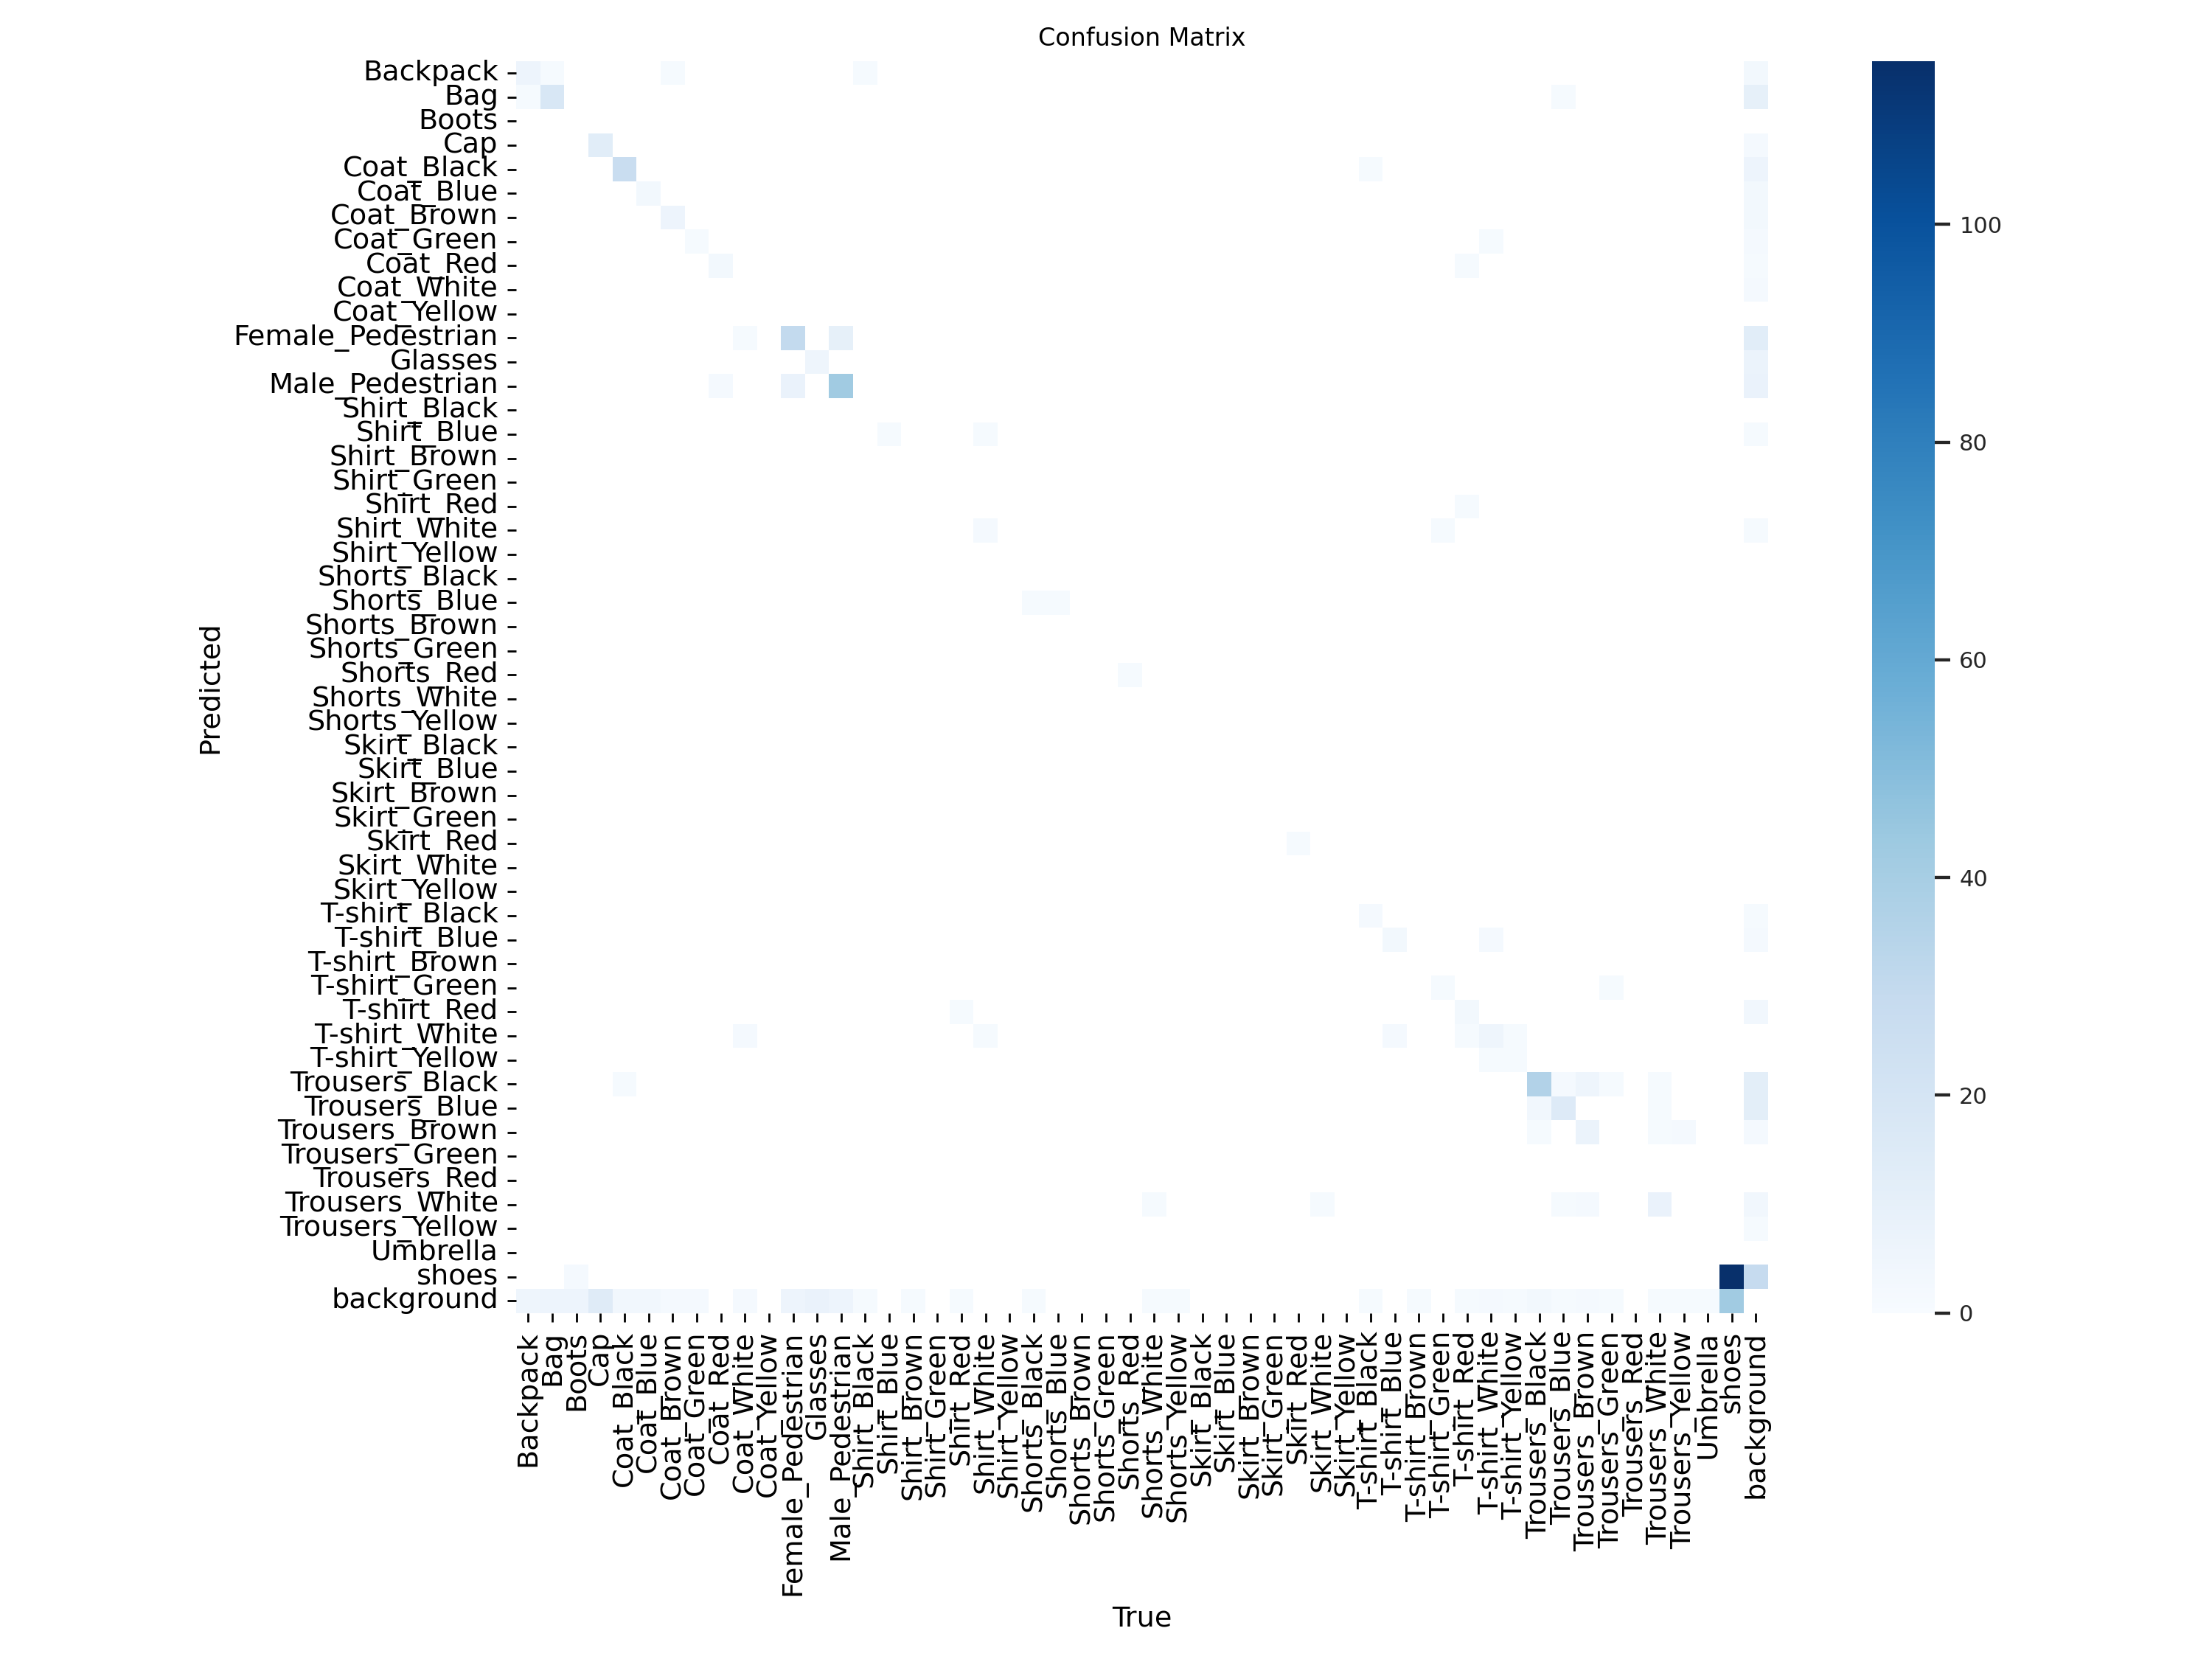

In [20]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=1000)

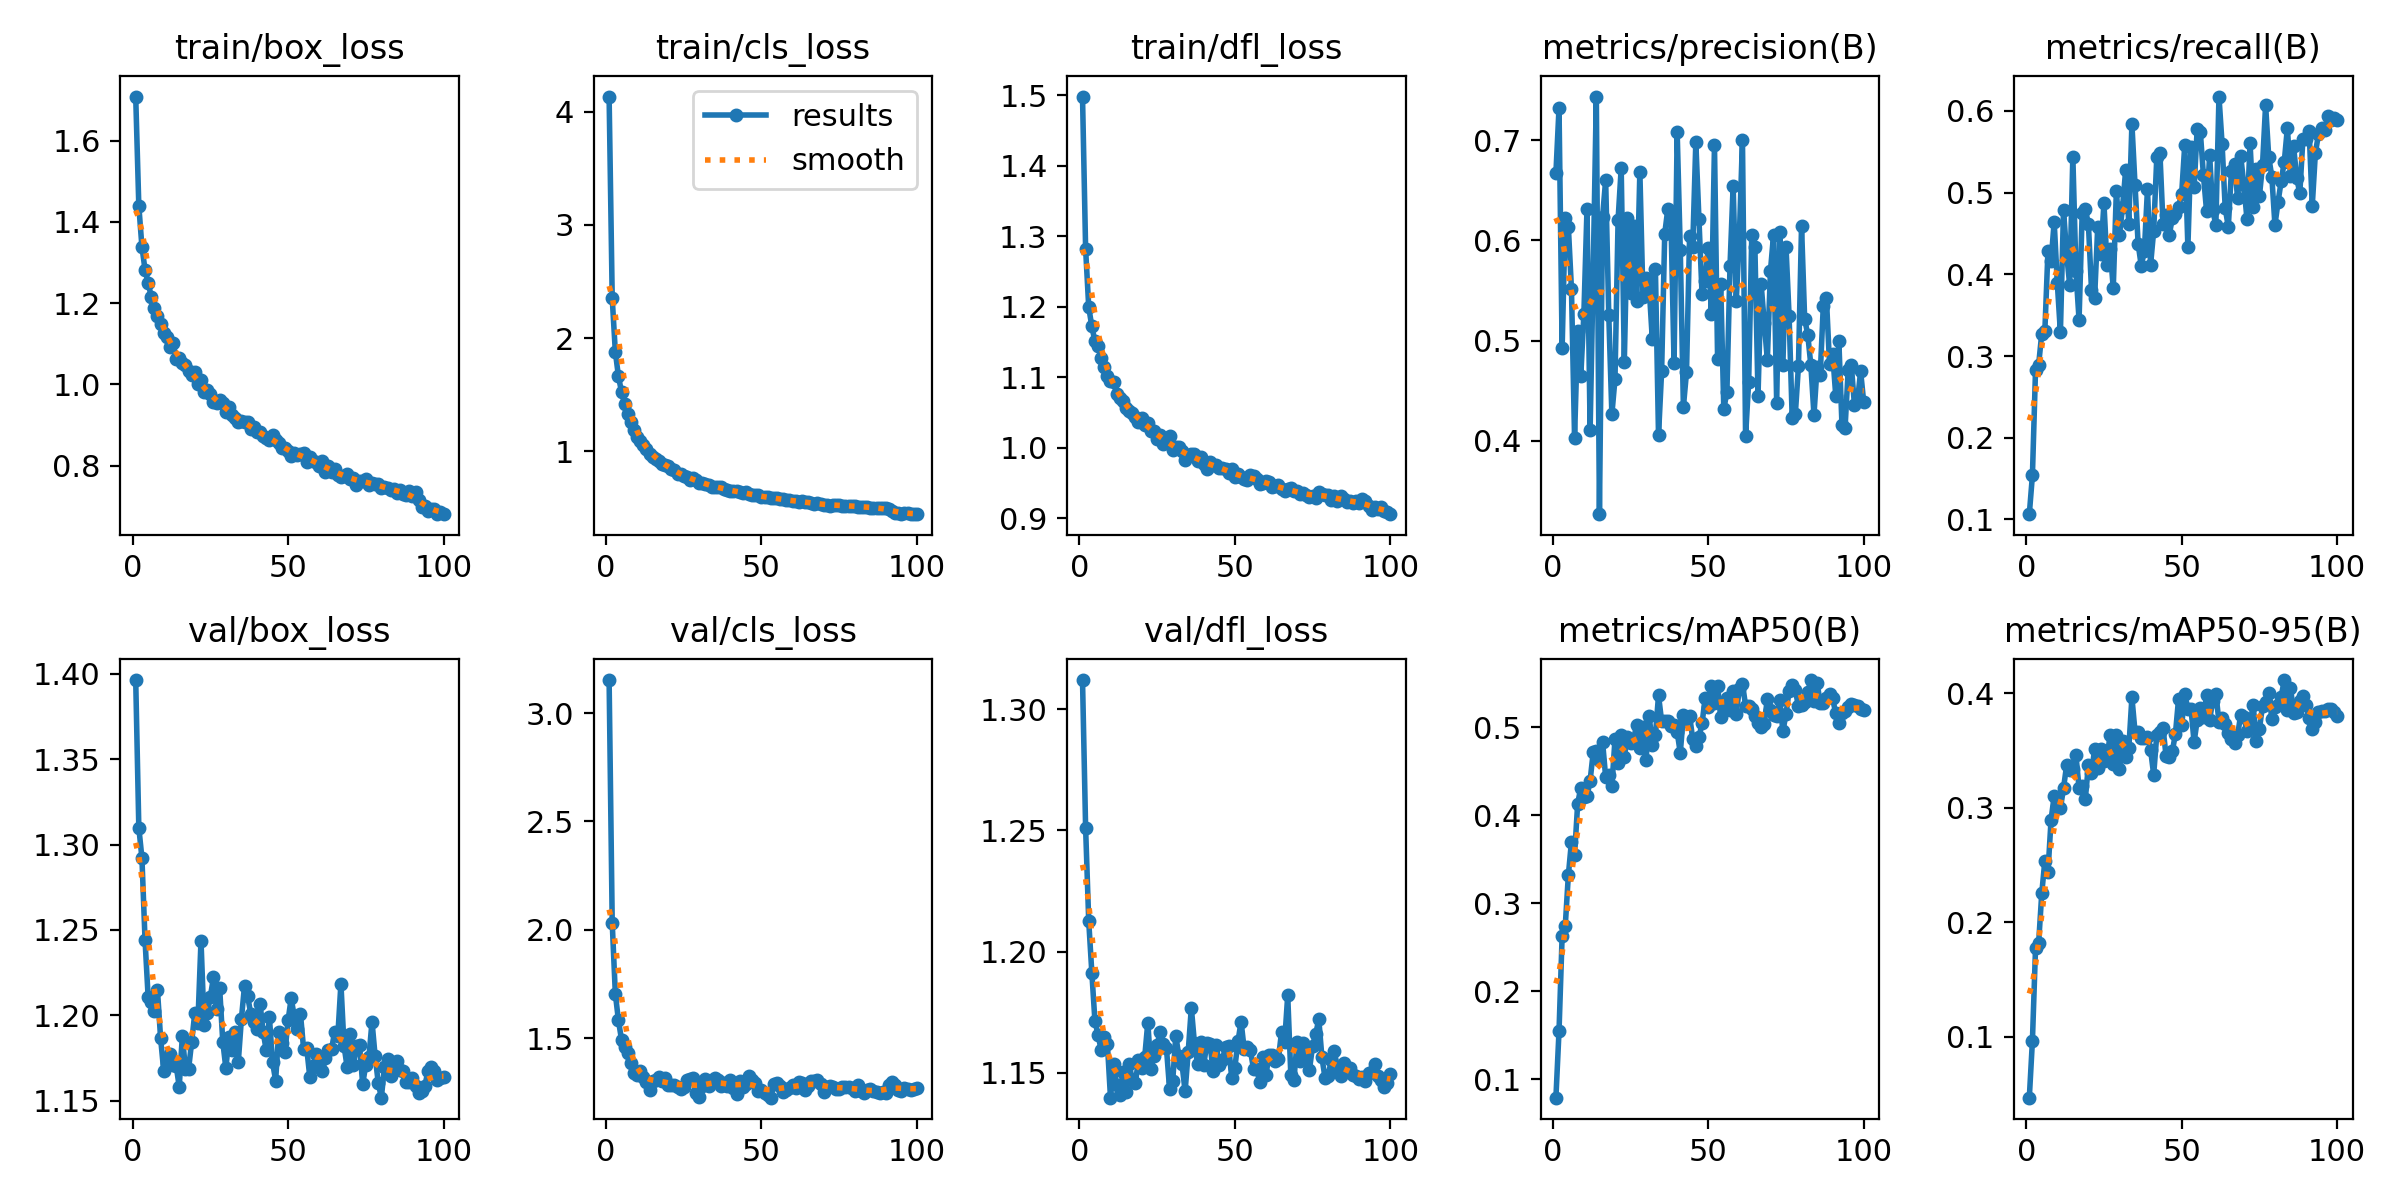

In [21]:
Image(filename=f'runs/detect/train/results.png', width=600)

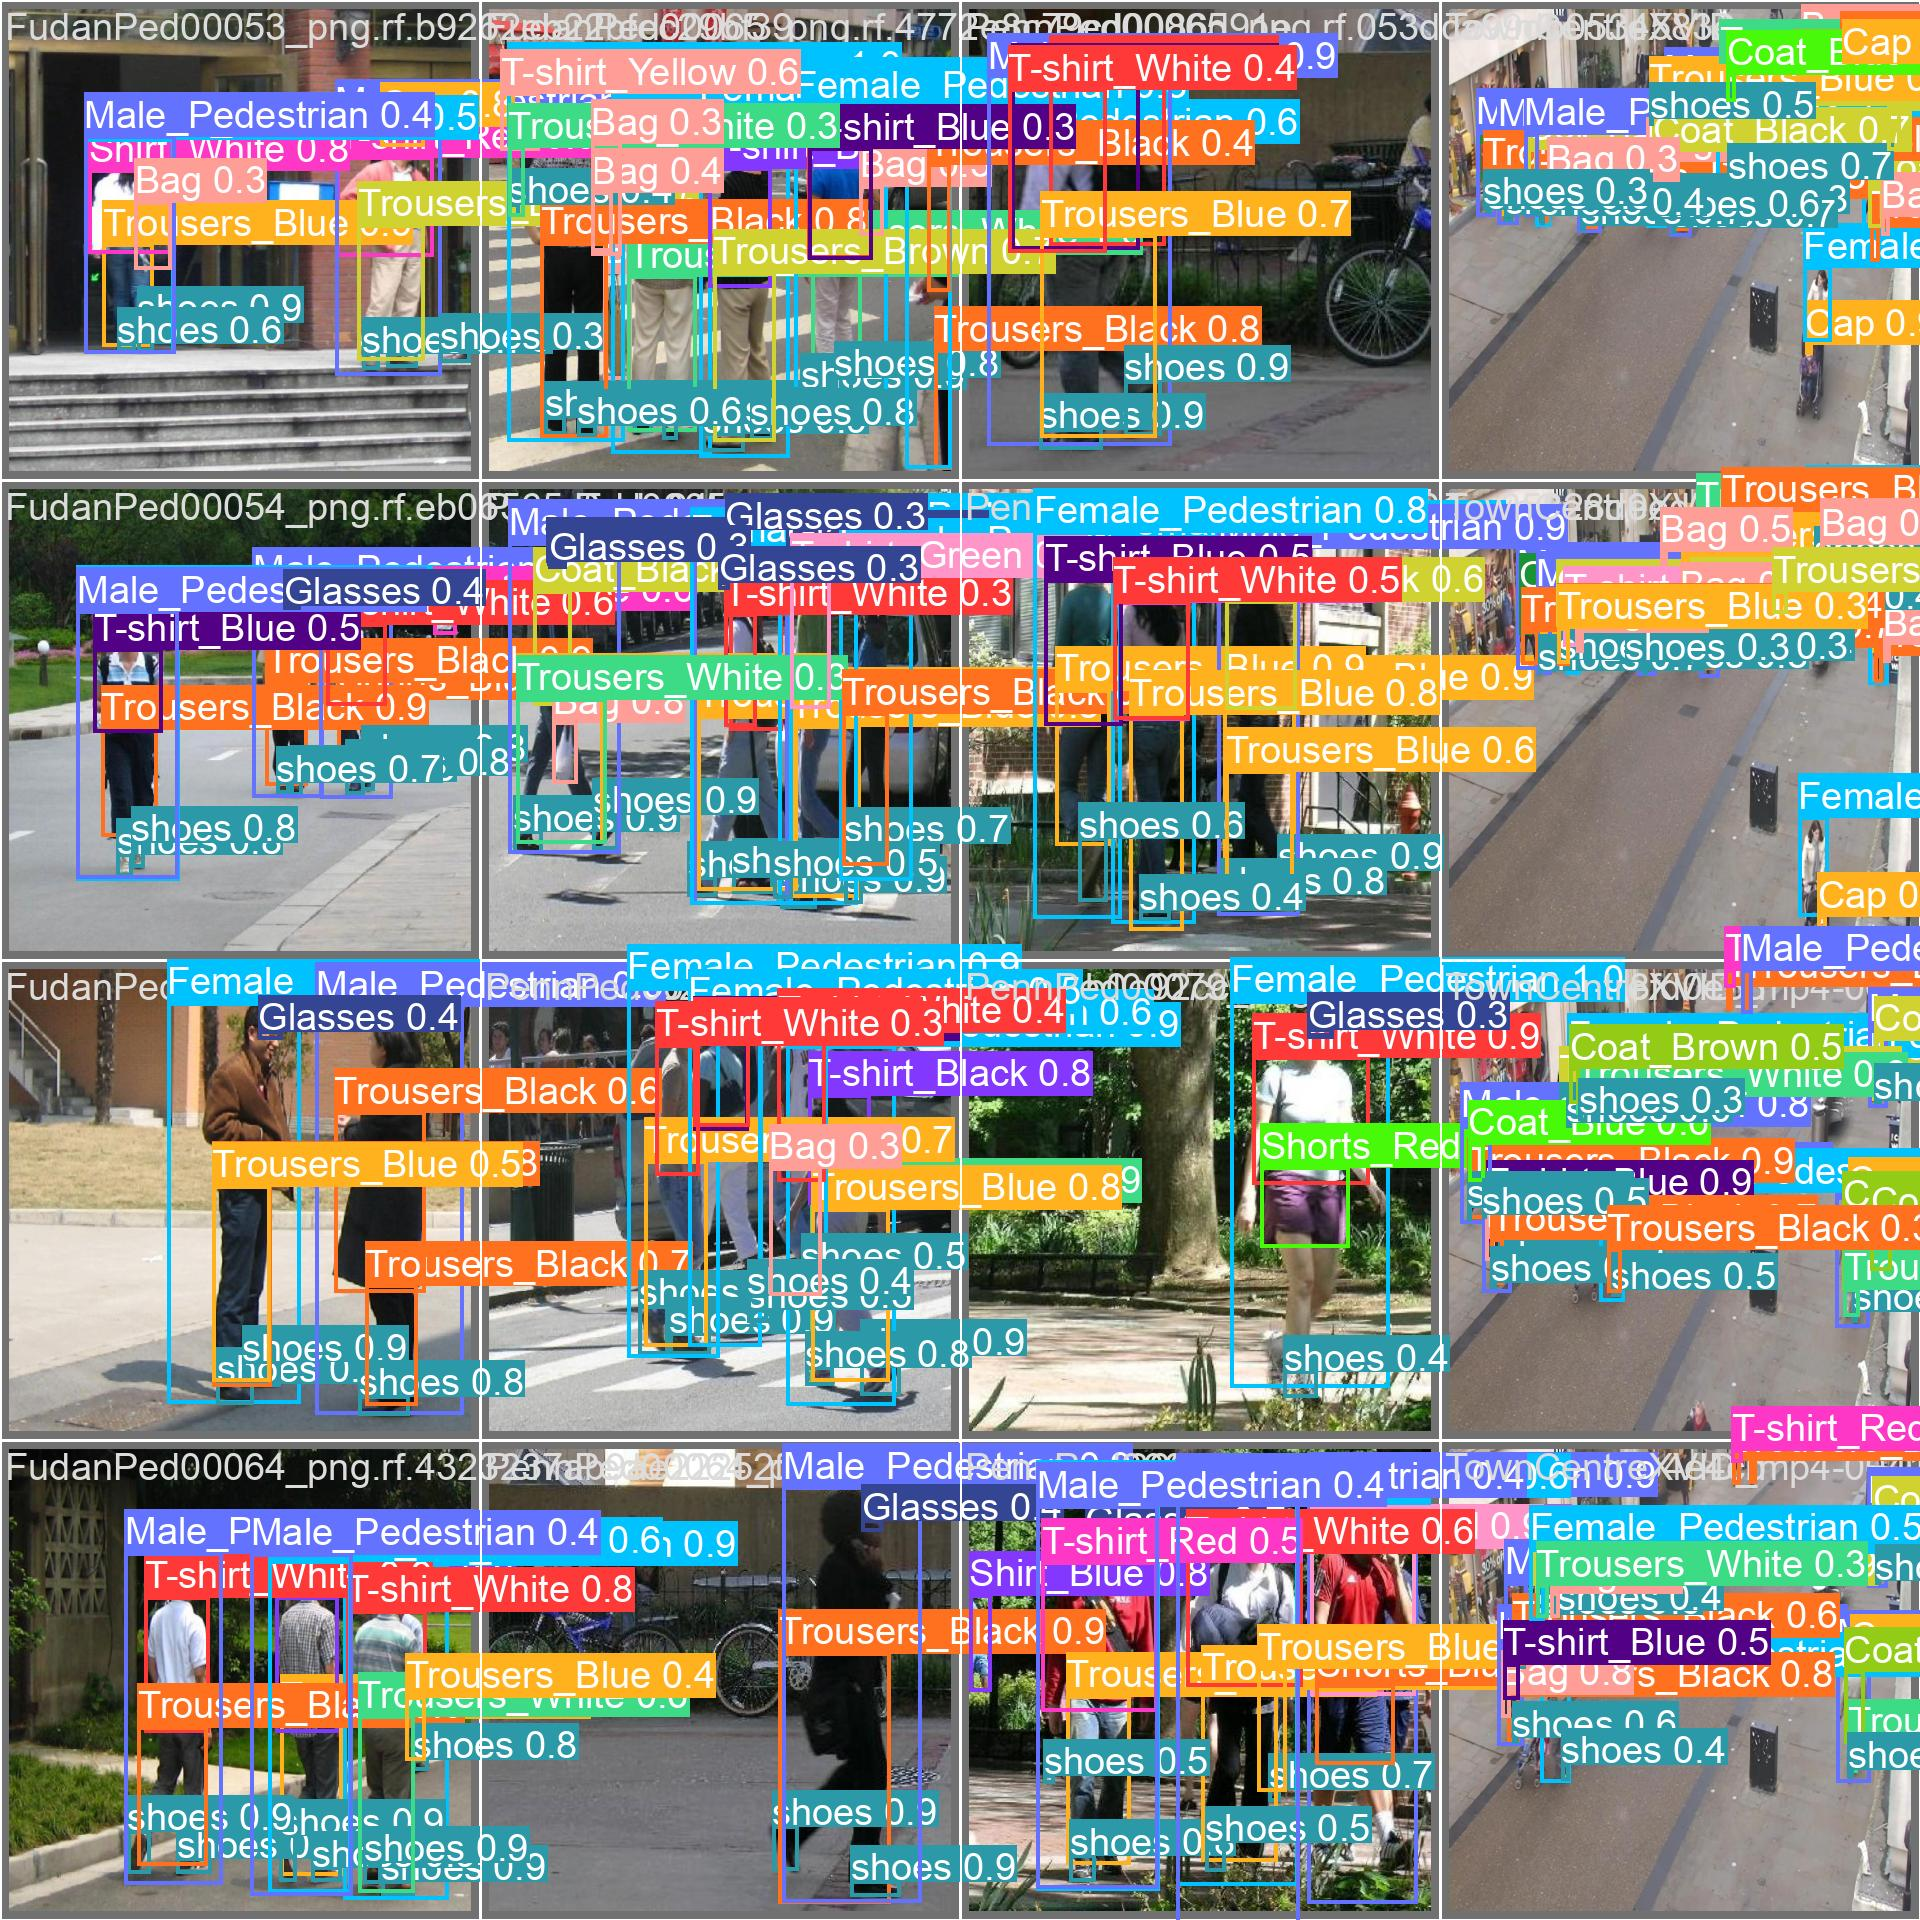

In [22]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/kaggle/input/fyp-datasetv2/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 168 layers, 11145321 parameters, 0 gradients, 28.5 GFLOPs



val: Scanning /kaggle/input/fyp-datasetv2/valid/labels...:   0%|          | 0/20
val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 20 images, 0 backgroun
val: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.548      0.515      0.554      0.417
              Backpack         20         12      0.509      0.583       0.61       0.35
                   Bag         20         25      0.563       0.72       0.63      0.344
                 Boots         20          8          0          0      0.112     0.0274
                   Cap         20         27        0.7       0.63      0.714       0.46
            Coat_Black         20         32      0.733      0.844      0.849      0.439
             Coat_Blue         20          7      0.491      0.571       0.53      0.316
            Coat_Brown         20          9      0.521      0.667      0.658       0.36
            Coat_Green         20          3      0.392      0.648      0.665      0.462
              Coat_Red         20          5      0.425        0.6      0.462      0.295
            Coat_White         20          5      0.414      0.296      0.595      0.374
     Female_Pedestria

Speed: 6.6ms preprocess, 61.8ms inference, 0.0ms loss, 44.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [24]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/fyp-datasetv2/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 168 layers, 11145321 parameters, 0 gradients, 28.5 GFLOPs



image 1/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00057_png.rf.4ef63ddbce80dc7c87a2f7001cce5d48.jpg: 800x800 1 Backpack, 1 Bag, 4 Female_Pedestrians, 1 Male_Pedestrian, 1 Shirt_Blue, 1 Shorts_Blue, 1 Shorts_Yellow, 2 T-shirt_Whites, 1 Trousers_Black, 2 Trousers_Blues, 2 Trousers_Whites, 10 shoess, 9.7ms


image 2/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00061_png.rf.ef8f22d1c8262dbea979921bd9f0d233.jpg: 800x800 3 Coat_Blacks, 1 Female_Pedestrian, 1 Glasses, 2 Male_Pedestrians, 4 Trousers_Blacks, 3 shoess, 9.7ms


image 3/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00063_png.rf.a7b833aa0755423bcf15d2e426f3ec94.jpg: 800x800 2 Bags, 1 Coat_Black, 4 Female_Pedestrians, 1 Male_Pedestrian, 1 Shirt_Black, 1 Shirt_White, 2 Trousers_Blacks, 2 Trousers_Blues, 1 Trousers_White, 4 shoess, 9.6ms


image 4/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00059_png.rf.21b4b6478adf6d21464f56b7450580e5.jpg: 800x800 2 Backpacks, 1 Bag, 1 Female_Pedestrian, 3 Glassess, 2 Male_Pedestrians, 1 T-shirt_White, 1 Trousers_Black, 1 Trousers_White, 3 shoess, 9.7ms


image 5/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00077_png.rf.a00bea7ecf8e12943dc783257d786ed0.jpg: 800x800 1 Backpack, 1 Bag, 1 Male_Pedestrian, 1 T-shirt_Blue, 1 Trousers_White, 2 shoess, 9.7ms
image 6/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00085_png.rf.73bec04a9ce9ad7d96177bd9a4c41819.jpg: 800x800 2 Male_Pedestrians, 1 T-shirt_Blue, 1 T-shirt_White, 2 Trousers_Blacks, 2 shoess, 9.7ms


image 7/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0000_jpg.rf.483c5d7664c89fbf5190bac763f14879.jpg: 800x800 3 Bags, 3 Caps, 4 Coat_Blacks, 1 Coat_Green, 2 Coat_Reds, 6 Female_Pedestrians, 6 Male_Pedestrians, 1 Shirt_Blue, 6 Trousers_Blacks, 3 Trousers_Blues, 1 Trousers_White, 1 Trousers_Yellow, 1 Umbrella, 9 shoess, 9.6ms


image 8/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0036_jpg.rf.dab643e6abd115c429ab4fd1418b0729.jpg: 800x800 1 Backpack, 2 Bags, 1 Boots, 2 Coat_Blacks, 2 Coat_Browns, 1 Coat_Red, 5 Female_Pedestrians, 5 Male_Pedestrians, 1 Shirt_Black, 1 Shirt_Brown, 1 T-shirt_Red, 1 T-shirt_White, 6 Trousers_Blacks, 2 Trousers_Browns, 2 Trousers_Whites, 8 shoess, 9.6ms


image 9/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0042_jpg.rf.ba27c01ed8d80db7b82329ed6aae5011.jpg: 800x800 1 Bag, 3 Caps, 3 Coat_Blacks, 1 Coat_Blue, 2 Coat_Browns, 2 Female_Pedestrians, 6 Male_Pedestrians, 1 Skirt_White, 1 T-shirt_Blue, 1 T-shirt_Red, 4 Trousers_Blacks, 2 Trousers_Browns, 2 Trousers_Whites, 8 shoess, 9.6ms


image 10/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0061_jpg.rf.d36367b2be1b6297bd9b27c294d58b14.jpg: 800x800 3 Backpacks, 2 Bags, 2 Bootss, 2 Caps, 9 Coat_Blacks, 2 Coat_Blues, 1 Coat_Brown, 1 Coat_Red, 2 Coat_Whites, 7 Female_Pedestrians, 12 Male_Pedestrians, 1 Skirt_Black, 1 Skirt_Yellow, 1 T-shirt_Blue, 1 T-shirt_Red, 13 Trousers_Blacks, 3 Trousers_Blues, 1 Trousers_White, 10 shoess, 9.7ms


image 11/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0063_jpg.rf.1fb1d4e3f5249240cd16fa2b791fb386.jpg: 800x800 3 Backpacks, 4 Bags, 2 Caps, 11 Coat_Blacks, 2 Coat_Blues, 1 Coat_Brown, 1 Coat_Red, 2 Coat_Whites, 9 Female_Pedestrians, 13 Male_Pedestrians, 1 Skirt_Black, 1 T-shirt_Red, 11 Trousers_Blacks, 3 Trousers_Blues, 1 Trousers_Brown, 1 Trousers_White, 11 shoess, 9.7ms


image 12/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0083_jpg.rf.c22006fde8bbeb80a730d3a7622612f4.jpg: 800x800 3 Backpacks, 4 Bags, 1 Boots, 2 Caps, 4 Coat_Blacks, 2 Coat_Whites, 4 Female_Pedestrians, 6 Male_Pedestrians, 1 Shirt_Black, 3 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_Brown, 4 Trousers_Whites, 6 shoess, 9.7ms


image 13/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0084_jpg.rf.e865cbc0a78ac1280e0b2edbb7a51f40.jpg: 800x800 3 Backpacks, 5 Bags, 1 Boots, 4 Caps, 4 Coat_Blacks, 2 Coat_Whites, 4 Female_Pedestrians, 3 Male_Pedestrians, 1 Shirt_Black, 1 Shirt_Green, 1 Shorts_Green, 1 Skirt_Green, 3 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_Brown, 1 Trousers_Red, 3 Trousers_Whites, 5 shoess, 9.6ms


image 14/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0112_jpg.rf.a8771b2f9a7e19eab7cf2bc3bec04e84.jpg: 800x800 2 Backpacks, 4 Bags, 1 Boots, 3 Caps, 2 Coat_Blacks, 3 Coat_Browns, 3 Coat_Greens, 3 Coat_Reds, 1 Coat_White, 7 Female_Pedestrians, 5 Male_Pedestrians, 1 Shorts_White, 1 T-shirt_Black, 5 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_Brown, 1 Trousers_White, 11 shoess, 9.6ms


image 15/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0129_jpg.rf.7f344d11eebb48d2f6a98cb8ed09c7e6.jpg: 800x800 3 Backpacks, 3 Bags, 2 Caps, 2 Coat_Blacks, 1 Coat_Brown, 2 Coat_Greens, 1 Coat_Red, 2 Female_Pedestrians, 6 Male_Pedestrians, 1 Shirt_Blue, 1 Shirt_Red, 1 T-shirt_Black, 1 T-shirt_Blue, 1 T-shirt_Red, 1 Trousers_Black, 2 Trousers_Blues, 2 Trousers_Browns, 2 Trousers_Whites, 10 shoess, 9.7ms


image 16/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0173_jpg.rf.0a31fa3472b47f23c7faaa89a64eed41.jpg: 800x800 2 Backpacks, 4 Bags, 6 Bootss, 3 Caps, 3 Coat_Blacks, 1 Coat_Blue, 3 Coat_Browns, 1 Coat_Green, 1 Coat_Yellow, 6 Female_Pedestrians, 6 Male_Pedestrians, 1 Shorts_Red, 1 Skirt_Yellow, 7 Trousers_Blacks, 2 Trousers_Blues, 1 Trousers_White, 17 shoess, 9.7ms


image 17/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0179_jpg.rf.b69eb64a24043663db0c860e52e7ae5a.jpg: 800x800 3 Bags, 2 Bootss, 2 Caps, 5 Coat_Blacks, 3 Coat_Browns, 2 Coat_Yellows, 5 Female_Pedestrians, 6 Male_Pedestrians, 1 Shirt_White, 9 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_Brown, 2 Trousers_Whites, 18 shoess, 9.7ms


image 18/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0197_jpg.rf.671cbe326e4c7b3f49dbf7134e751ce0.jpg: 800x800 1 Backpack, 8 Bags, 2 Caps, 1 Coat_Black, 1 Coat_Blue, 2 Coat_Browns, 2 Coat_Reds, 1 Coat_Yellow, 6 Female_Pedestrians, 3 Male_Pedestrians, 1 Shirt_Black, 1 Skirt_Red, 1 T-shirt_Black, 4 Trousers_Blacks, 2 Trousers_Blues, 1 Trousers_White, 12 shoess, 9.7ms


image 19/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0247_jpg.rf.1ecdf5977249f3acf5e6a8d71de6ec58.jpg: 800x800 2 Backpacks, 3 Bags, 1 Boots, 3 Caps, 7 Coat_Blacks, 1 Coat_Blue, 1 Coat_Brown, 2 Coat_Greens, 6 Female_Pedestrians, 7 Male_Pedestrians, 1 Skirt_Red, 7 Trousers_Blacks, 4 Trousers_Blues, 2 Trousers_Browns, 1 Trousers_Red, 19 shoess, 9.7ms


image 20/20 /kaggle/input/fyp-datasetv2/test/images/test_mp4-0052_jpg.rf.ad087c00bb706b7bc473a304e681556f.jpg: 800x800 1 Coat_Green, 1 Female_Pedestrian, 1 Male_Pedestrian, 1 Trousers_Black, 1 Trousers_White, 1 shoes, 9.7ms
Speed: 4.0ms preprocess, 9.7ms inference, 18.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Let's take a look at few results.

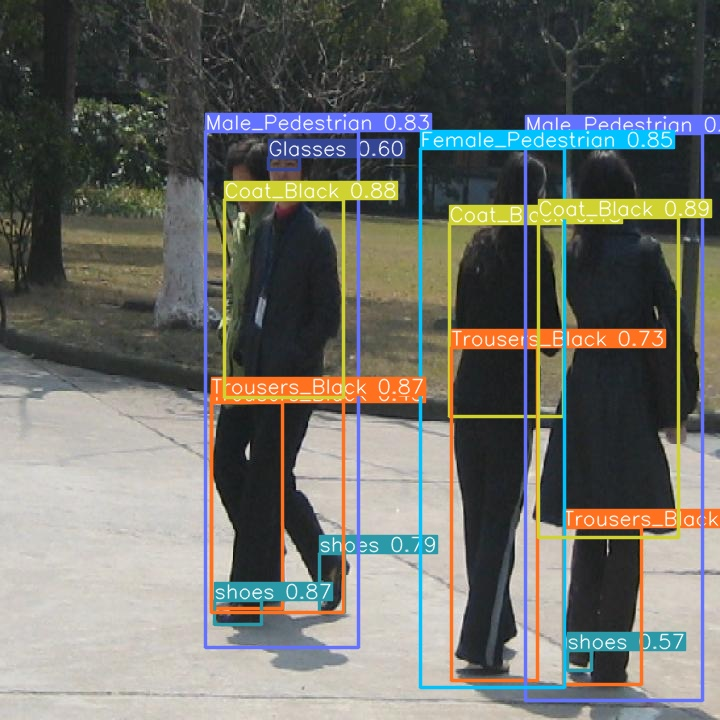

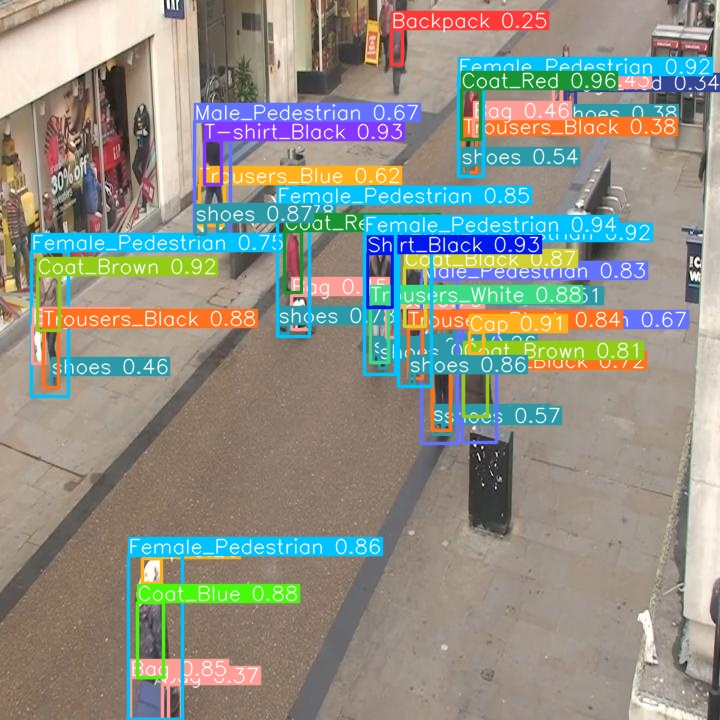

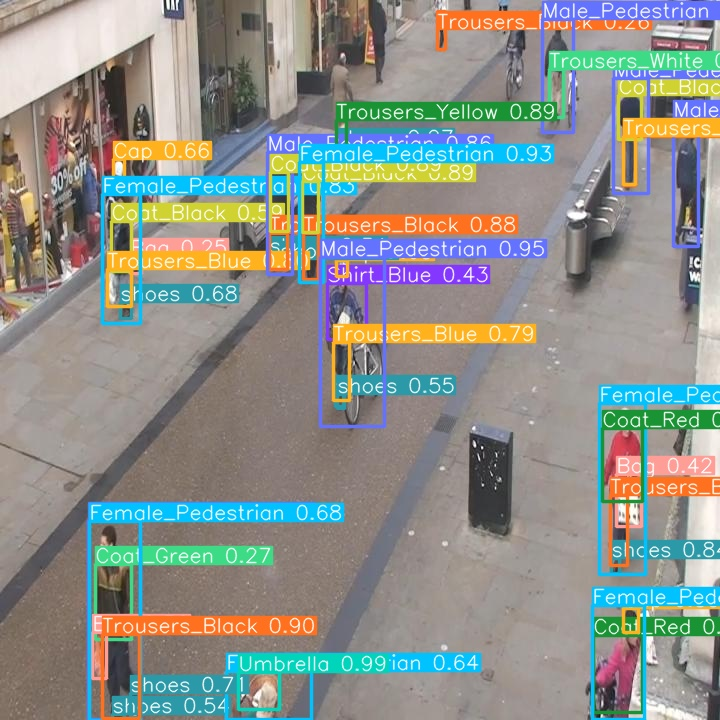

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")